# Import Necessary Libraries

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import glob
import math
import itertools
sns.set()
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings("ignore")

# Defining Functions

In [2]:
# Define a heatmap function
def halfHeatMap(df, mirror, corrtype):

    # Create Correlation df
    corr = df.corr(method = corrtype)
    # Plot figsize
    fig, ax = plt.subplots(figsize=(15, 15))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True# Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        
    #show plot
    plt.show()

# Importing Data

In [3]:
train = pd.read_csv("train_V2.csv", low_memory = False)
test = pd.read_csv("test_V2.csv", low_memory = False)

In [4]:
# Inspecting all the features available
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [5]:
#Inspecting the size of the training dataset
train.shape

(4446966, 29)

In [6]:
# Inspecting the unique values for match type
train.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [7]:
# Inspecting the number of unique matches in the training dataset
len(train.matchId.unique())

47965

In [8]:
# Inspecting the number of matches for games that do not belong to the typical game modes
len(train[train.matchType.str.contains("normal")])

25386

In [9]:
len(train[train.matchType.str.contains("flare")])

3223

In [10]:
len(train[train.matchType.str.contains("crash")])

6658

# Data Wrangling

In [11]:
train = train[~(train.matchType.str.contains("flare") | 
            train.matchType.str.contains("normal") | 
            train.matchType.str.contains("crash"))]

In [12]:
train.shape

(4411699, 29)

In [13]:
for gamemode in train.matchType.unique():
    tempdf = train[train.matchType == gamemode]
    print("Game mode : {}, Number of observations - {}, Number of games - {}".format(gamemode, len(tempdf), len(tempdf.matchId.unique())))

Game mode : squad-fpp, Number of observations - 1756186, Number of games - 18576
Game mode : duo, Number of observations - 313591, Number of games - 3356
Game mode : solo-fpp, Number of observations - 536762, Number of games - 5679
Game mode : squad, Number of observations - 626526, Number of games - 6658
Game mode : duo-fpp, Number of observations - 996691, Number of games - 10620
Game mode : solo, Number of observations - 181943, Number of games - 2297


In [14]:
train.drop("rankPoints", axis = 1, inplace = True)

In [15]:
train.shape

(4411699, 28)

In [16]:
train_dict = {}
modes = []
for gamemode in train.matchType.unique():
    modes.append(gamemode)
    train_dict[gamemode] = train[train.matchType == gamemode]

In [17]:
modes

['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo']

# EDA (Visualizations and Inferential Statistics)

## Solo Modes

### Solo Mode

In [18]:
solo = train_dict["solo"].reset_index(drop = True)
solofpp = train_dict["solo-fpp"].reset_index(drop = True)

In [19]:
solo.describe().T

count         mean          std    min        25%  \
assists          181943.0     0.055616     0.245147    0.0     0.0000   
boosts           181943.0     1.066048     1.825299    0.0     0.0000   
damageDealt      181943.0   112.615132   159.219277    0.0     0.0000   
DBNOs            181943.0     0.000000     0.000000    0.0     0.0000   
headshotKills    181943.0     0.223823     0.635332    0.0     0.0000   
heals            181943.0     1.012130     2.445998    0.0     0.0000   
killPlace        181943.0    46.172224    28.002309    1.0    21.0000   
killPoints       181943.0   407.839994   557.630996    0.0     0.0000   
kills            181943.0     0.870932     1.498986    0.0     0.0000   
killStreaks      181943.0     0.442908     0.566226    0.0     0.0000   
longestKill      181943.0    20.699467    48.369202    0.0     0.0000   
matchDuration    181943.0  1676.379306   256.175861  950.0  1431.0000   
maxPlace         181943.0    91.344449    16.330166   11.0    93.0000   
numGroups        181943.0    87.286568    18.865600    1.0    89.0000   
revives          181943.0     0.000000     0.000000    0.0     0.0000   
rideDistance     181943.0   640.980032  1630.249019    0.0     0.0000   
roadKills        181943.0     0.009948     0.139290    0.0     0.0000   
swimDistance     181943.0     5.878082    38.338833    0.0     0.0000   
teamKills        181943.0     0.014994     0.121528    0.0     0.0000   
vehicleDestroys  181943.0     0.007530     0.089693    0.0     0.0000   
walkDistance     181943.0   986.208330  1054.842835    0.0   114.0000   
weaponsAcquired  181943.0     3.757353     2.547345    0.0     2.0000   
winPoints        181943.0   536.936843   722.073902    0.0     0.0000   
winPlacePerc     181943.0     0.473814     0.307803    0.0     0.2041   

                       50%        75%      max  
assists             0.0000     0.0000      4.0  
boosts              0.0000     2.0000     24.0  
damageDealt        65.7300   159.6000   2490.0  
DBNOs               0.0000     0.0000      0.0  
headshotKills       0.0000     0.0000     19.0  
heals               0.0000     1.0000     49.0  
killPlace          46.0000    70.0000    100.0  
killPoints          0.0000  1032.0000   1962.0  
kills               0.0000     1.0000     21.0  
killStreaks         0.0000     1.0000     18.0  
longestKill         0.0000    15.9100   1001.0  
matchDuration    1771.0000  1903.0000   2237.0  
maxPlace           96.0000    97.0000    100.0  
numGroups          92.0000    94.0000     99.0  
revives             0.0000     0.0000      0.0  
rideDistance        0.0000     1.1575  33970.0  
roadKills           0.0000     0.0000     18.0  
swimDistance        0.0000     0.0000   1606.0  
teamKills           0.0000     0.0000      1.0  
vehicleDestroys     0.0000     0.0000      3.0  
walkDistance      607.7000  1616.0000  15370.0  
weaponsAcquired     3.0000     5.0000     52.0  
winPoints           0.0000  1492.0000   1892.0  
winPlacePerc        0.4681     0.7423      1.0

In [20]:
solo = solo.drop(["DBNOs", "revives"], axis = 1)

In [21]:
features = list(solo.describe().columns)
features

['assists',
 'boosts',
 'damageDealt',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

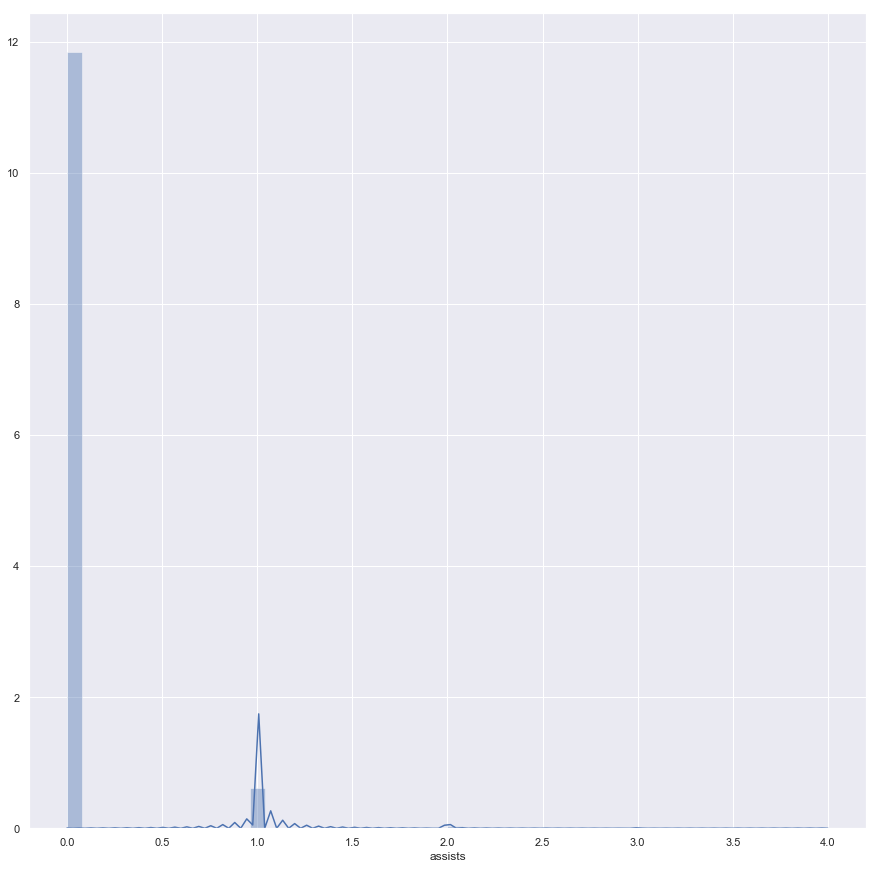

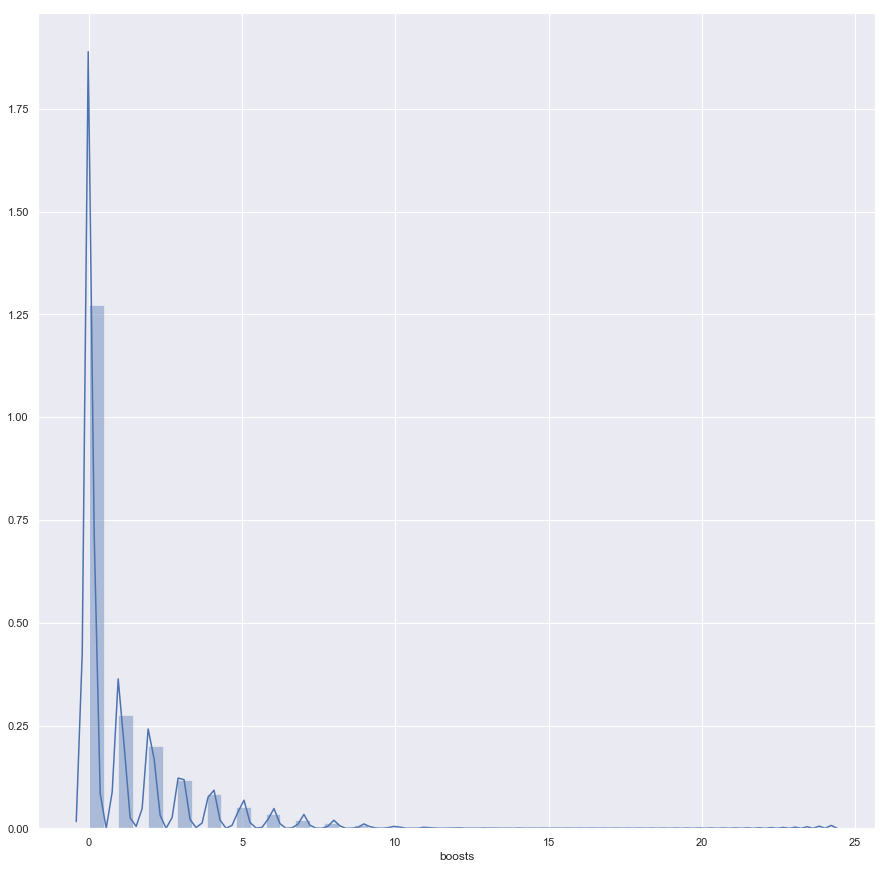

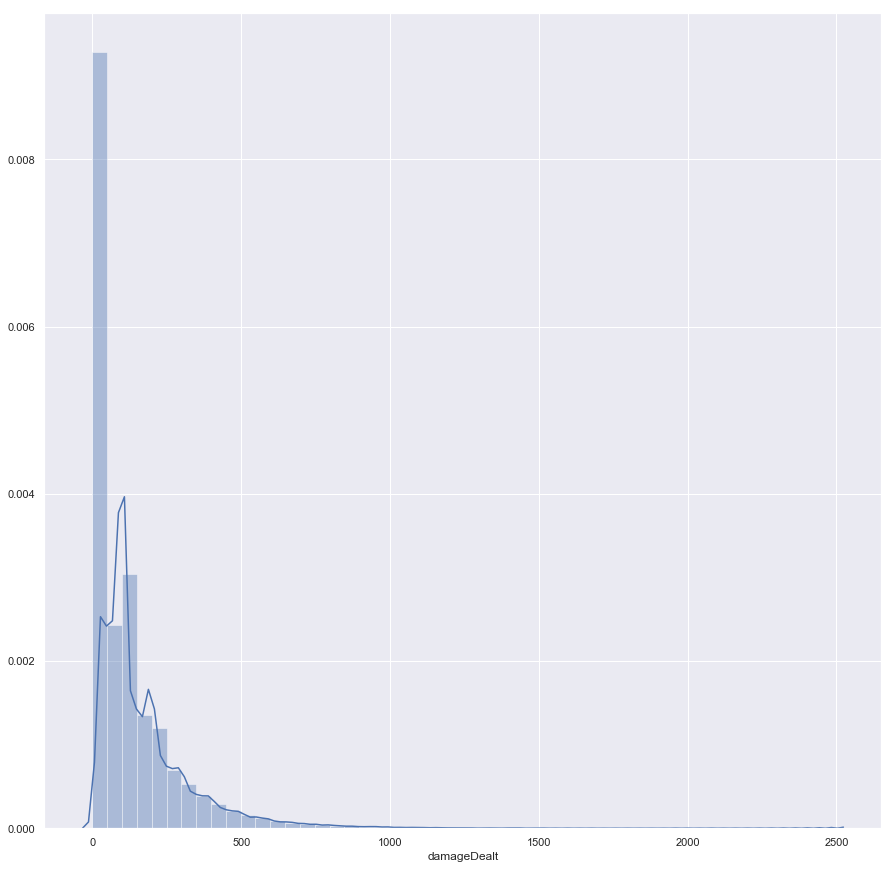

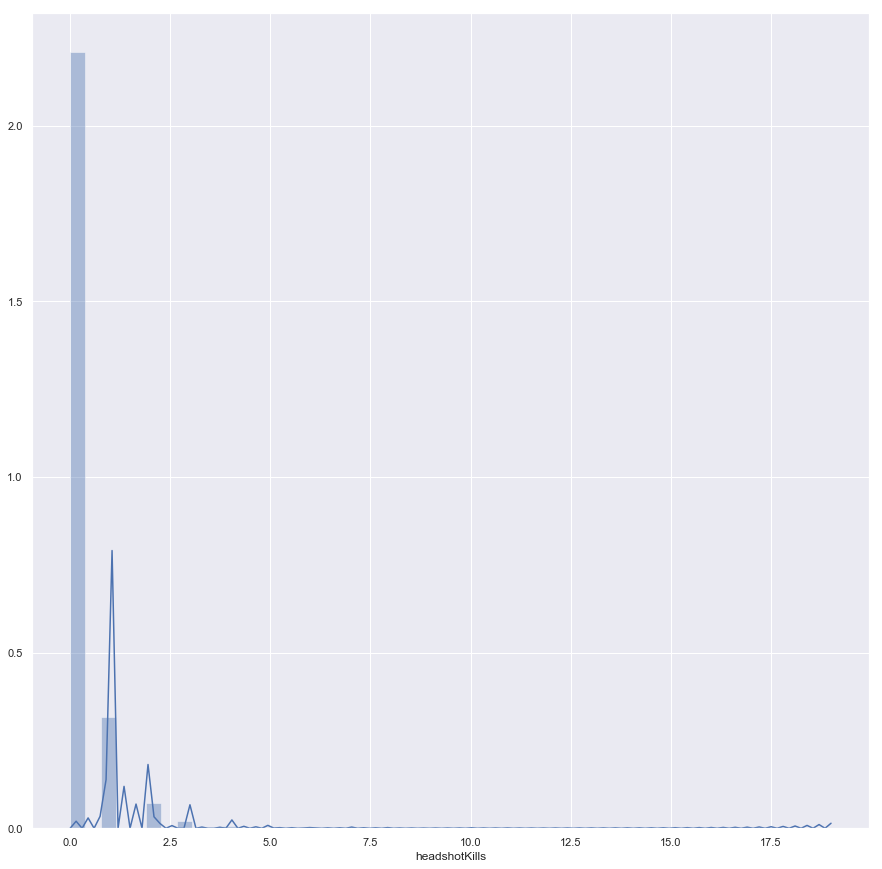

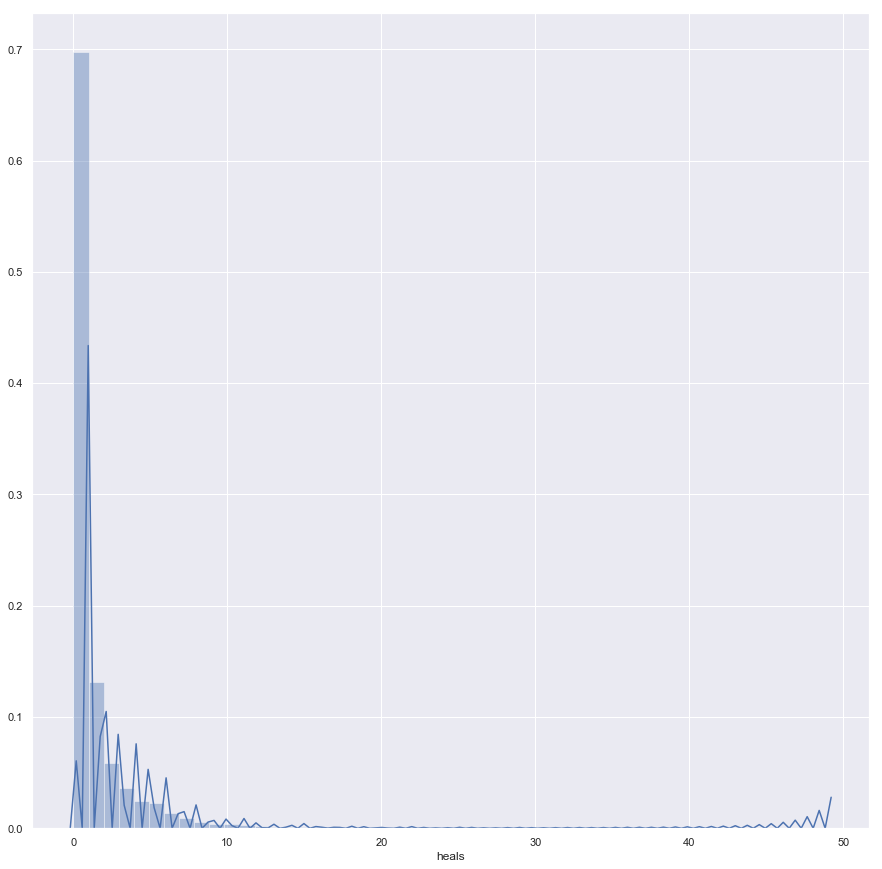

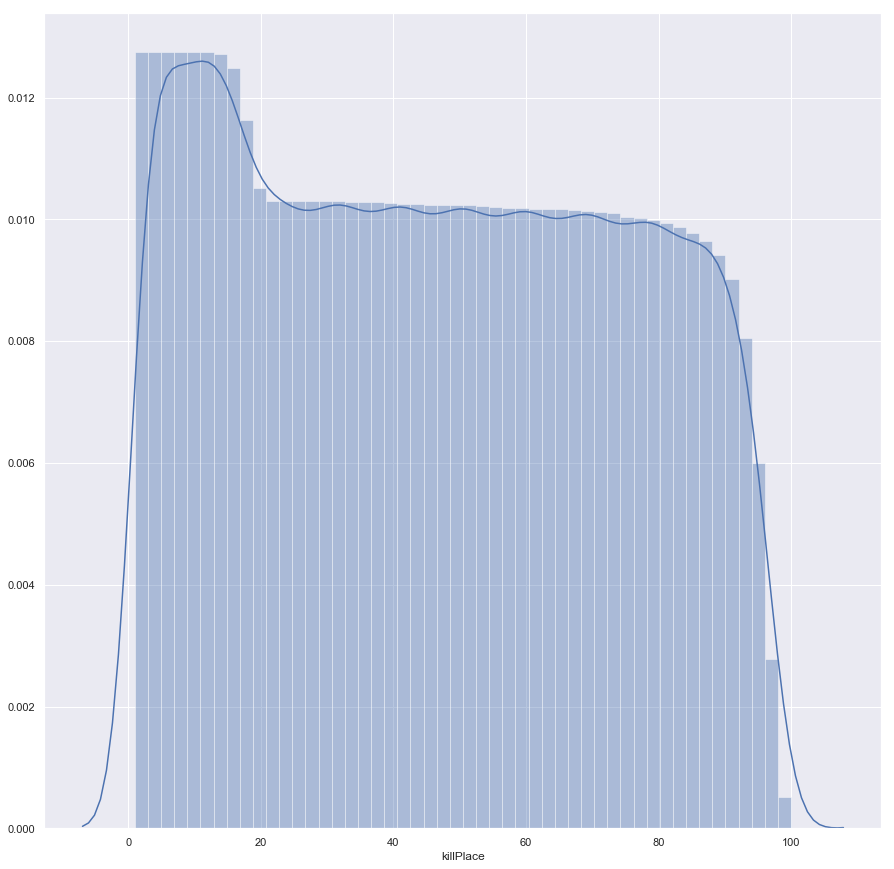

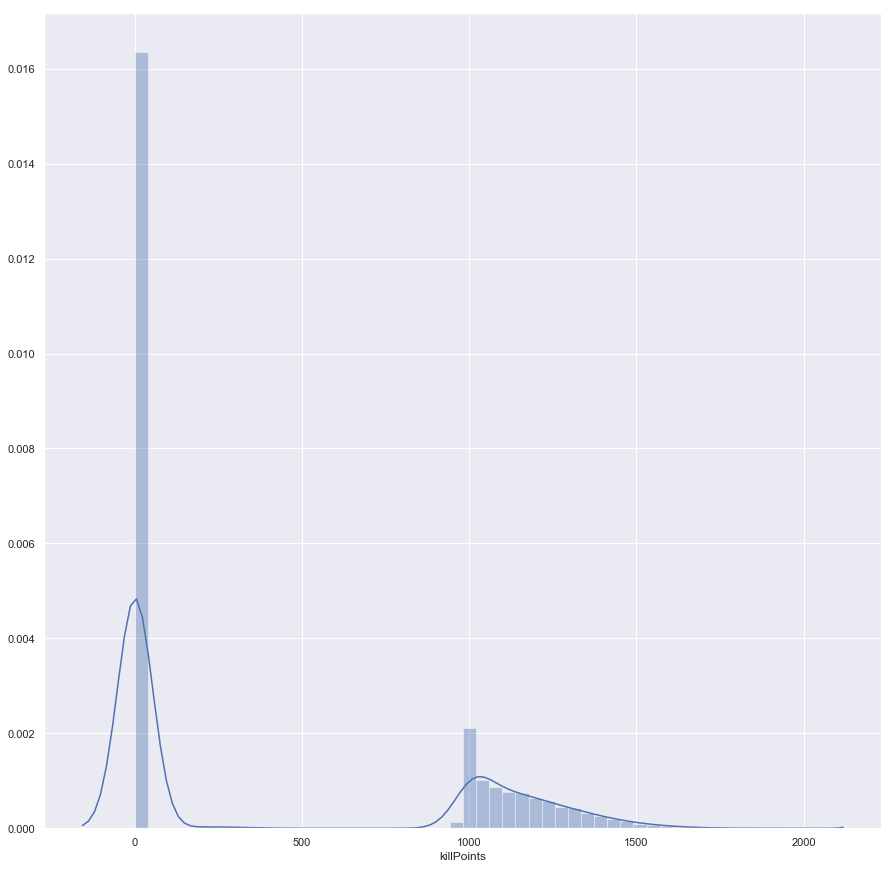

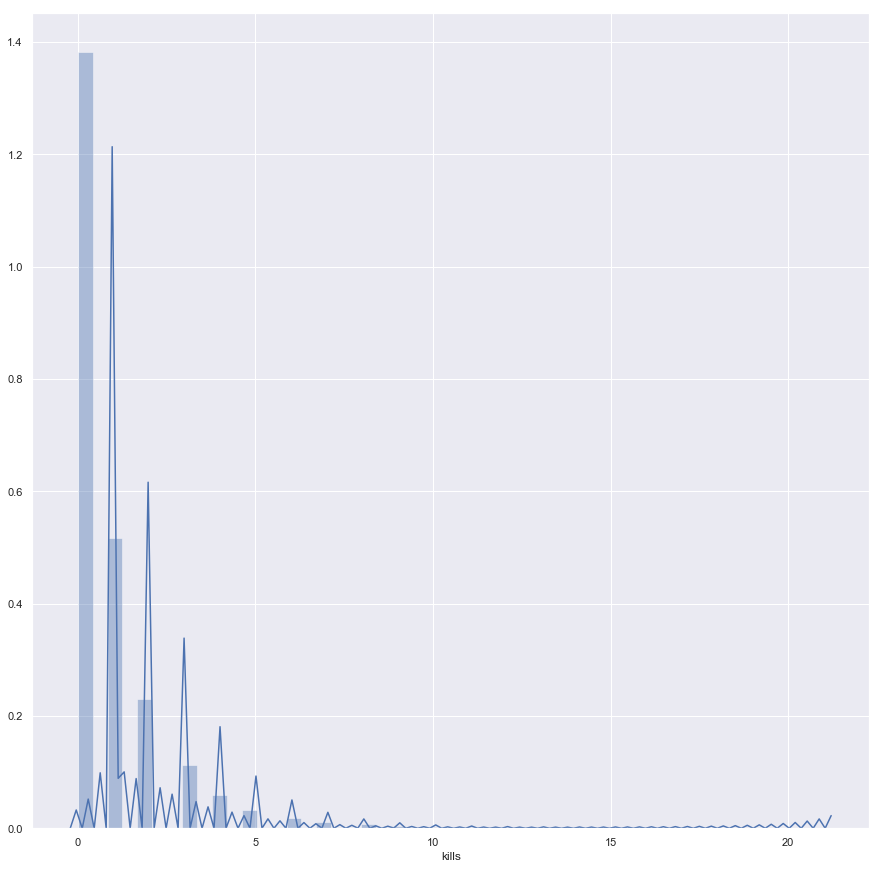

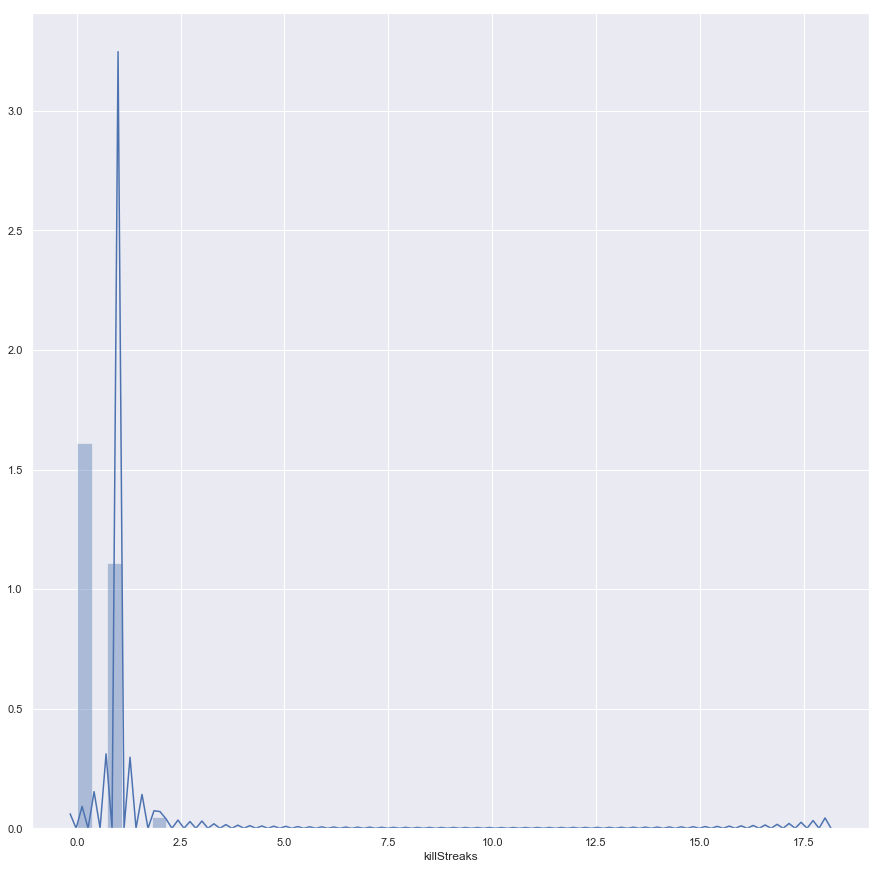

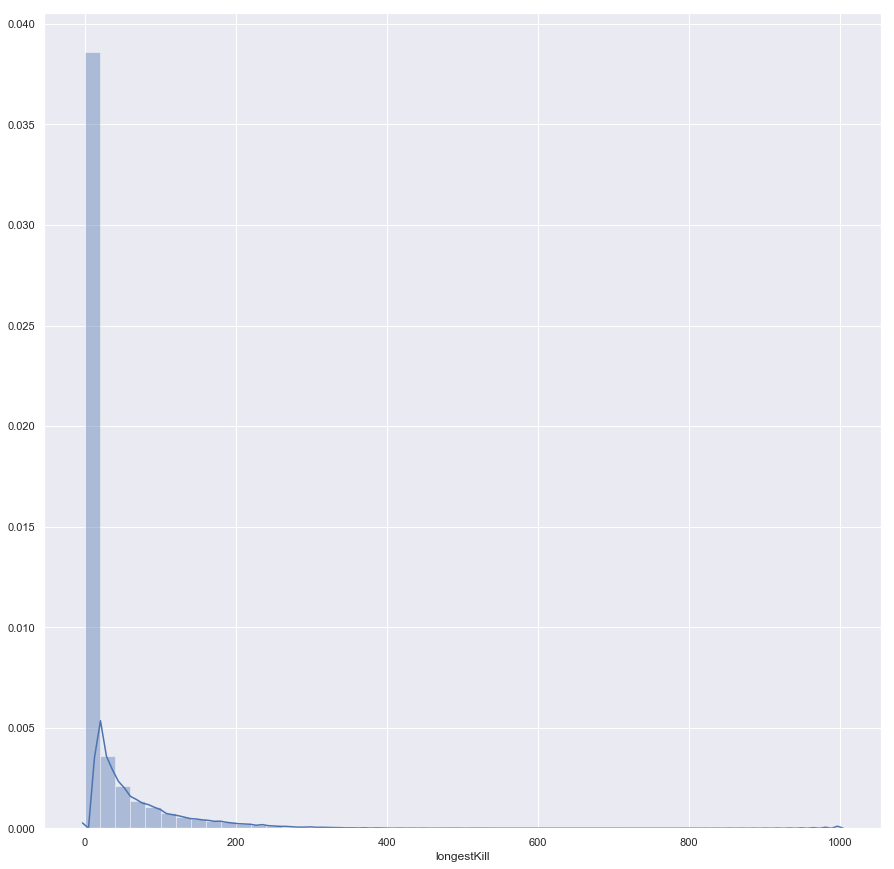

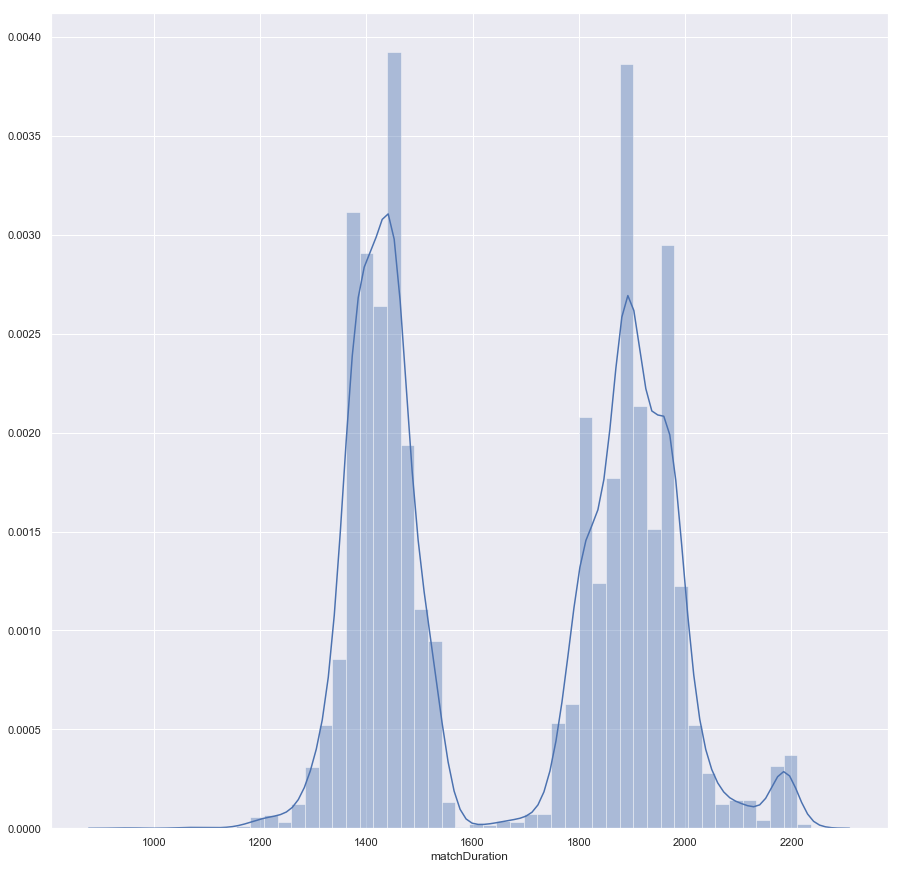

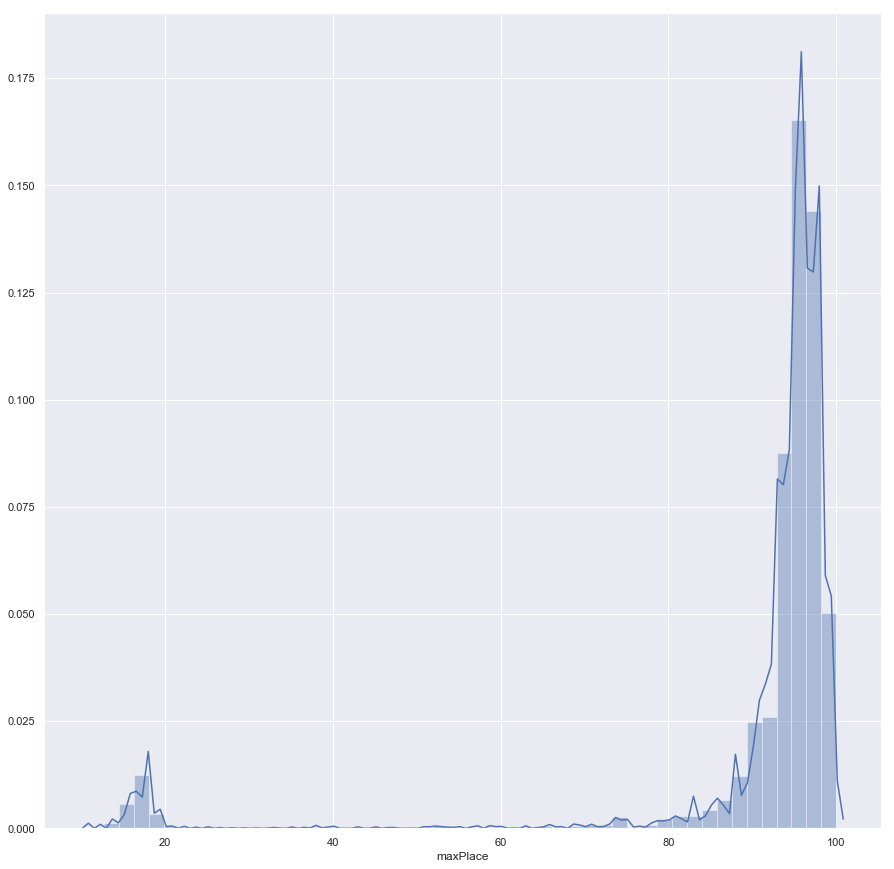

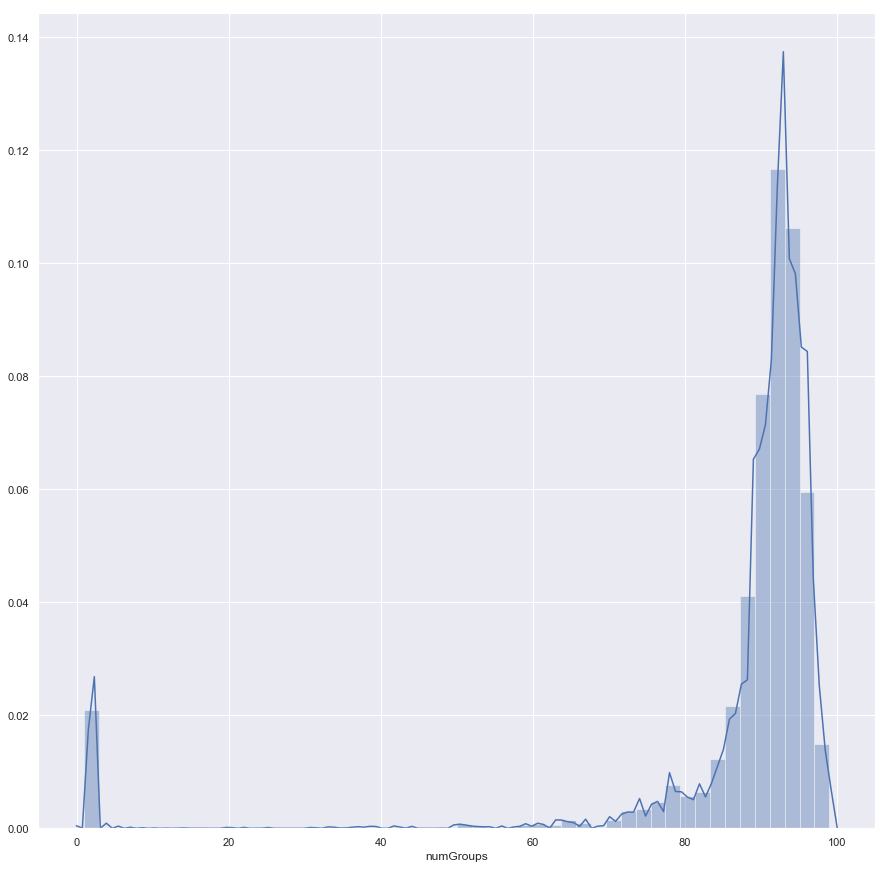

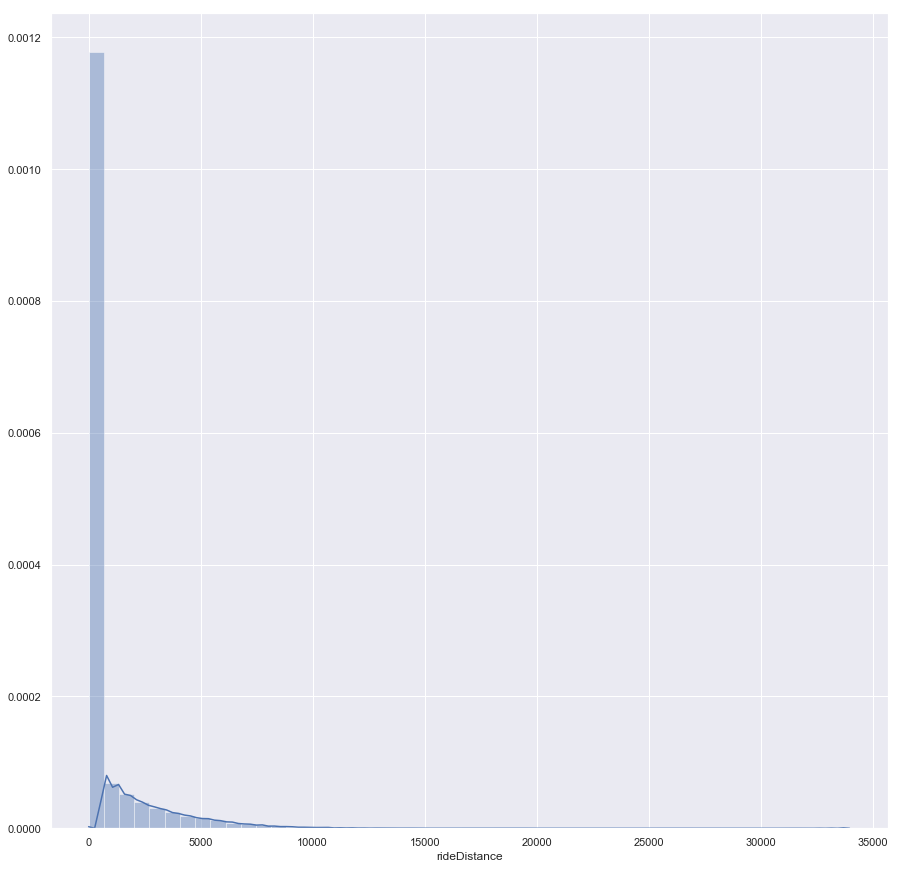

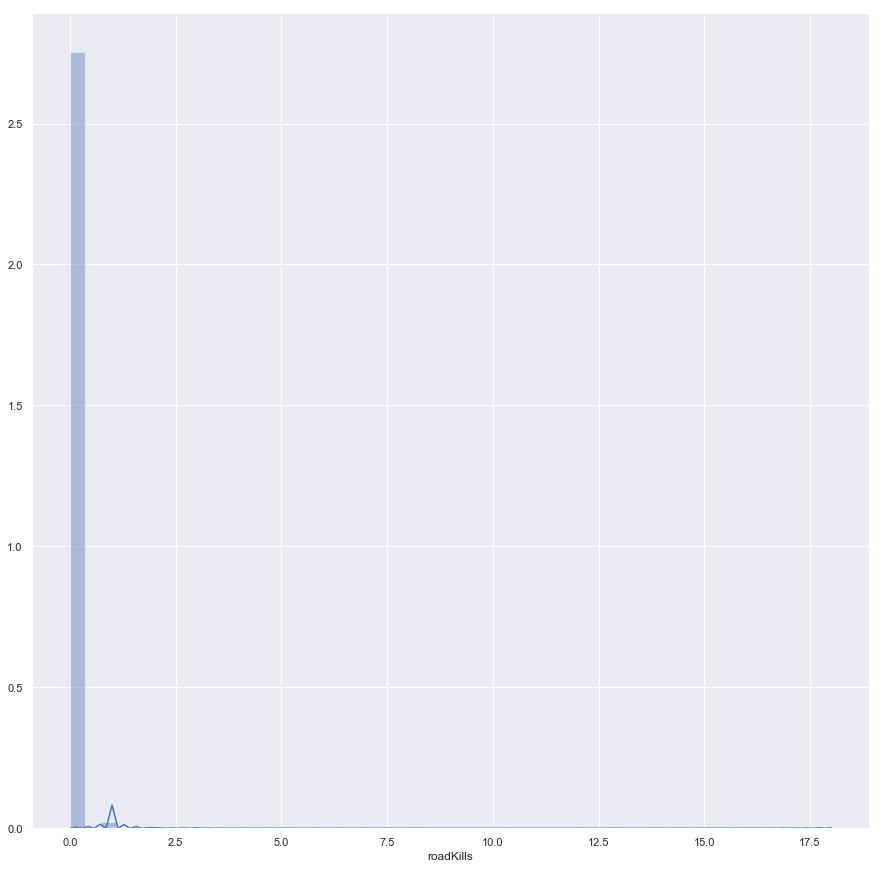

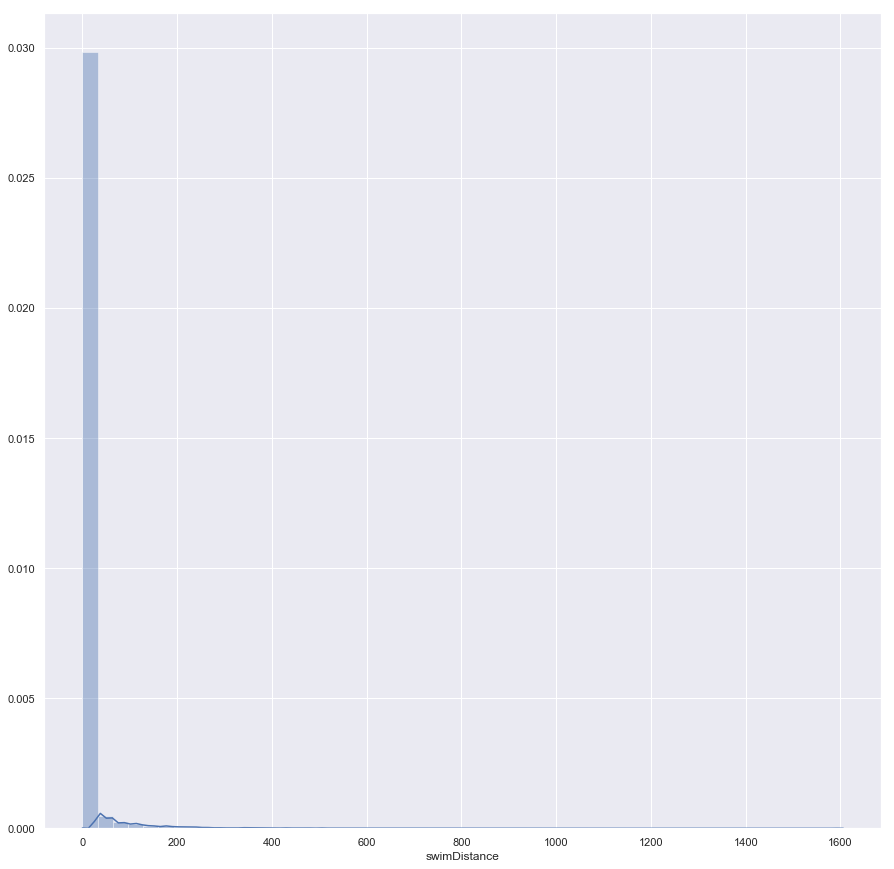

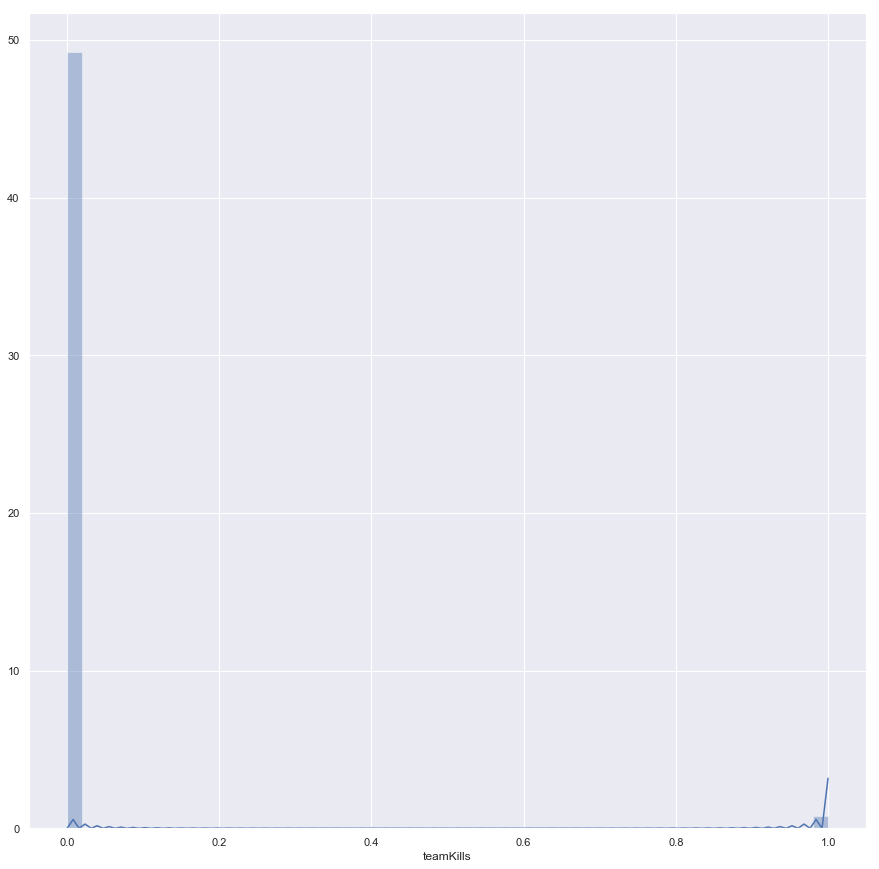

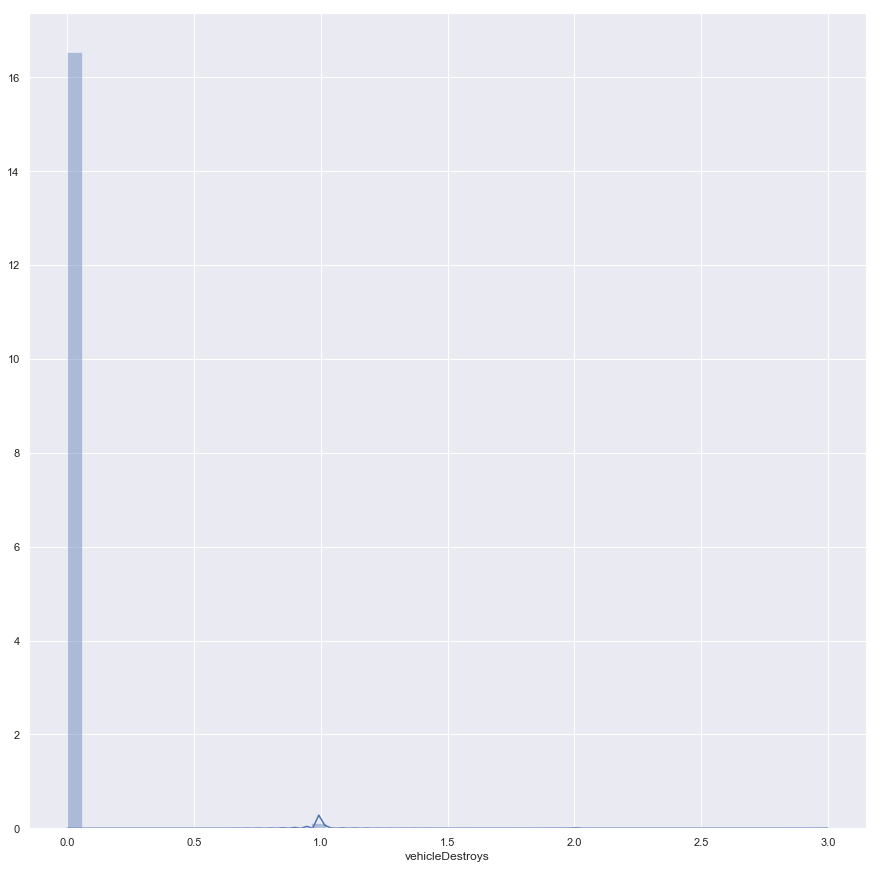

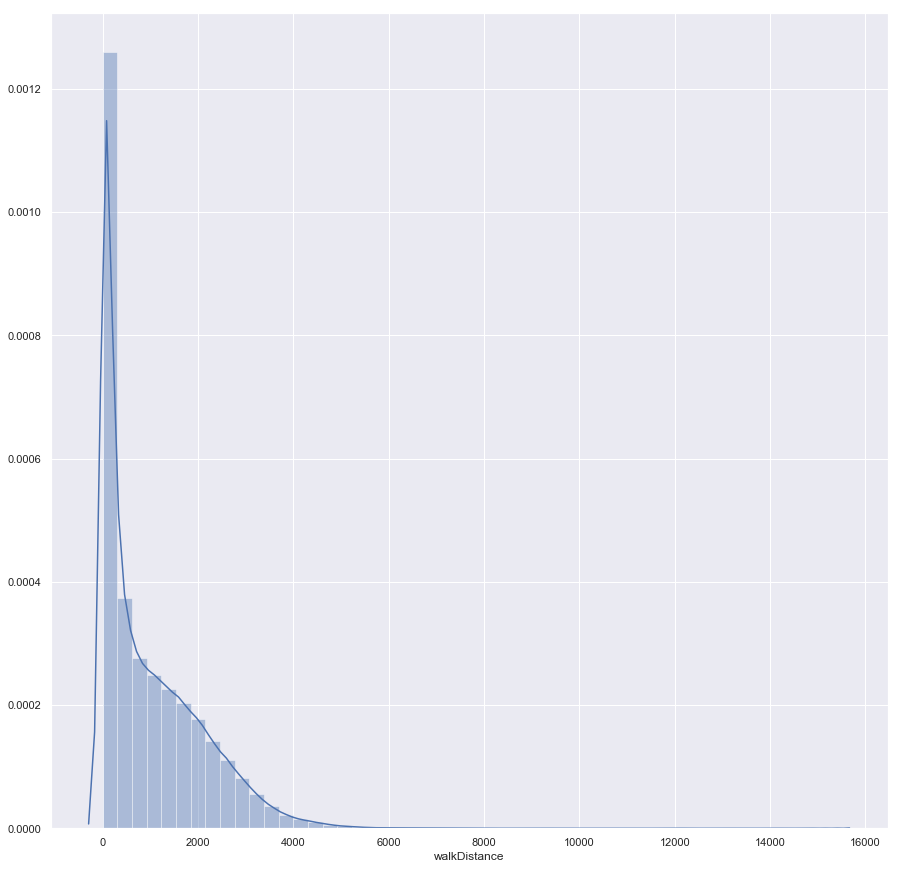

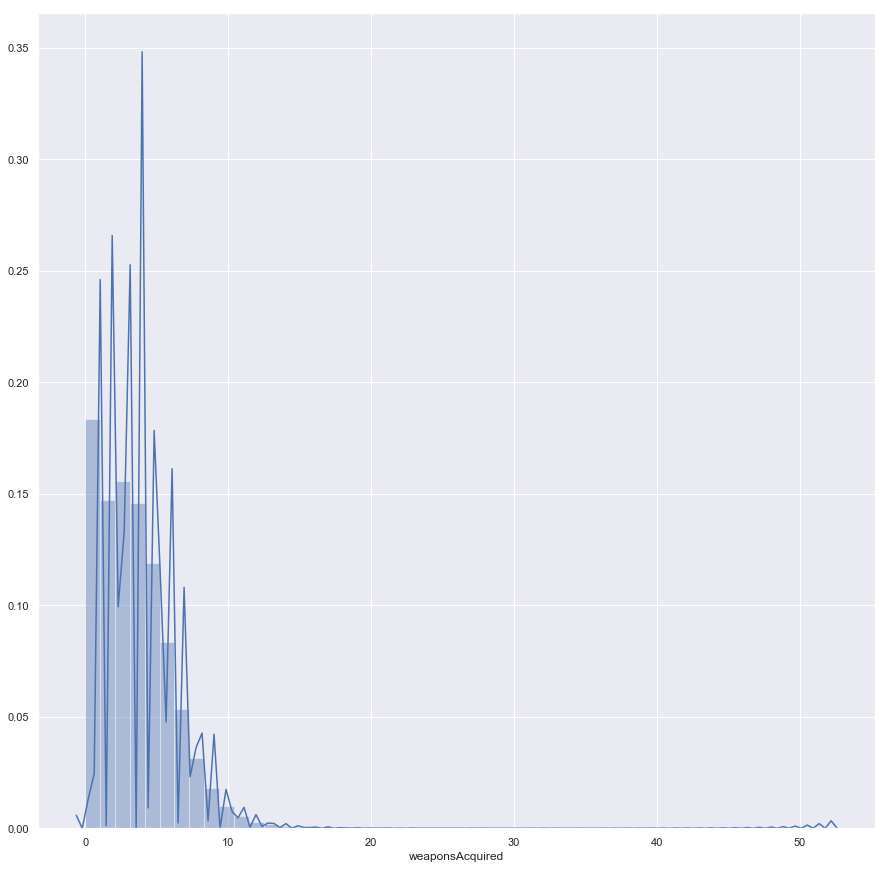

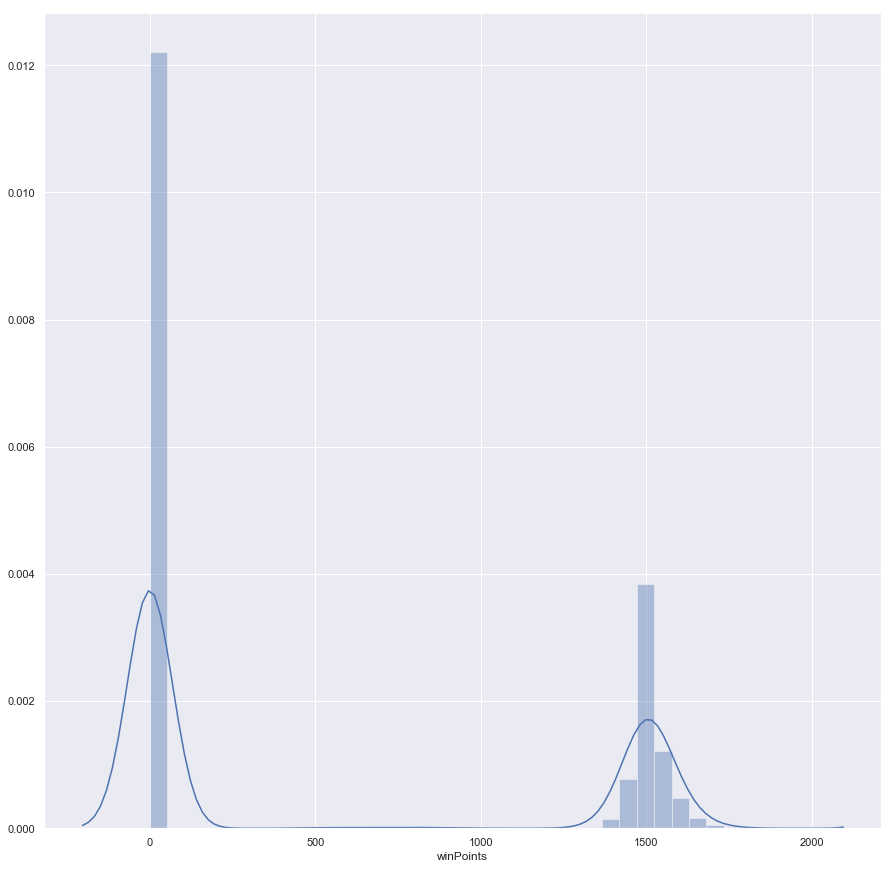

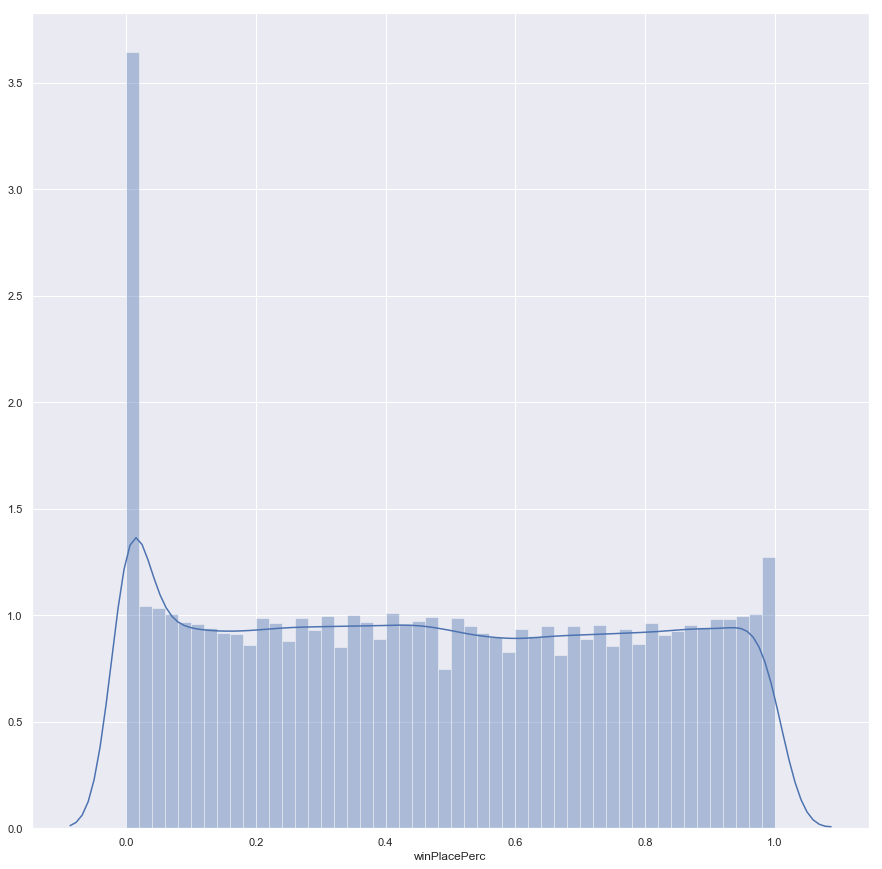

In [22]:
for feature in features:
    plt.figure(figsize = (15, 15))
    sns.distplot(solo[feature])

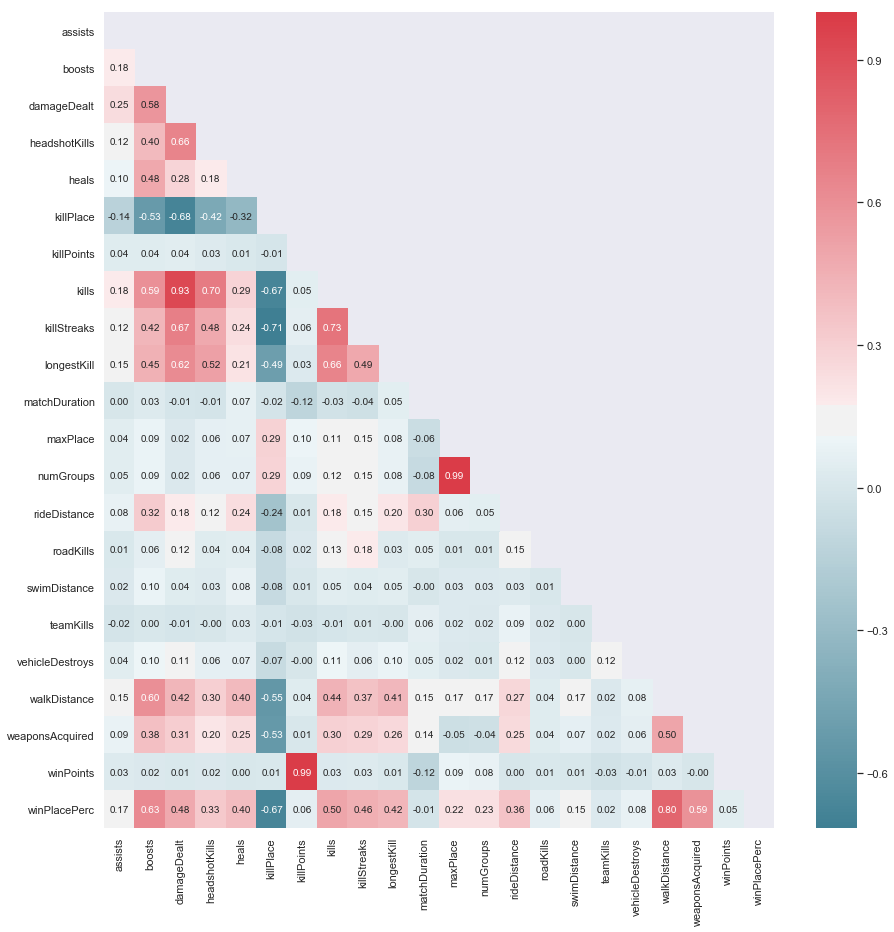

In [23]:
halfHeatMap(solo[features], mirror = False, corrtype = "pearson")

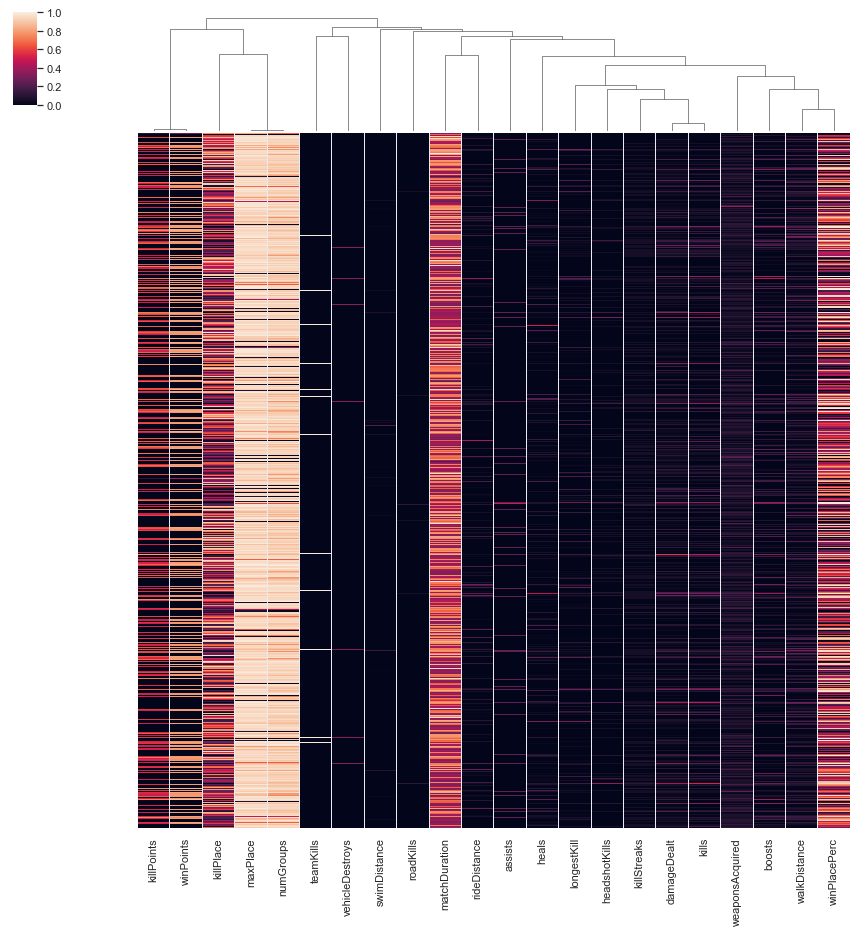

In [24]:
clustermap = sns.clustermap(solo[features], figsize = (15, 15), 
                            metric = "correlation", row_cluster = False, 
                            standard_scale = 1, yticklabels = [])

### Solo FPP Mode

In [25]:
solofpp.describe().T

count         mean          std  min        25%  \
assists          536762.0     0.057640     0.245488  0.0     0.0000   
boosts           536762.0     1.058978     1.791552  0.0     0.0000   
damageDealt      536762.0   118.918582   158.345718  0.0     0.0000   
DBNOs            536762.0     0.000000     0.000000  0.0     0.0000   
headshotKills    536762.0     0.251553     0.633480  0.0     0.0000   
heals            536762.0     1.009677     2.383452  0.0     0.0000   
killPlace        536762.0    48.025509    27.579988  1.0    24.0000   
killPoints       536762.0   460.651026   606.861680  0.0     0.0000   
kills            536762.0     0.934729     1.495987  0.0     0.0000   
killStreaks      536762.0     0.482456     0.556407  0.0     0.0000   
longestKill      536762.0    21.701060    45.716926  0.0     0.0000   
matchDuration    536762.0  1577.079069   249.381287  9.0  1377.0000   
maxPlace         536762.0    95.051017     4.851703  1.0    94.0000   
numGroups        536762.0    92.696137     5.078779  1.0    91.0000   
revives          536762.0     0.000000     0.000000  0.0     0.0000   
rideDistance     536762.0   403.208940  1270.644994  0.0     0.0000   
roadKills        536762.0     0.003488     0.061611  0.0     0.0000   
swimDistance     536762.0     4.824639    32.658238  0.0     0.0000   
teamKills        536762.0     0.010183     0.100397  0.0     0.0000   
vehicleDestroys  536762.0     0.003499     0.061398  0.0     0.0000   
walkDistance     536762.0   945.307330  1075.042511  0.0    97.0900   
weaponsAcquired  536762.0     3.486521     2.327557  0.0     2.0000   
winPoints        536762.0   563.690356   730.821272  0.0     0.0000   
winPlacePerc     536761.0     0.491835     0.295021  0.0     0.2366   

                       50%        75%      max  
assists             0.0000     0.0000      5.0  
boosts              0.0000     2.0000     28.0  
damageDealt        75.7900   171.0000   2305.0  
DBNOs               0.0000     0.0000      0.0  
headshotKills       0.0000     0.0000     16.0  
heals               0.0000     1.0000     63.0  
killPlace          48.0000    72.0000    100.0  
killPoints          0.0000  1120.0000   1970.0  
kills               0.0000     1.0000     23.0  
killStreaks         0.0000     1.0000      5.0  
longestKill         0.0000    22.0600    940.1  
matchDuration    1439.0000  1854.0000   2199.0  
maxPlace           96.0000    97.0000    100.0  
numGroups          93.0000    95.0000    100.0  
revives             0.0000     0.0000      0.0  
rideDistance        0.0000     0.0000  40710.0  
roadKills           0.0000     0.0000      4.0  
swimDistance        0.0000     0.0000   1974.0  
teamKills           0.0000     0.0000      1.0  
vehicleDestroys     0.0000     0.0000      5.0  
walkDistance      467.7000  1577.0000  25780.0  
weaponsAcquired     3.0000     5.0000    153.0  
winPoints           0.0000  1491.0000   1922.0  
winPlacePerc        0.4891     0.7474      1.0

In [26]:
solofpp = solofpp.dropna()
solofpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536761 entries, 0 to 536761
Data columns (total 28 columns):
Id                 536761 non-null object
groupId            536761 non-null object
matchId            536761 non-null object
assists            536761 non-null int64
boosts             536761 non-null int64
damageDealt        536761 non-null float64
DBNOs              536761 non-null int64
headshotKills      536761 non-null int64
heals              536761 non-null int64
killPlace          536761 non-null int64
killPoints         536761 non-null int64
kills              536761 non-null int64
killStreaks        536761 non-null int64
longestKill        536761 non-null float64
matchDuration      536761 non-null int64
matchType          536761 non-null object
maxPlace           536761 non-null int64
numGroups          536761 non-null int64
revives            536761 non-null int64
rideDistance       536761 non-null float64
roadKills          536761 non-null int64
swimDistance      

In [27]:
solofpp = solofpp.drop(["DBNOs", "revives"], axis = 1)

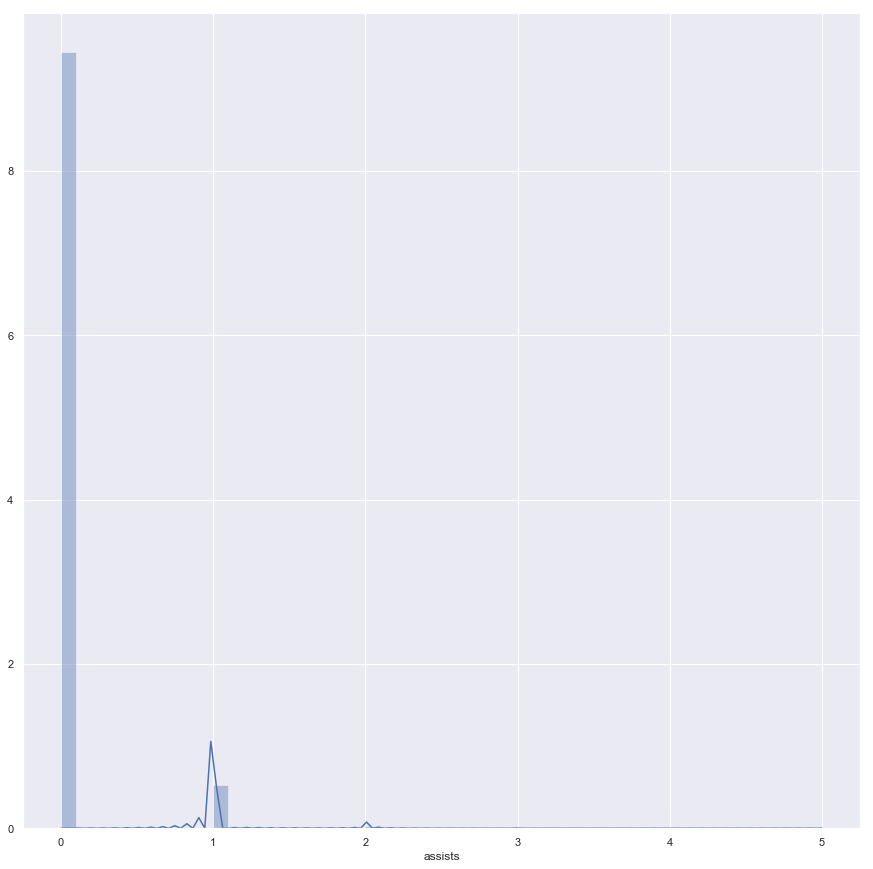

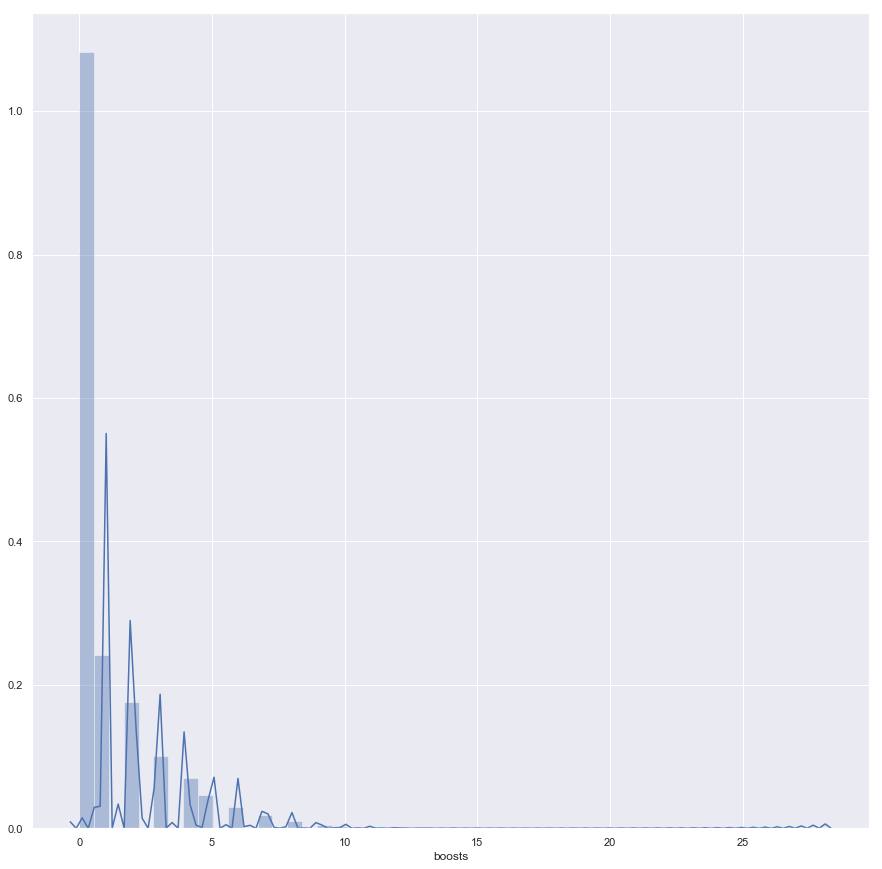

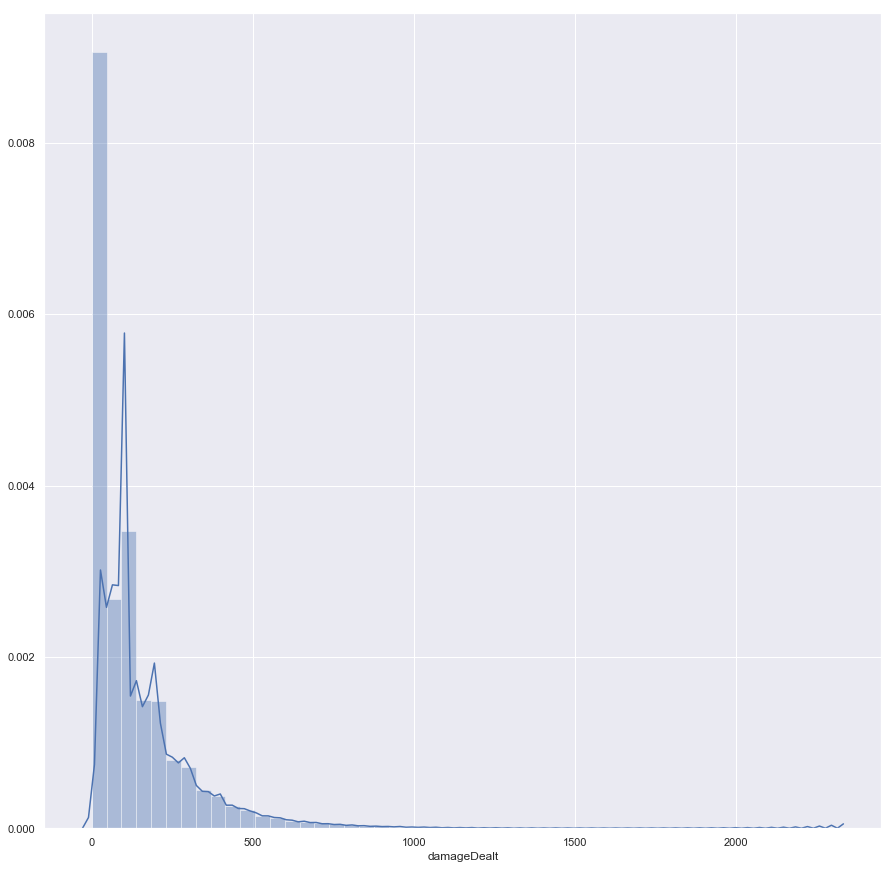

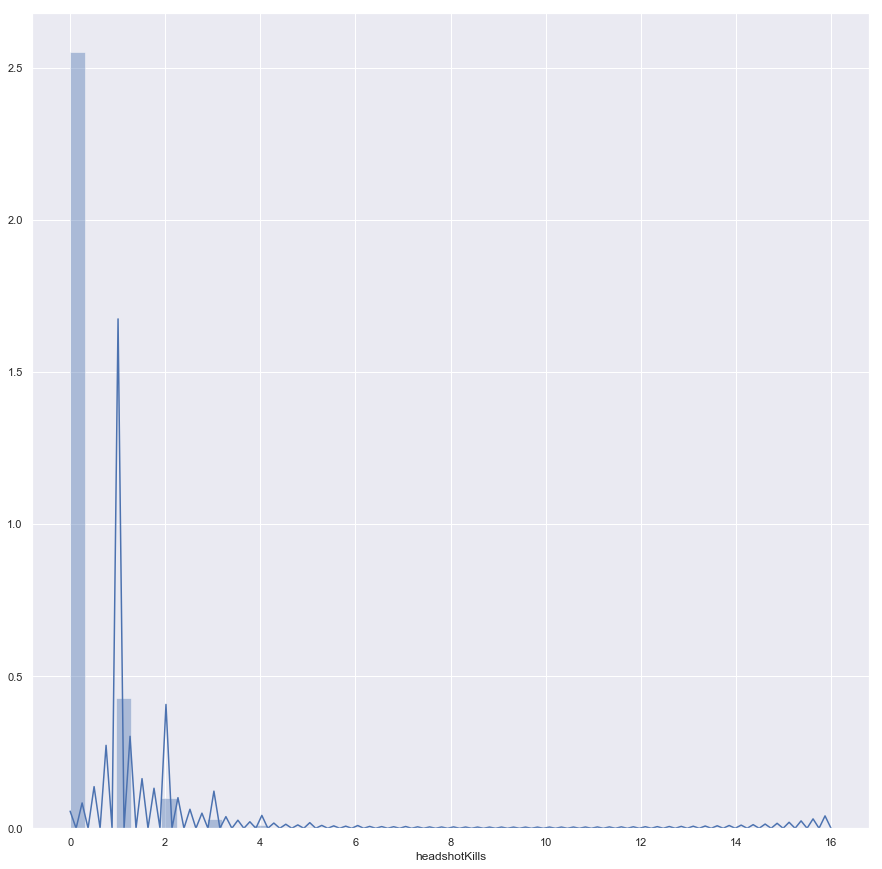

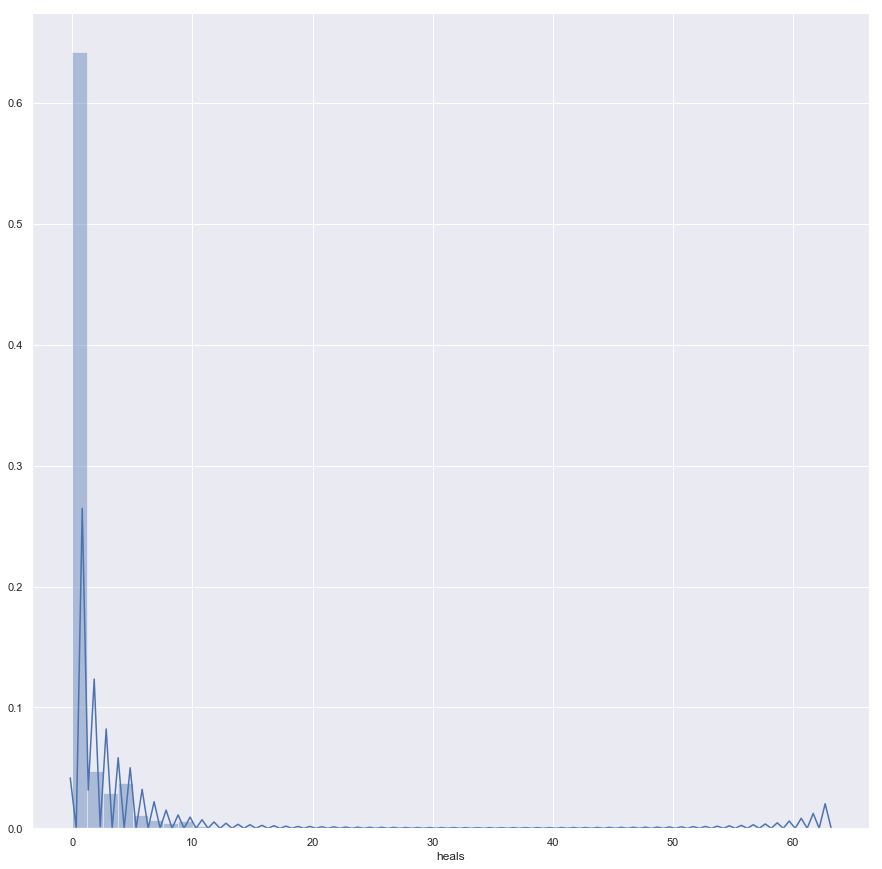

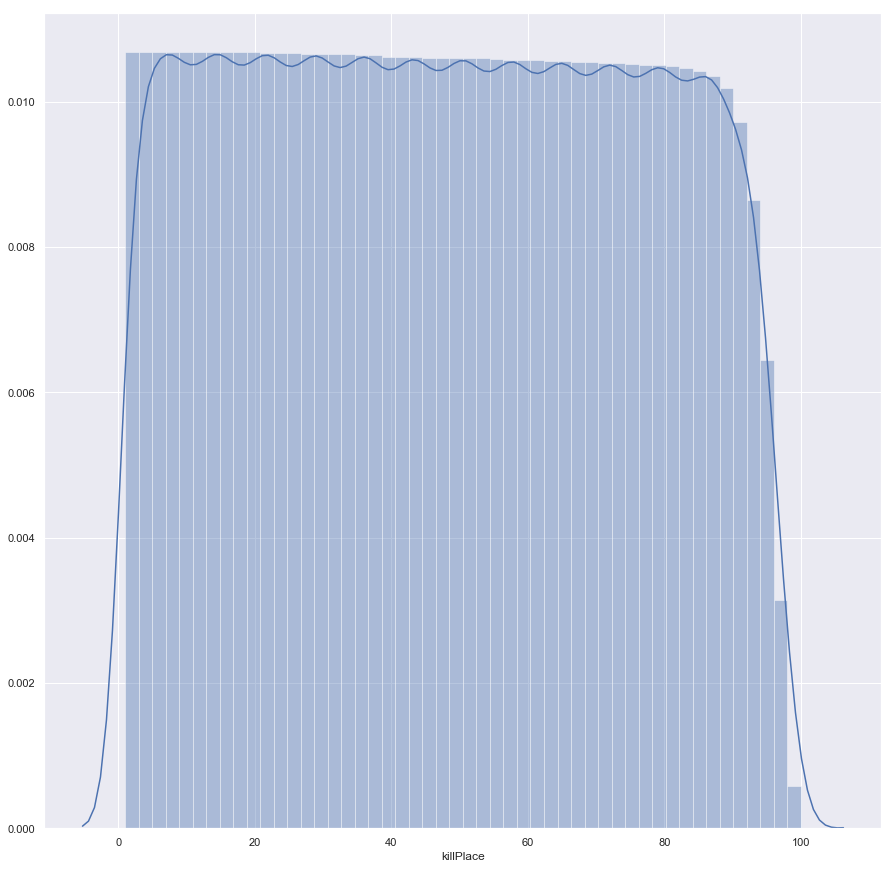

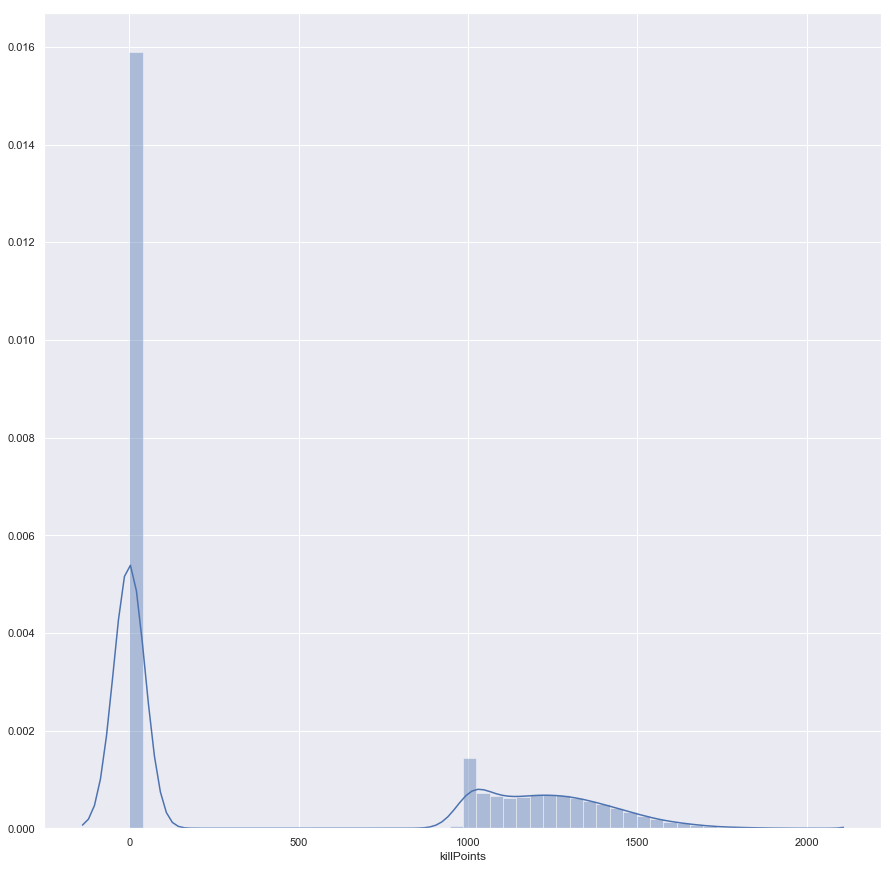

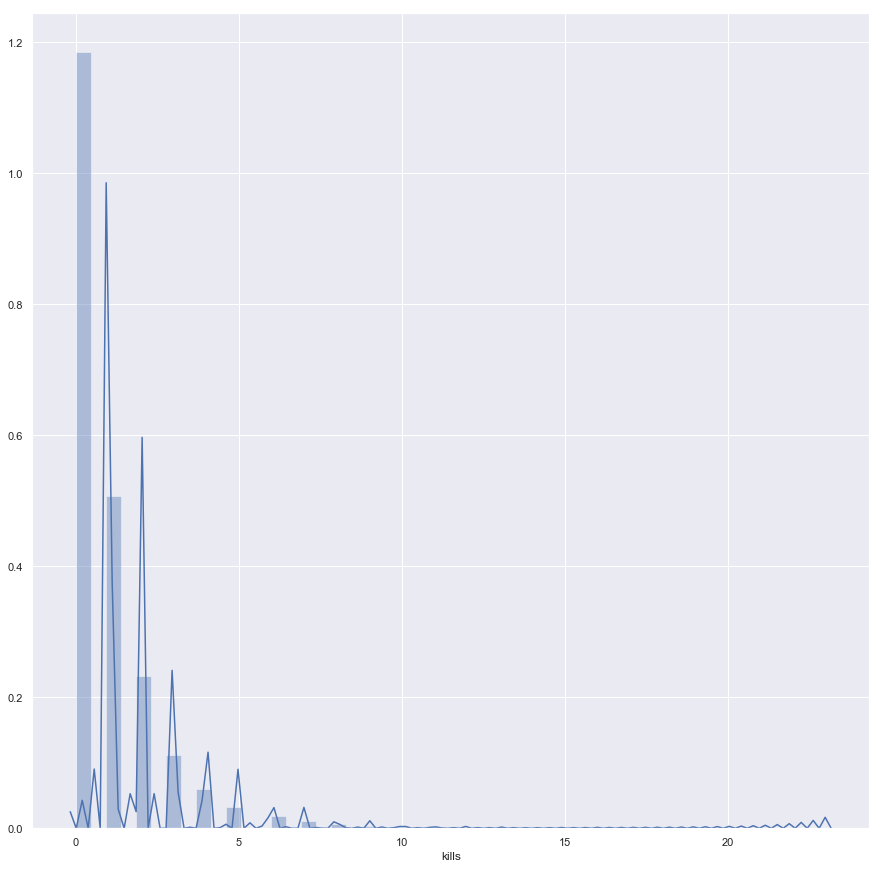

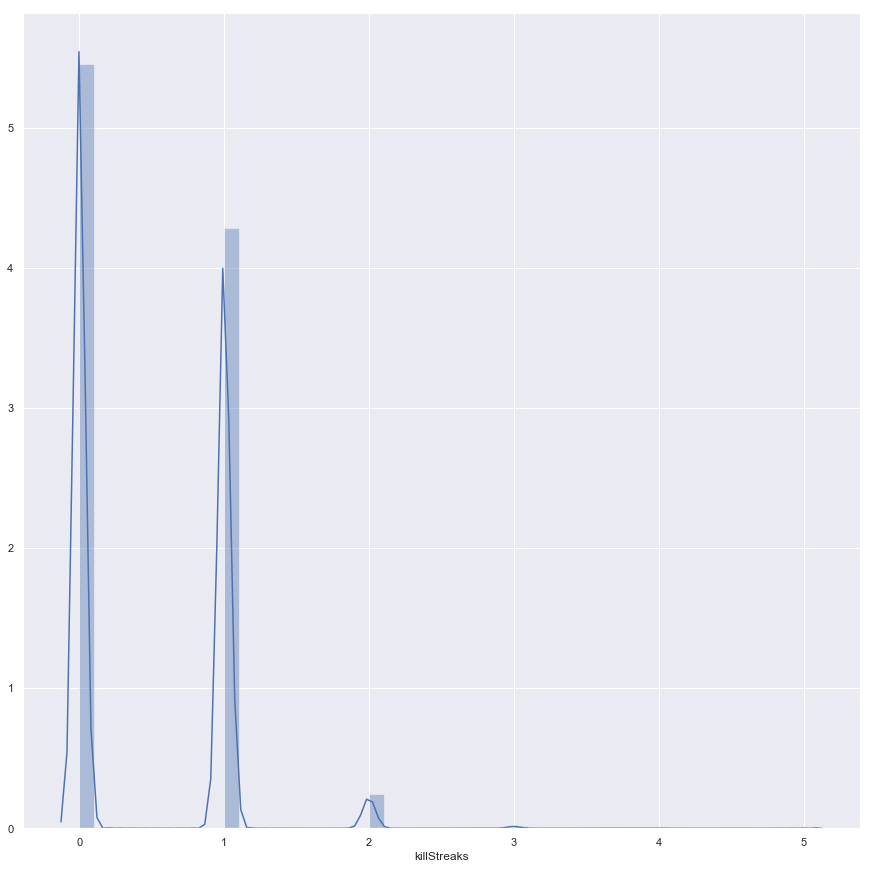

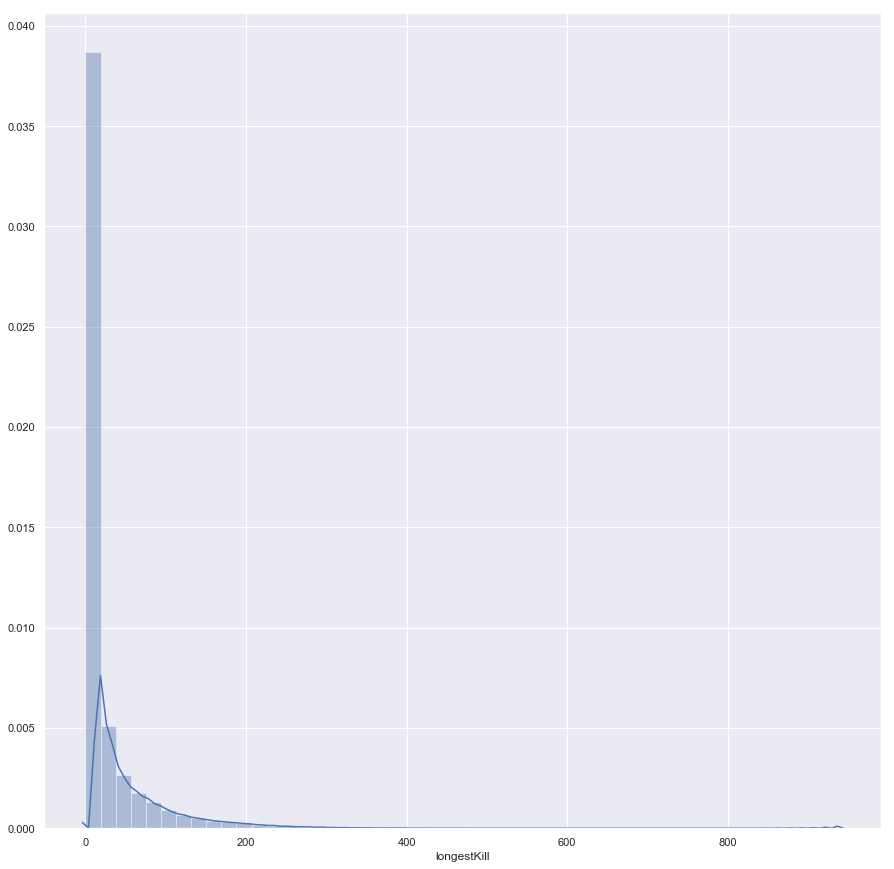

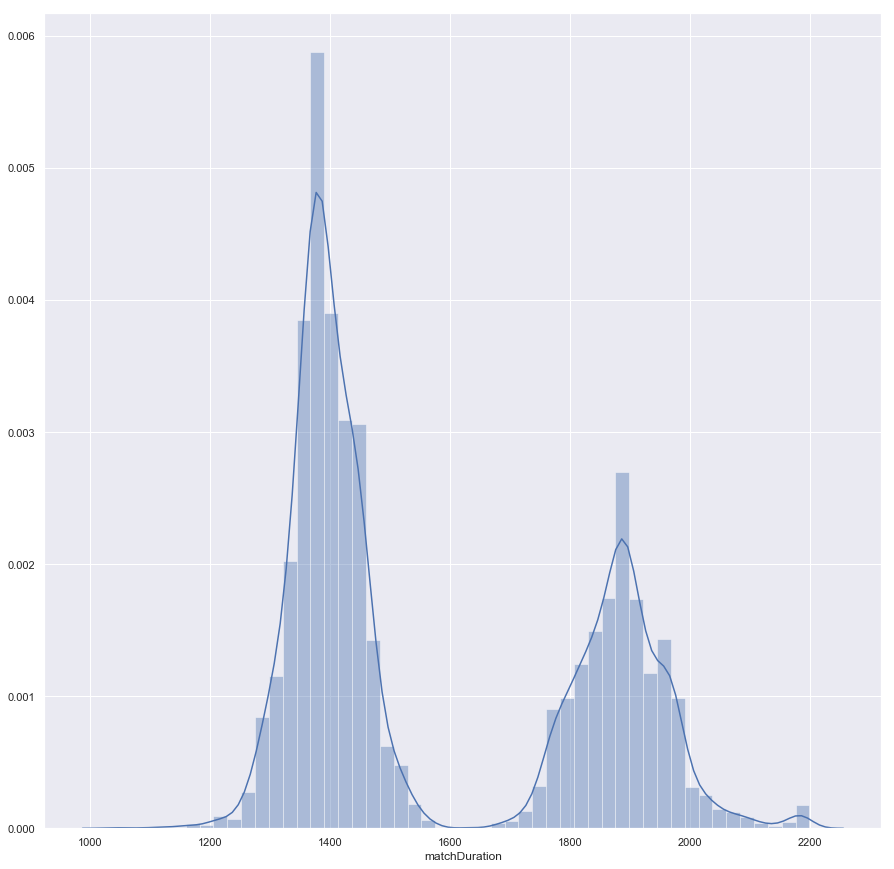

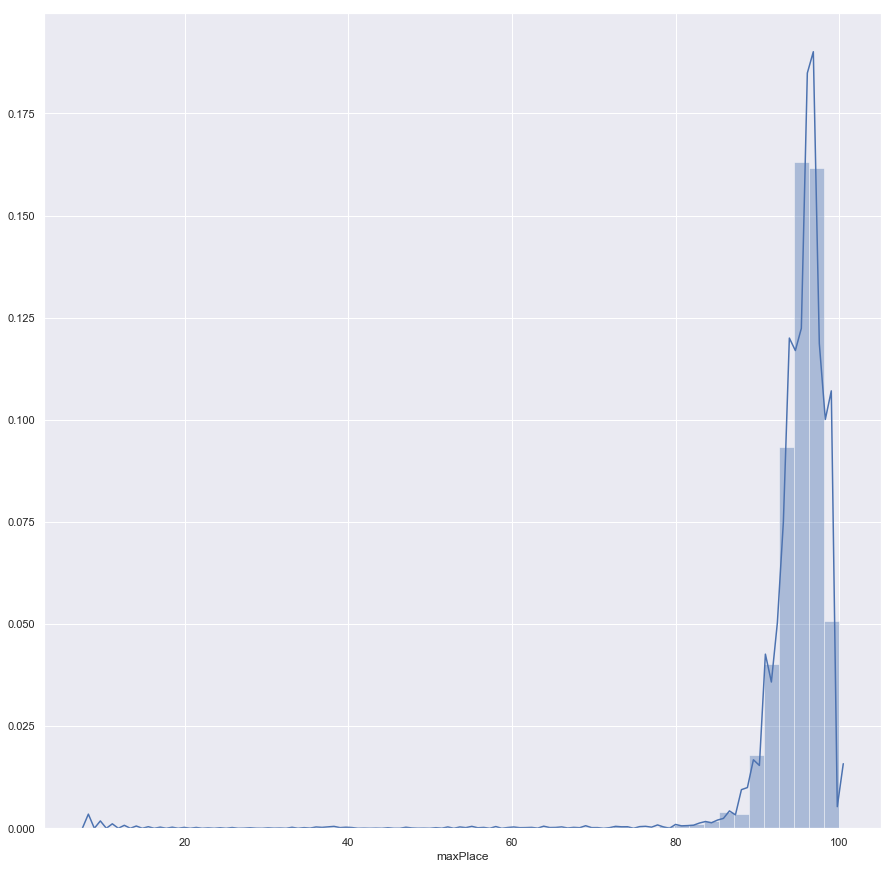

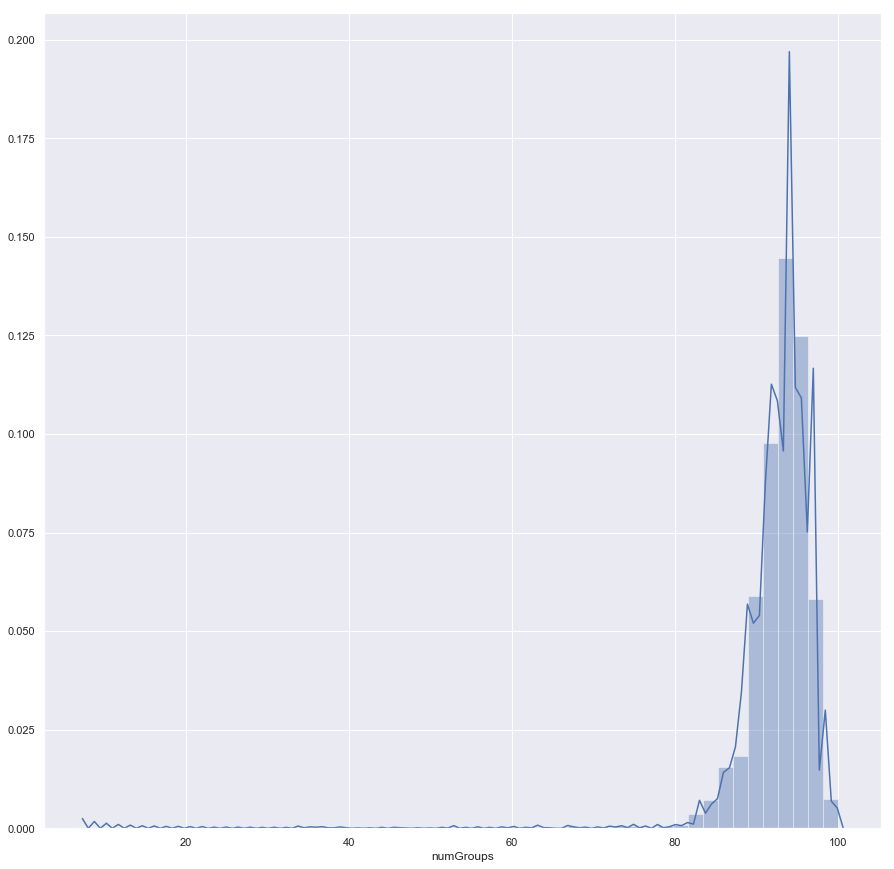

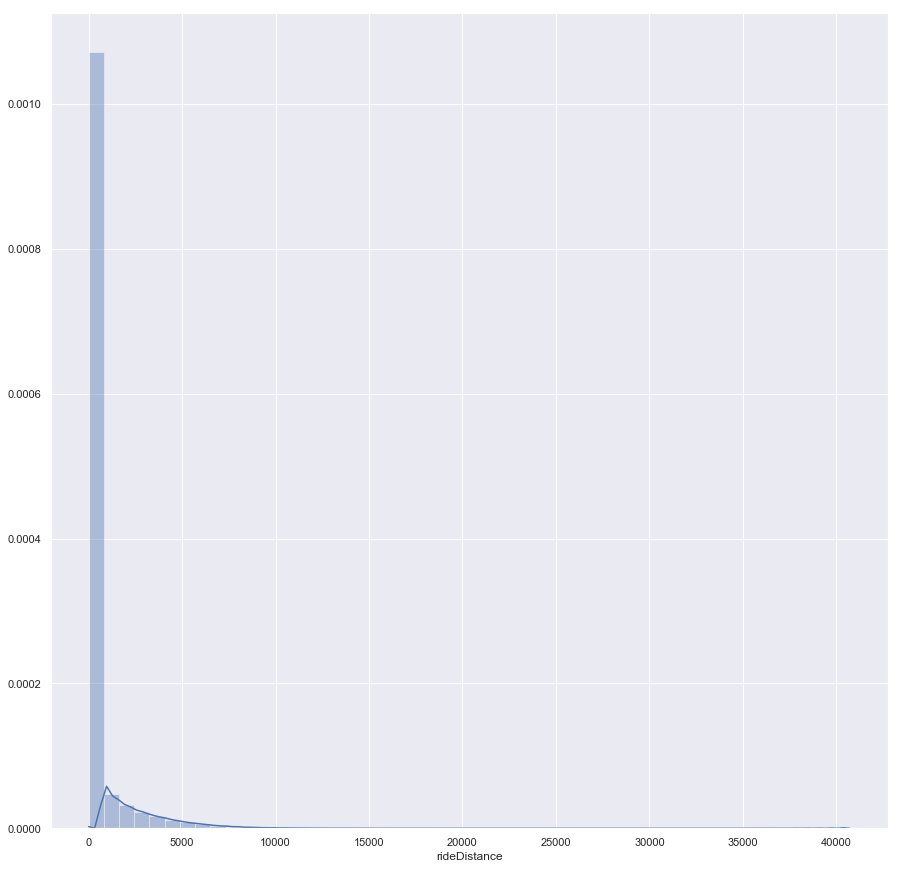

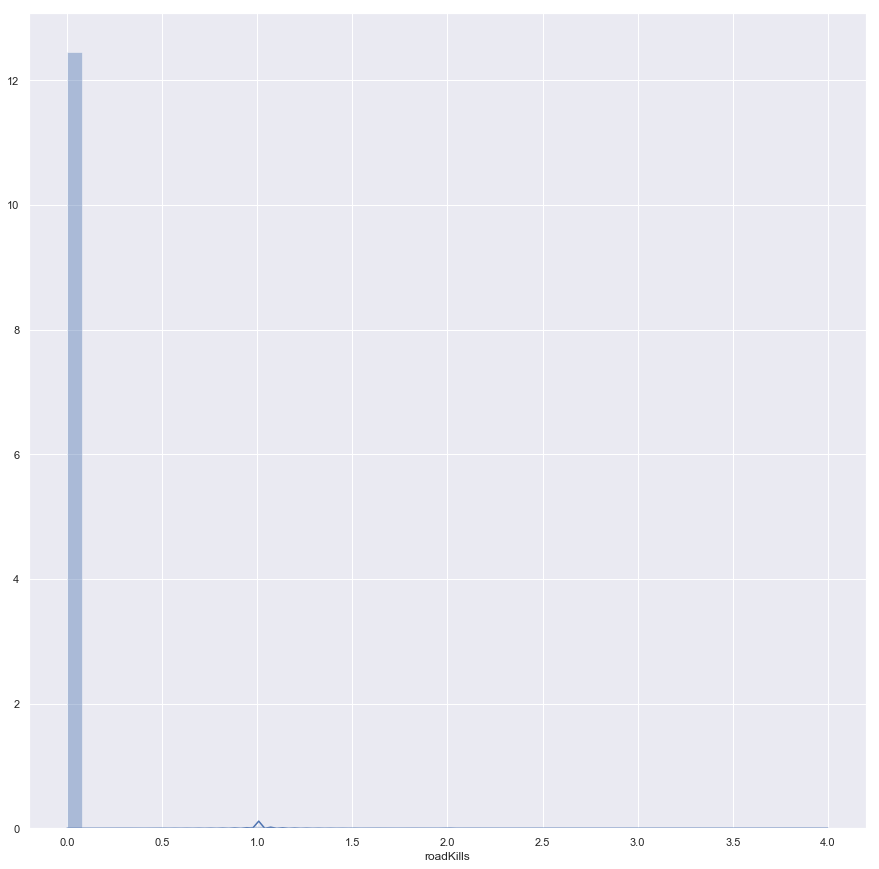

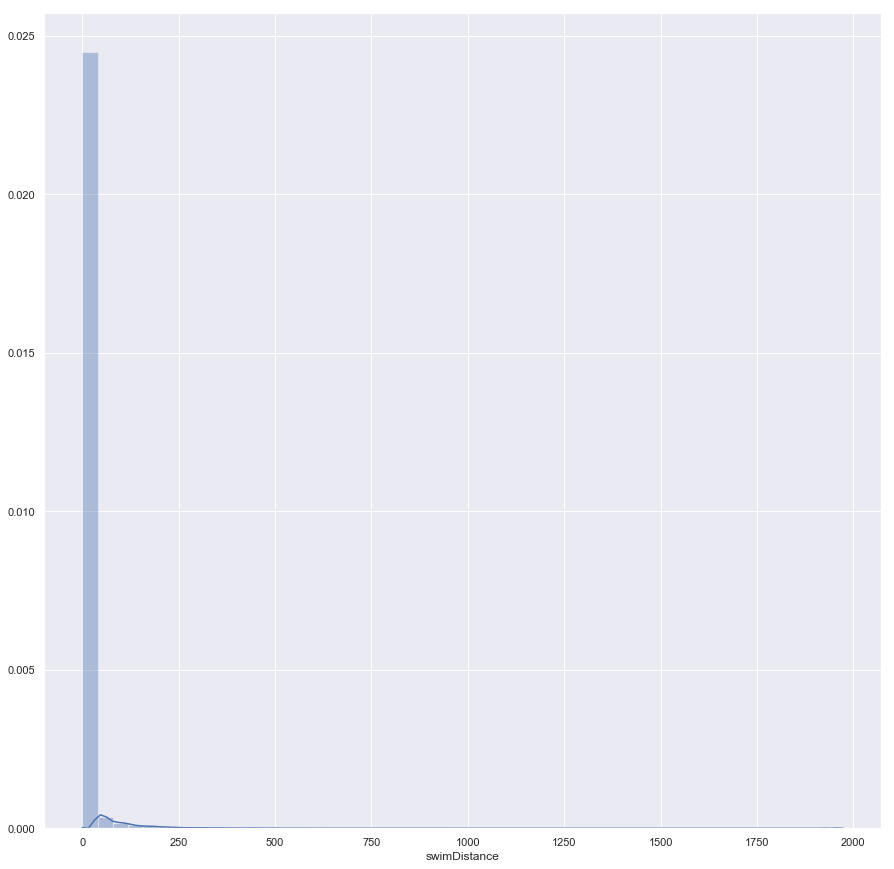

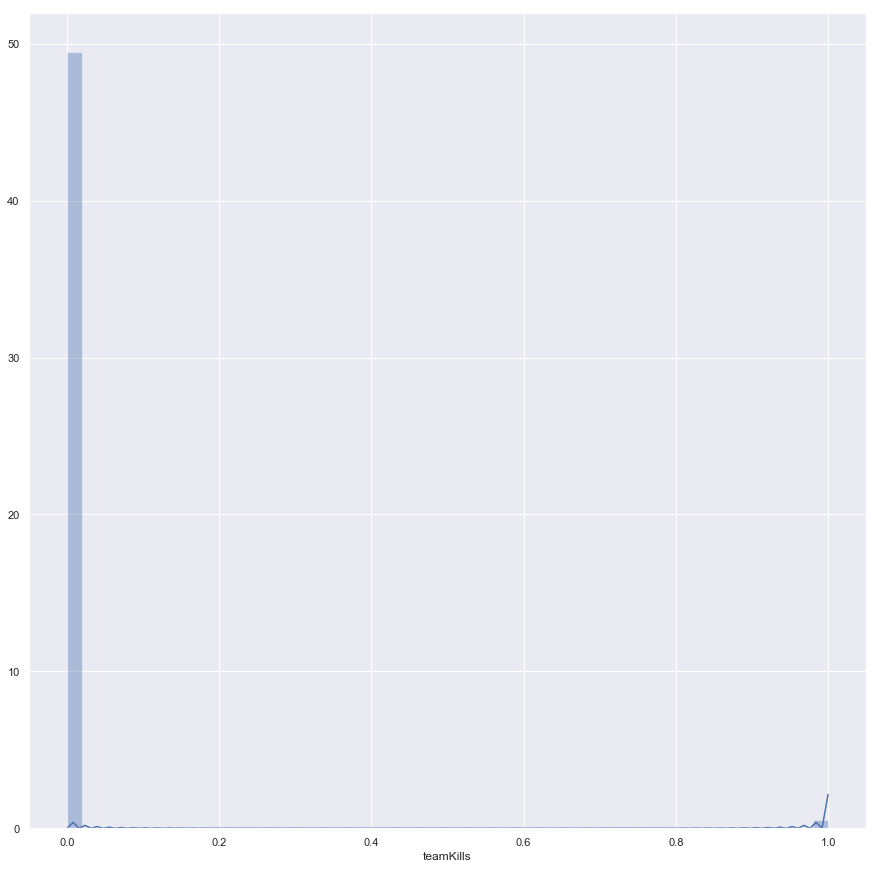

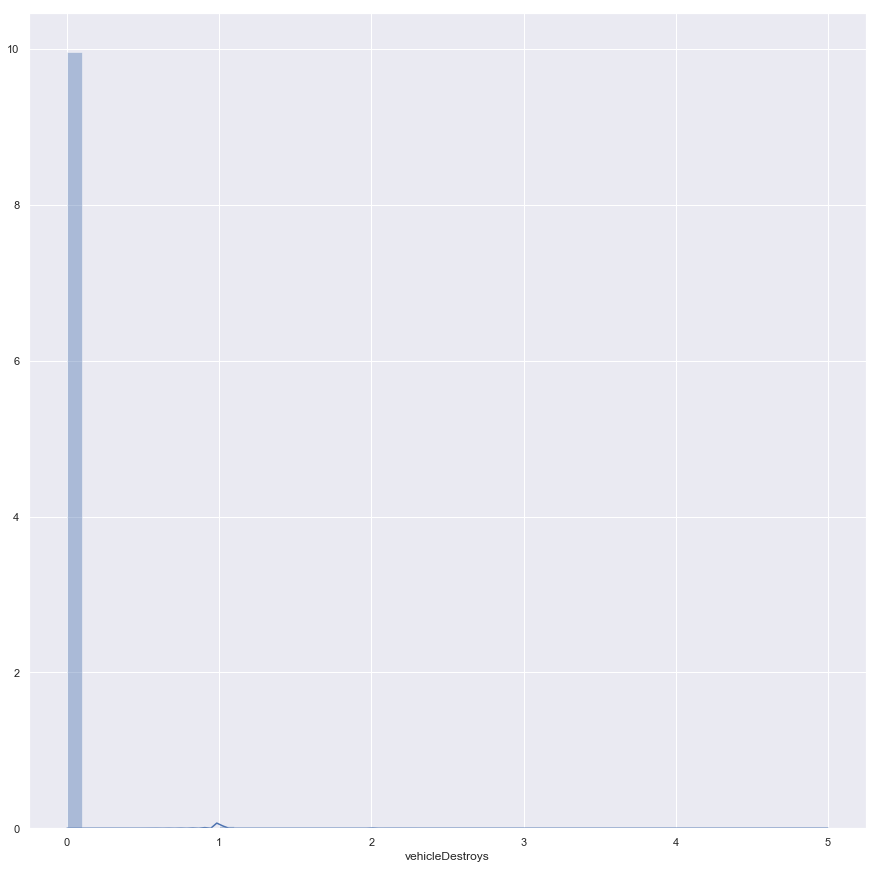

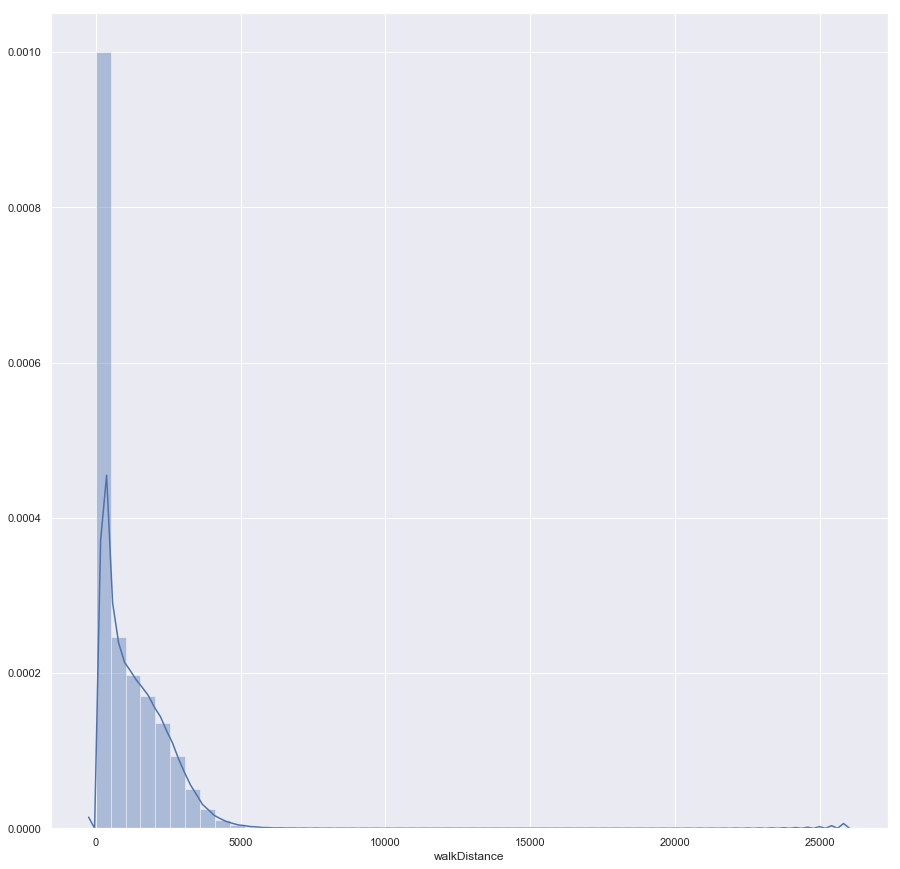

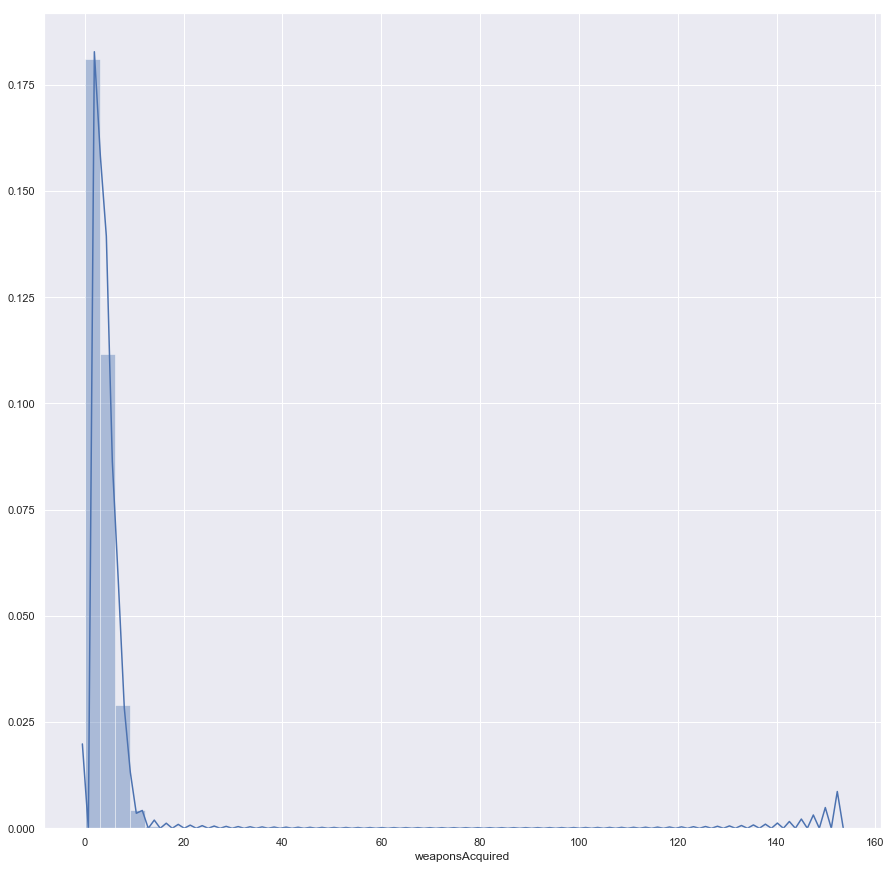

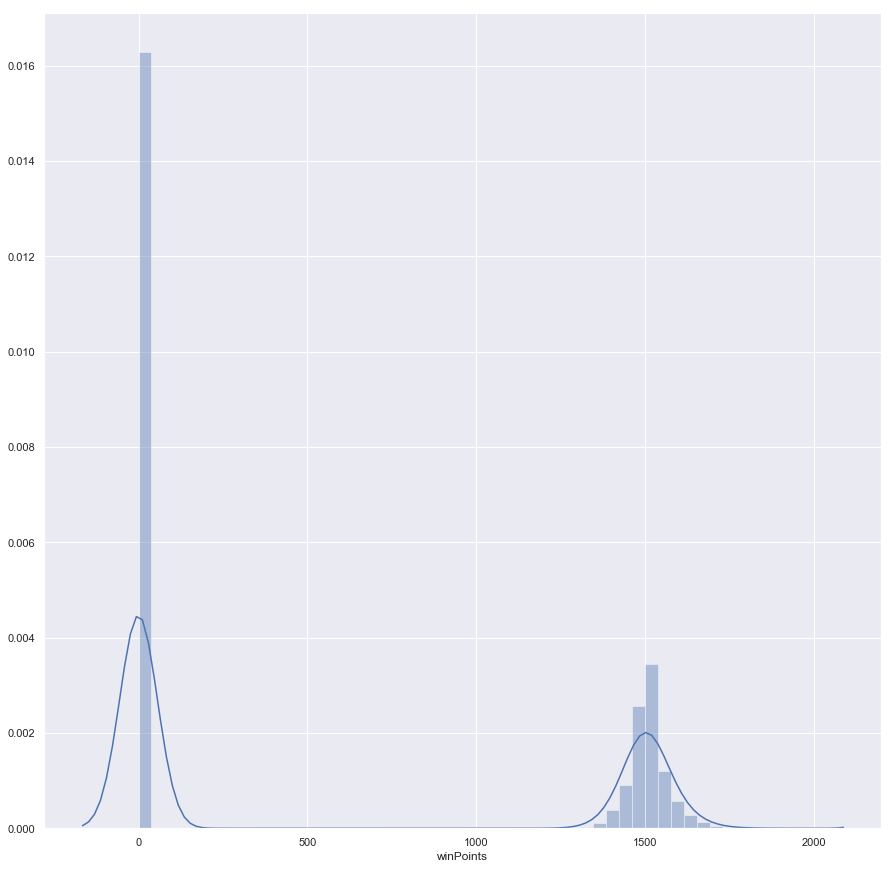

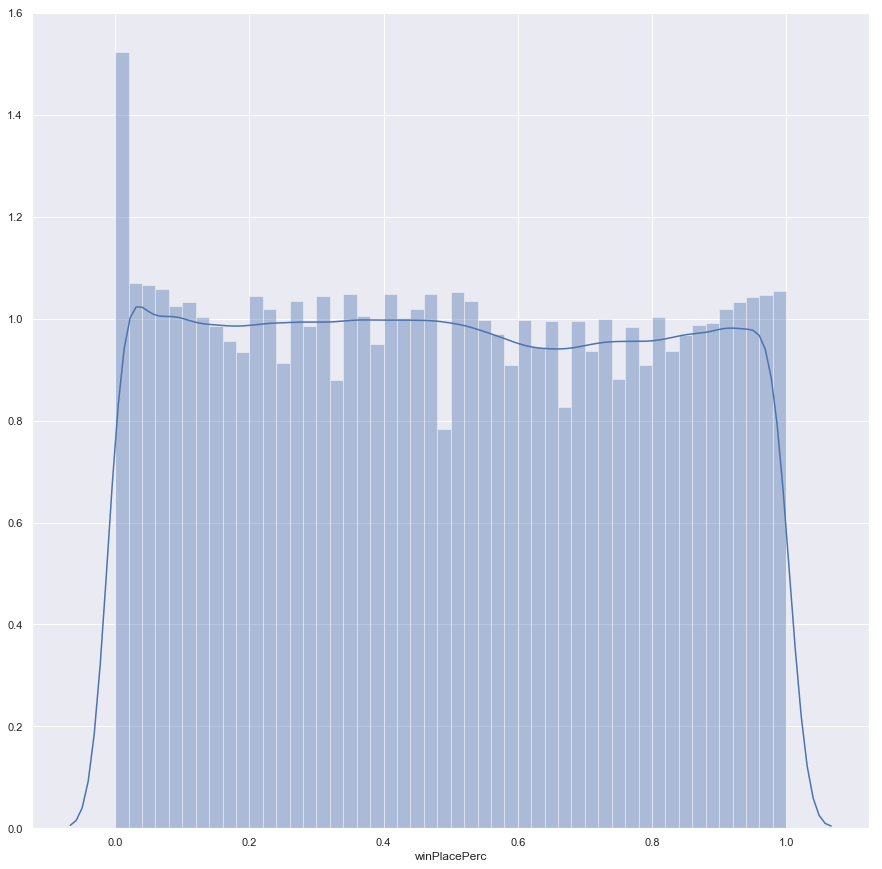

In [28]:
for feature in features:
    plt.figure(figsize = (15, 15))
    sns.distplot(solofpp[feature])

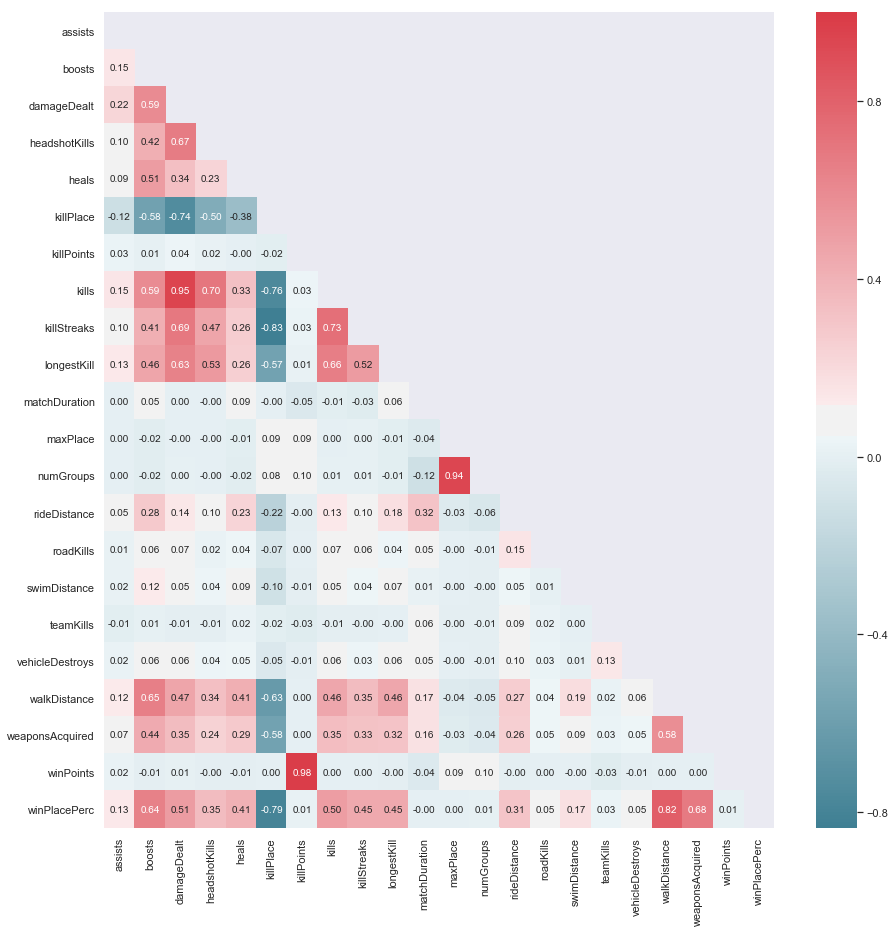

In [29]:
halfHeatMap(solofpp[features], mirror = False, corrtype = "pearson")

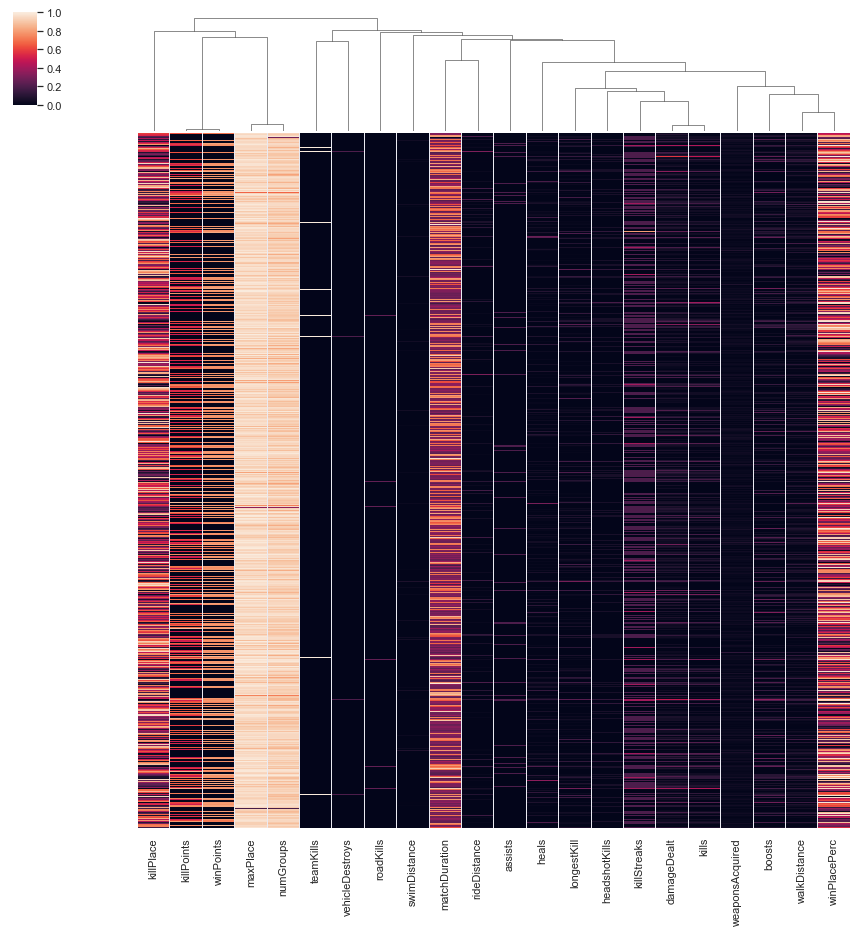

In [30]:
clustermap = sns.clustermap(solofpp[features], figsize = (15, 15), 
                            metric = "correlation", row_cluster = False, 
                            standard_scale = 1, yticklabels = [])

### Normal/FPP modes

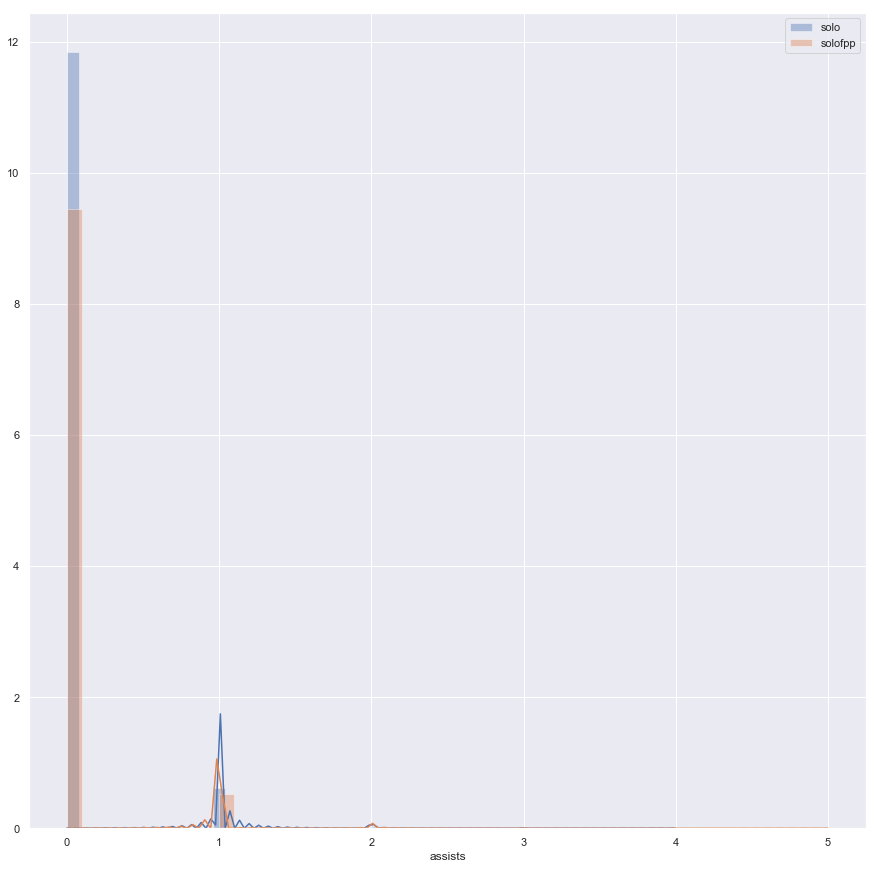

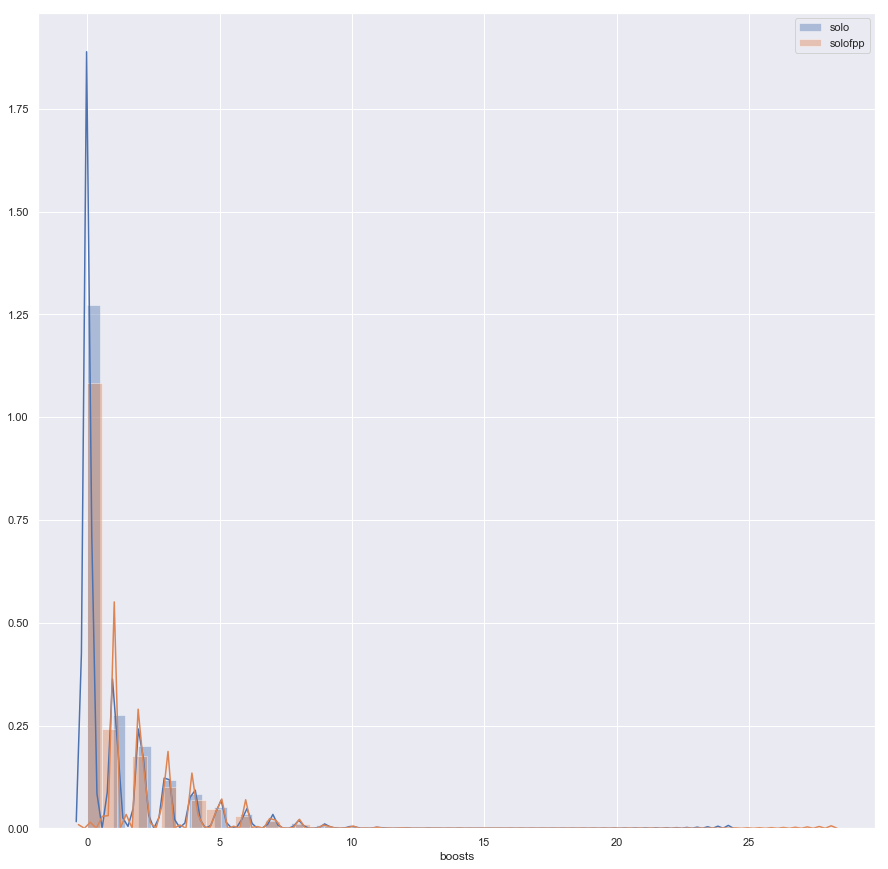

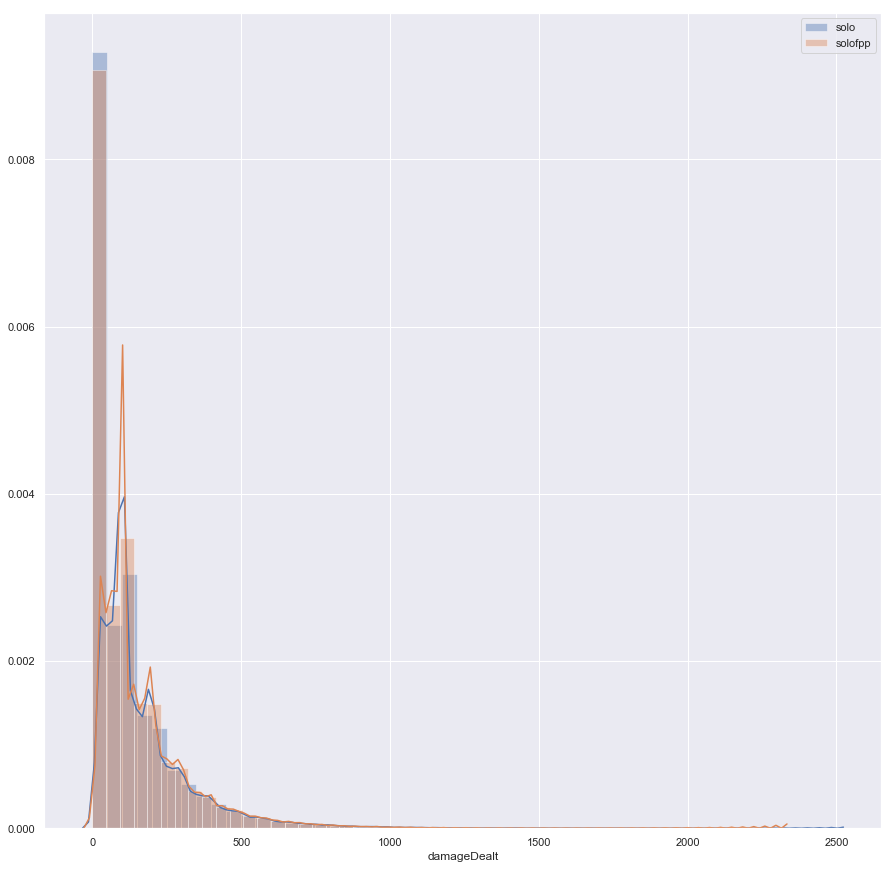

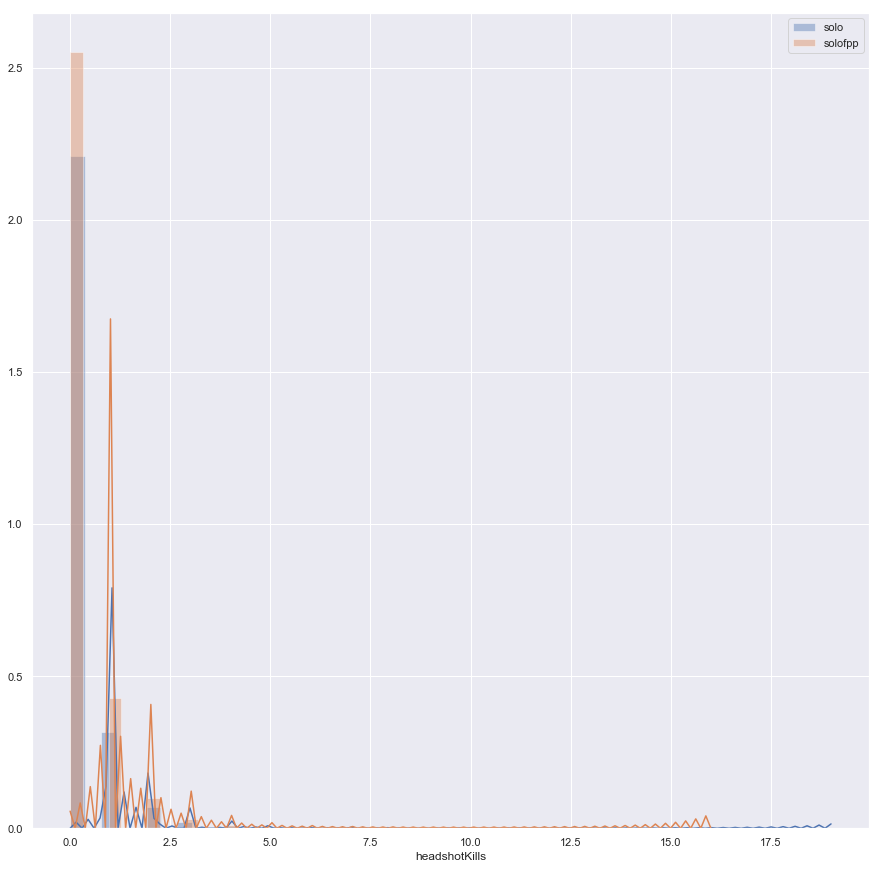

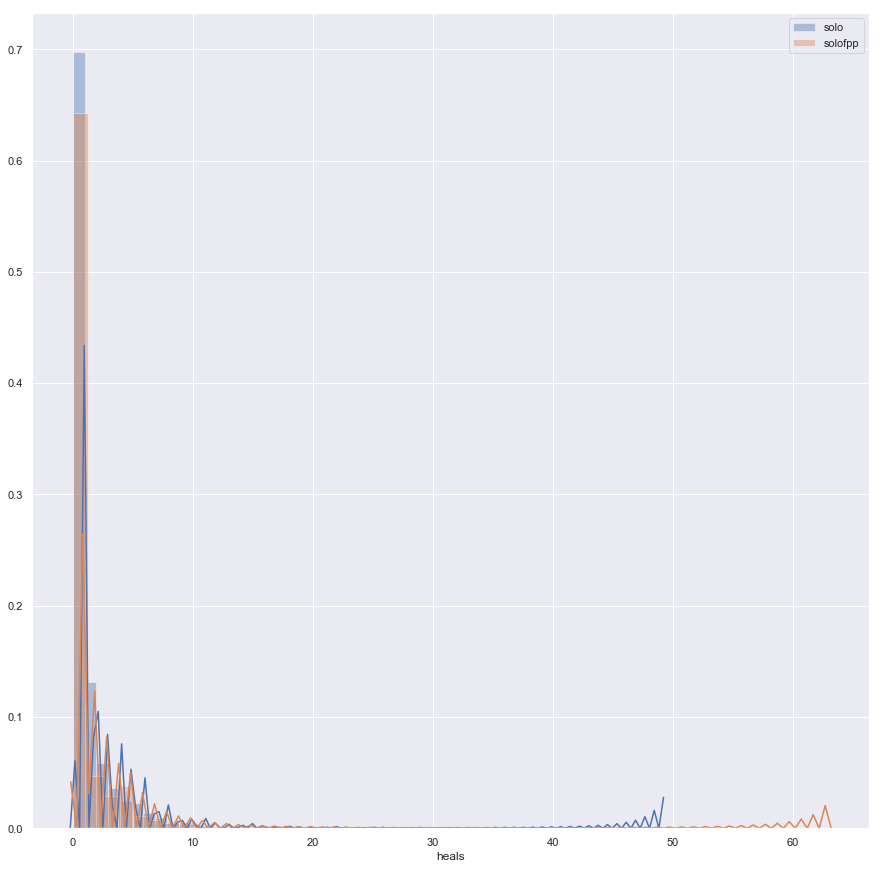

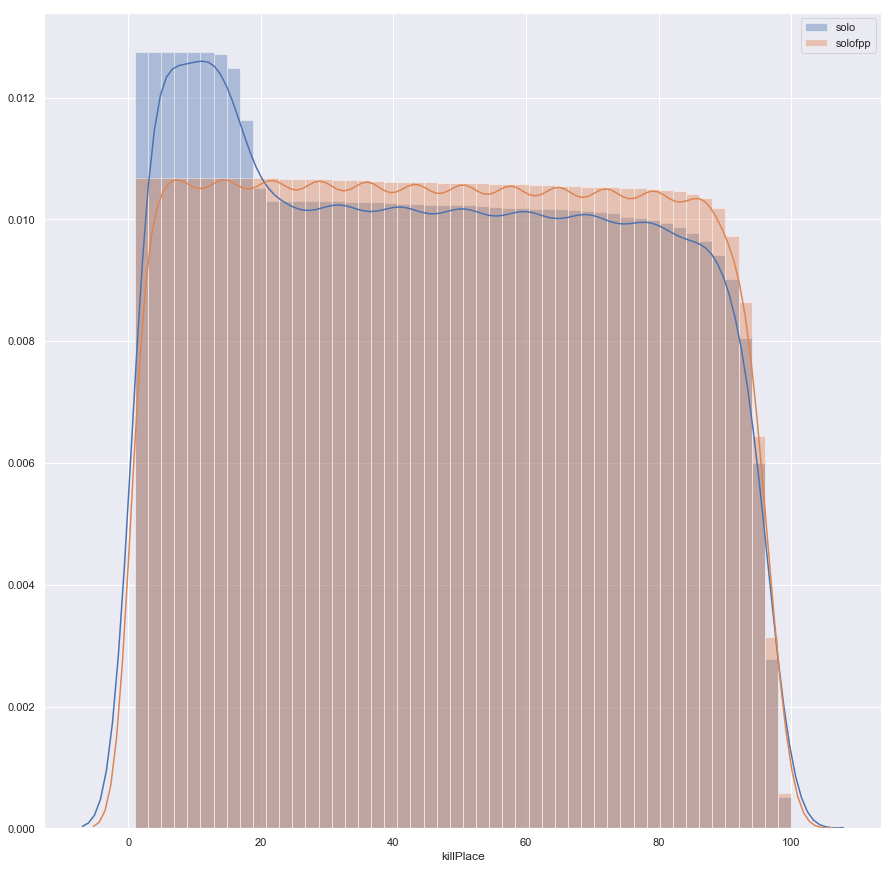

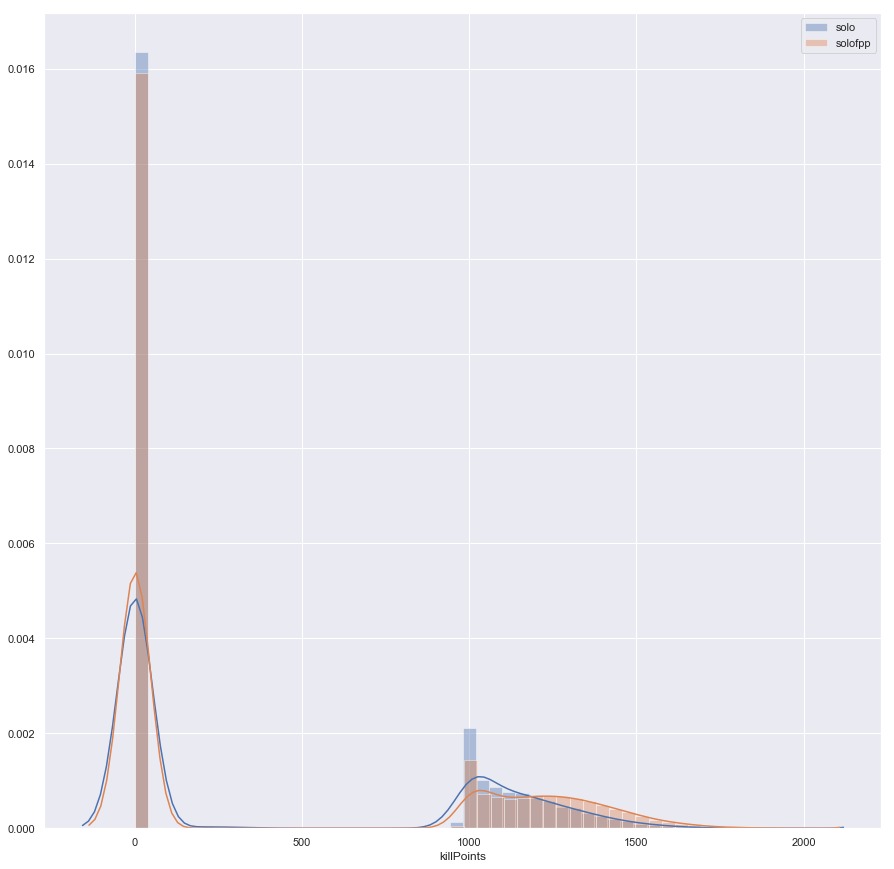

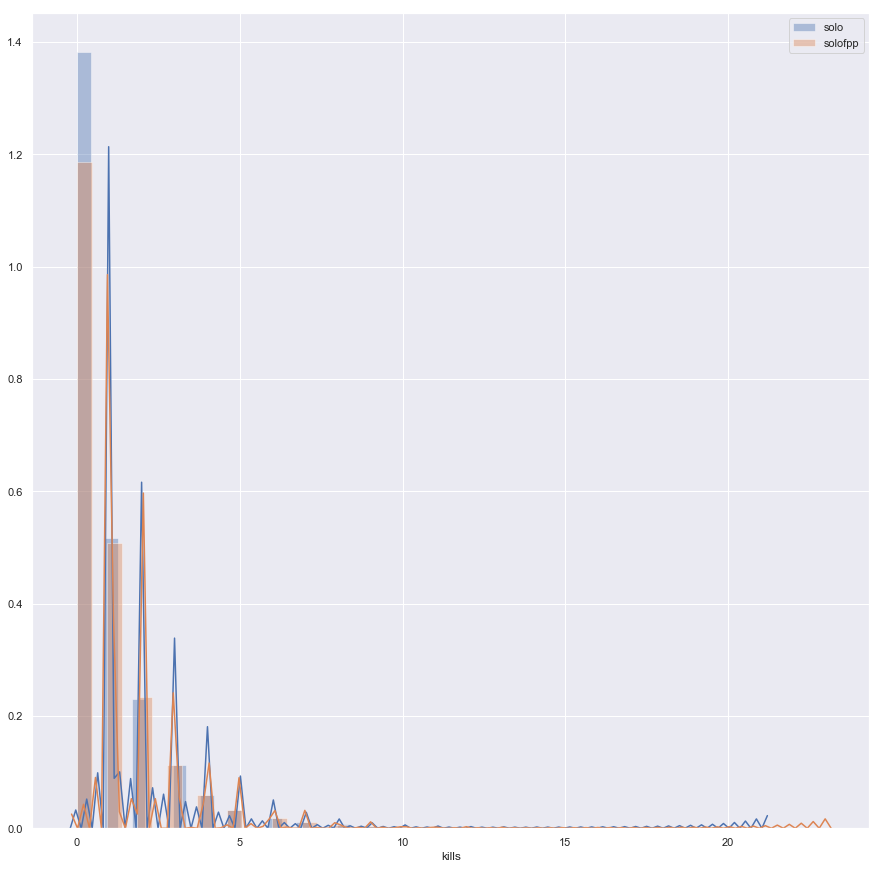

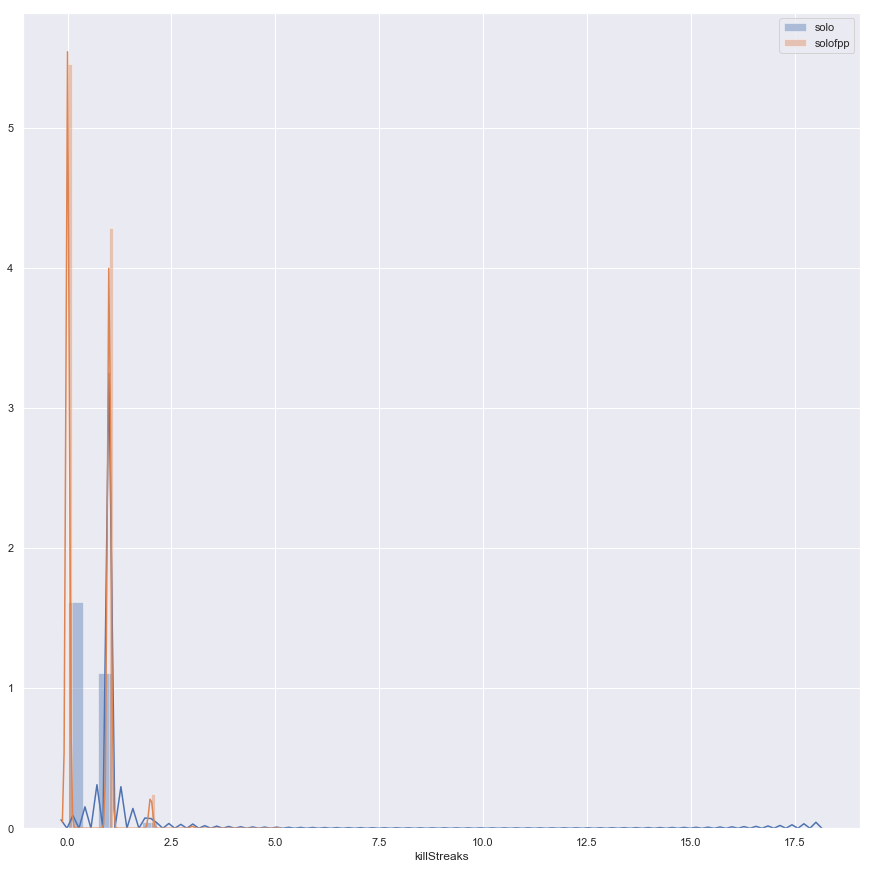

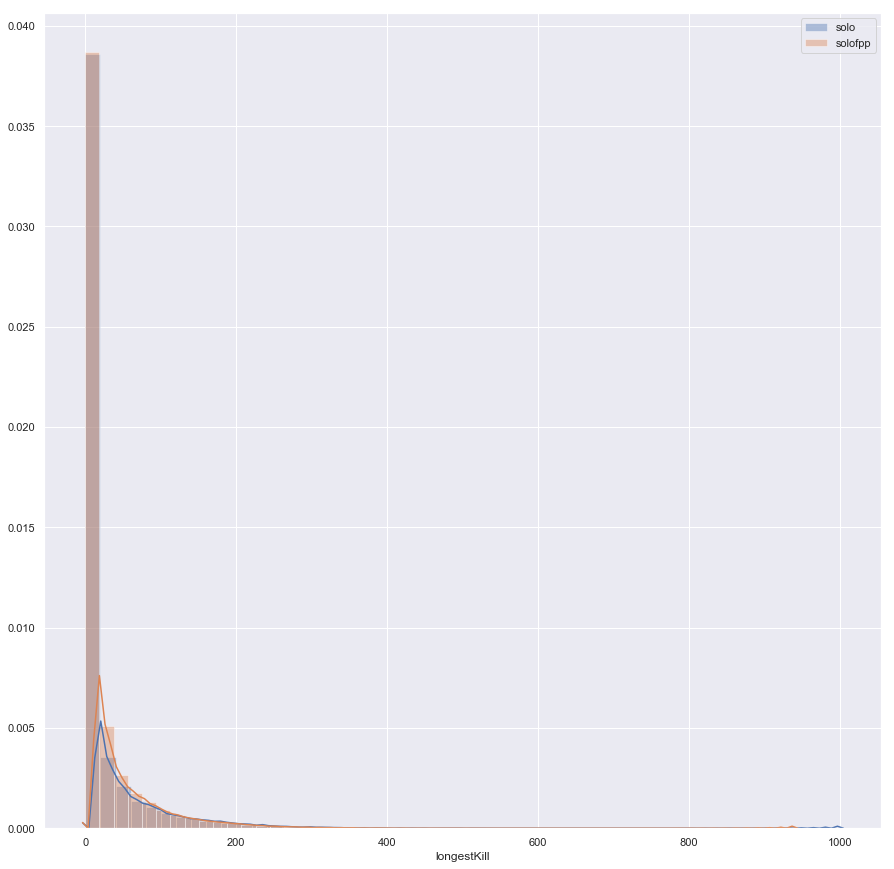

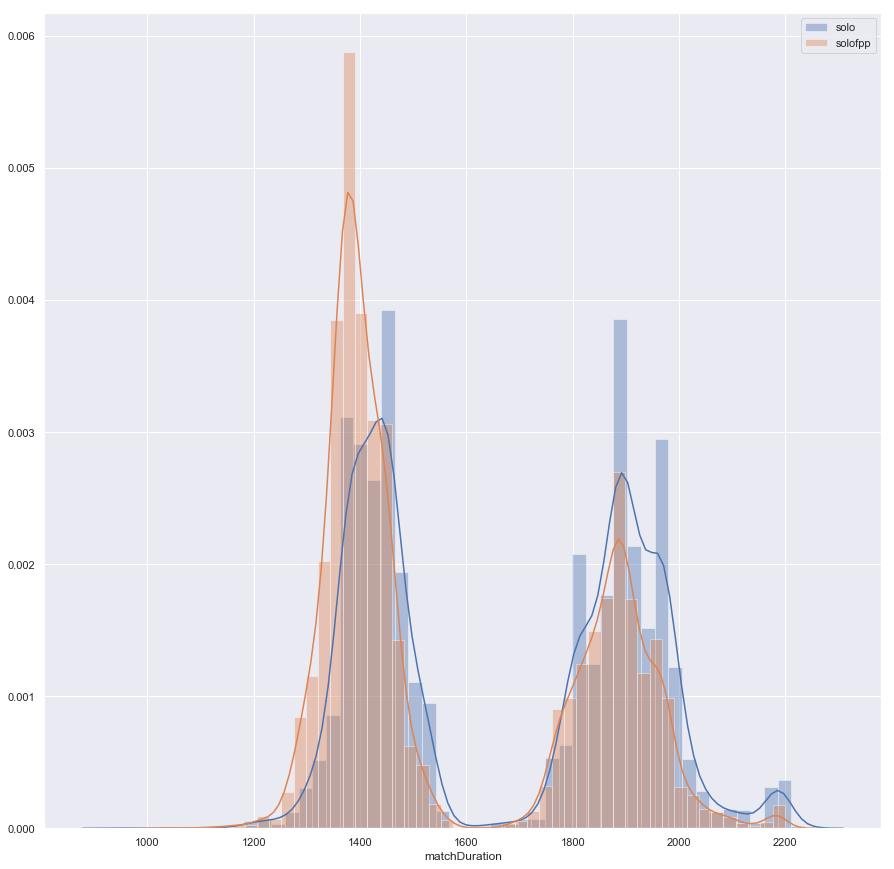

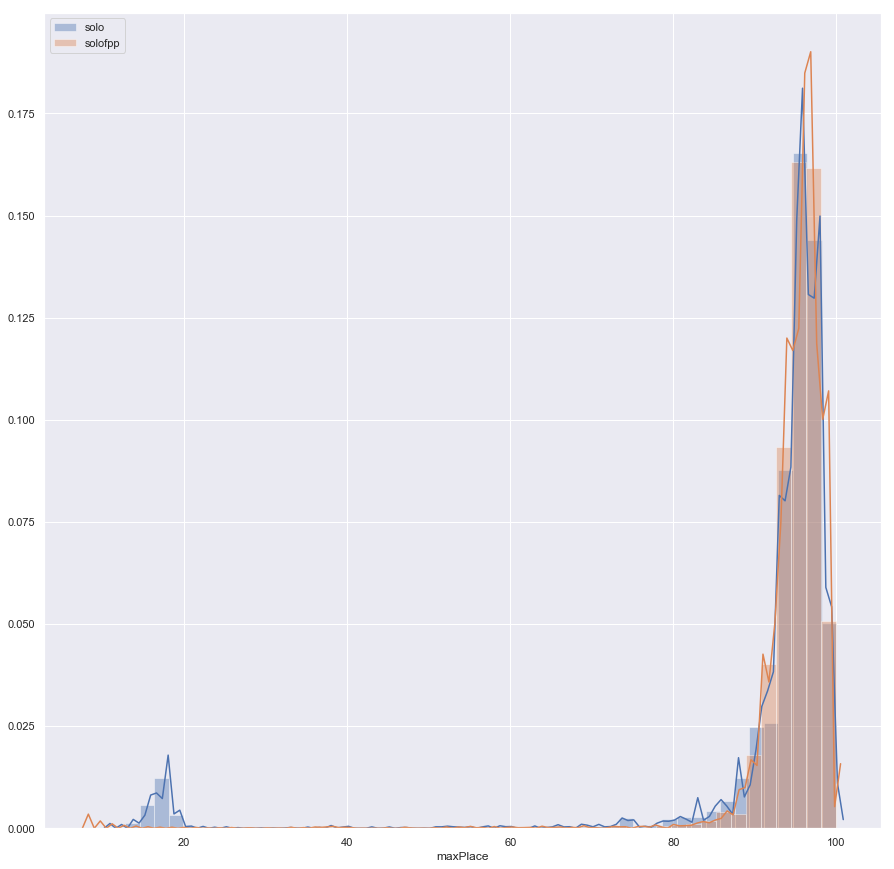

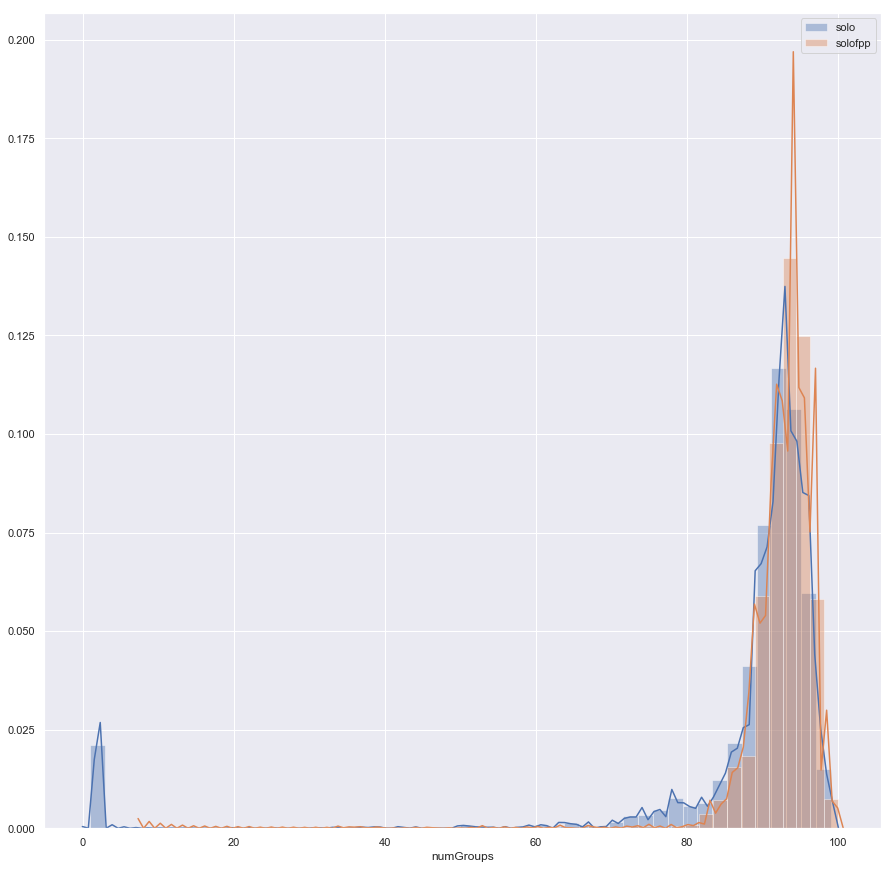

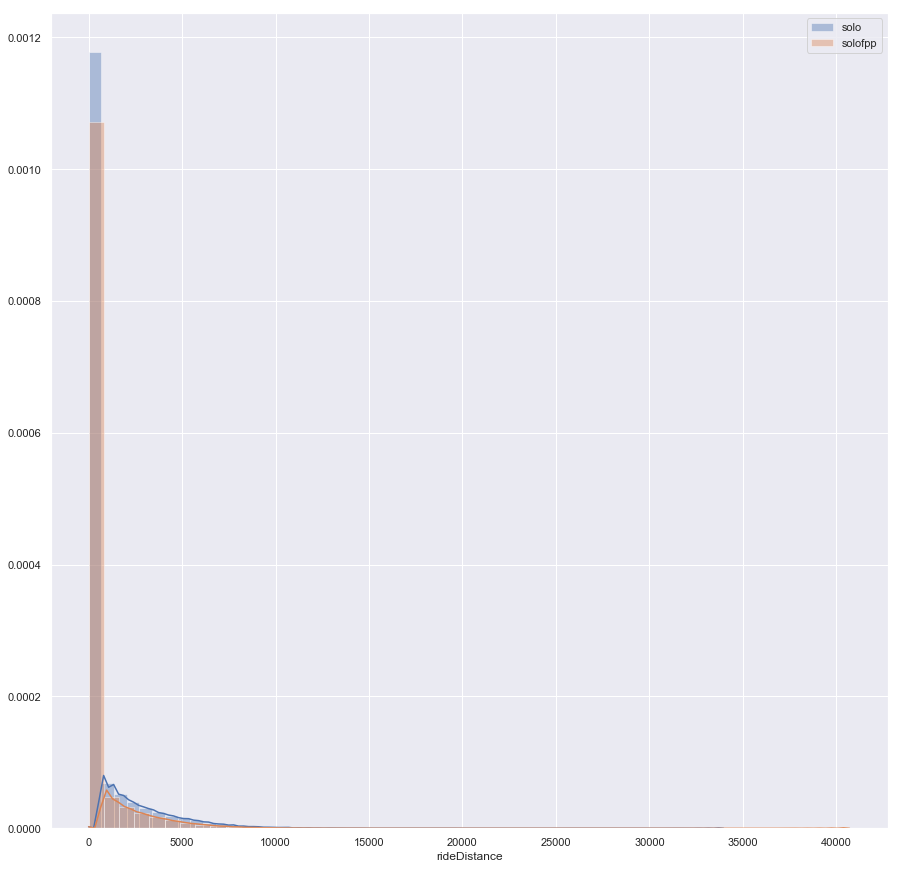

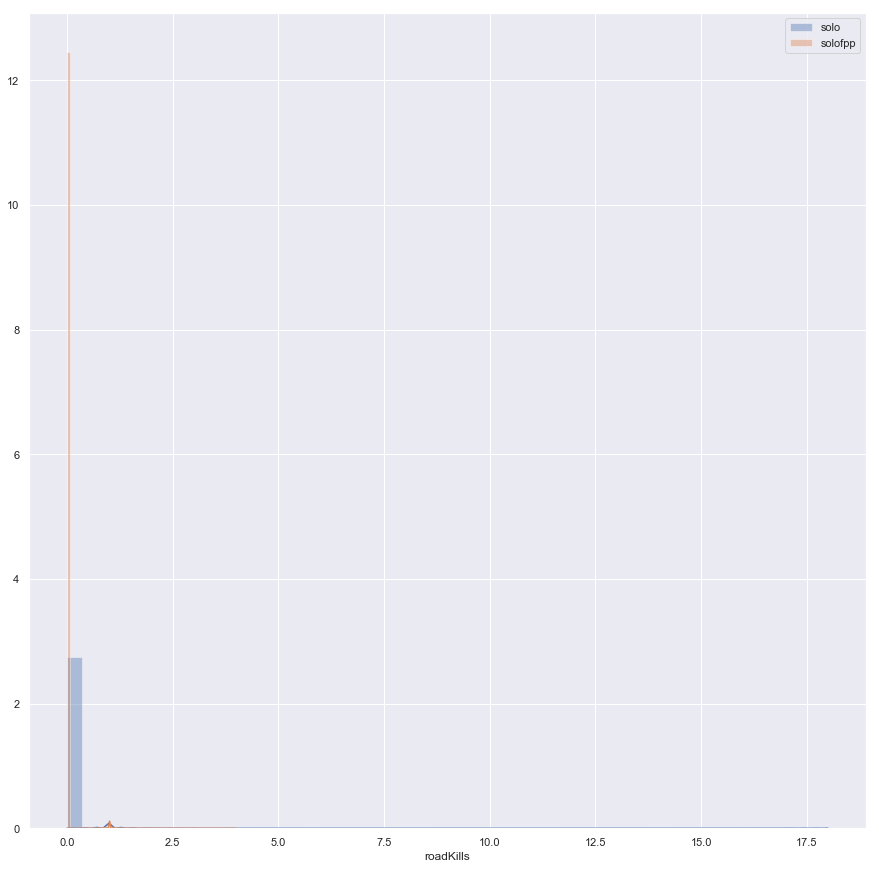

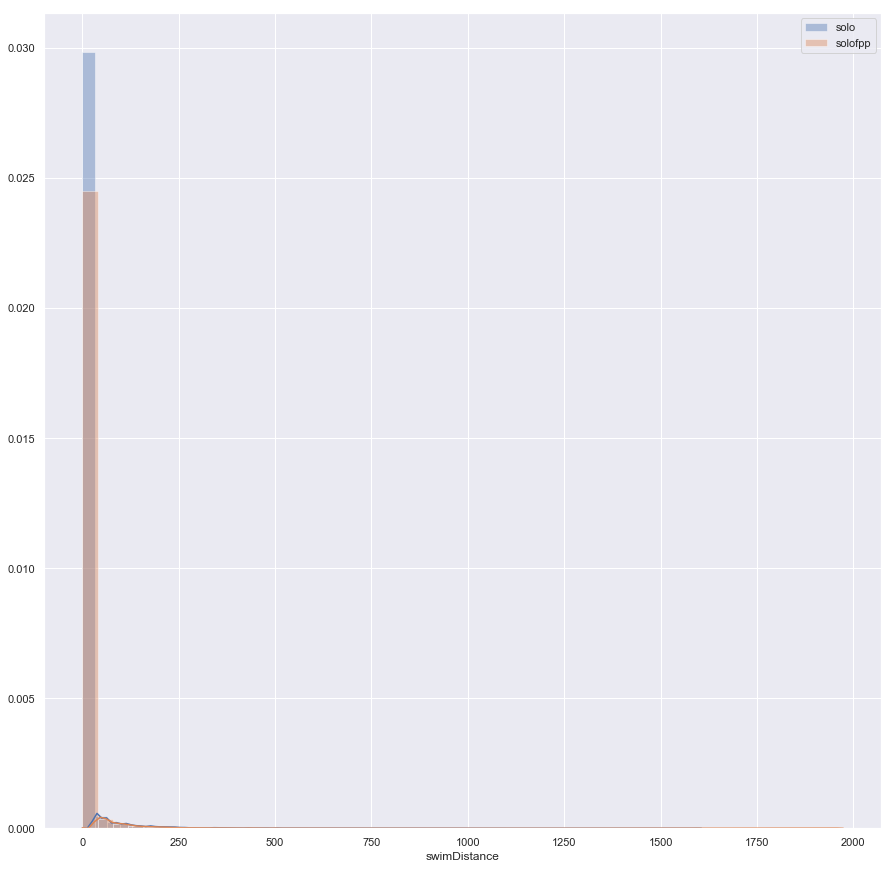

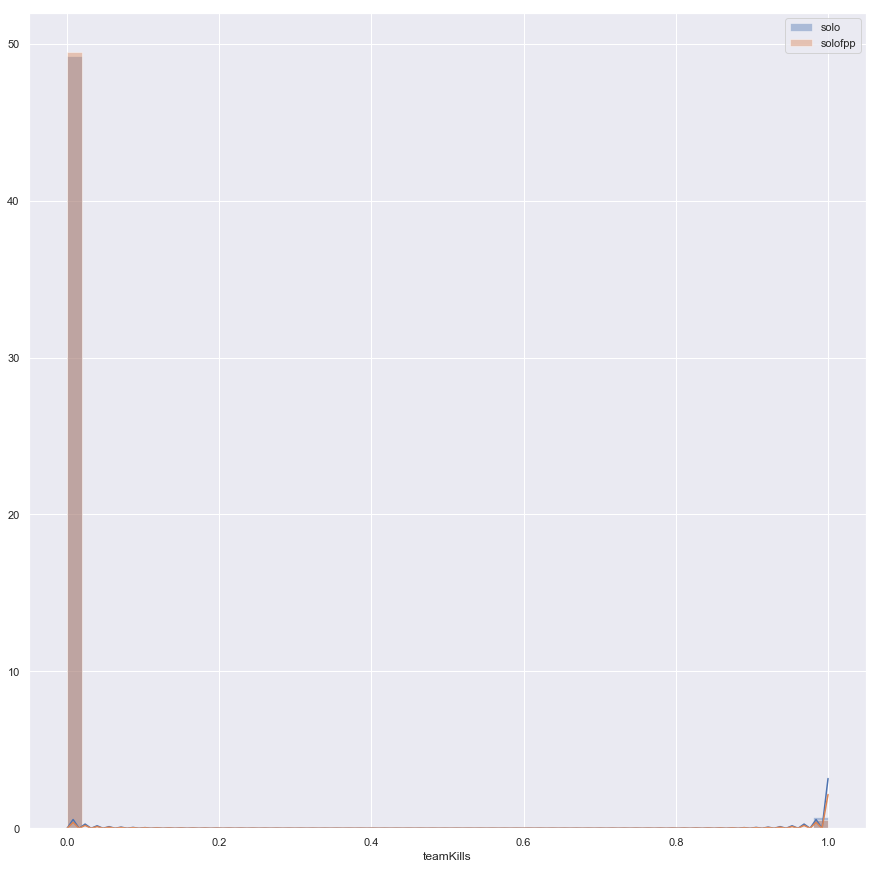

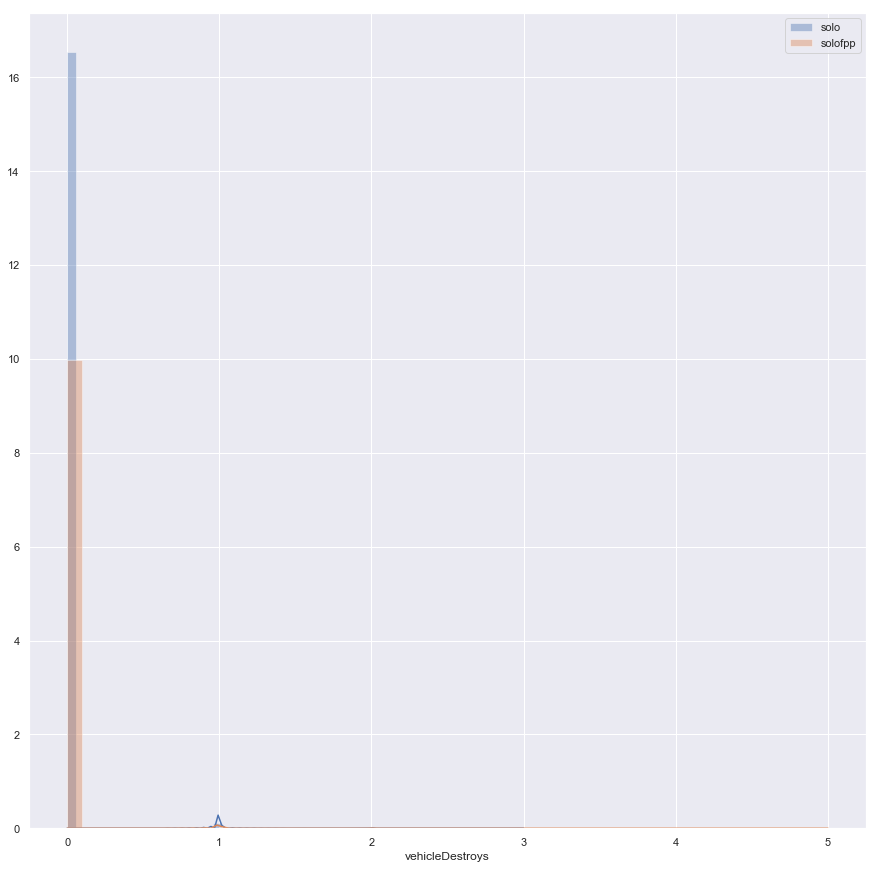

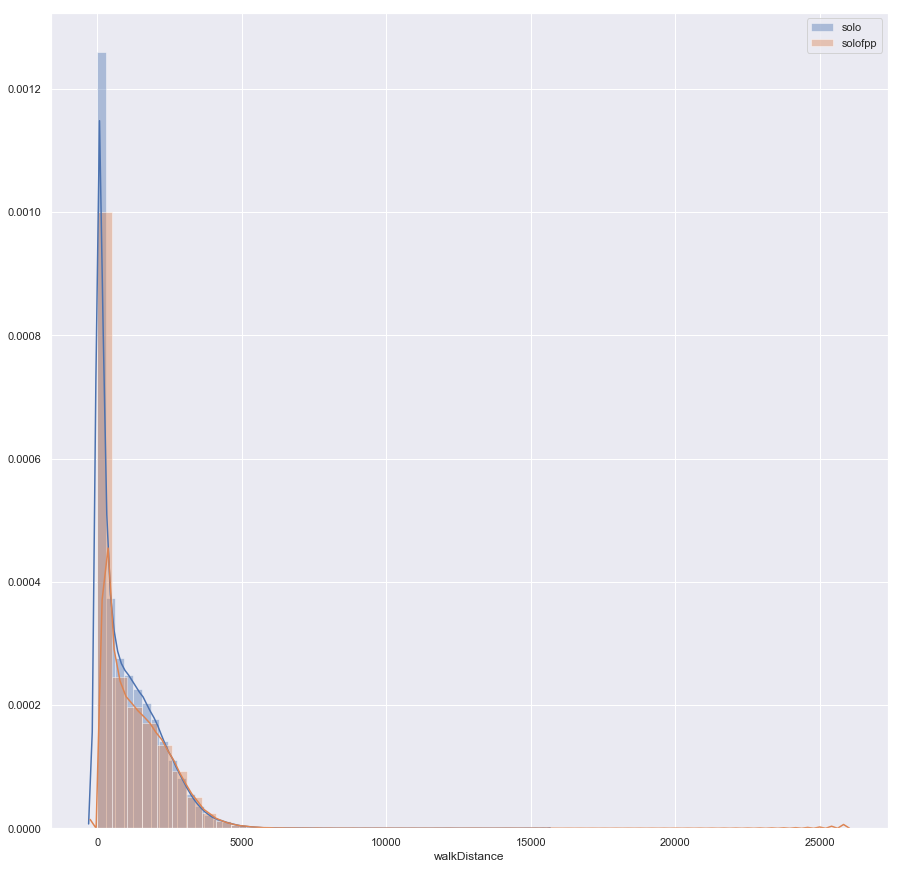

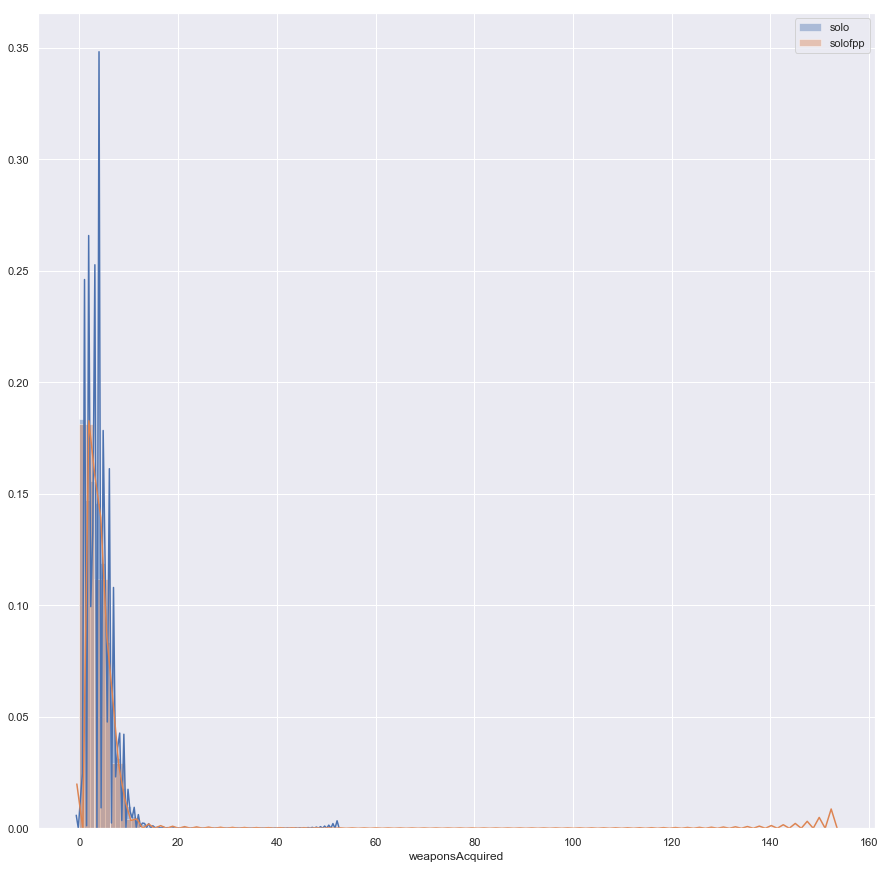

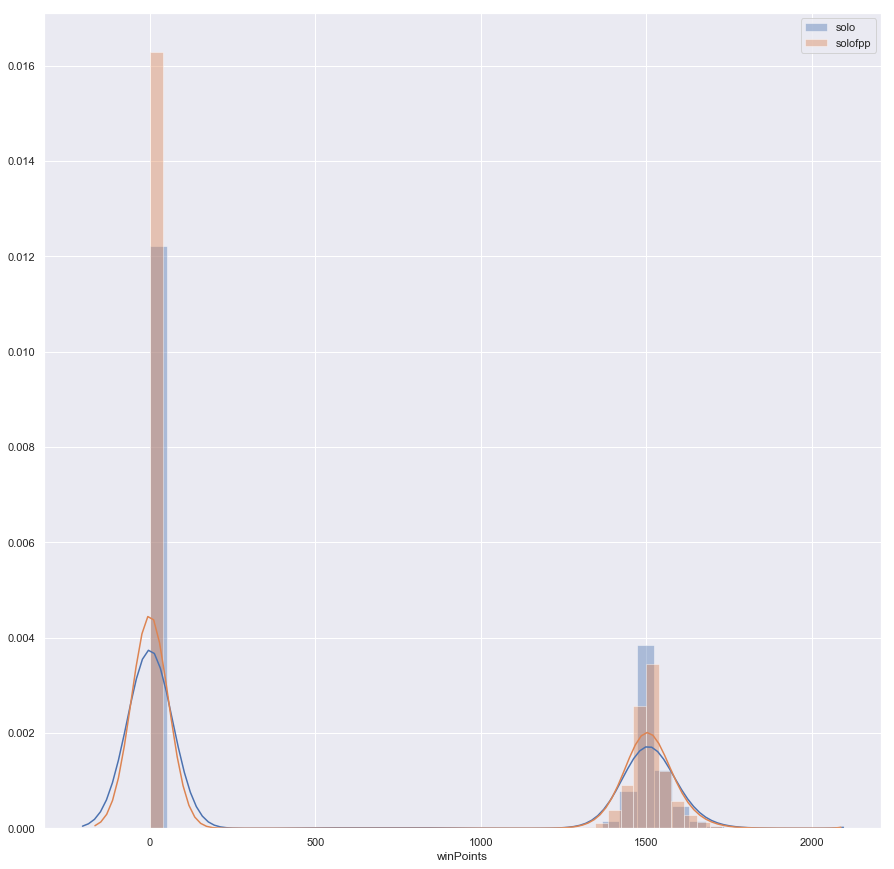

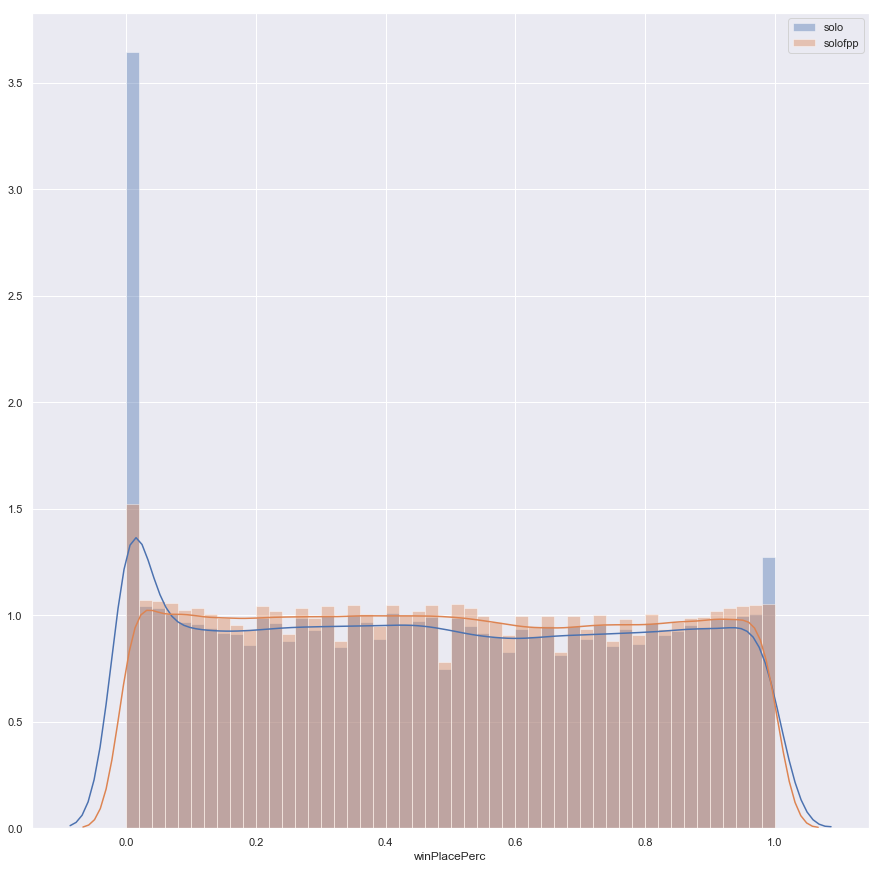

In [31]:
for feature in features:
    fig, ax = plt.subplots(figsize = (15, 15))
    sns.distplot(solo[feature], ax = ax, label = "solo")
    sns.distplot(solofpp[feature], ax = ax, label = "solofpp")
    ax.legend()

## Duo Modes

In [32]:
duo = train_dict["duo"].reset_index(drop = True)
duofpp = train_dict["duo-fpp"].reset_index(drop = True)

### Duo Mode

In [33]:
duo.describe().T

count         mean          std     min        25%  \
assists          313591.0     0.213676     0.536297     0.0     0.0000   
boosts           313591.0     1.133486     1.769551     0.0     0.0000   
damageDealt      313591.0   126.321987   167.128966     0.0     0.0000   
DBNOs            313591.0     0.610553     0.965529     0.0     0.0000   
headshotKills    313591.0     0.212576     0.592413     0.0     0.0000   
heals            313591.0     1.338989     2.642116     0.0     0.0000   
killPlace        313591.0    47.408660    27.230830     1.0    24.0000   
killPoints       313591.0   443.144156   569.591462     0.0     0.0000   
kills            313591.0     0.907966     1.518920     0.0     0.0000   
killStreaks      313591.0     0.545258     0.717018     0.0     0.0000   
longestKill      313591.0    22.210025    50.470877     0.0     0.0000   
matchDuration    313591.0  1646.611606   255.799767  1182.0  1398.0000   
maxPlace         313591.0    47.684768     2.367623    20.0    47.0000   
numGroups        313591.0    45.575386     2.855382    18.0    44.0000   
revives          313591.0     0.151879     0.452939     0.0     0.0000   
rideDistance     313591.0   752.369869  1643.825611     0.0     0.0000   
roadKills        313591.0     0.004260     0.078822     0.0     0.0000   
swimDistance     313591.0     4.811171    31.490147     0.0     0.0000   
teamKills        313591.0     0.026187     0.167489     0.0     0.0000   
vehicleDestroys  313591.0     0.010431     0.105931     0.0     0.0000   
walkDistance     313591.0  1123.632484  1109.571891     0.0   176.2000   
weaponsAcquired  313591.0     3.719144     2.420776     0.0     2.0000   
winPoints        313591.0   578.095701   732.297746     0.0     0.0000   
winPlacePerc     313591.0     0.482777     0.303173     0.0     0.2174   

                       50%      75%      max  
assists             0.0000     0.00      8.0  
boosts              0.0000     2.00     19.0  
damageDealt        78.6500   180.40   2333.0  
DBNOs               0.0000     1.00     31.0  
headshotKills       0.0000     0.00     17.0  
heals               0.0000     1.00     62.0  
killPlace          47.0000    71.00    100.0  
killPoints          0.0000  1060.00   1967.0  
kills               0.0000     1.00     21.0  
killStreaks         0.0000     1.00     10.0  
longestKill         0.0000    19.50   1003.0  
matchDuration    1521.0000  1890.00   2204.0  
maxPlace           48.0000    49.00     51.0  
numGroups          46.0000    47.00     50.0  
revives             0.0000     0.00     32.0  
rideDistance        0.0000   573.30  27110.0  
roadKills           0.0000     0.00      7.0  
swimDistance        0.0000     0.00   2382.0  
teamKills           0.0000     0.00      2.0  
vehicleDestroys     0.0000     0.00      3.0  
walkDistance      747.8000  1866.00  12210.0  
weaponsAcquired     3.0000     5.00    167.0  
winPoints           0.0000  1496.00   1823.0  
winPlacePerc        0.4694     0.75      1.0

In [34]:
duo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313591 entries, 0 to 313590
Data columns (total 28 columns):
Id                 313591 non-null object
groupId            313591 non-null object
matchId            313591 non-null object
assists            313591 non-null int64
boosts             313591 non-null int64
damageDealt        313591 non-null float64
DBNOs              313591 non-null int64
headshotKills      313591 non-null int64
heals              313591 non-null int64
killPlace          313591 non-null int64
killPoints         313591 non-null int64
kills              313591 non-null int64
killStreaks        313591 non-null int64
longestKill        313591 non-null float64
matchDuration      313591 non-null int64
matchType          313591 non-null object
maxPlace           313591 non-null int64
numGroups          313591 non-null int64
revives            313591 non-null int64
rideDistance       313591 non-null float64
roadKills          313591 non-null int64
swimDistance      

In [35]:
team_features = list(duo.describe().columns)
team_features

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

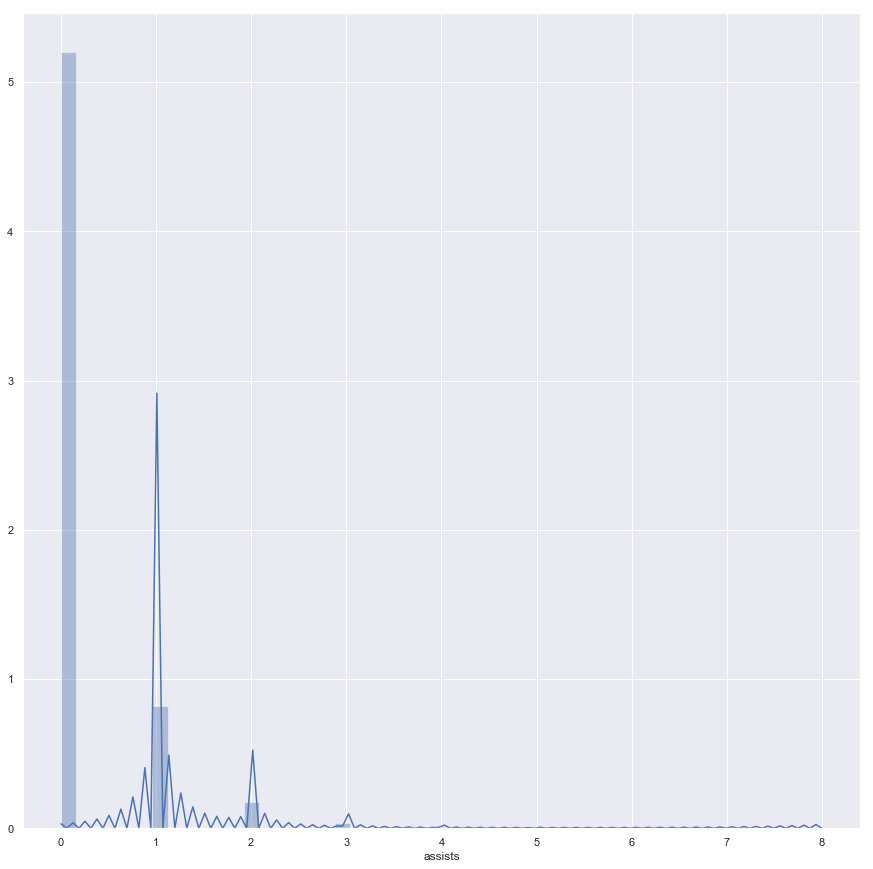

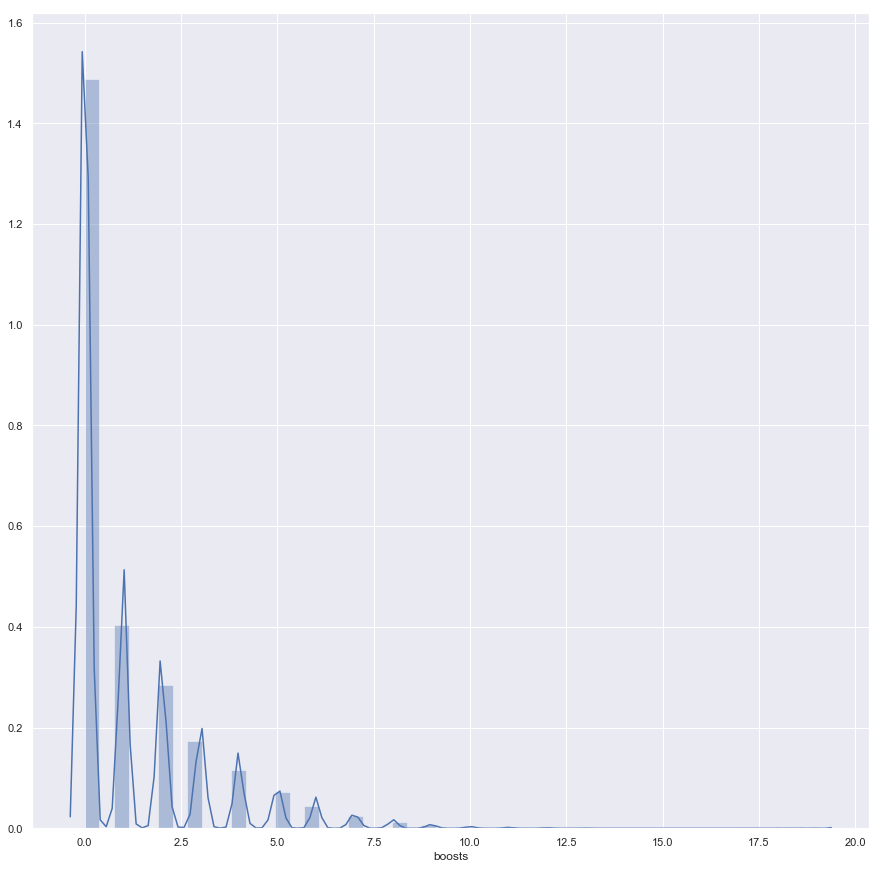

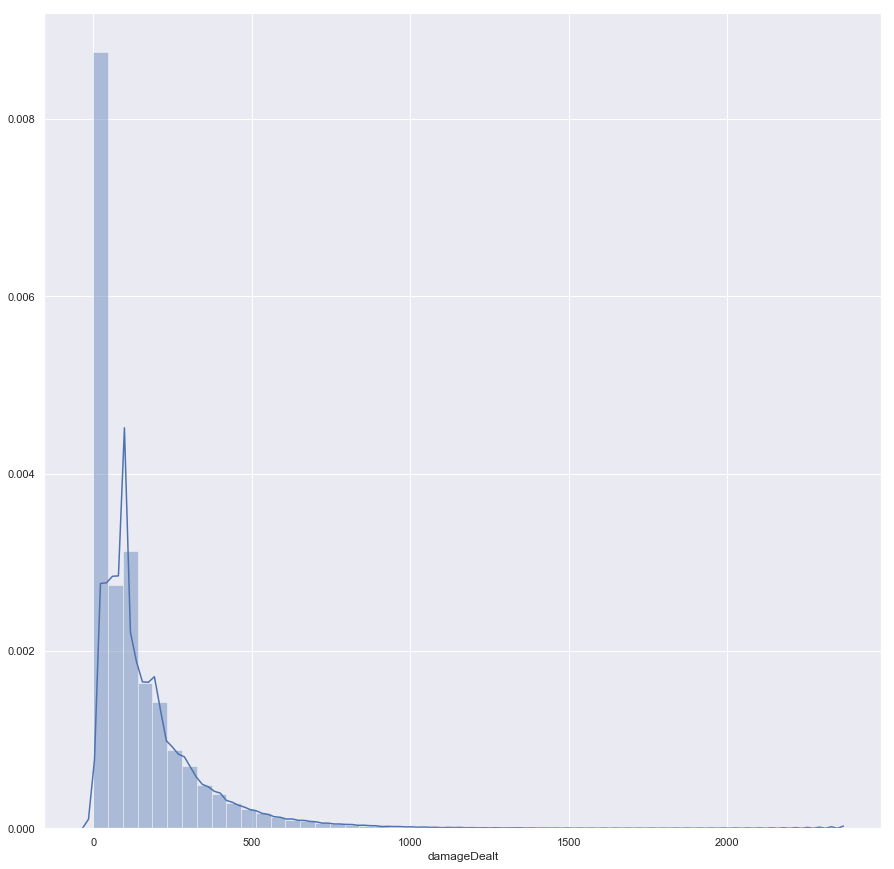

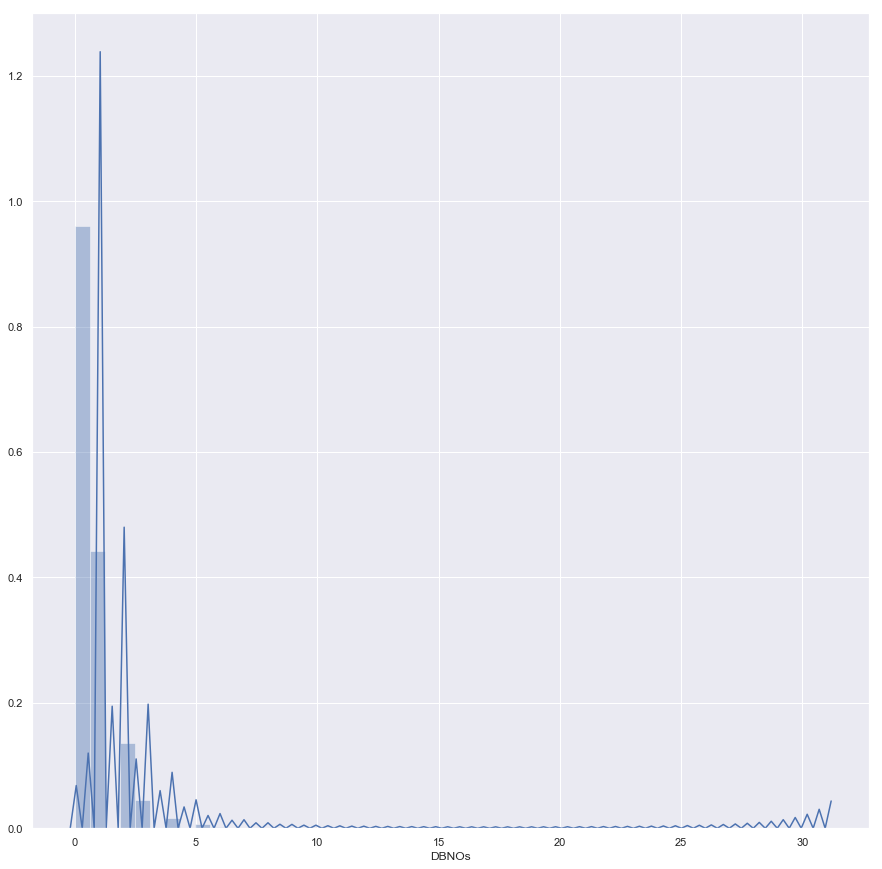

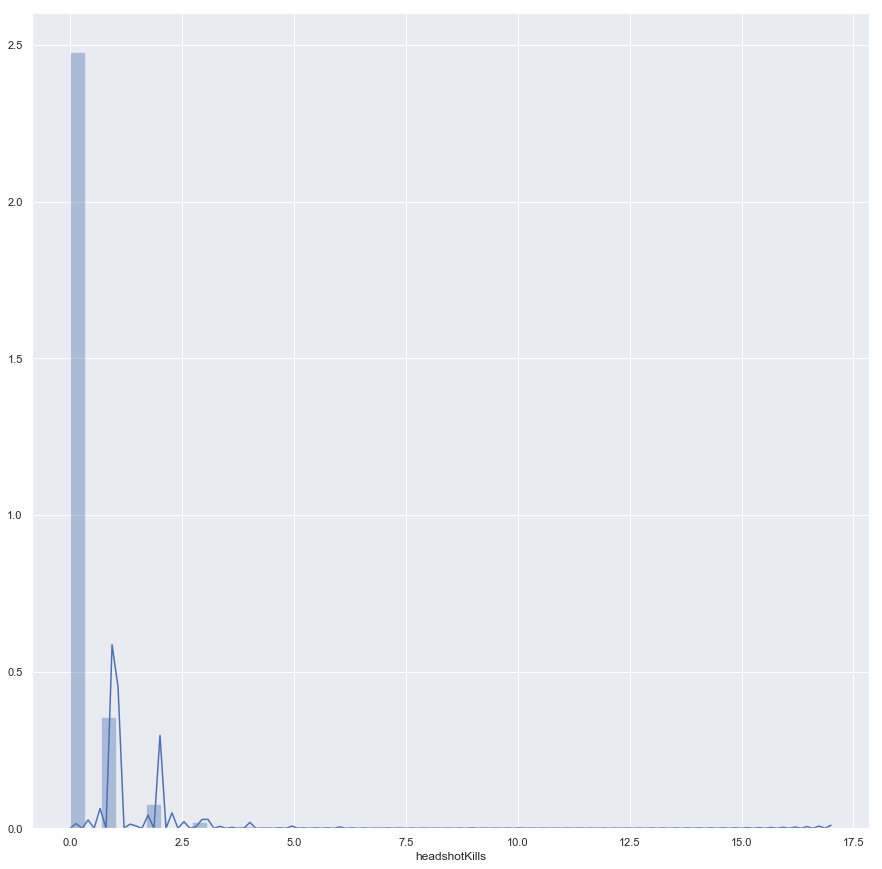

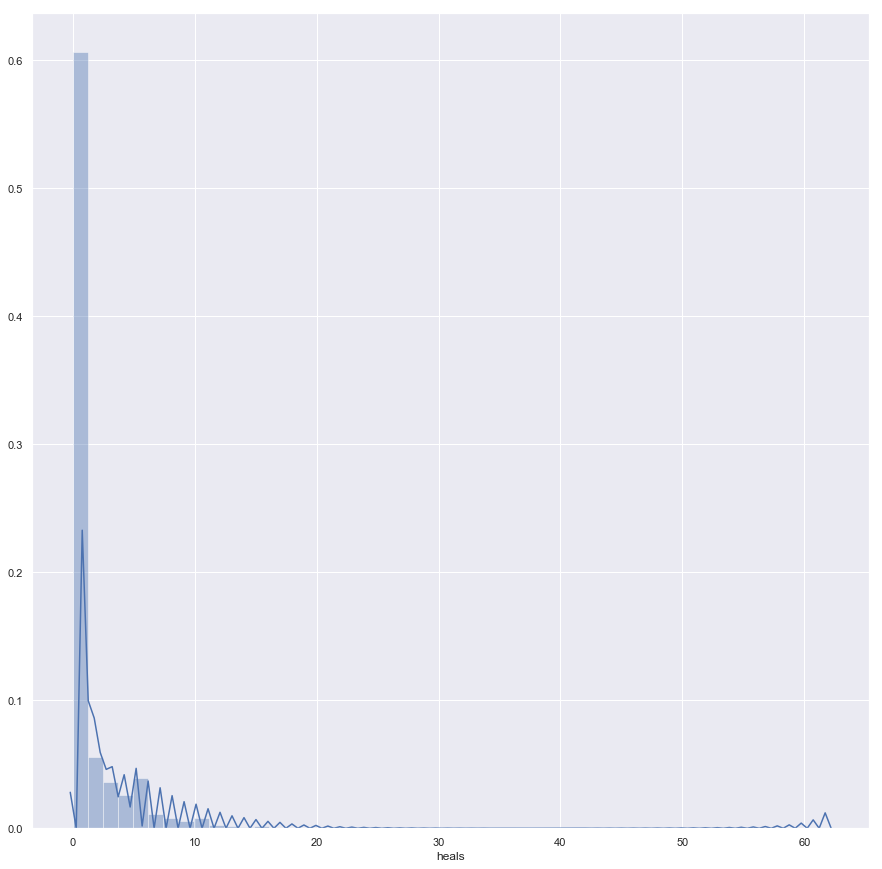

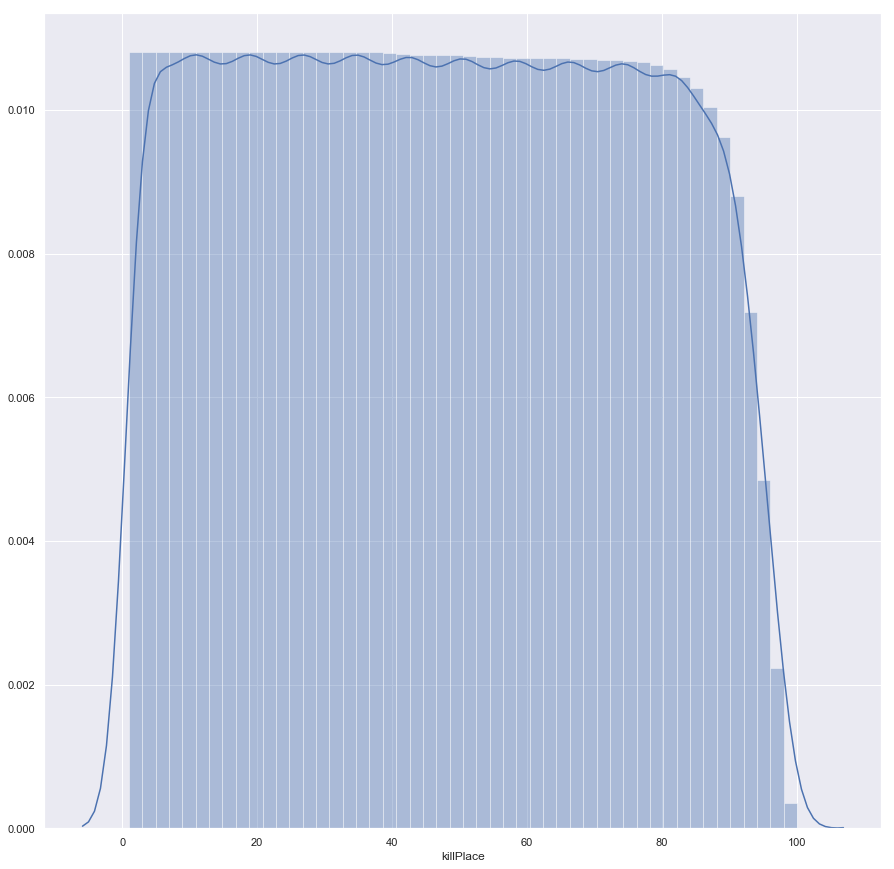

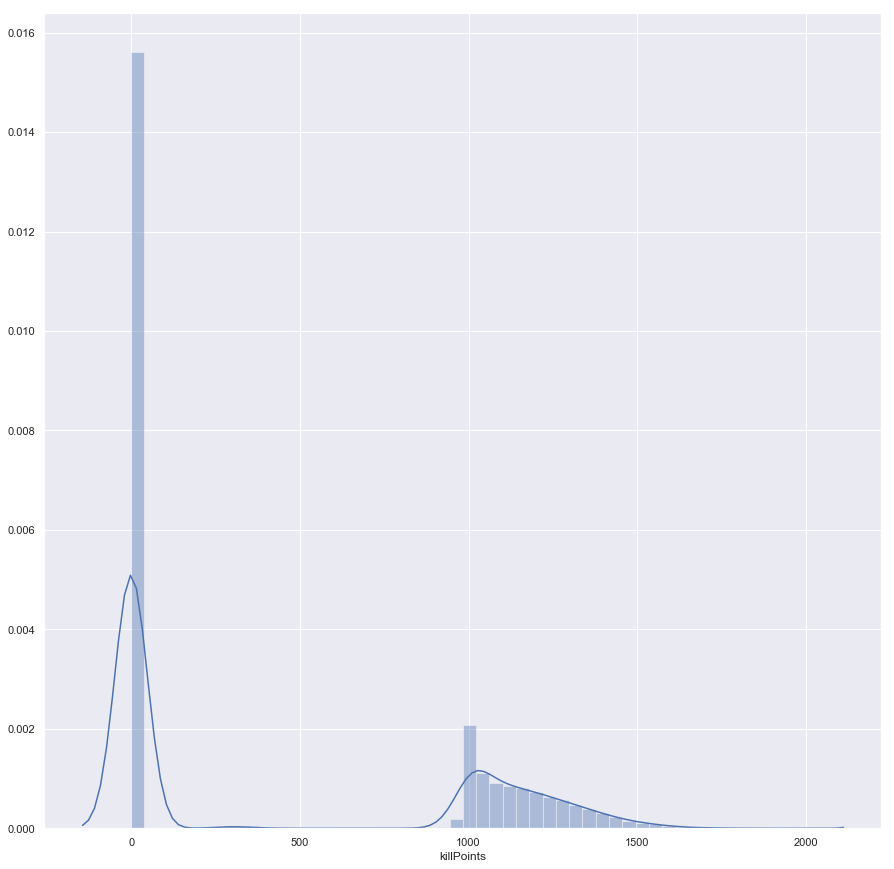

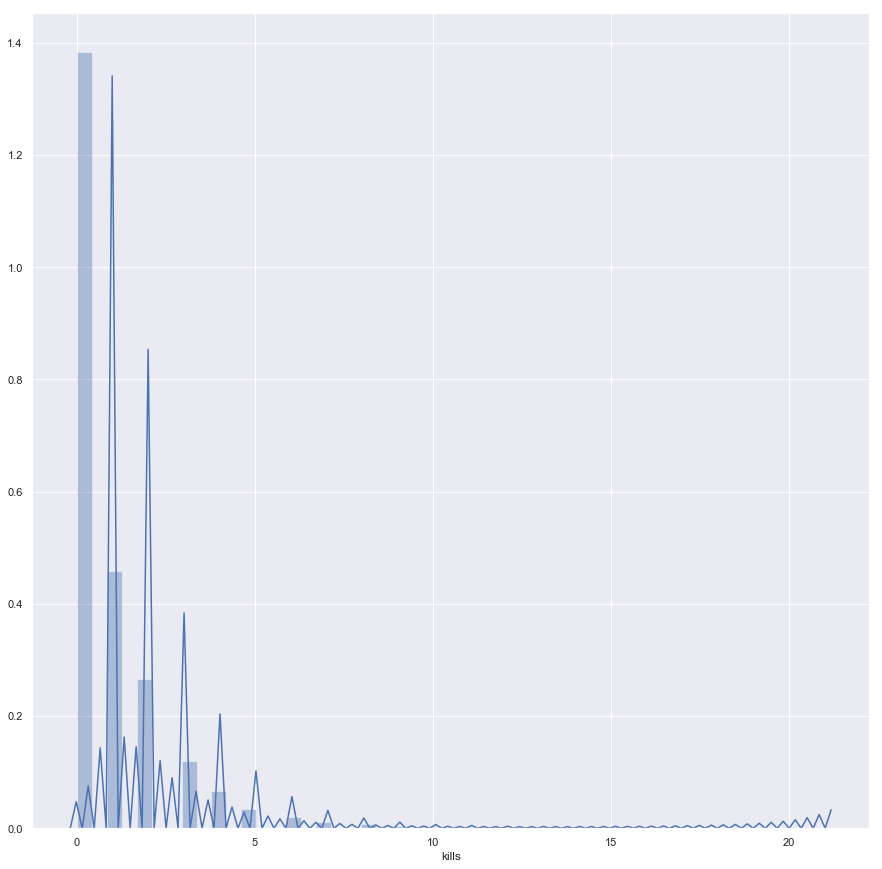

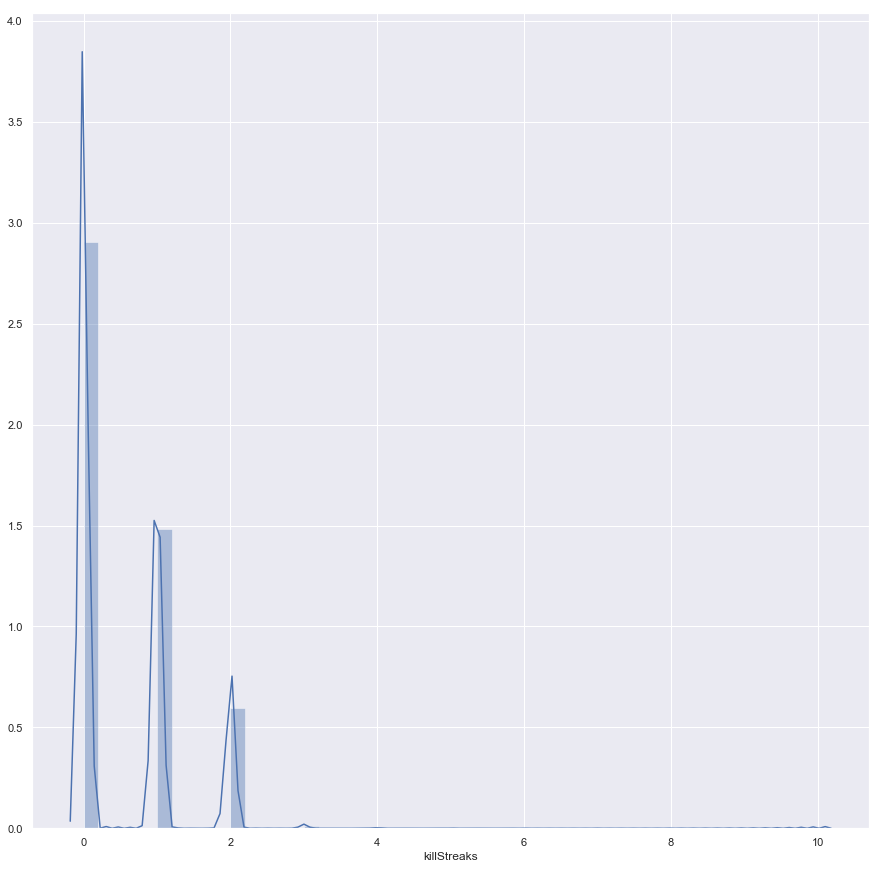

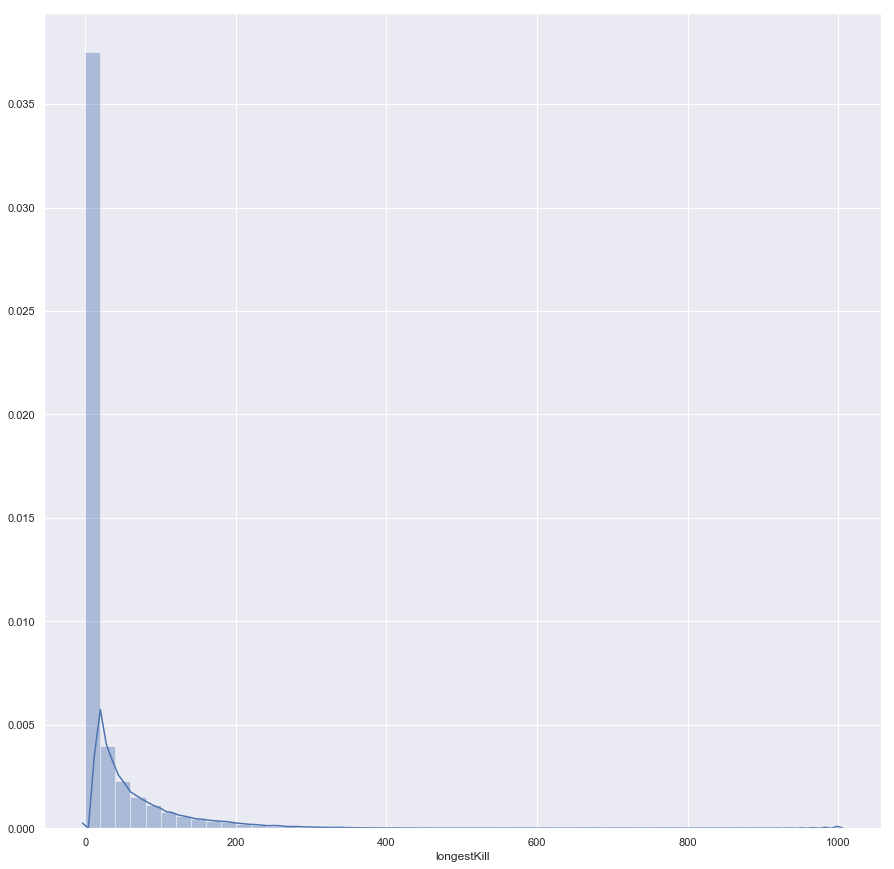

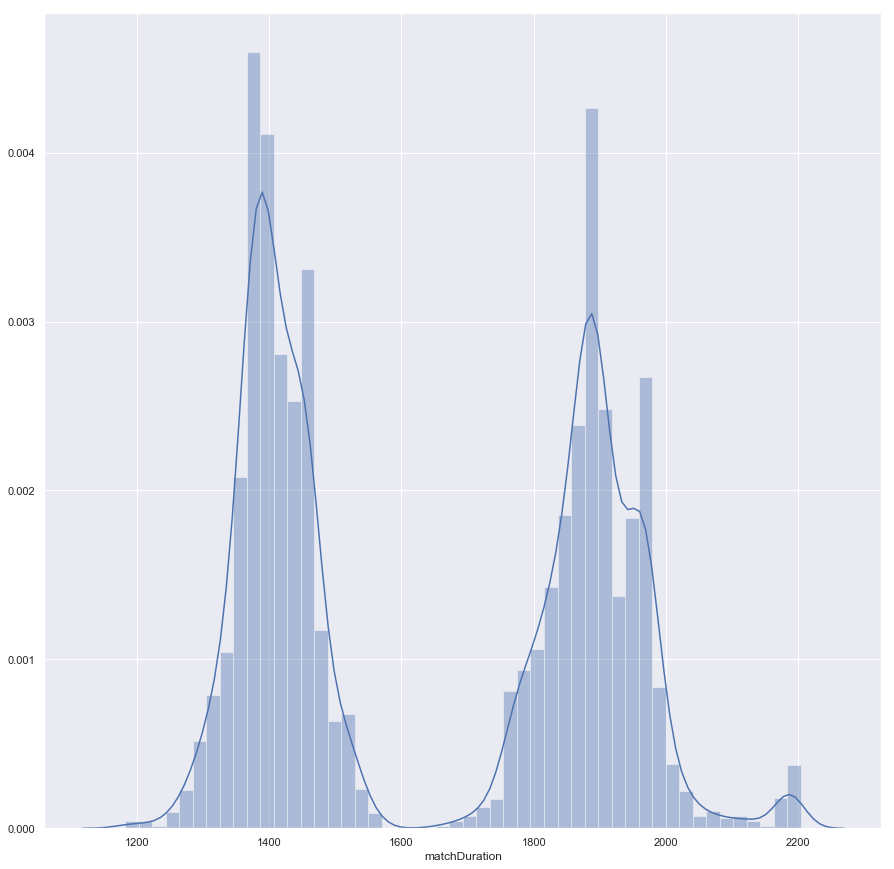

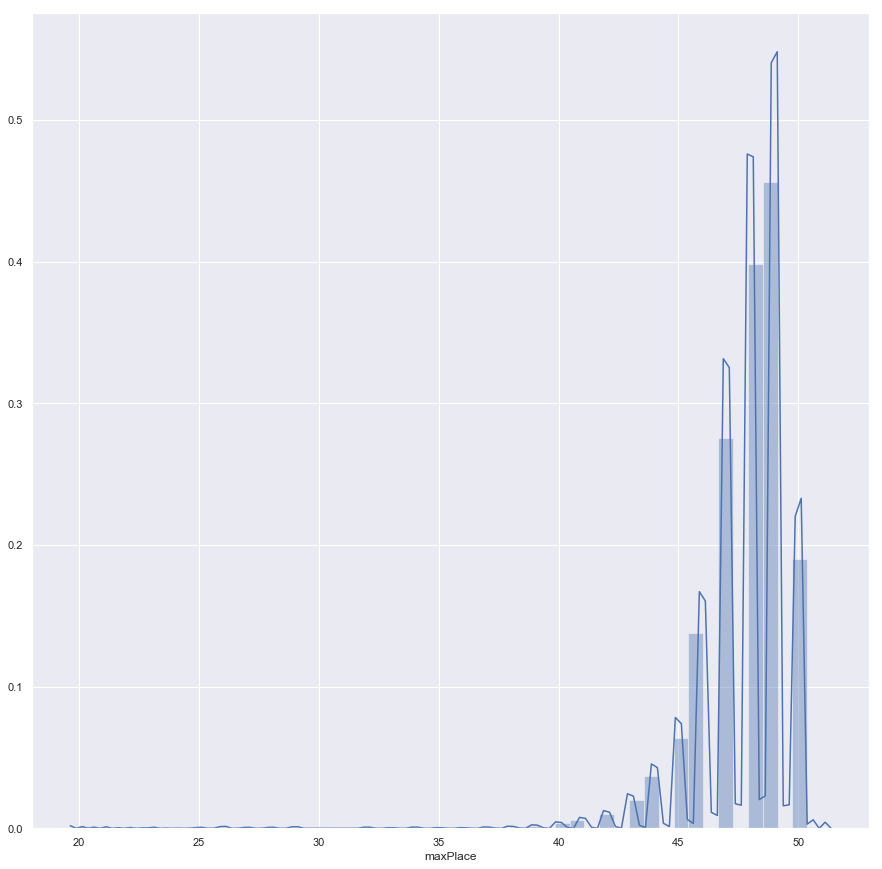

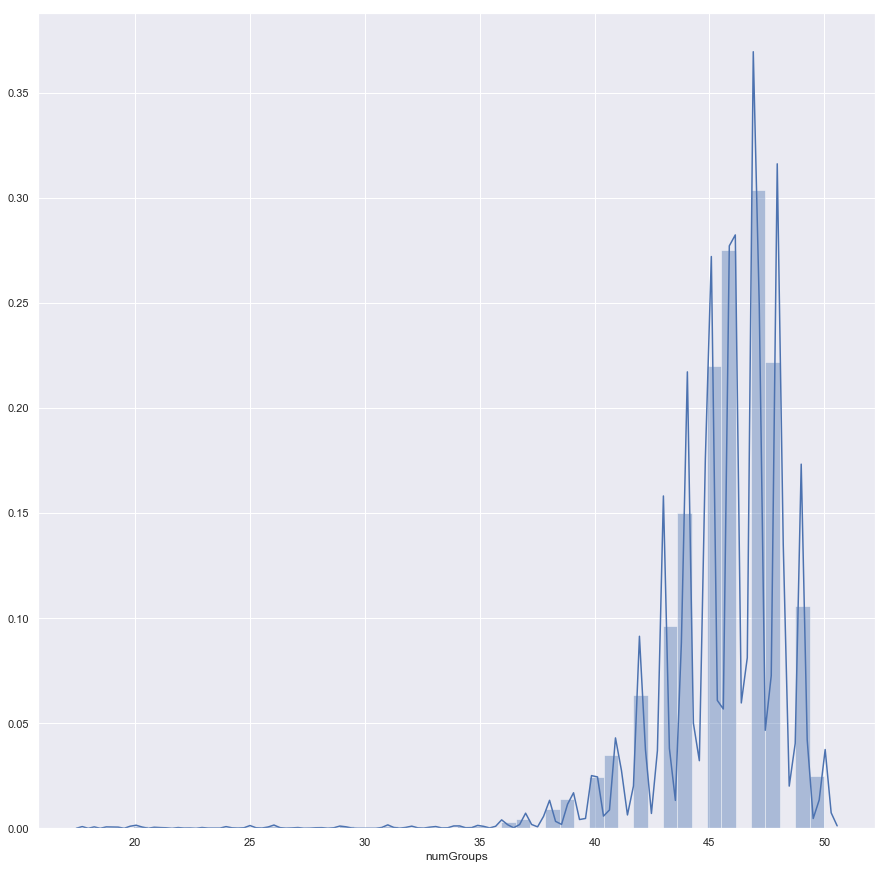

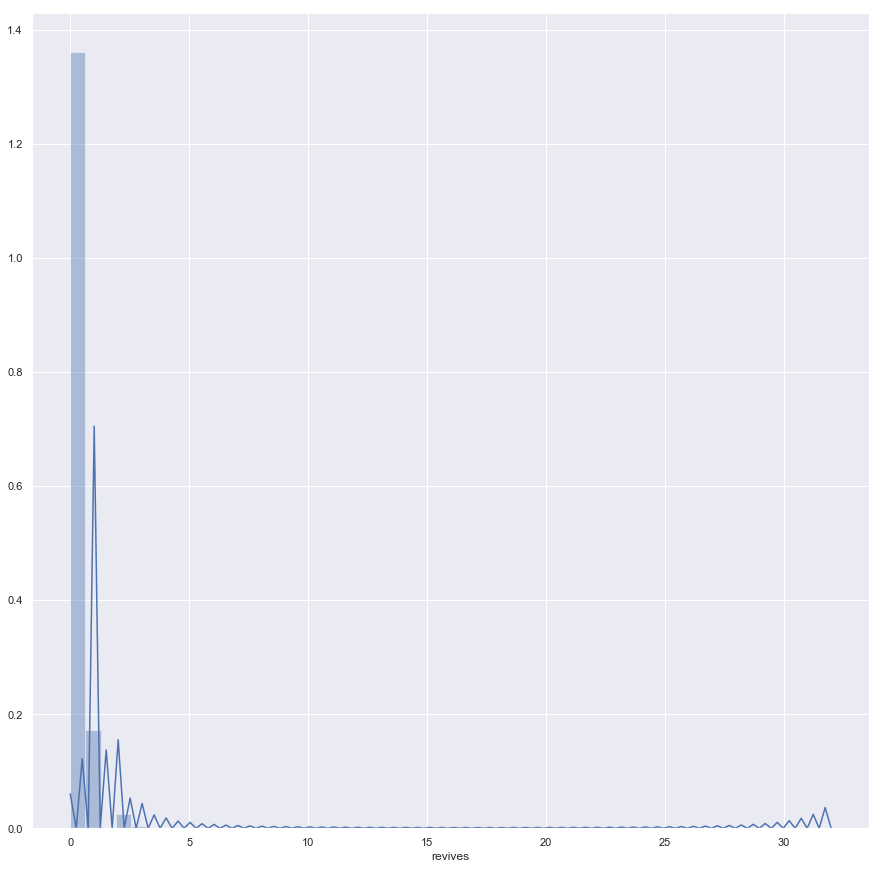

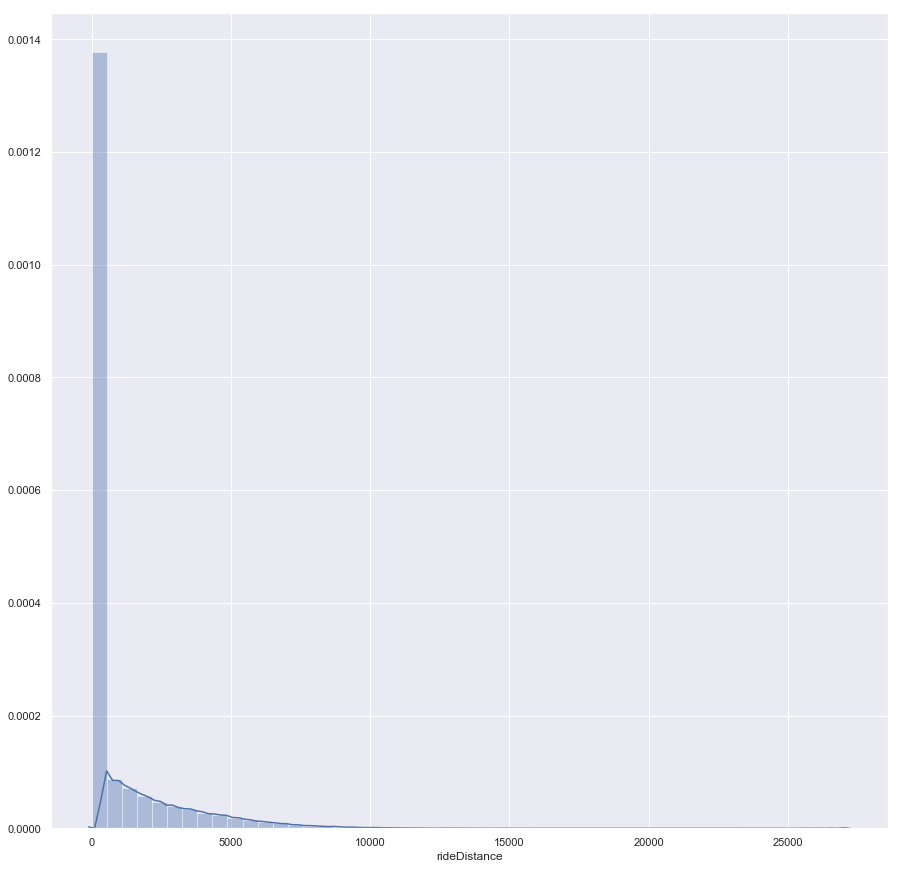

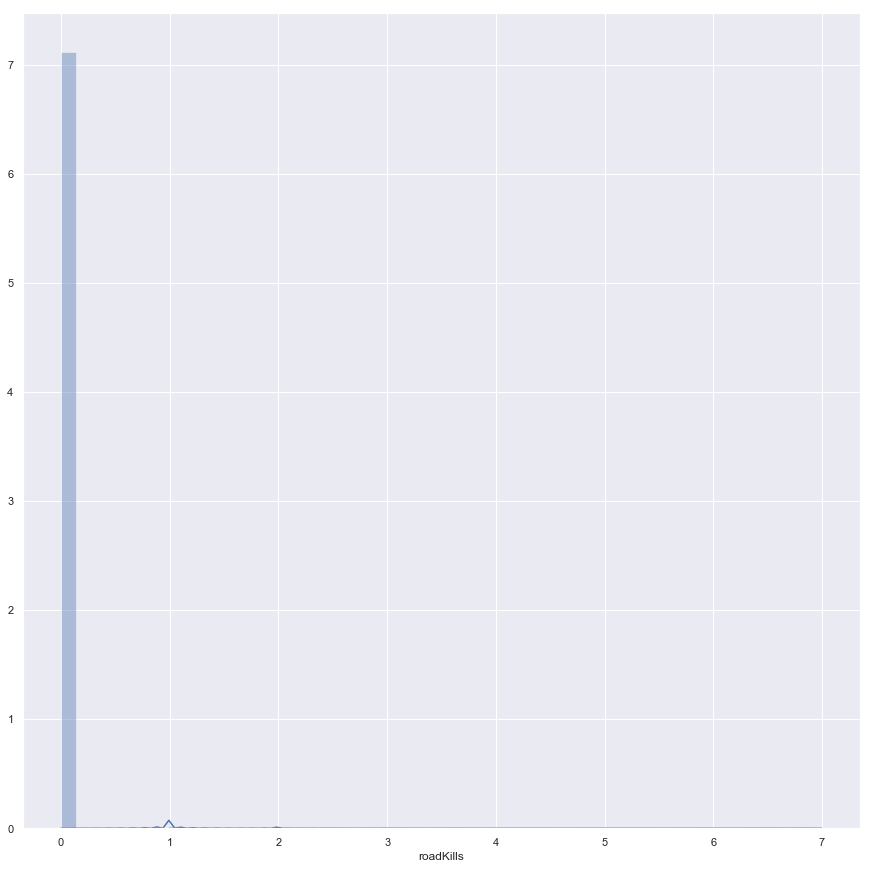

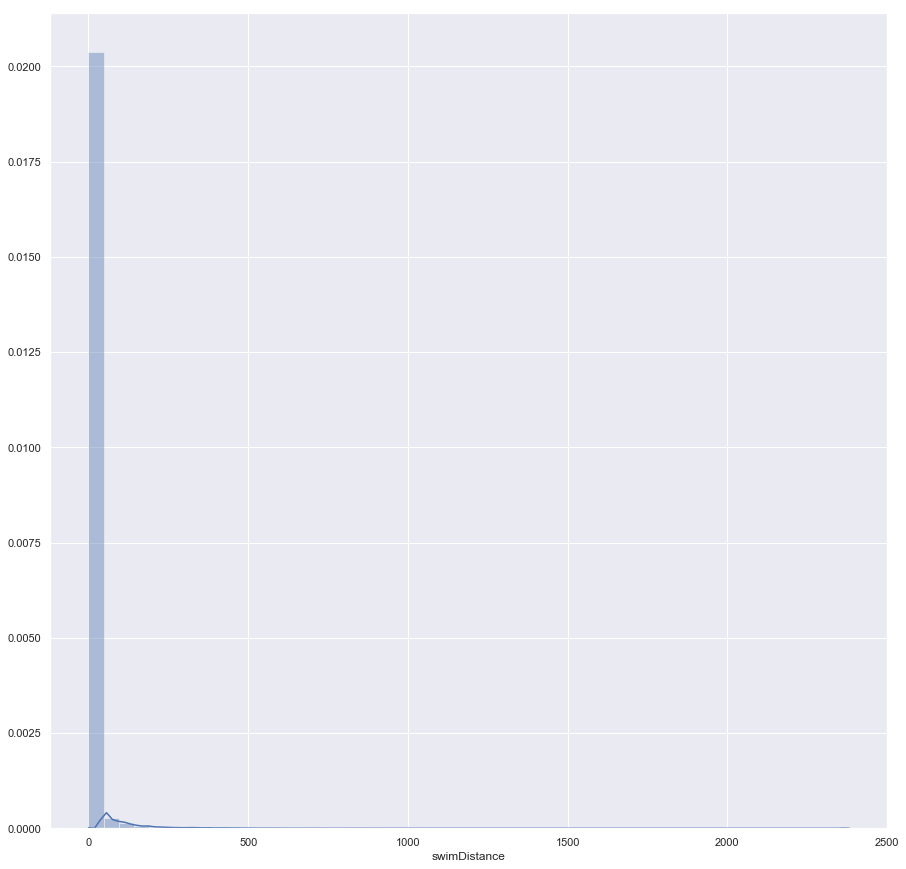

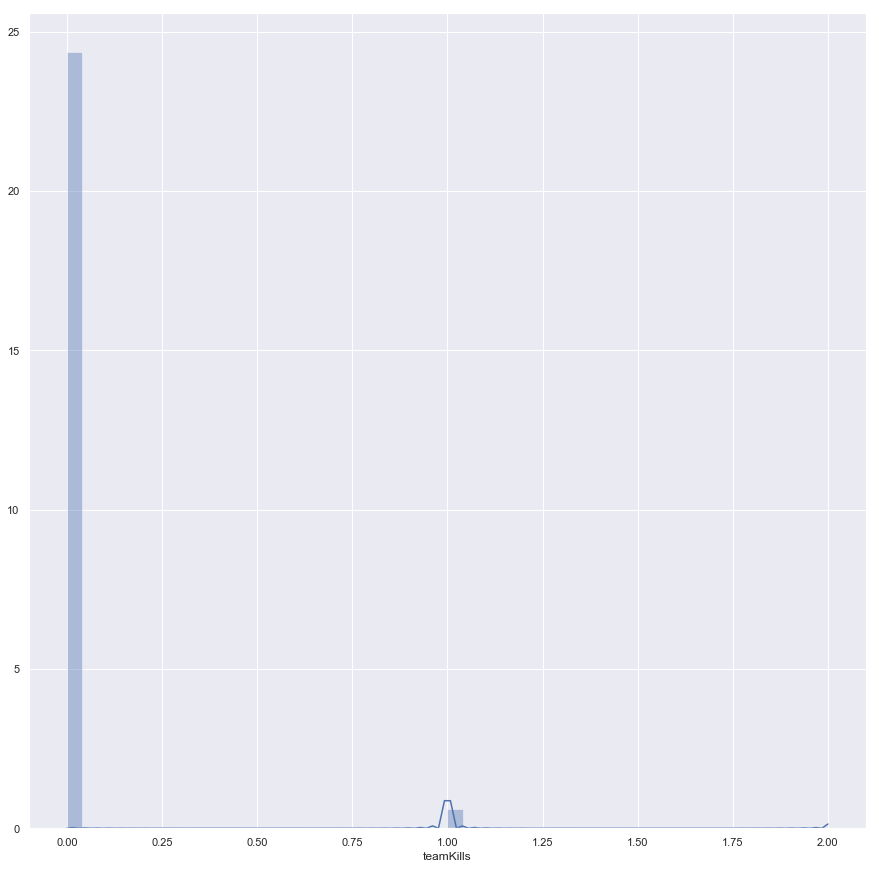

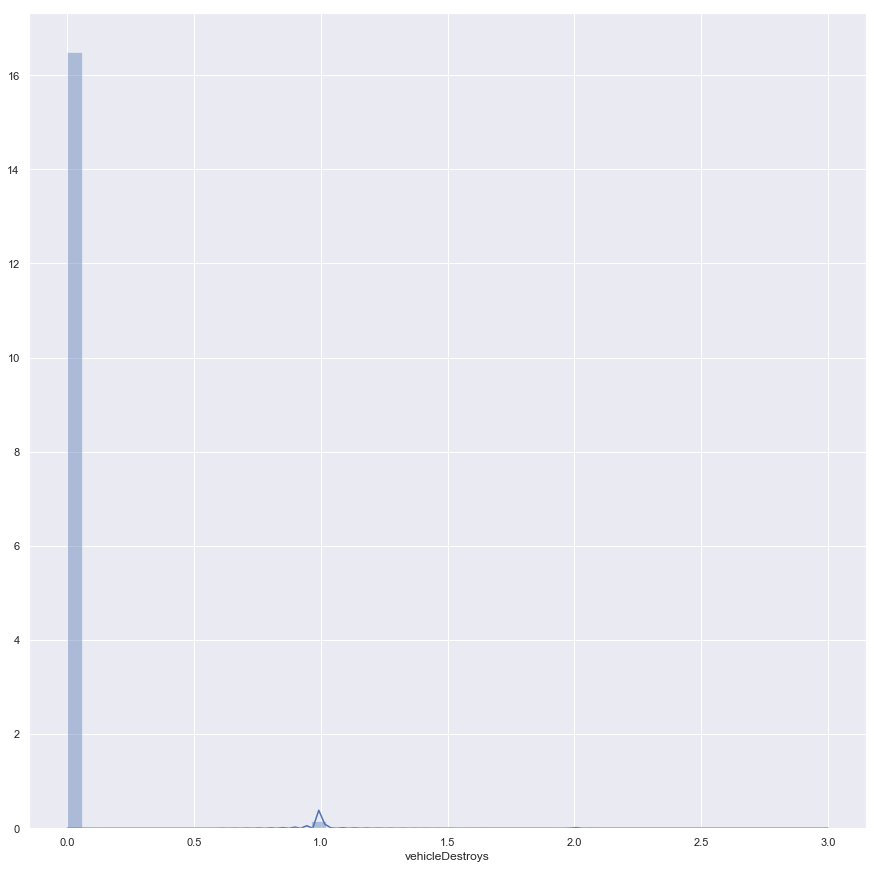

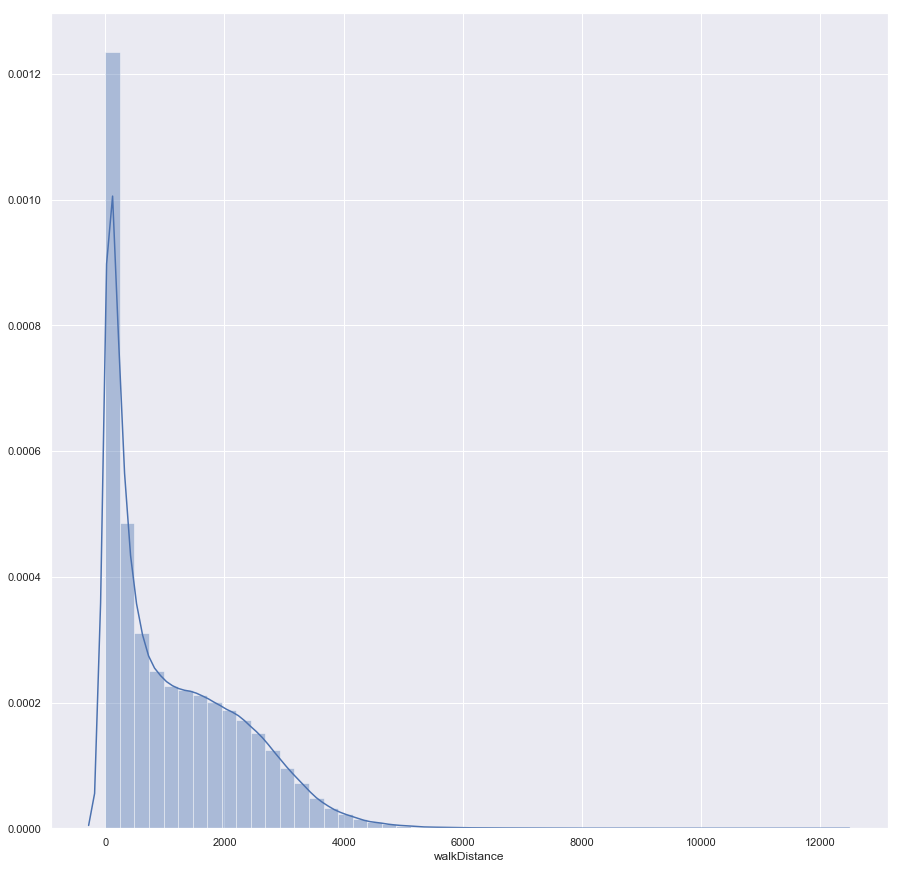

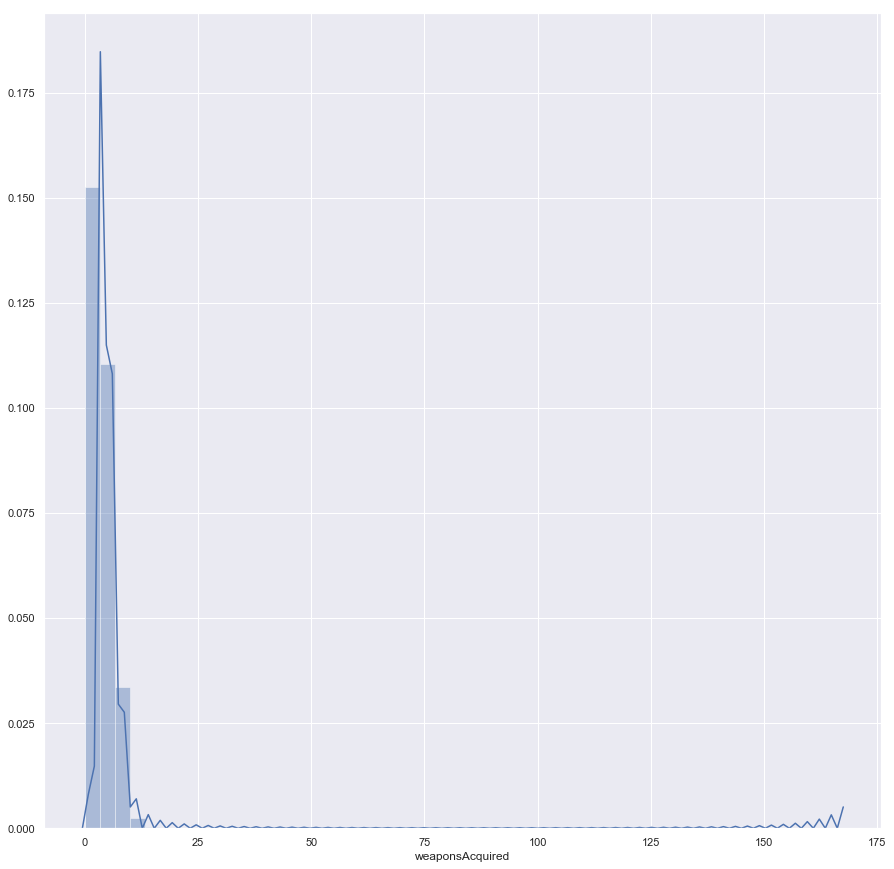

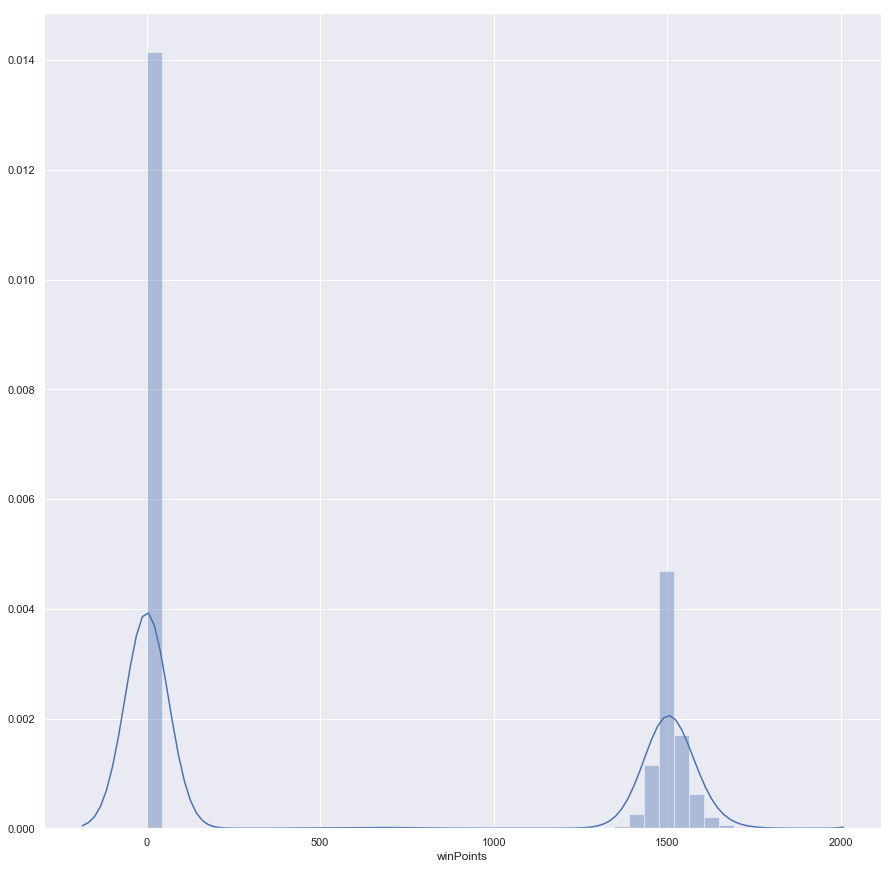

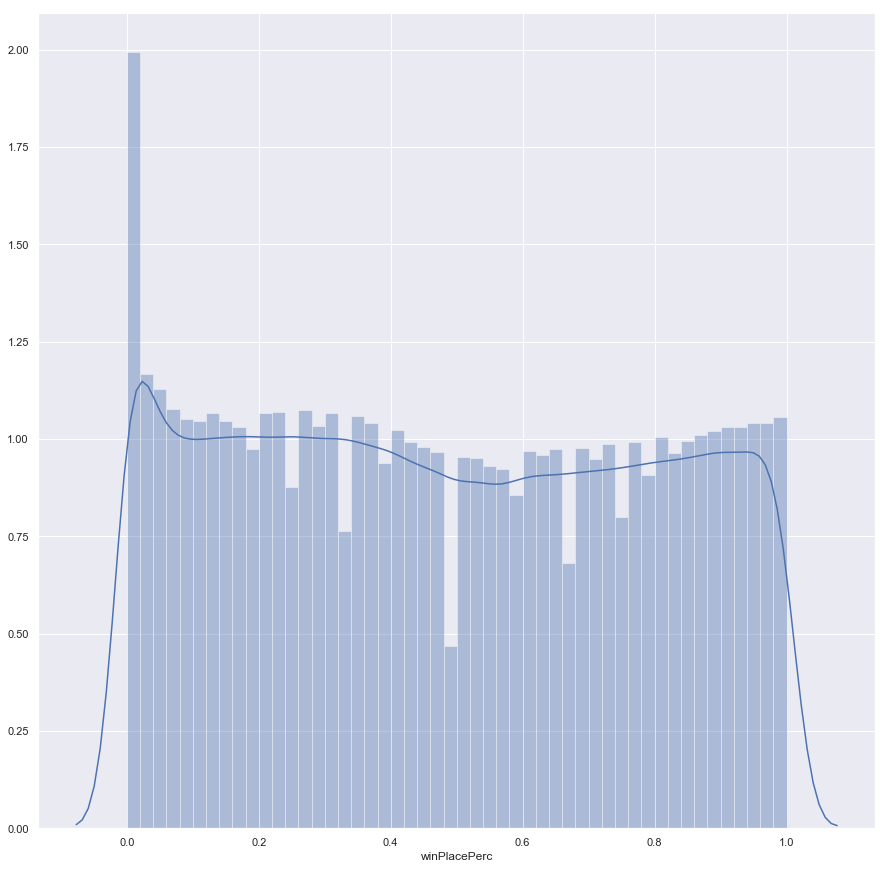

In [36]:
for feature in team_features:
    plt.figure(figsize = (15, 15))
    sns.distplot(duo[feature])

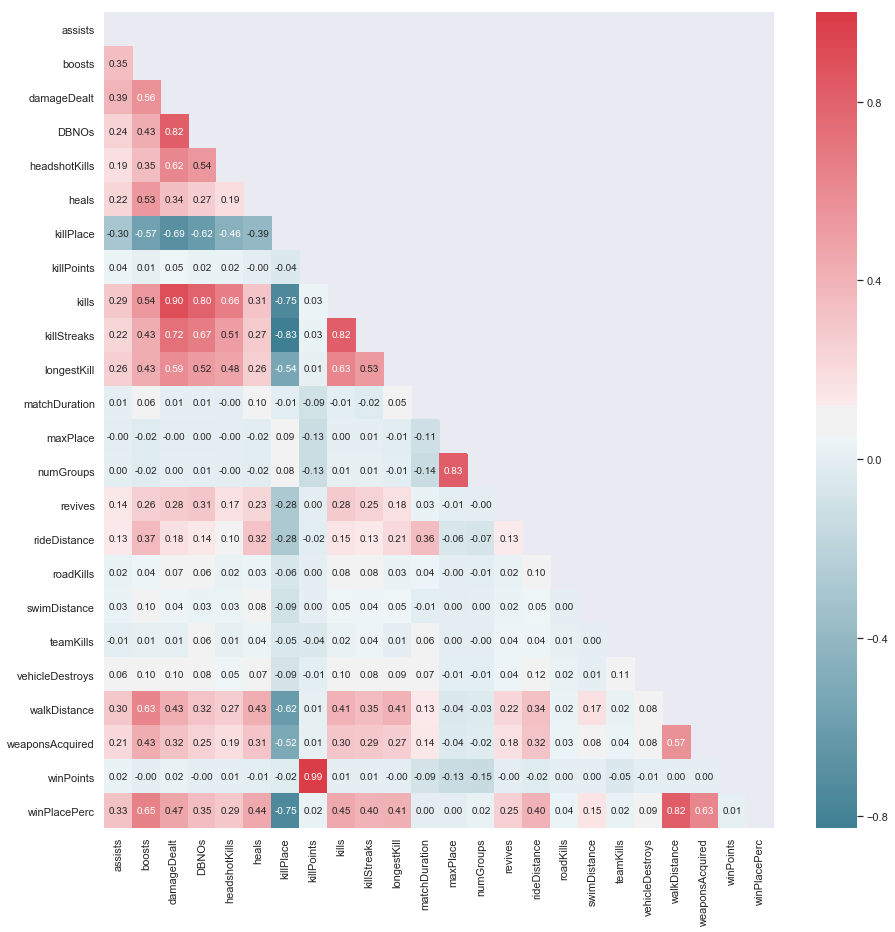

In [37]:
halfHeatMap(duo[team_features], mirror = False, corrtype = "pearson")

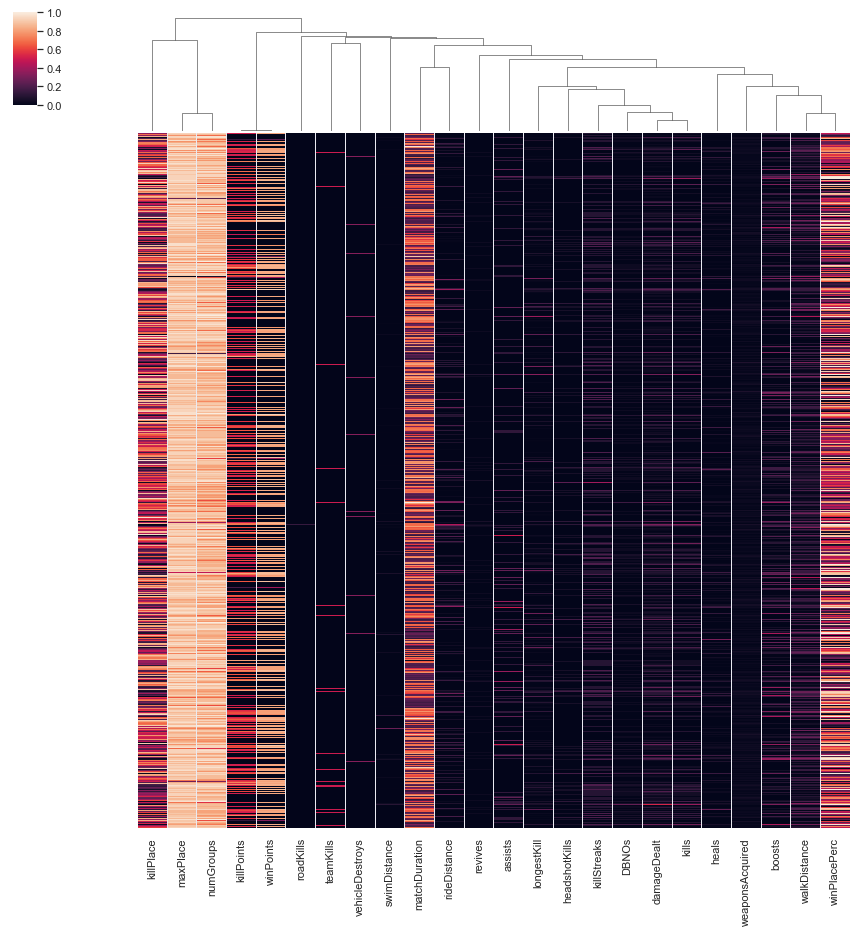

In [38]:
clustermap = sns.clustermap(duo[team_features], figsize = (15, 15), 
                            metric = "correlation", row_cluster = False, 
                            standard_scale = 1, yticklabels = [])

### Duo FPP Mode

In [39]:
duofpp.describe().T

count         mean          std    min        25%  \
assists          996691.0     0.215806     0.535652    0.0     0.0000   
boosts           996691.0     1.078022     1.696287    0.0     0.0000   
damageDealt      996691.0   132.249549   165.832945    0.0     0.0000   
DBNOs            996691.0     0.628594     0.951734    0.0     0.0000   
headshotKills    996691.0     0.225009     0.572762    0.0     0.0000   
heals            996691.0     1.328823     2.582781    0.0     0.0000   
killPlace        996691.0    47.638865    27.356901    1.0    24.0000   
killPoints       996691.0   485.647968   614.394604    0.0     0.0000   
kills            996691.0     0.926086     1.512765    0.0     0.0000   
killStreaks      996691.0     0.566743     0.730104    0.0     0.0000   
longestKill      996691.0    22.375703    48.218406    0.0     0.0000   
matchDuration    996691.0  1578.642465   251.643722  840.0  1367.0000   
maxPlace         996691.0    47.719569     2.386106    4.0    47.0000   
numGroups        996691.0    46.018668     2.697010    4.0    45.0000   
revives          996691.0     0.161866     0.446462    0.0     0.0000   
rideDistance     996691.0   546.374125  1394.747511    0.0     0.0000   
roadKills        996691.0     0.002020     0.050292    0.0     0.0000   
swimDistance     996691.0     4.178059    29.395214    0.0     0.0000   
teamKills        996691.0     0.019369     0.144215    0.0     0.0000   
vehicleDestroys  996691.0     0.005852     0.078609    0.0     0.0000   
walkDistance     996691.0  1104.370561  1167.156501    0.0   143.3000   
weaponsAcquired  996691.0     3.564324     2.267683    0.0     2.0000   
winPoints        996691.0   592.193722   737.250895    0.0     0.0000   
winPlacePerc     996691.0     0.485801     0.300600    0.0     0.2245   

                       50%      75%      max  
assists             0.0000     0.00      9.0  
boosts              0.0000     2.00     21.0  
damageDealt        86.4300   189.50   3240.0  
DBNOs               0.0000     1.00     25.0  
headshotKills       0.0000     0.00     16.0  
heals               0.0000     1.00     59.0  
killPlace          47.0000    71.00    100.0  
killPoints          0.0000  1148.00   1959.0  
kills               0.0000     1.00     22.0  
killStreaks         0.0000     1.00      8.0  
longestKill         0.0000    22.04    996.1  
matchDuration    1429.0000  1848.00   2202.0  
maxPlace           48.0000    49.00     51.0  
numGroups          46.0000    48.00     51.0  
revives             0.0000     0.00     39.0  
rideDistance        0.0000     0.00  31020.0  
roadKills           0.0000     0.00      5.0  
swimDistance        0.0000     0.00   3514.0  
teamKills           0.0000     0.00      2.0  
vehicleDestroys     0.0000     0.00      3.0  
walkDistance      607.9000  1885.00  14100.0  
weaponsAcquired     3.0000     5.00     70.0  
winPoints           0.0000  1495.00   1867.0  
winPlacePerc        0.4783     0.75      1.0

In [40]:
duofpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996691 entries, 0 to 996690
Data columns (total 28 columns):
Id                 996691 non-null object
groupId            996691 non-null object
matchId            996691 non-null object
assists            996691 non-null int64
boosts             996691 non-null int64
damageDealt        996691 non-null float64
DBNOs              996691 non-null int64
headshotKills      996691 non-null int64
heals              996691 non-null int64
killPlace          996691 non-null int64
killPoints         996691 non-null int64
kills              996691 non-null int64
killStreaks        996691 non-null int64
longestKill        996691 non-null float64
matchDuration      996691 non-null int64
matchType          996691 non-null object
maxPlace           996691 non-null int64
numGroups          996691 non-null int64
revives            996691 non-null int64
rideDistance       996691 non-null float64
roadKills          996691 non-null int64
swimDistance      

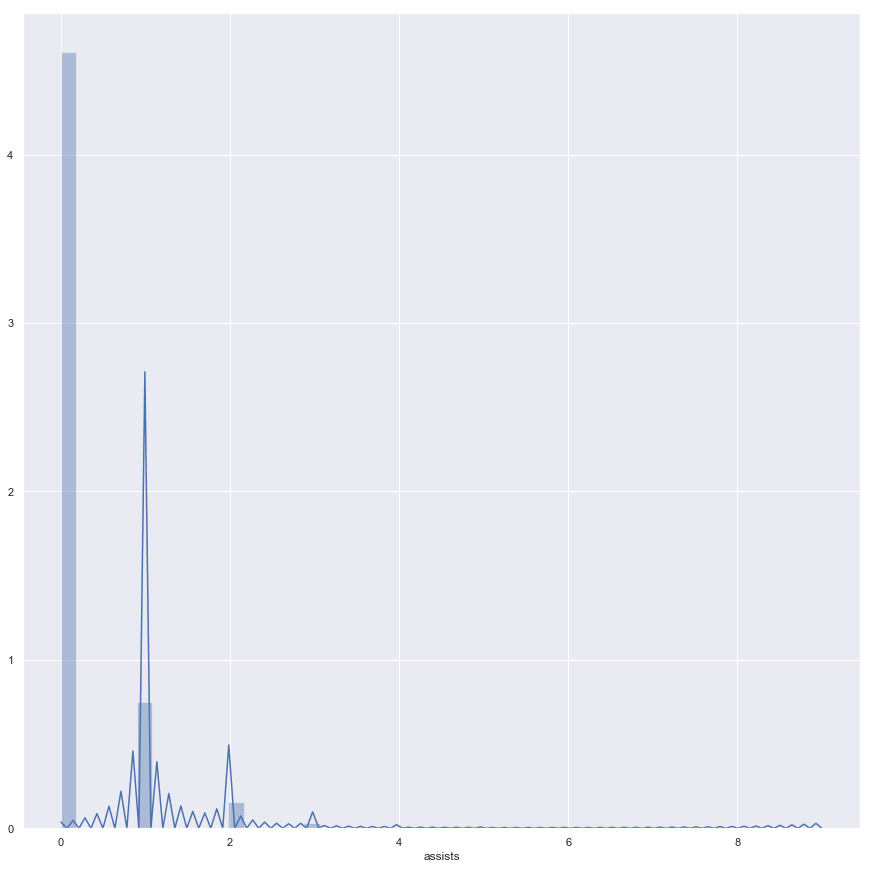

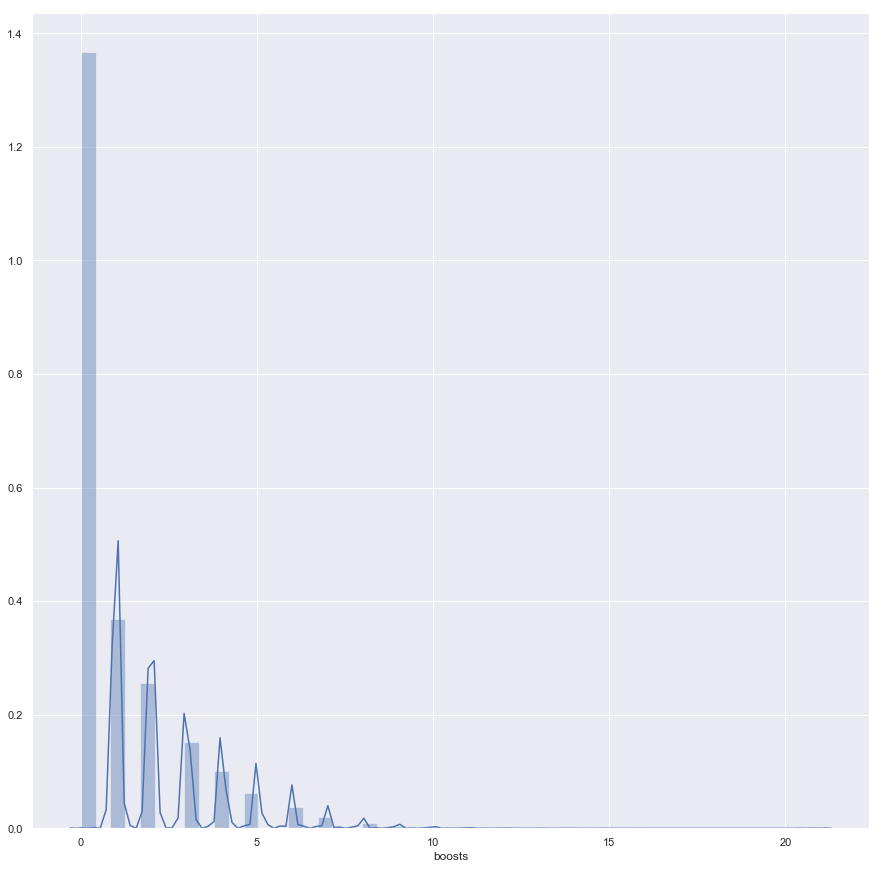

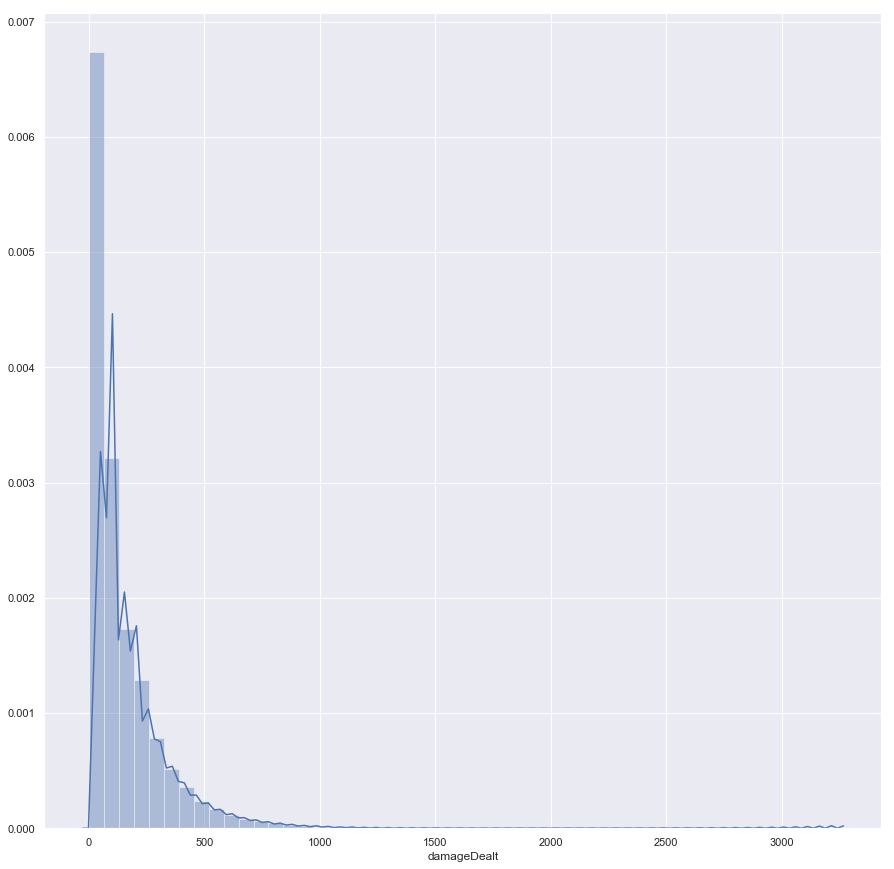

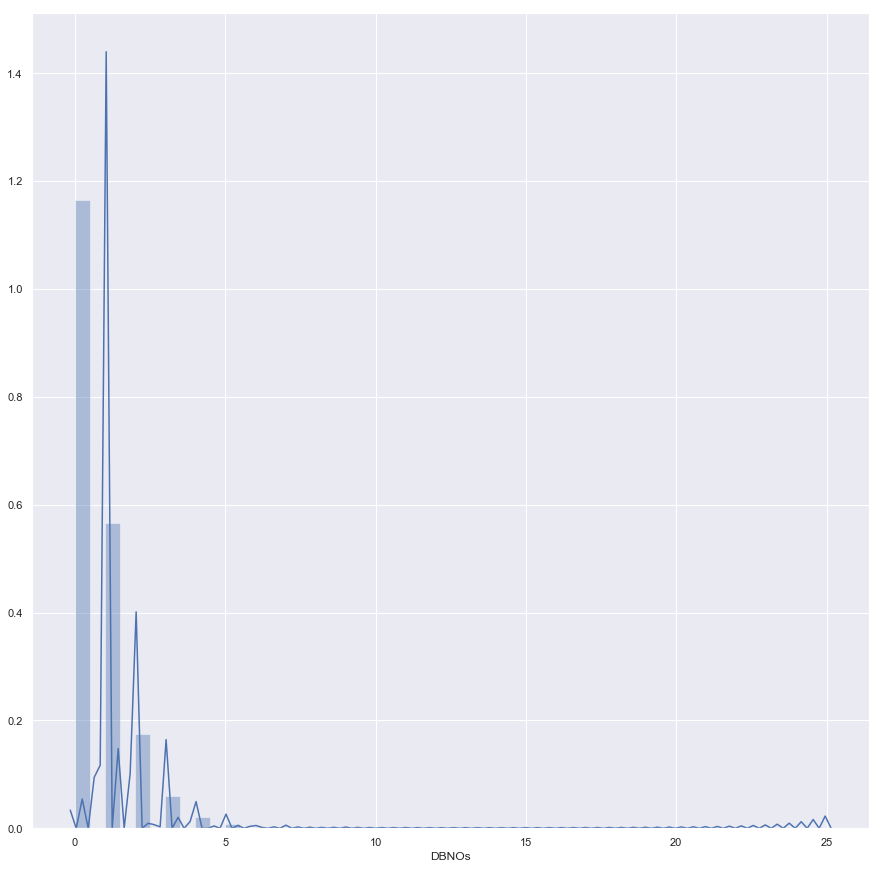

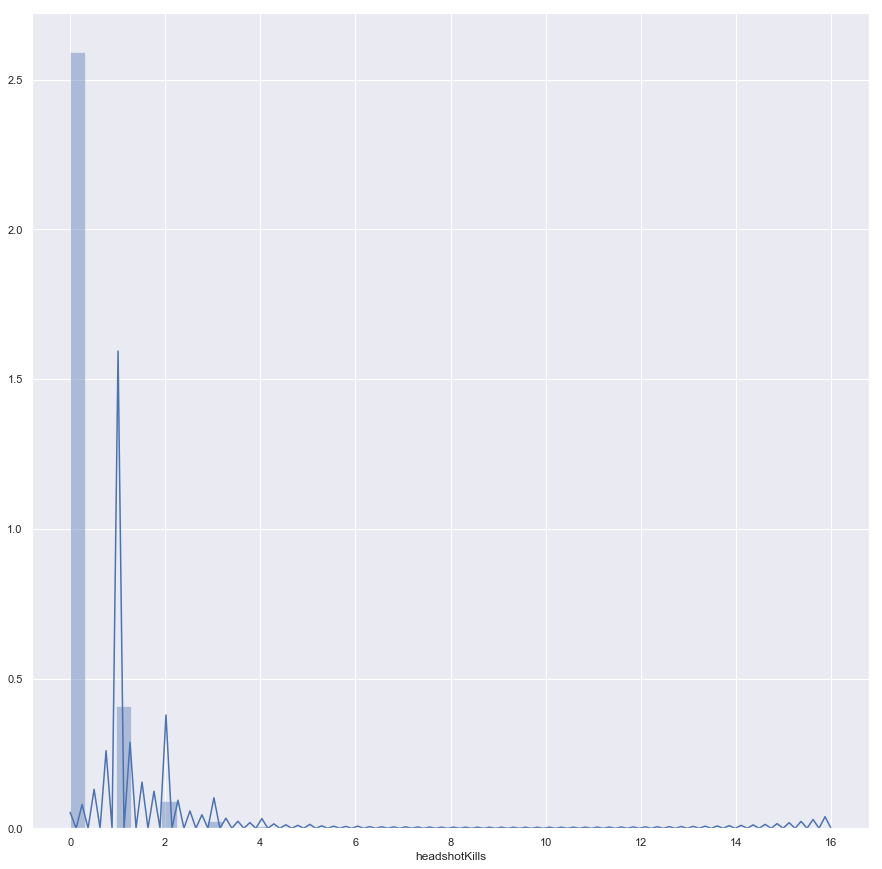

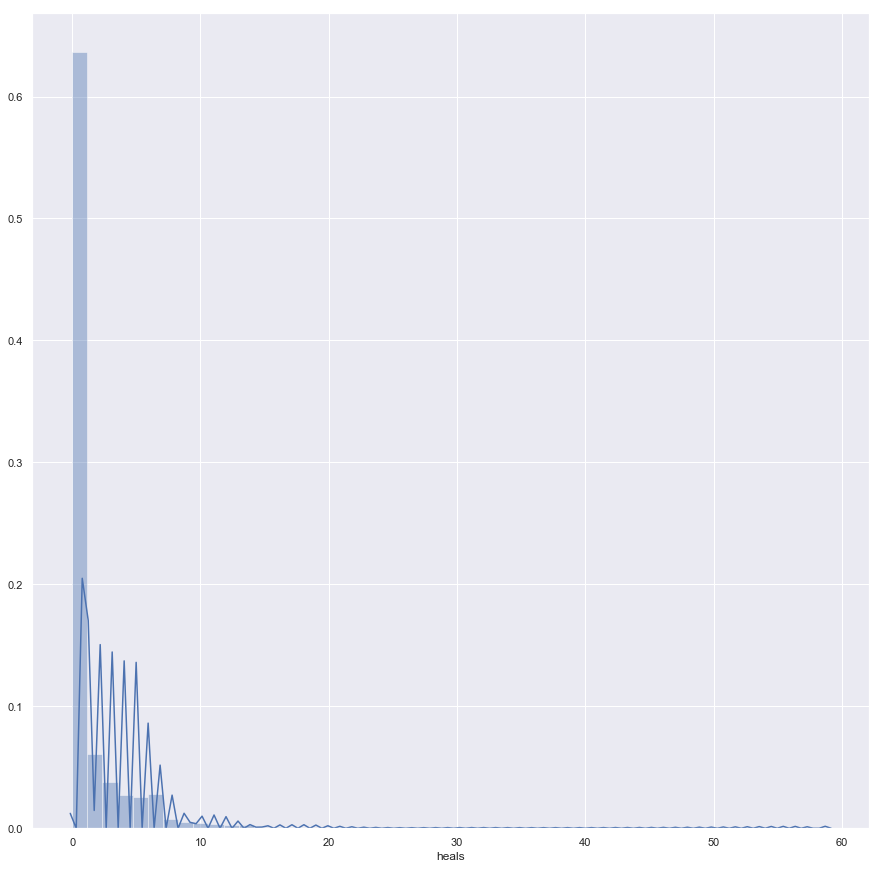

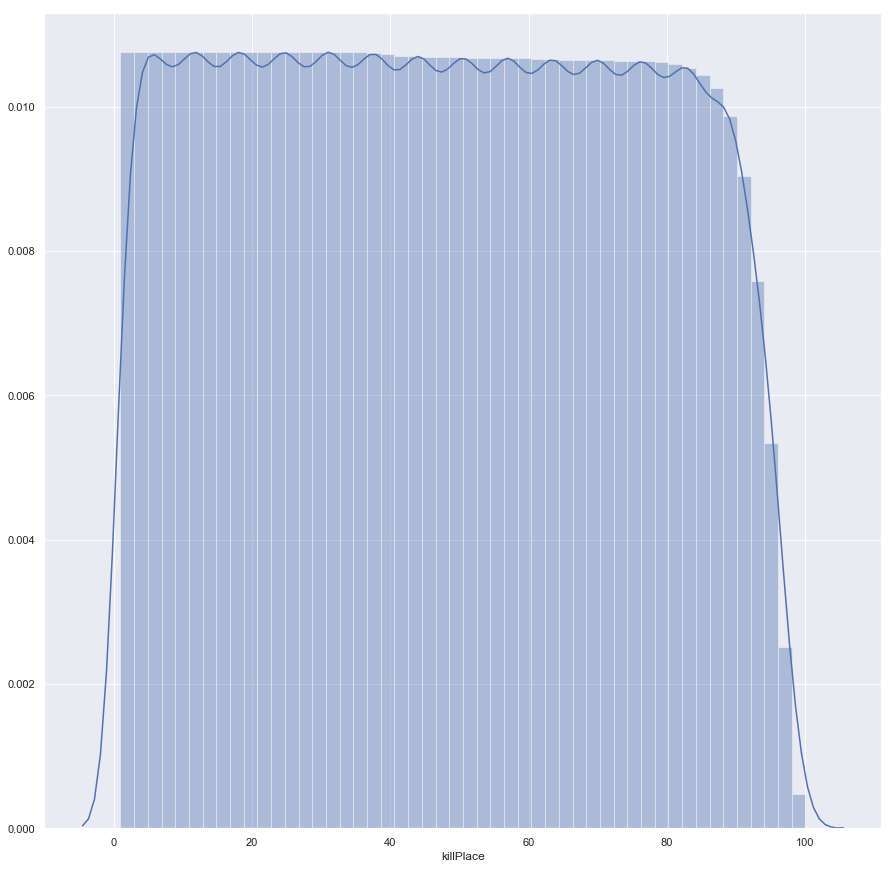

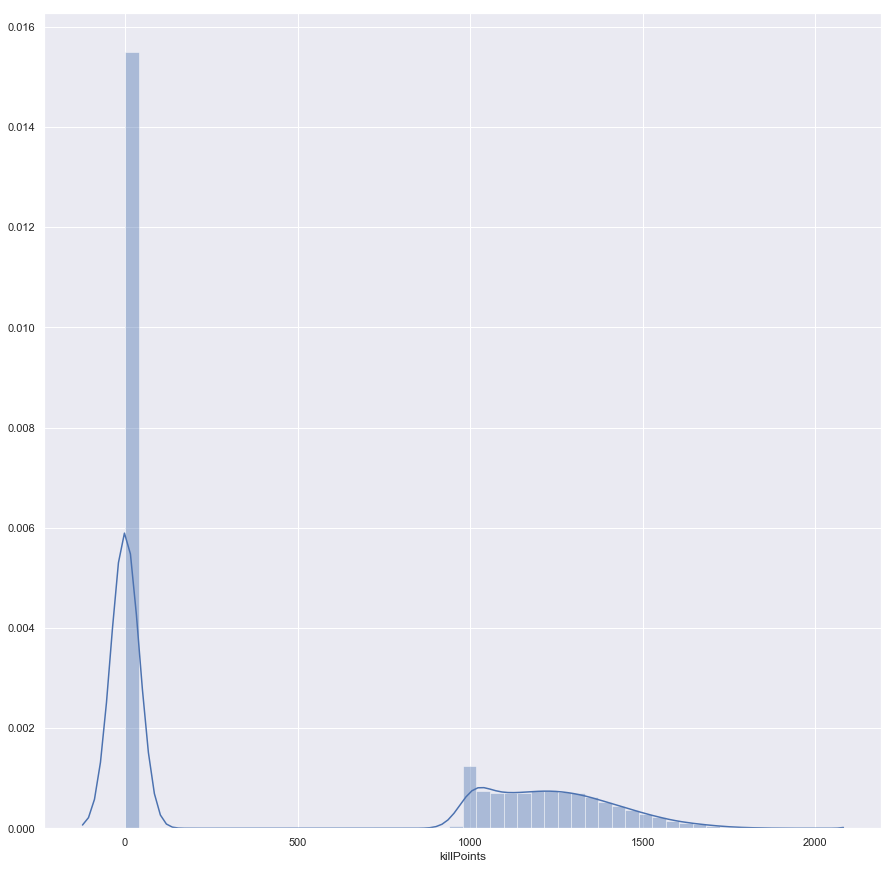

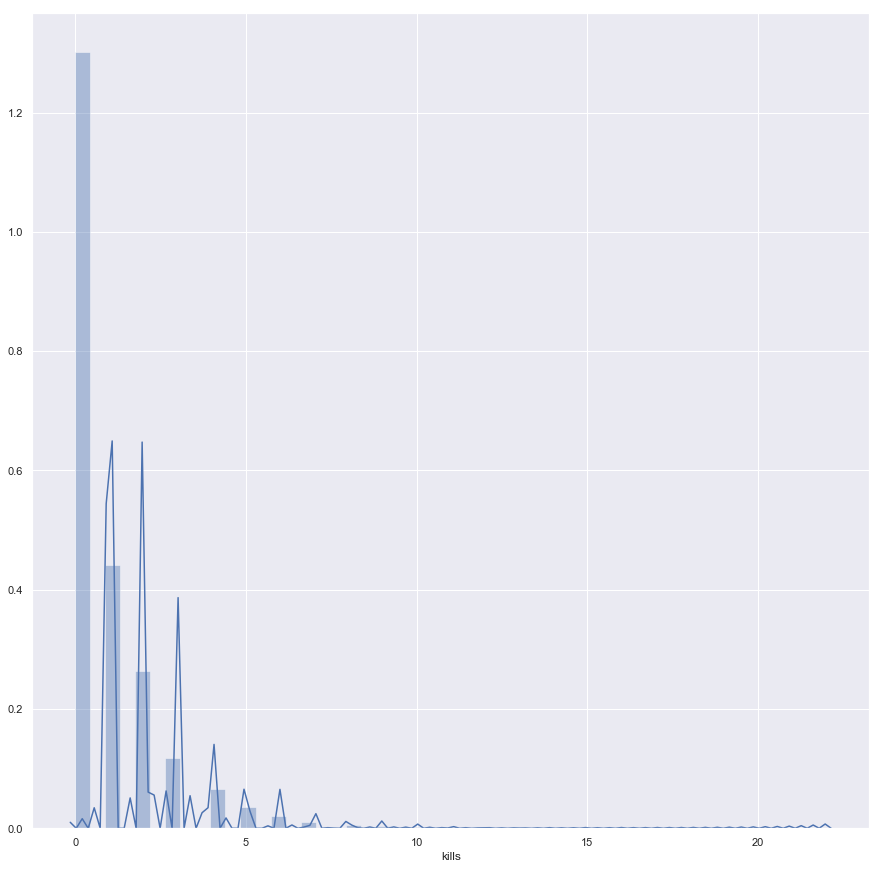

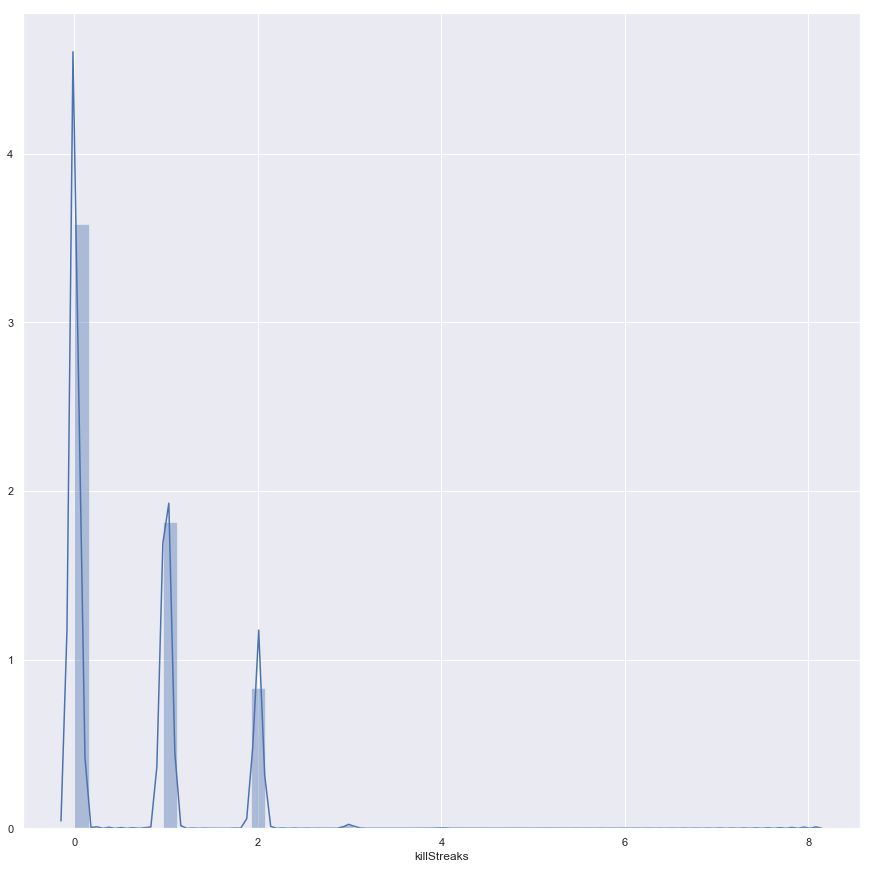

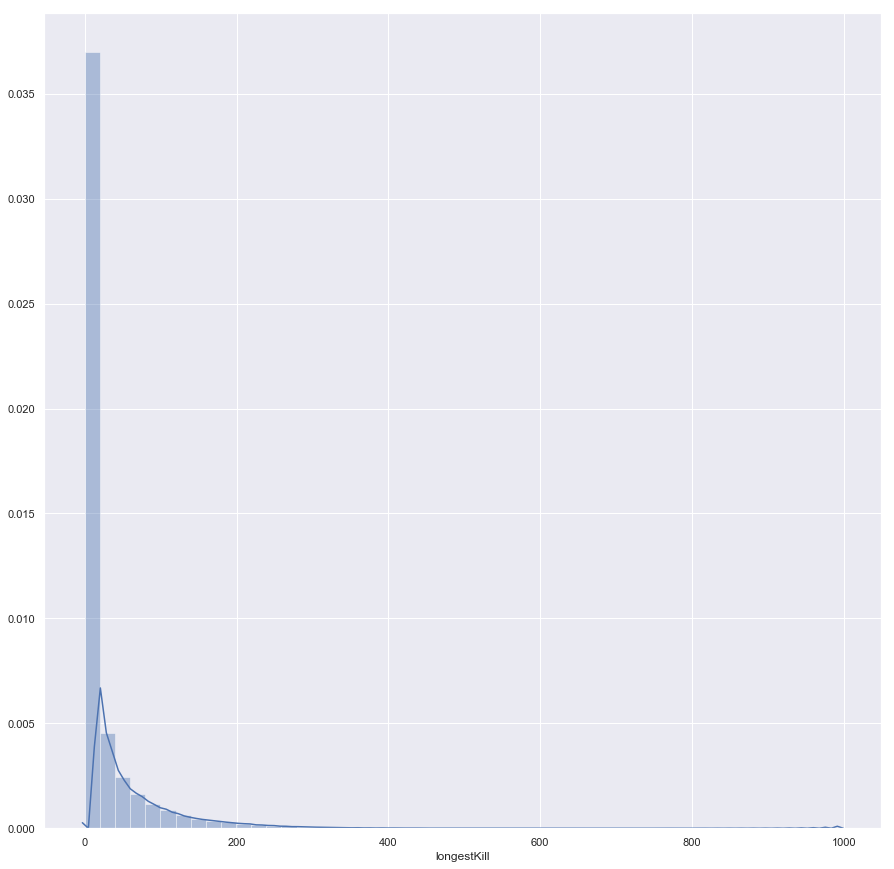

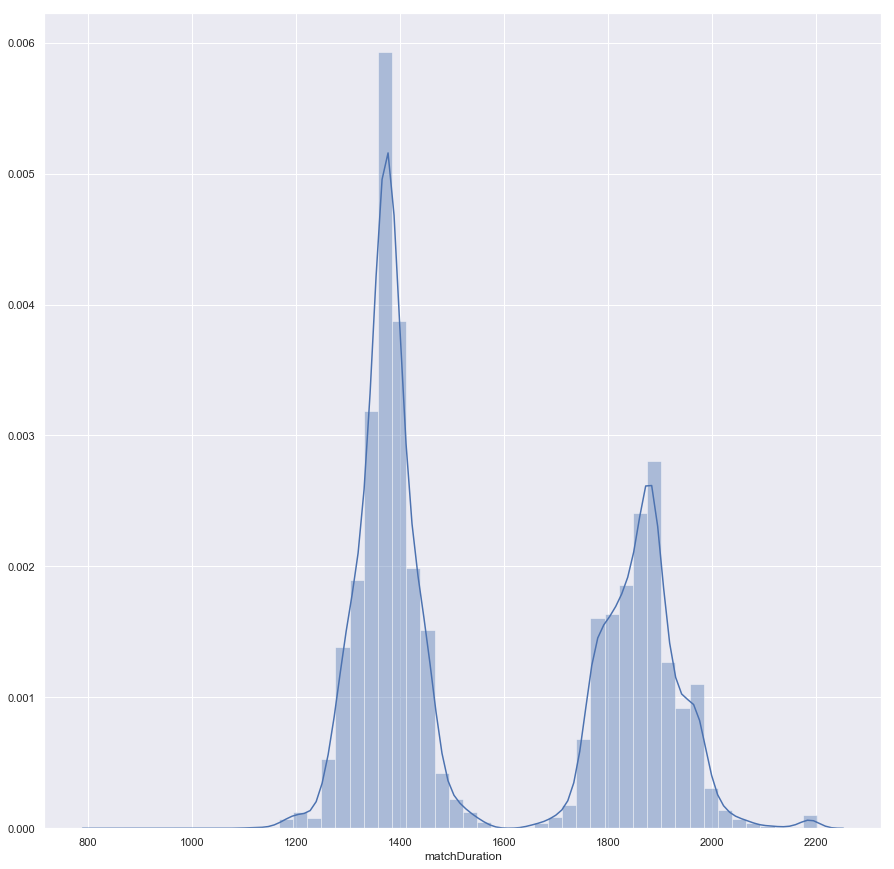

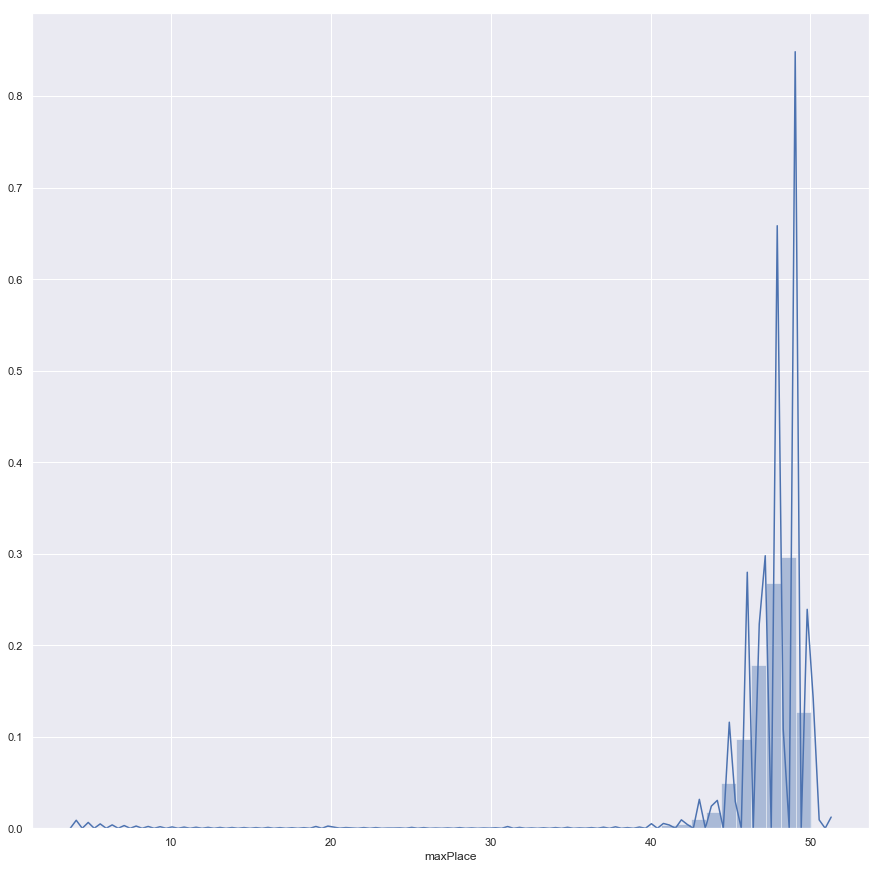

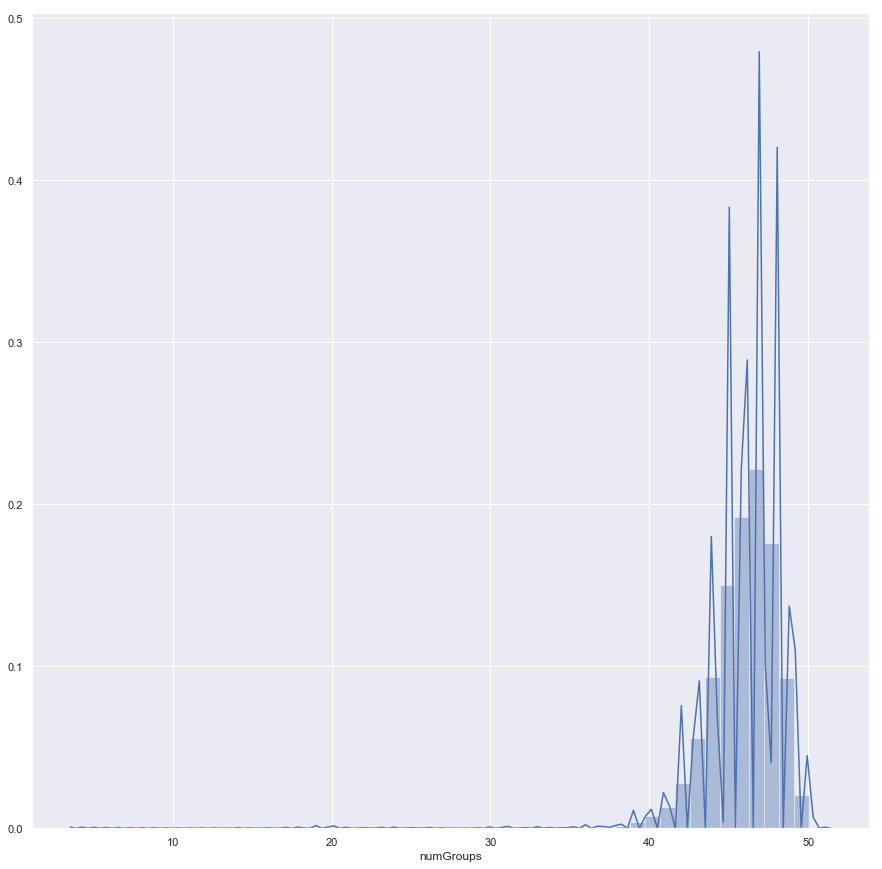

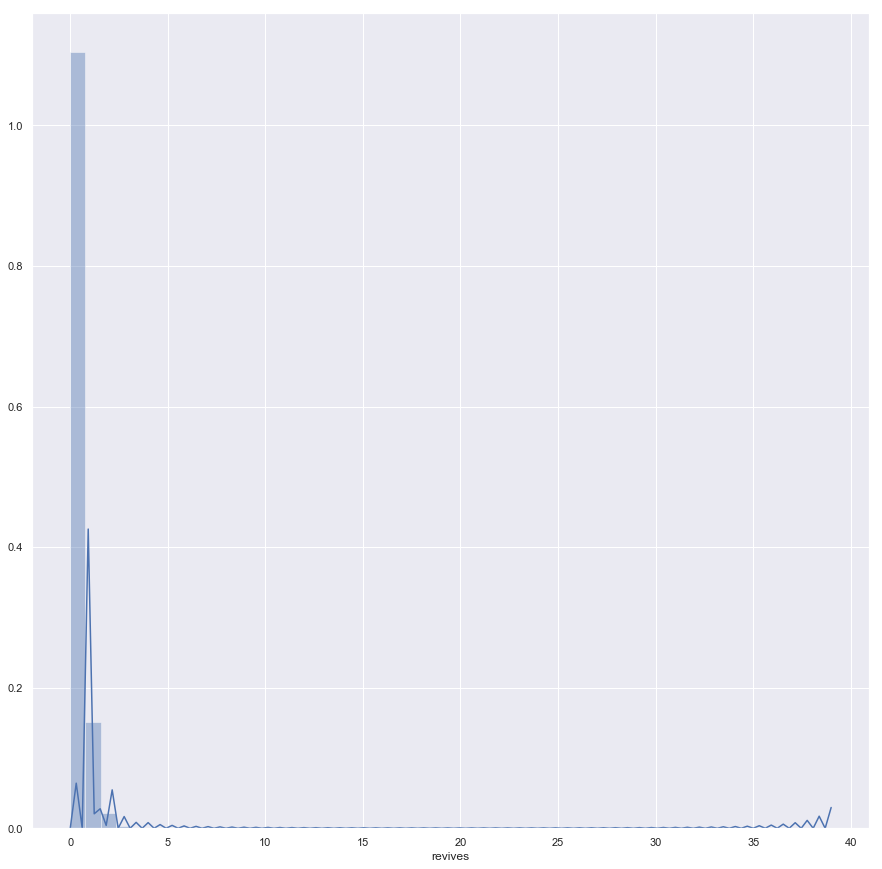

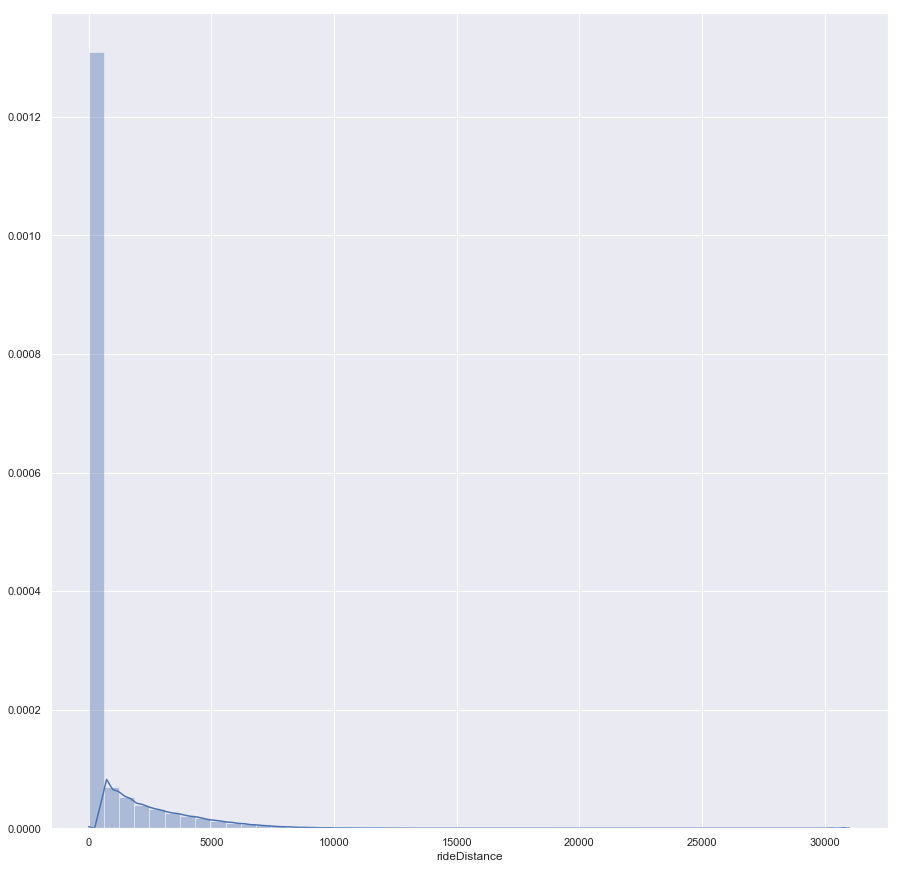

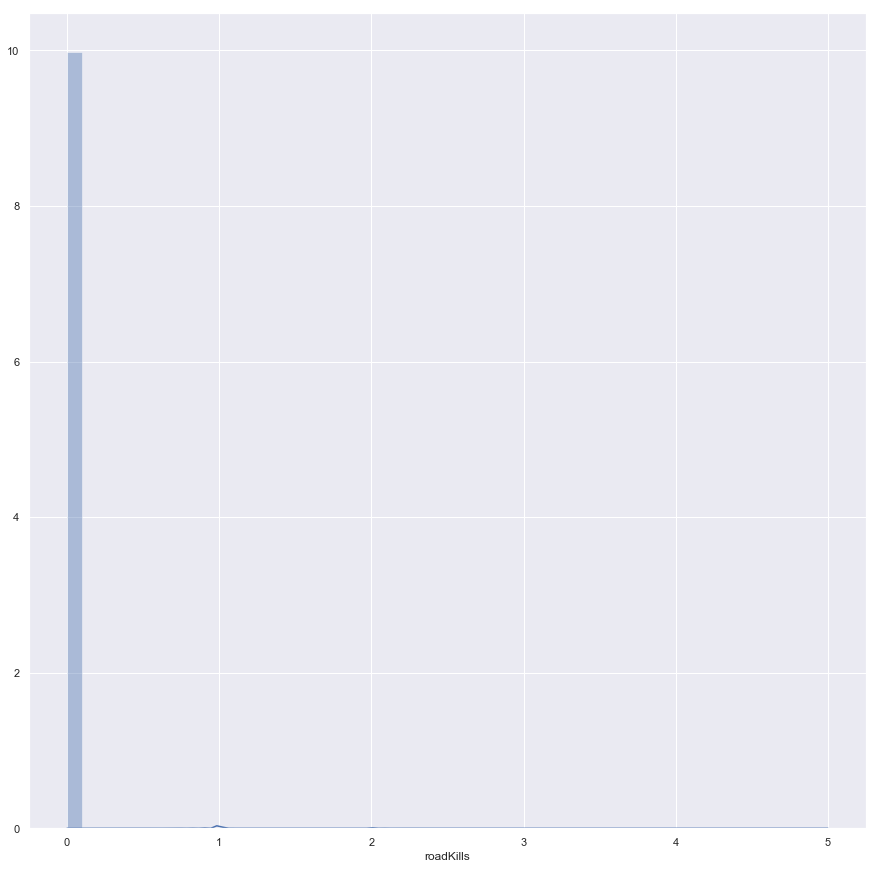

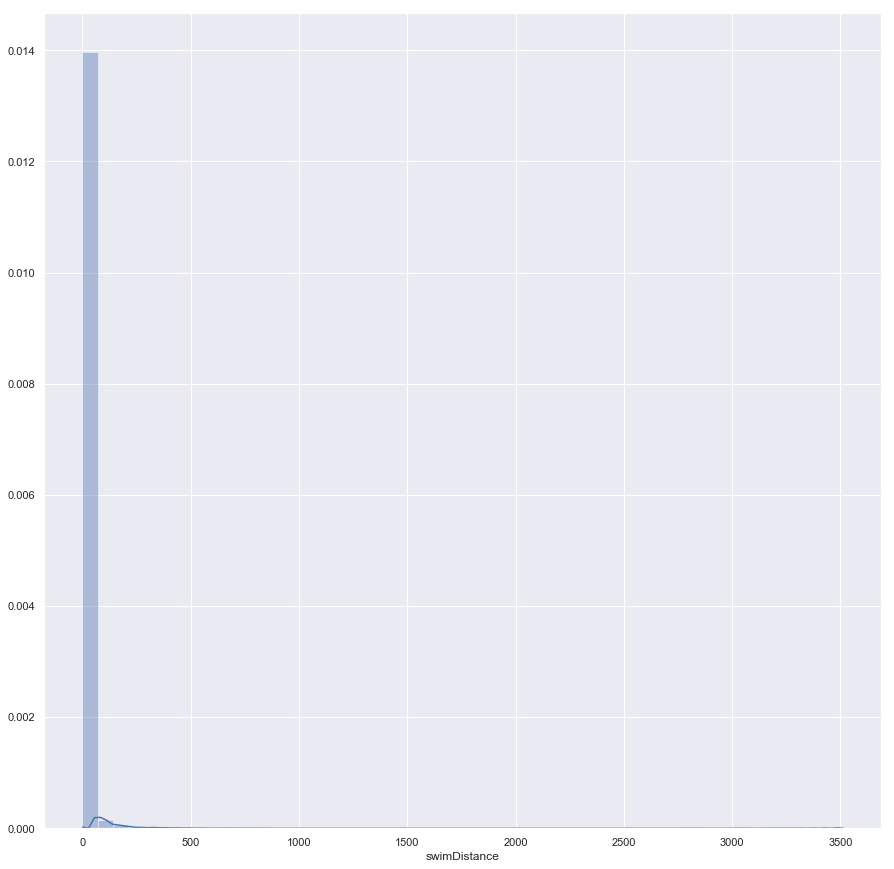

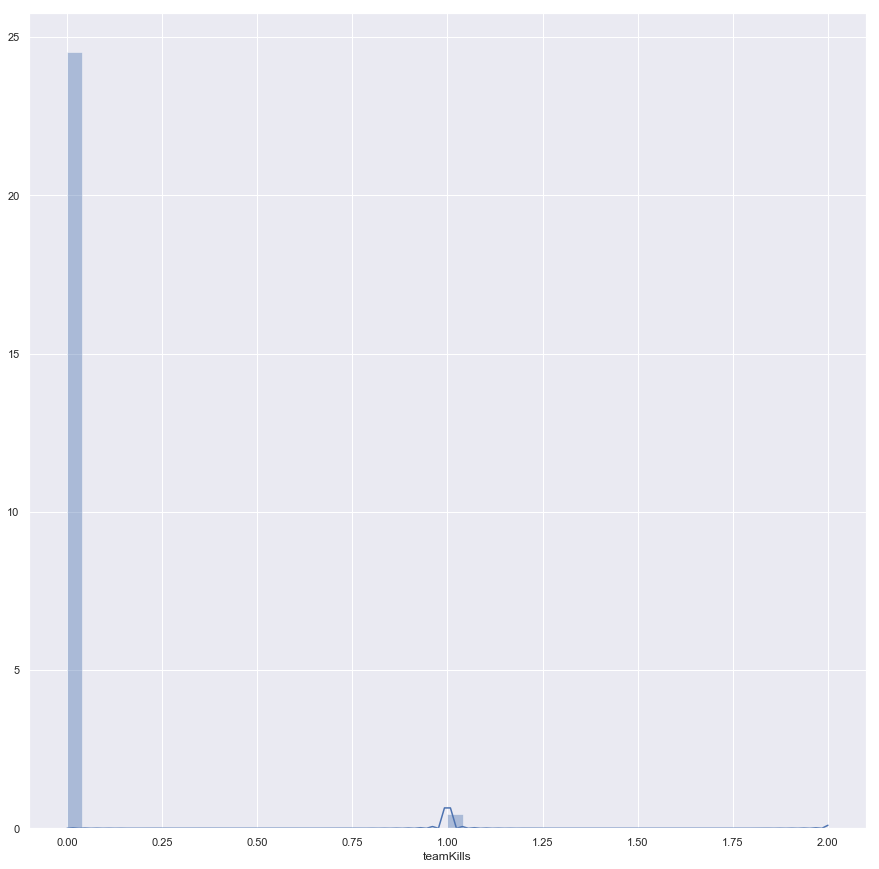

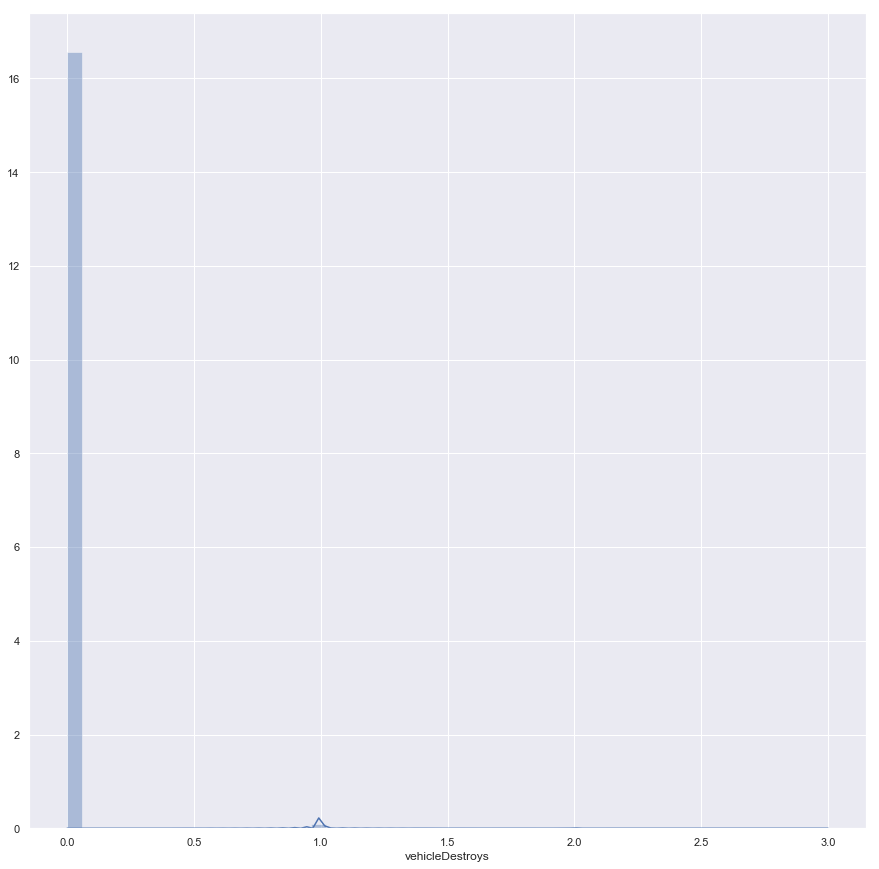

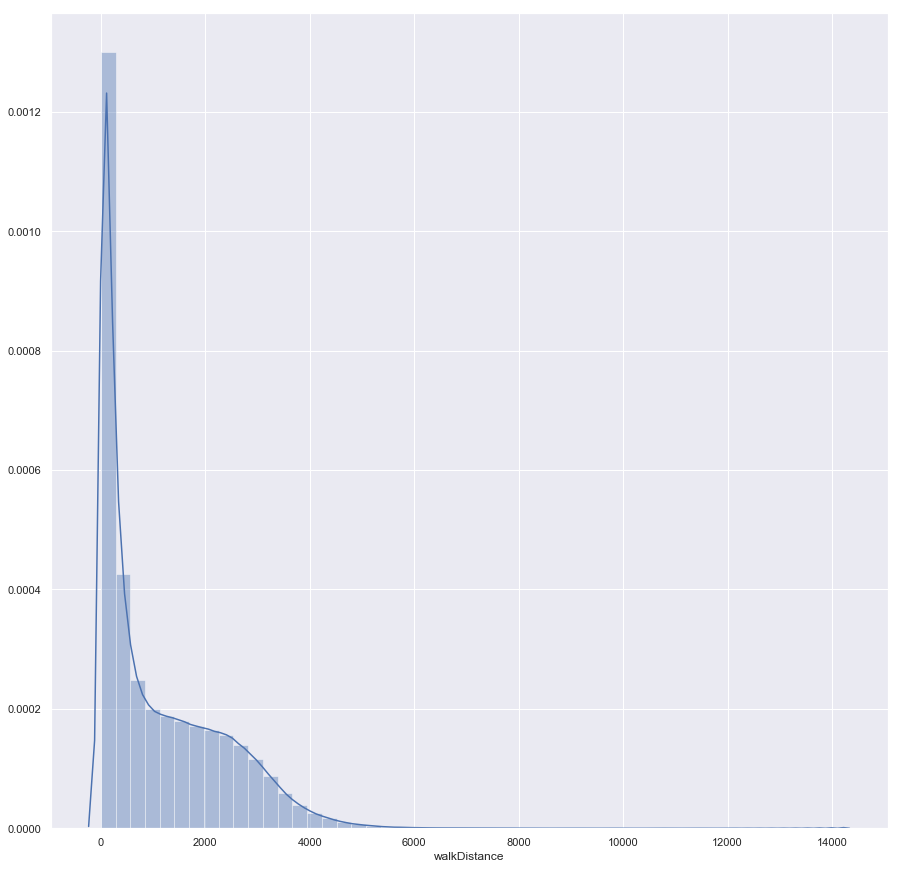

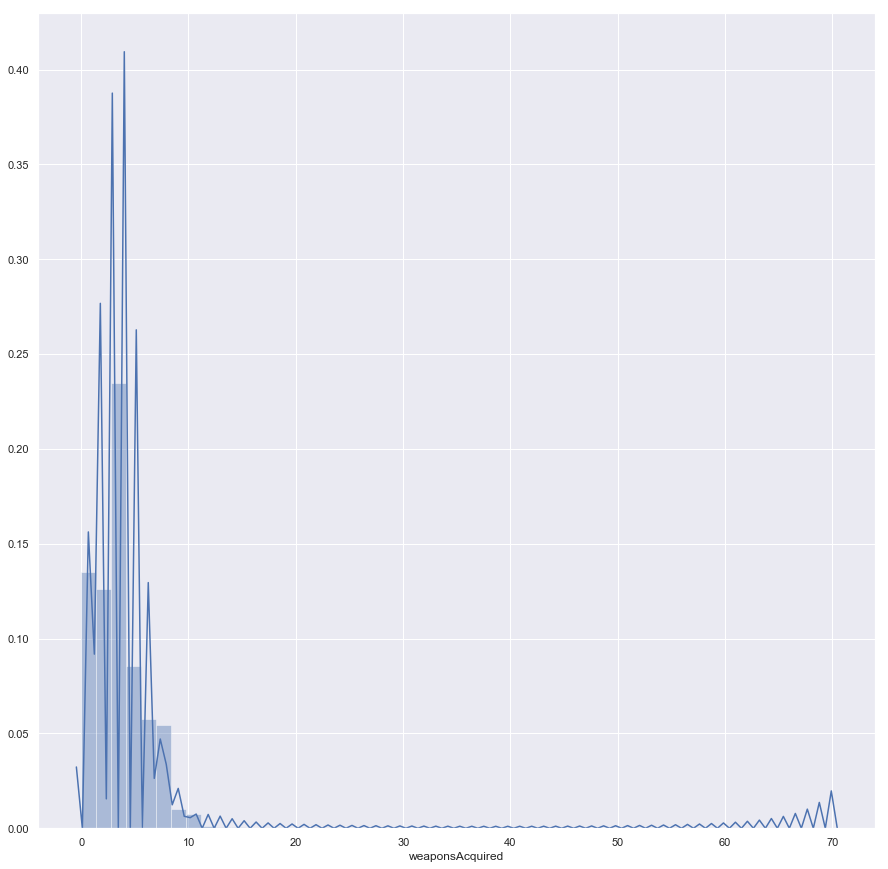

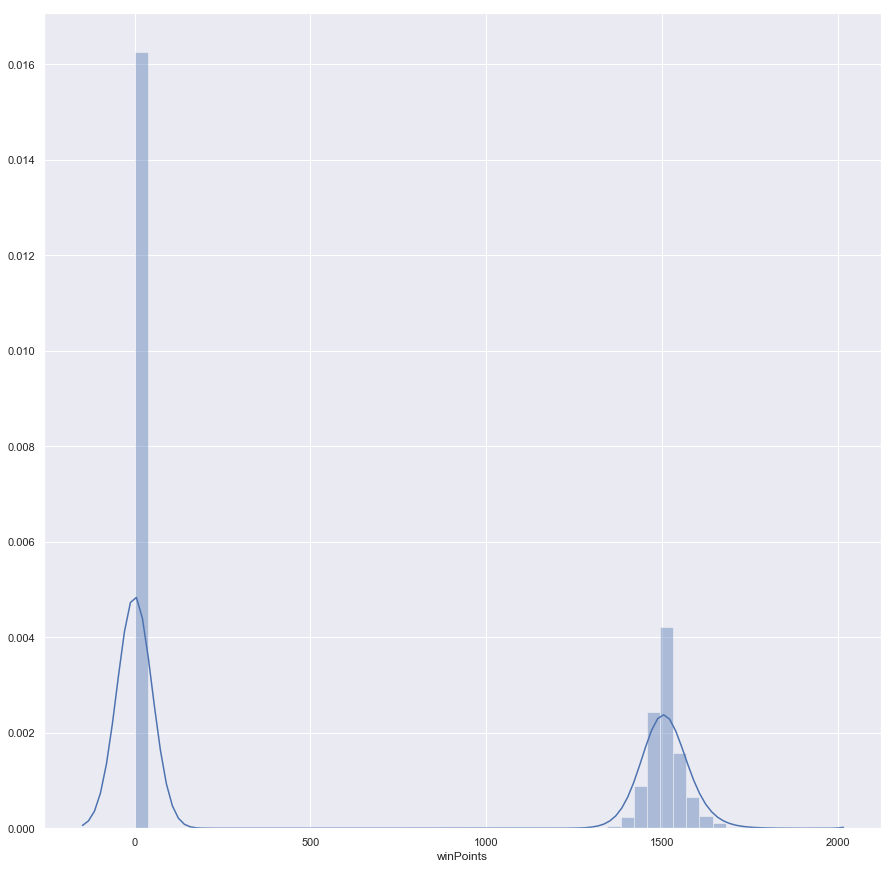

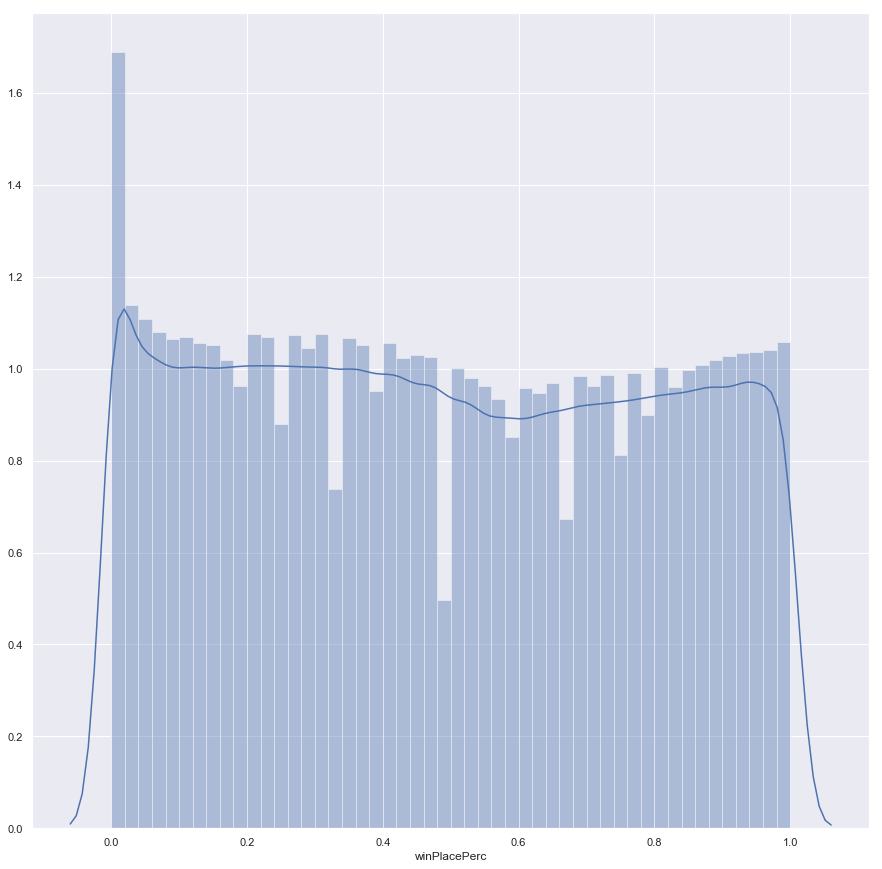

In [41]:
for feature in team_features:
    plt.figure(figsize = (15, 15))
    sns.distplot(duofpp[feature])

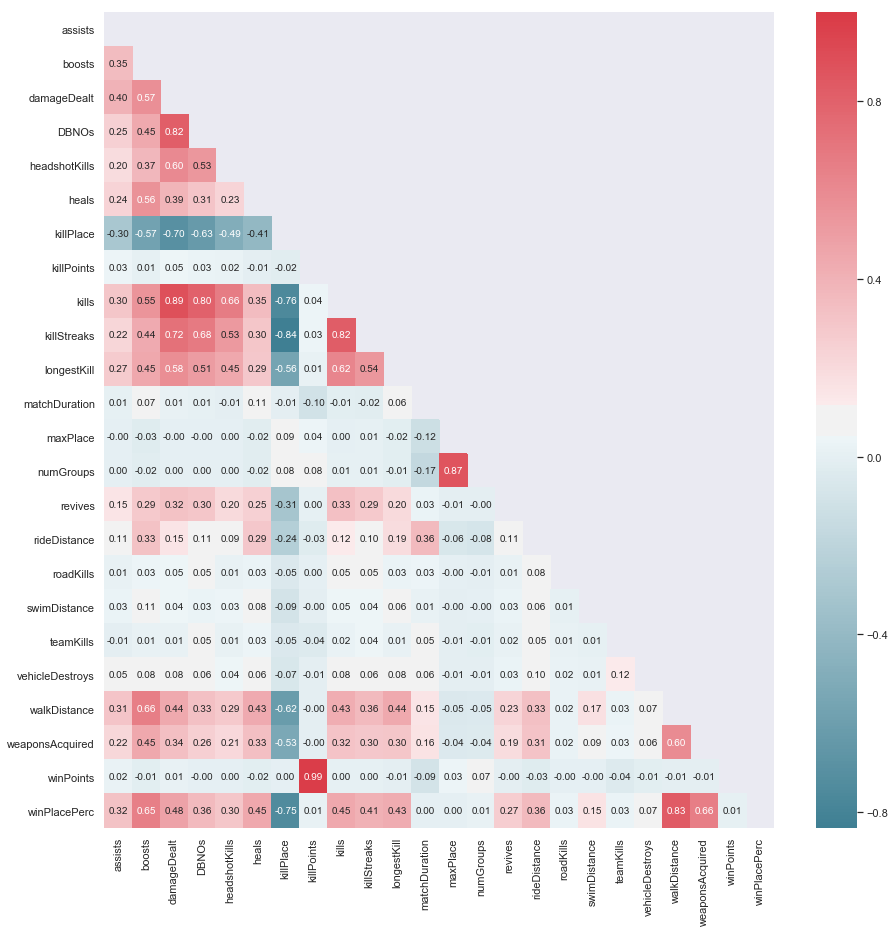

In [42]:
halfHeatMap(duofpp[team_features], mirror = False, corrtype = "pearson")

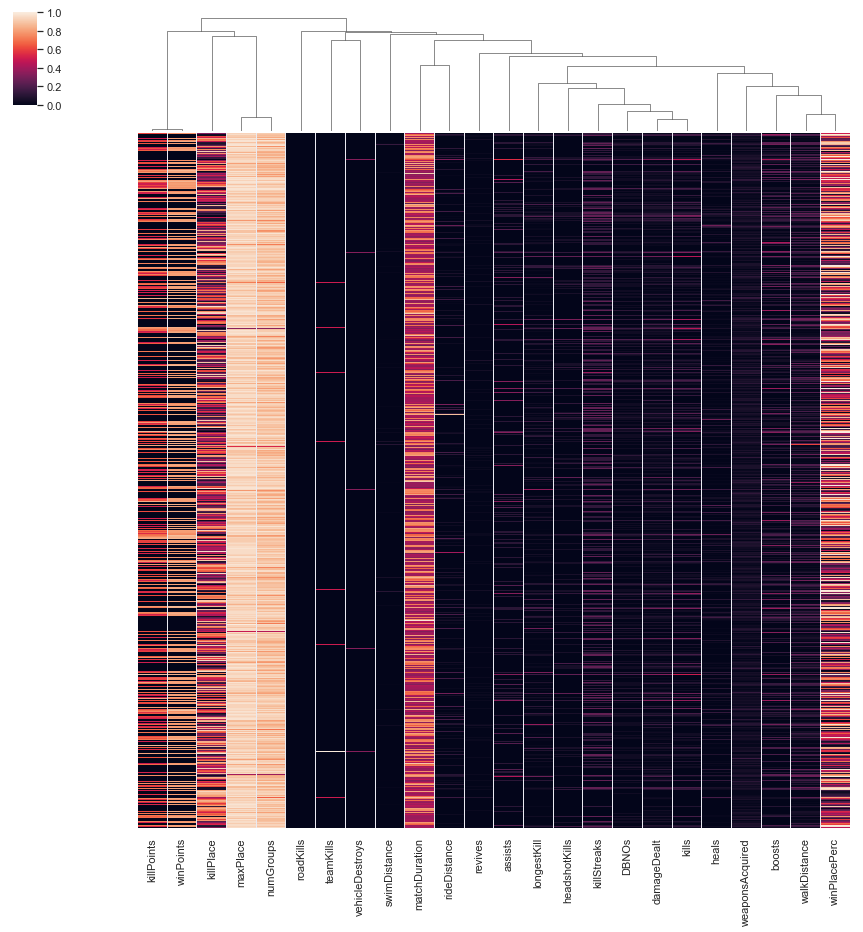

In [43]:
clustermap = sns.clustermap(duofpp[team_features], figsize = (15, 15), 
                            metric = "correlation", row_cluster = False, 
                            standard_scale = 1, yticklabels = [])

### Normal/FPP Mode Comparison

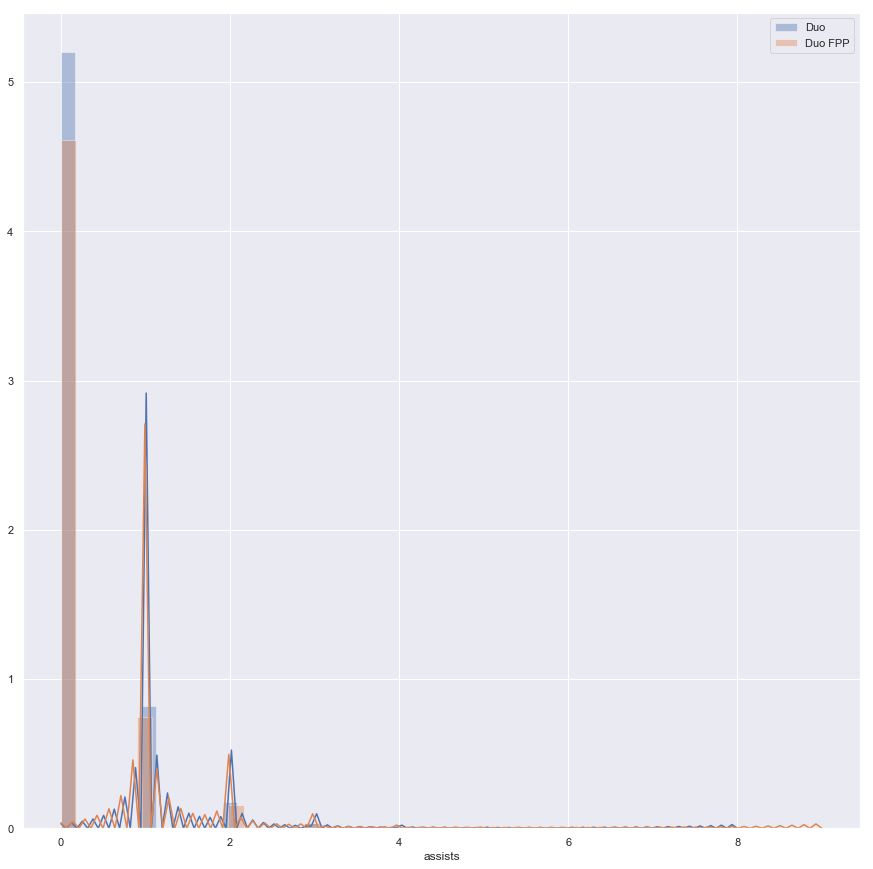

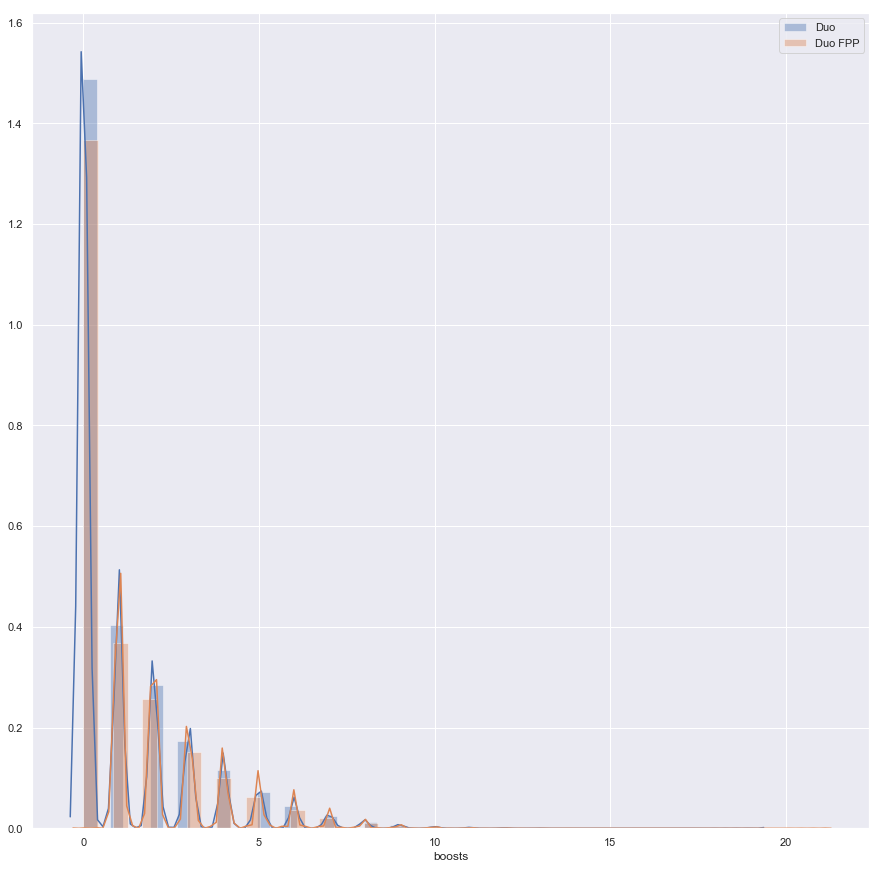

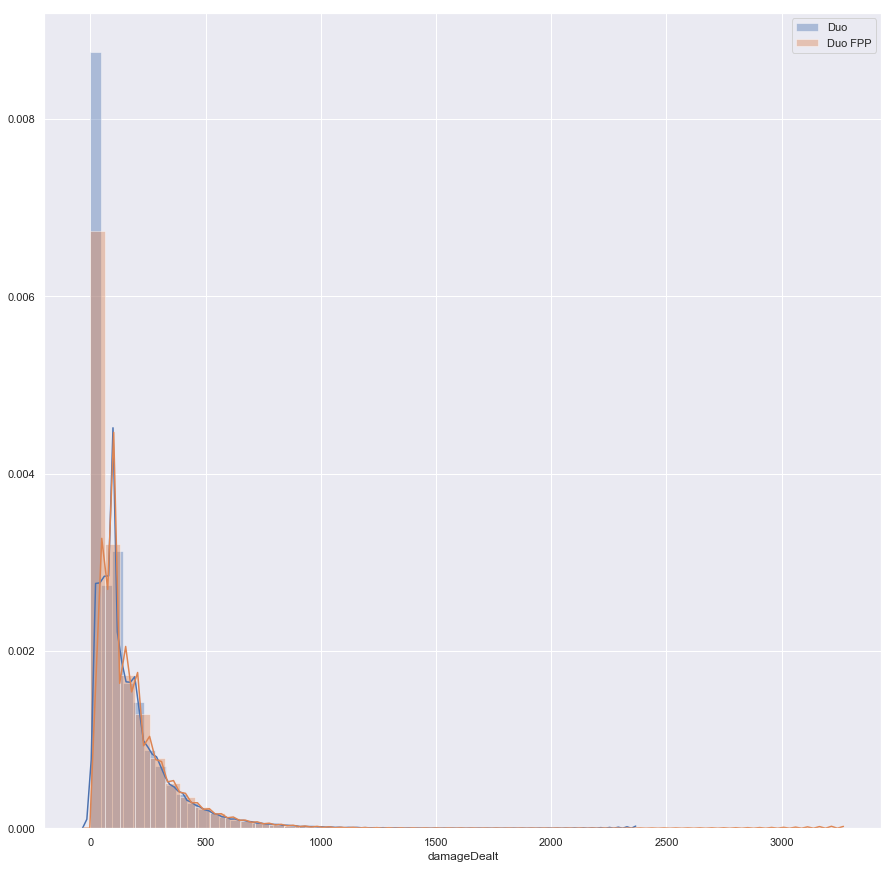

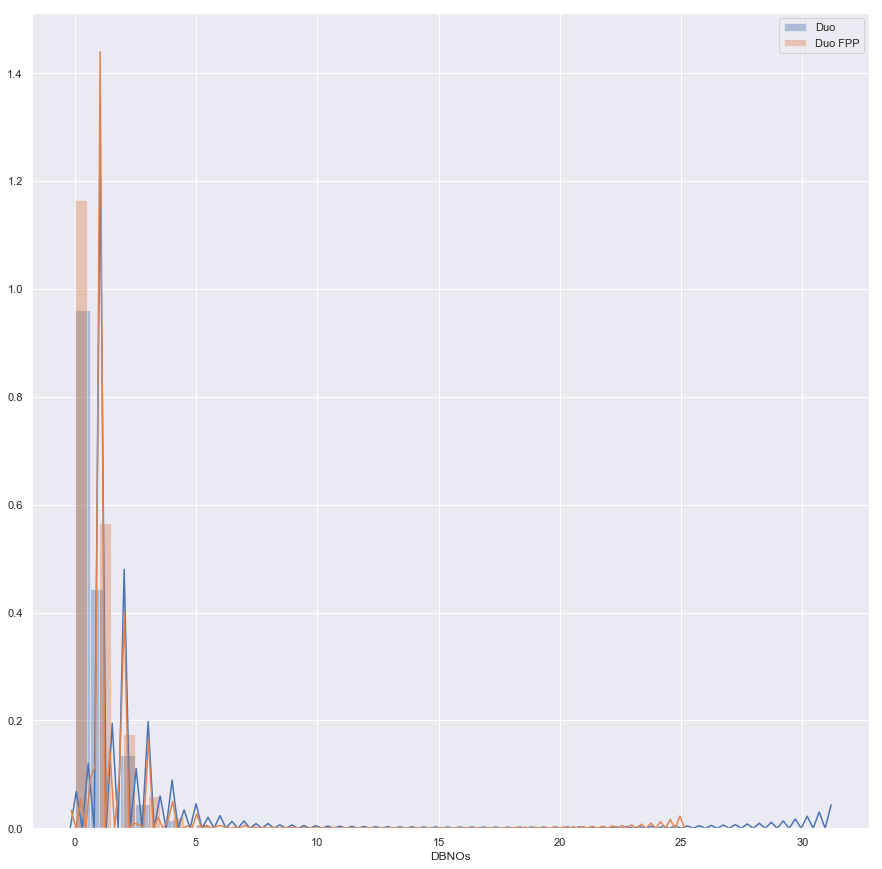

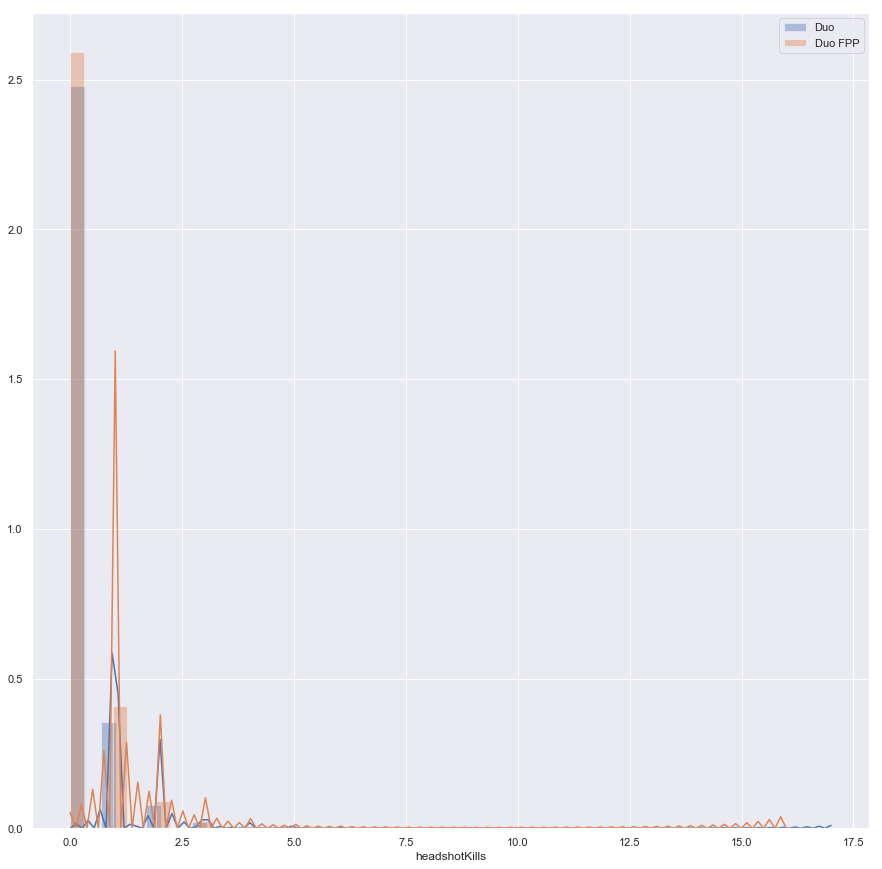

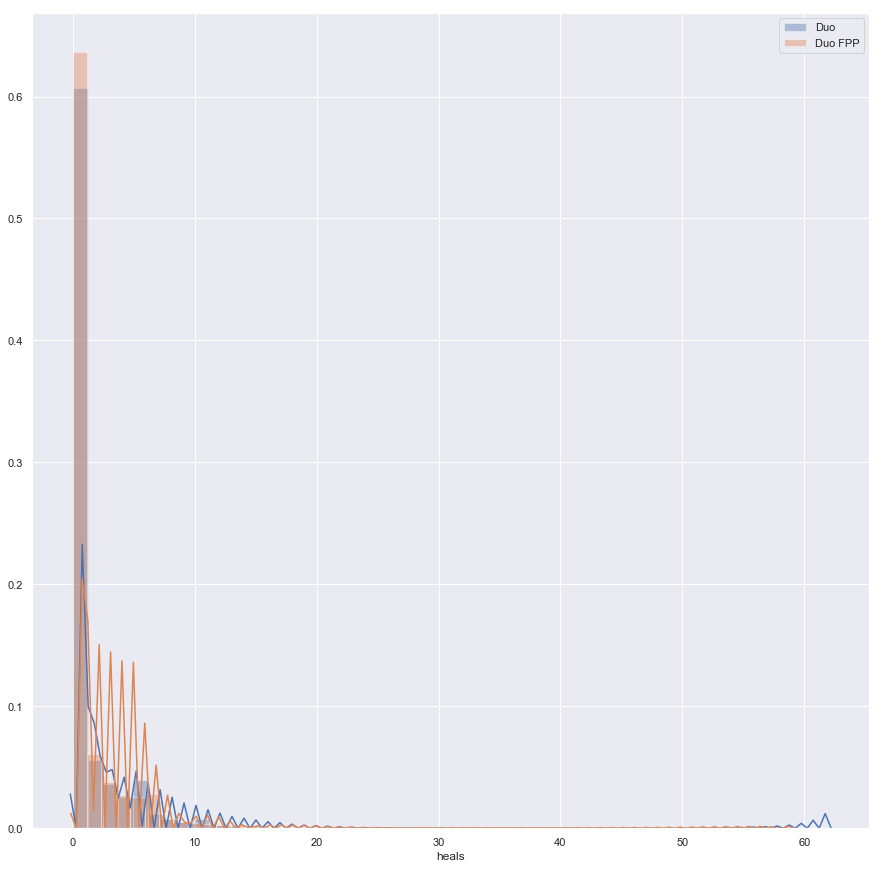

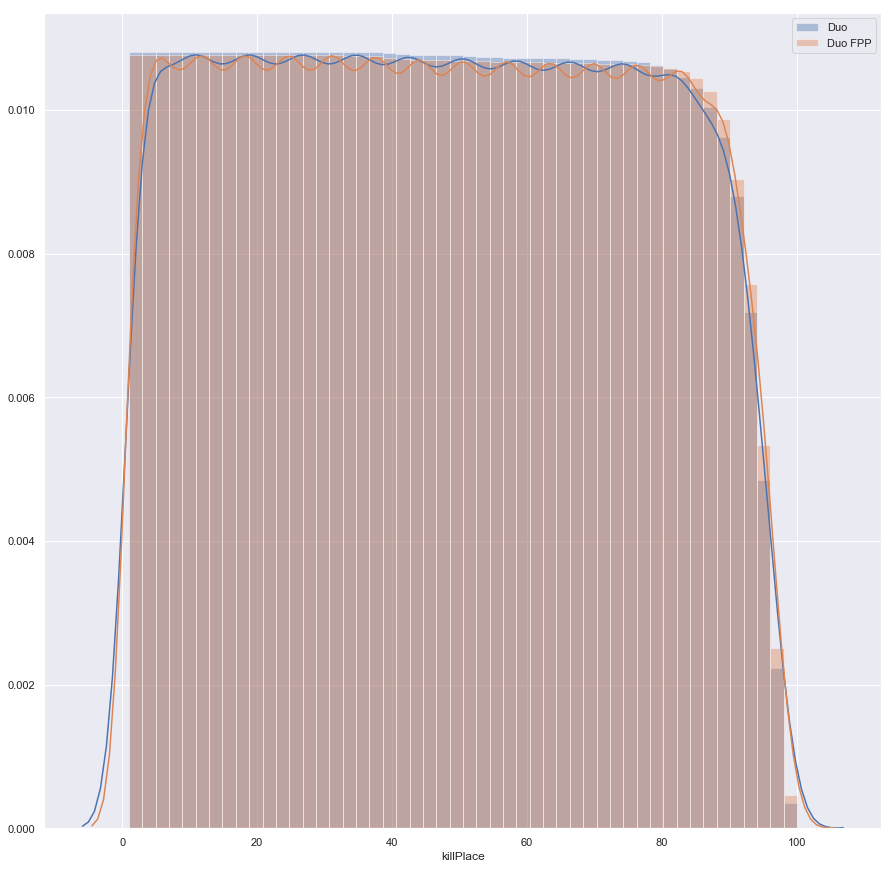

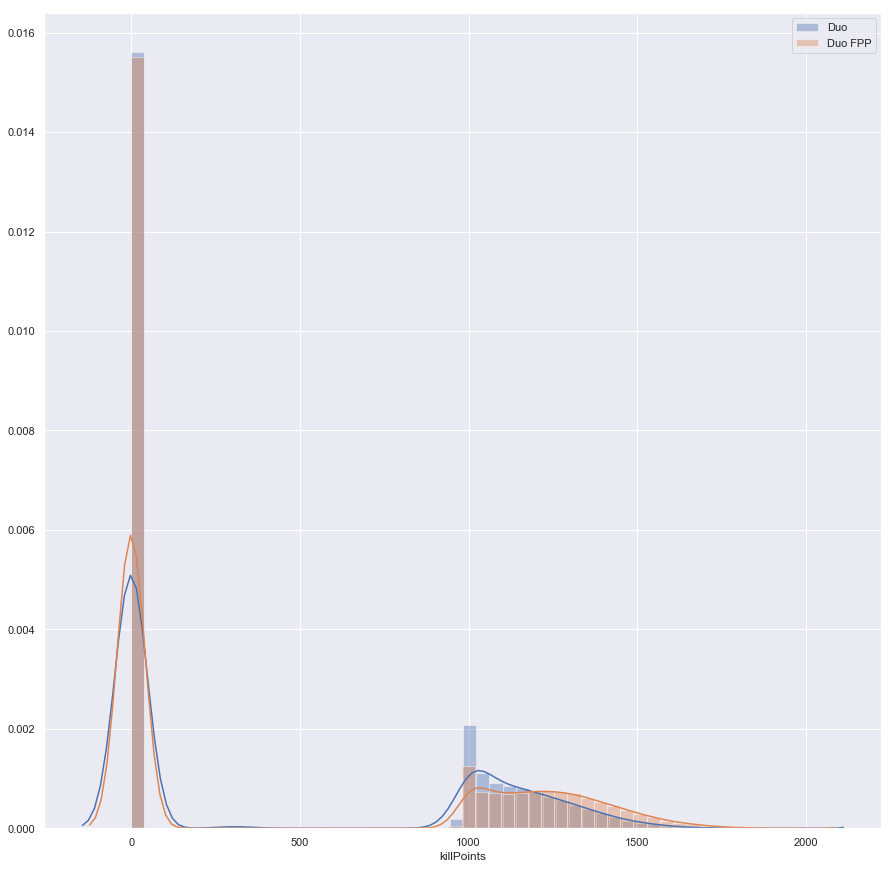

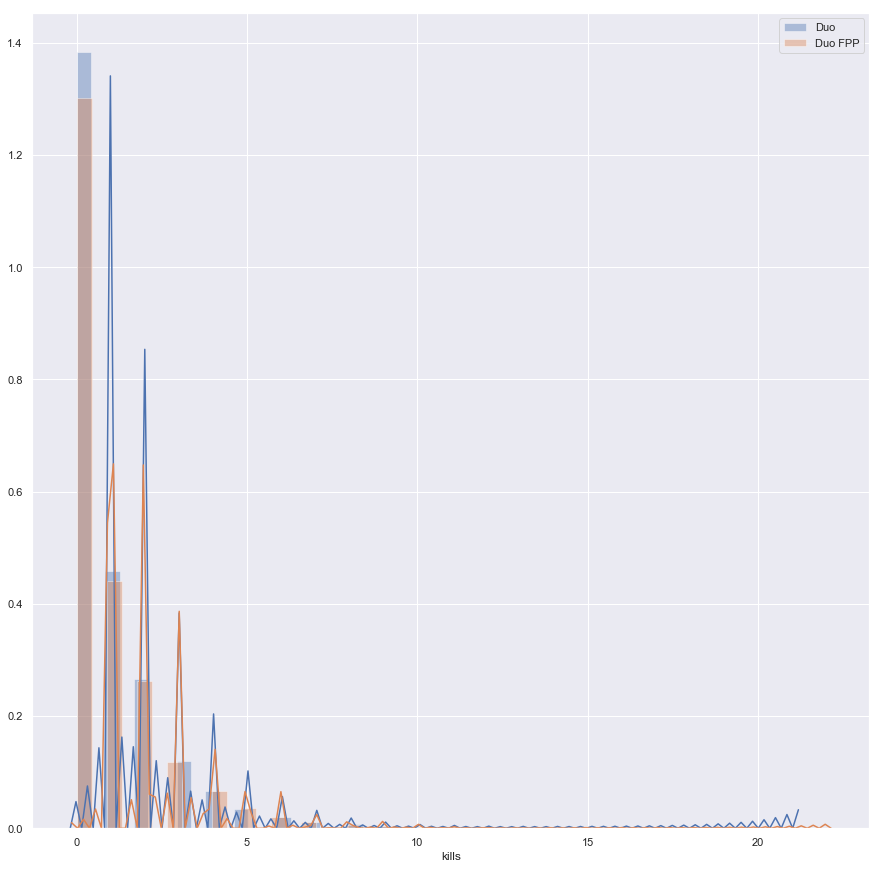

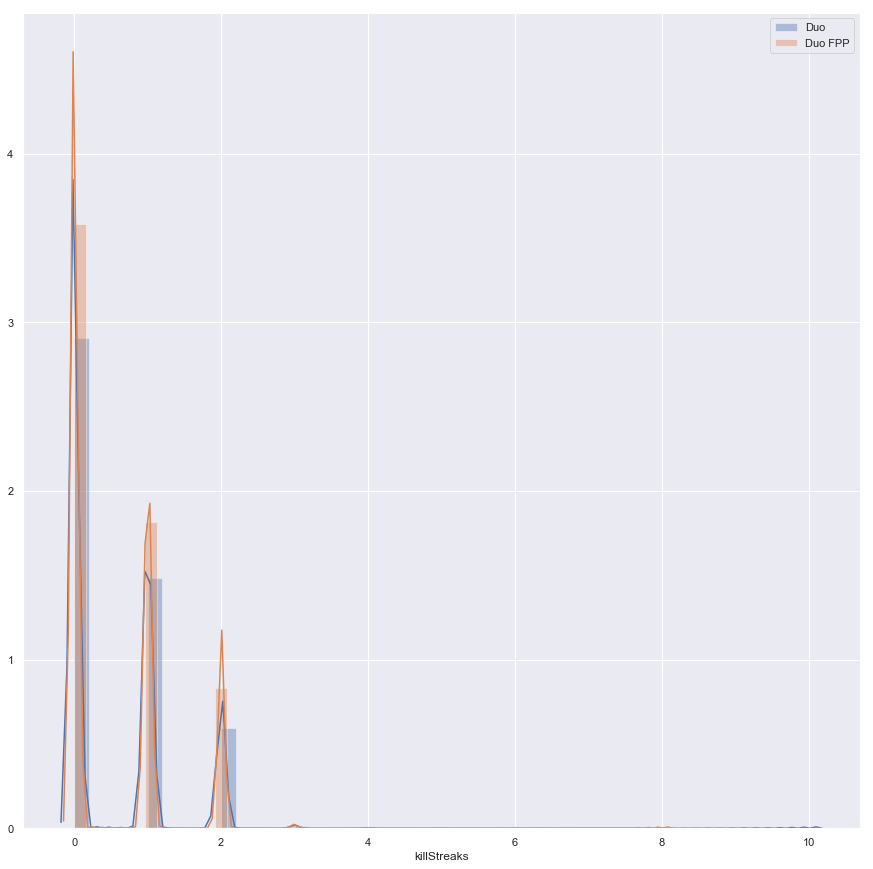

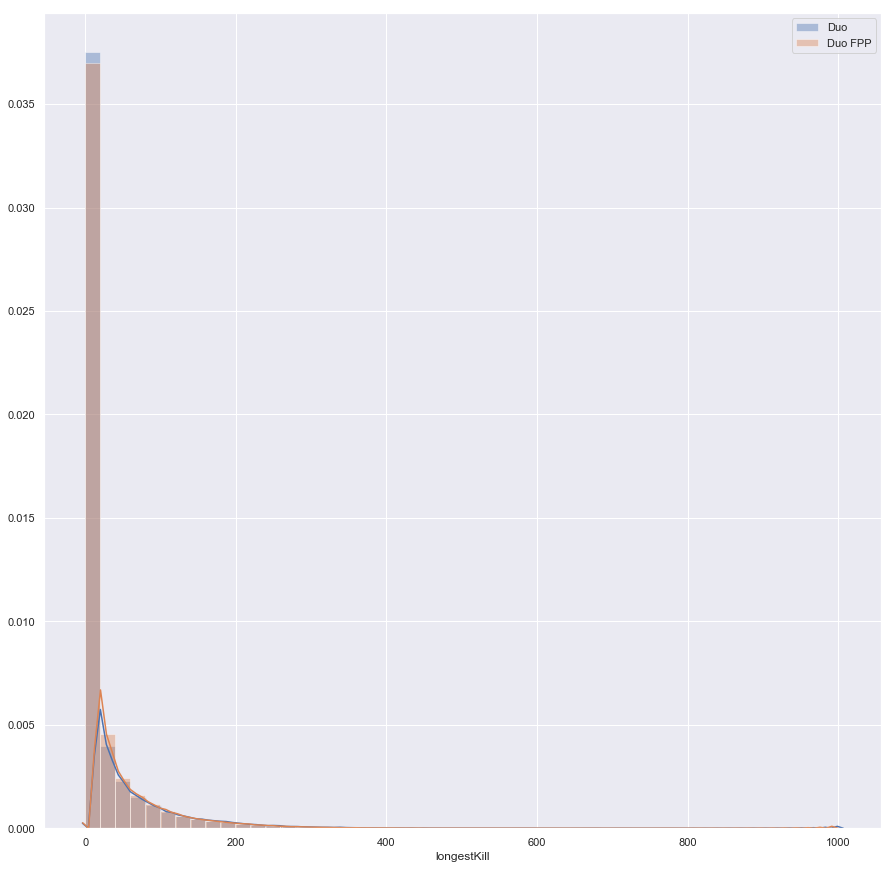

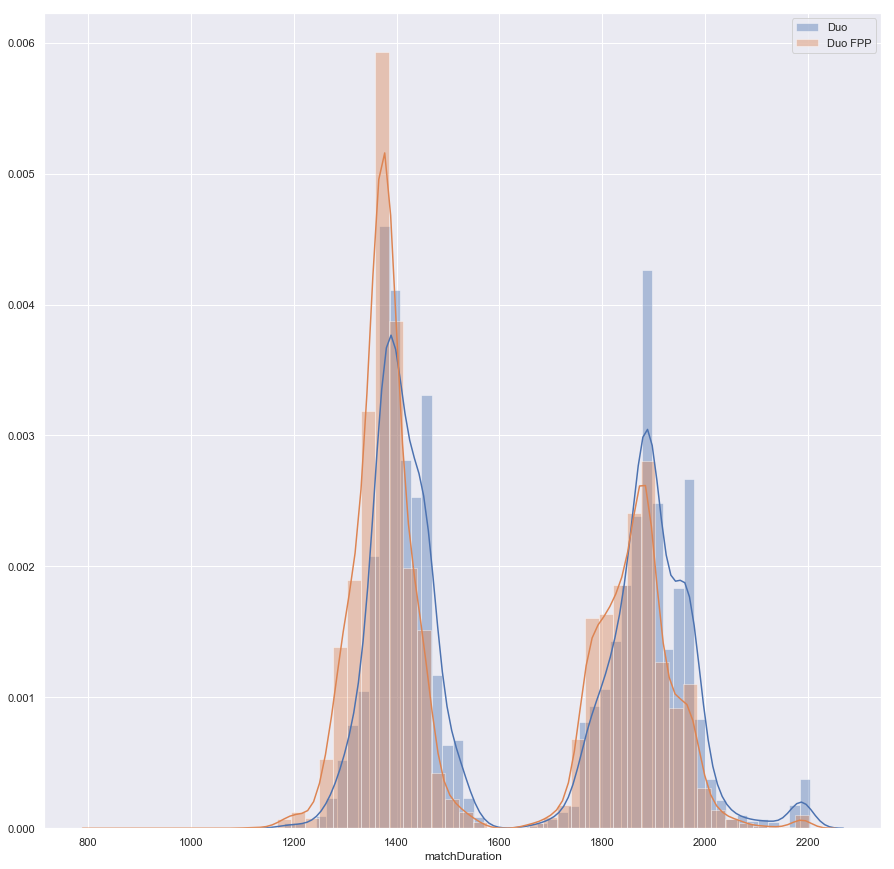

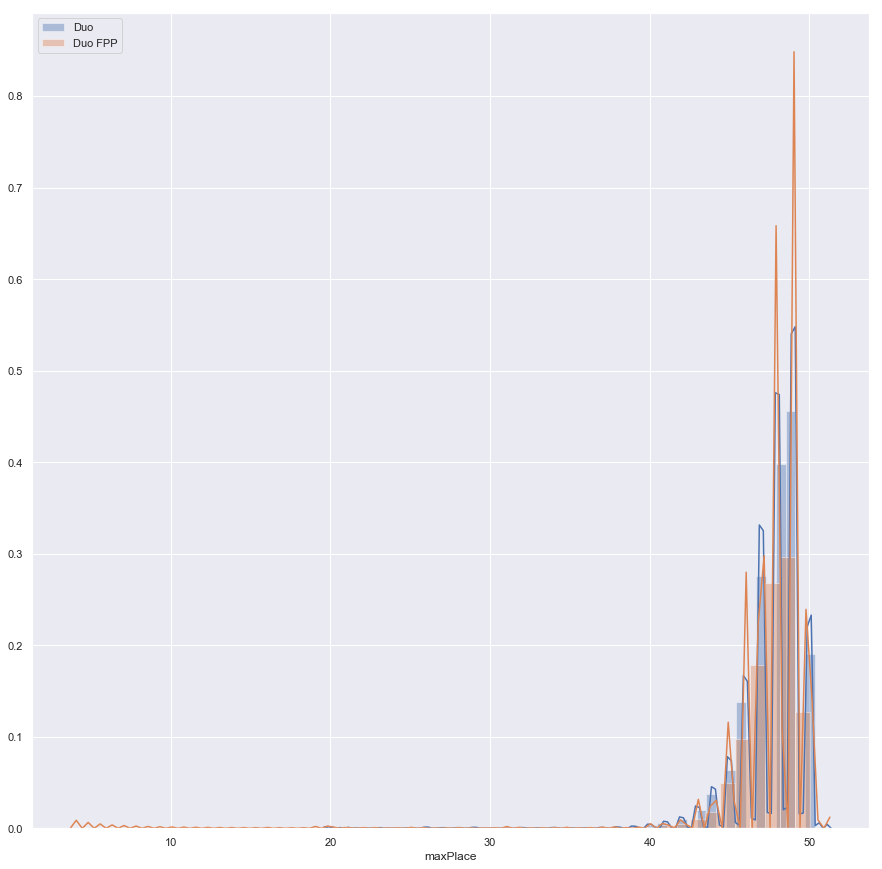

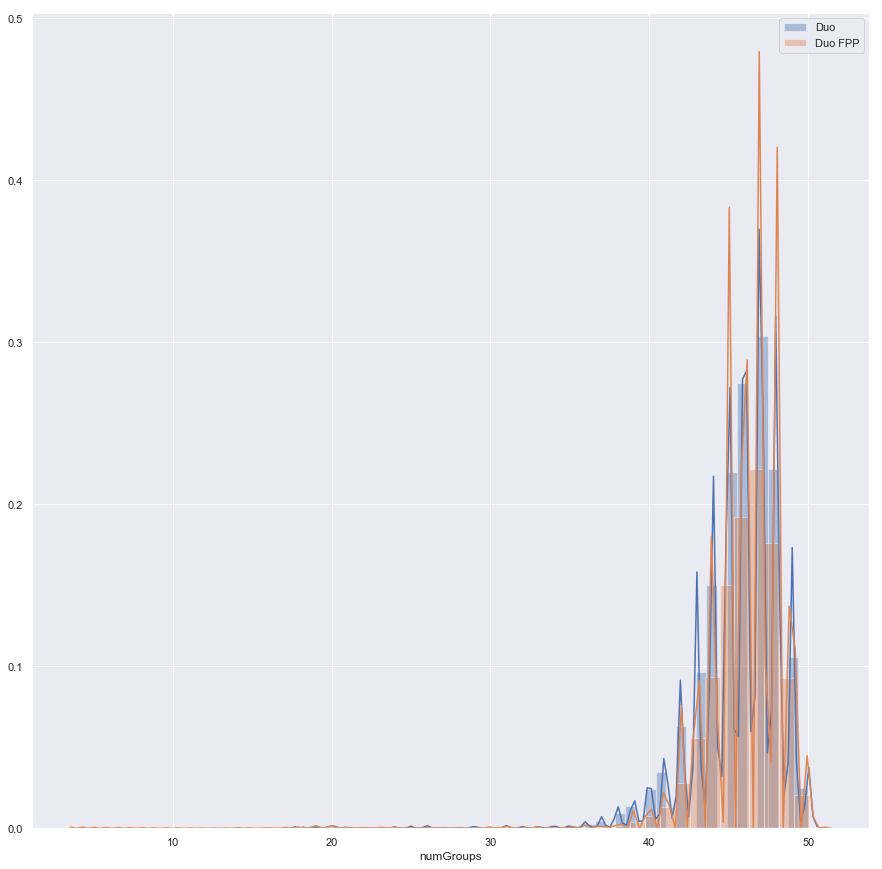

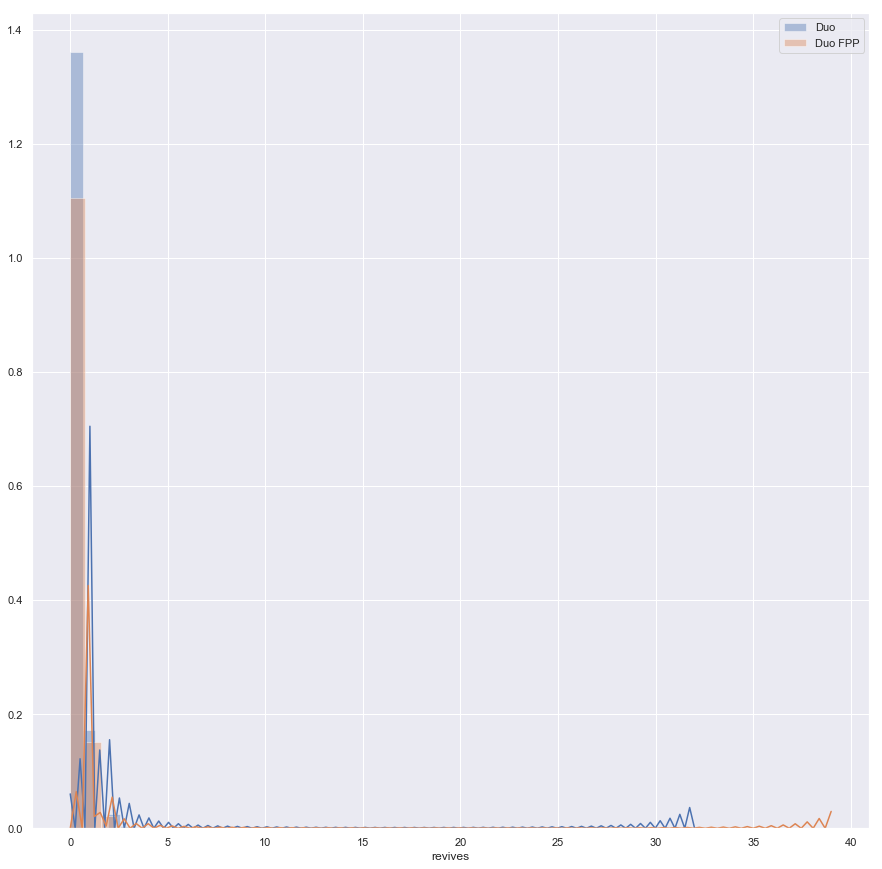

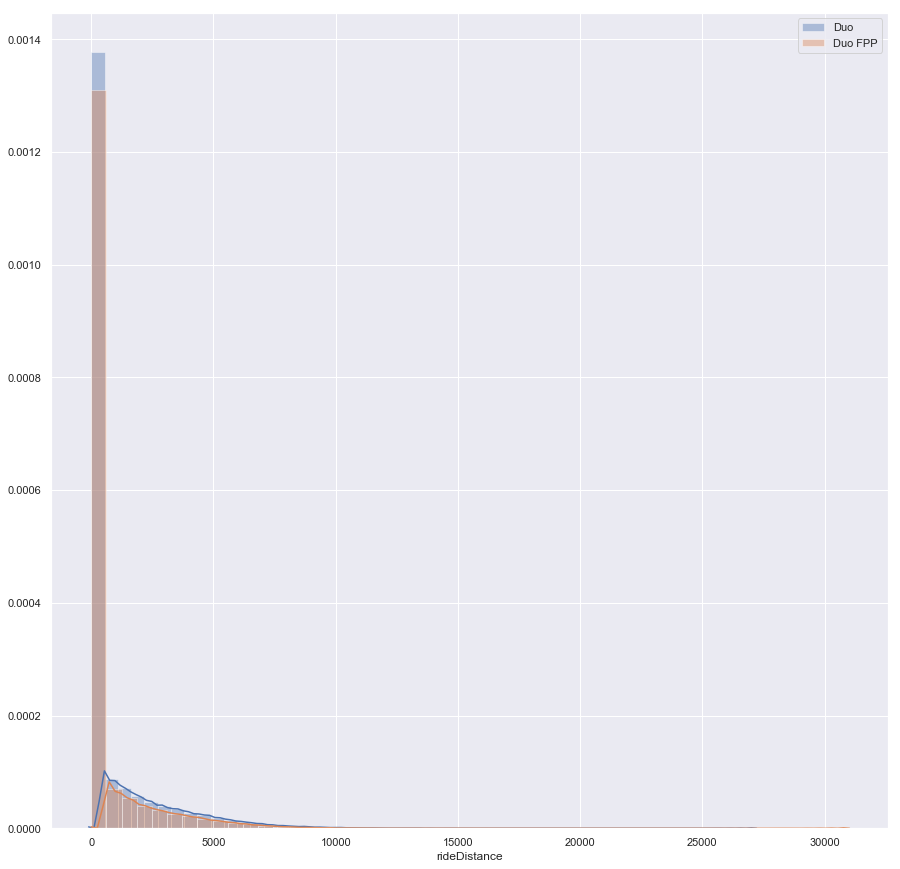

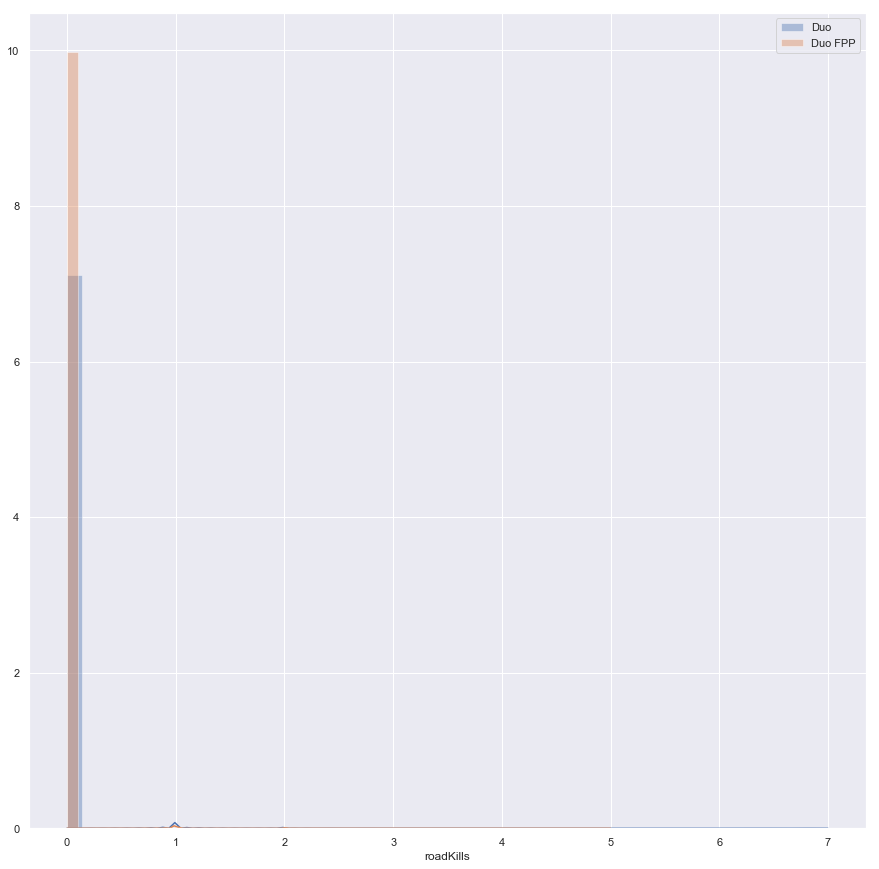

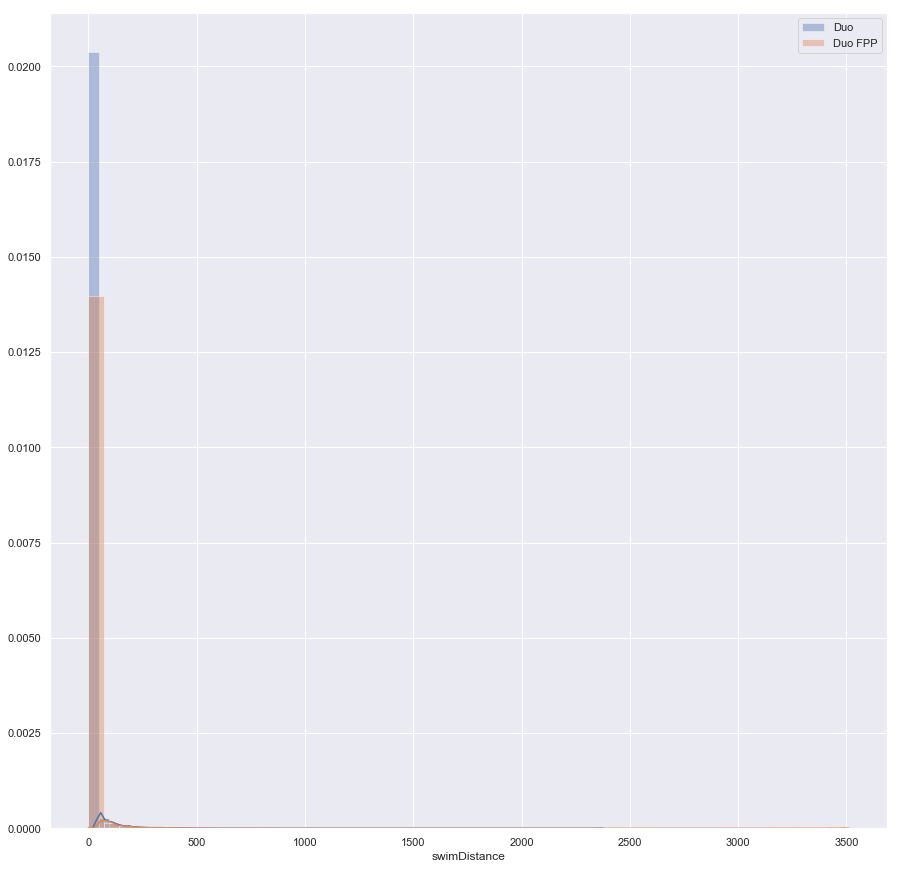

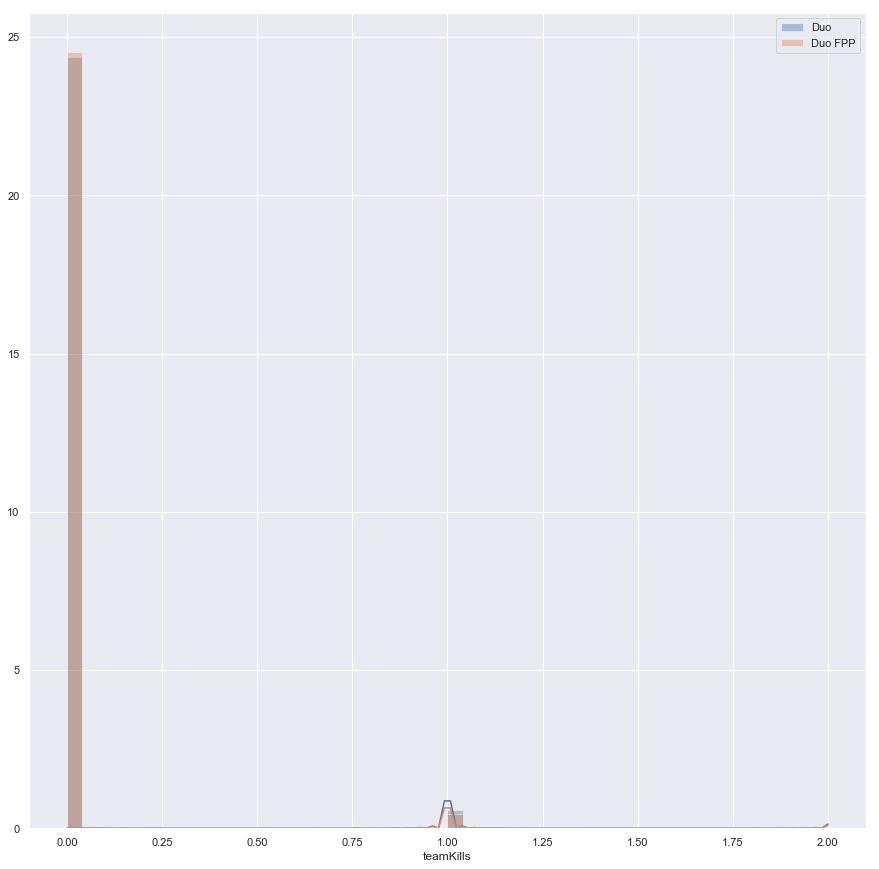

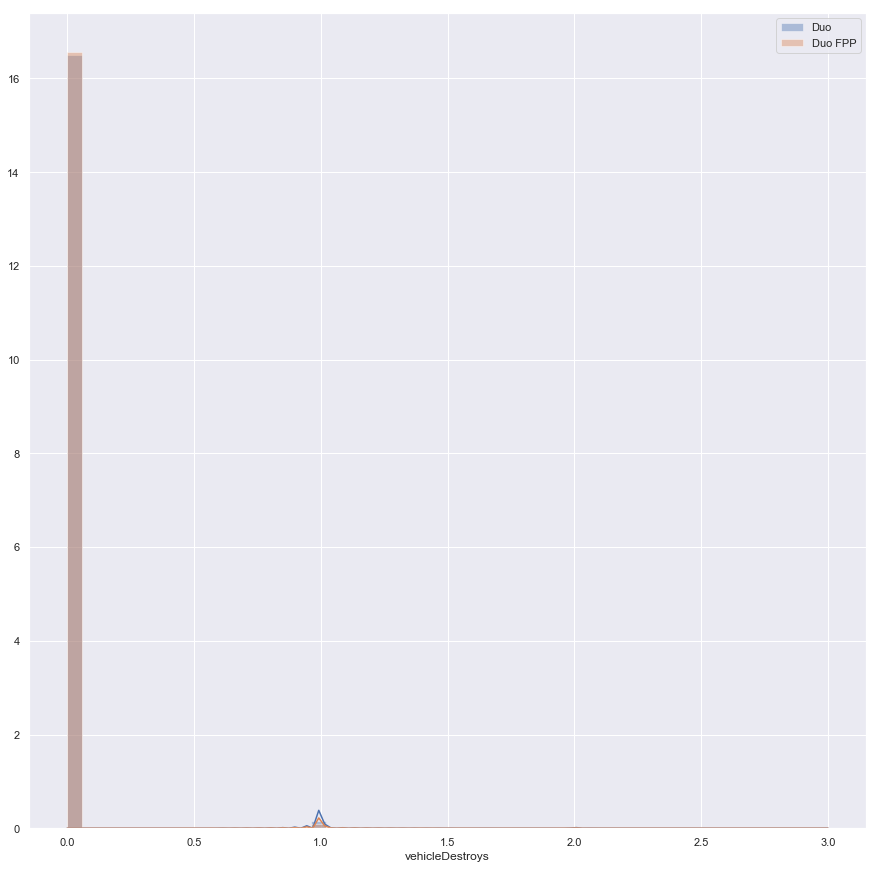

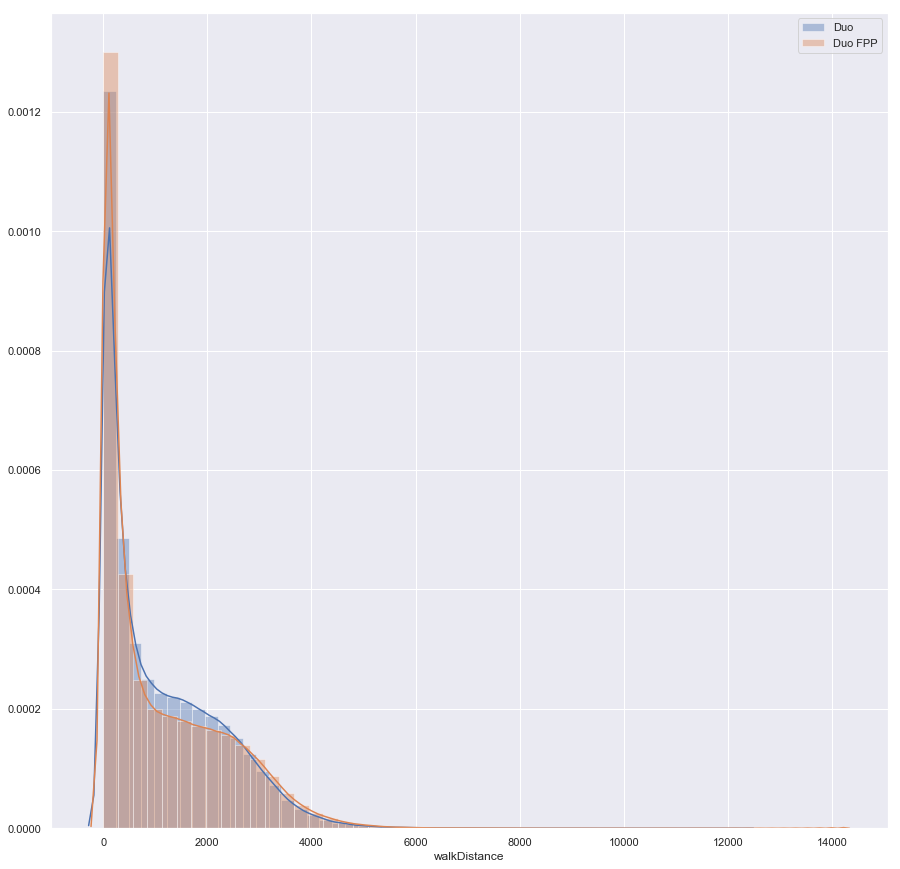

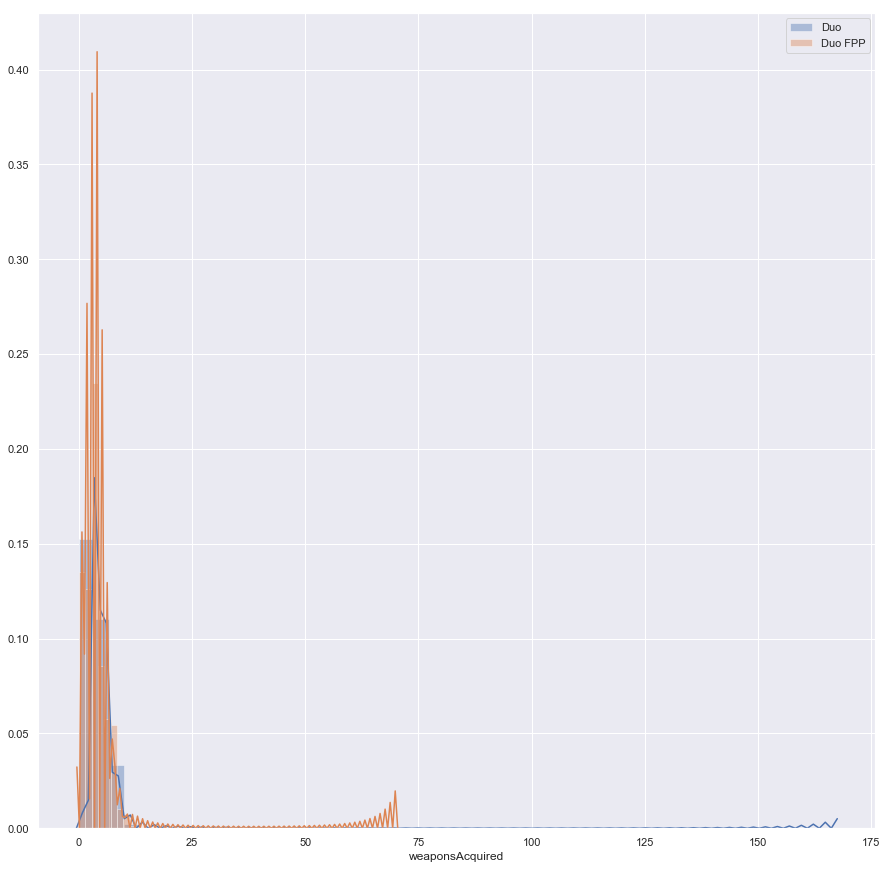

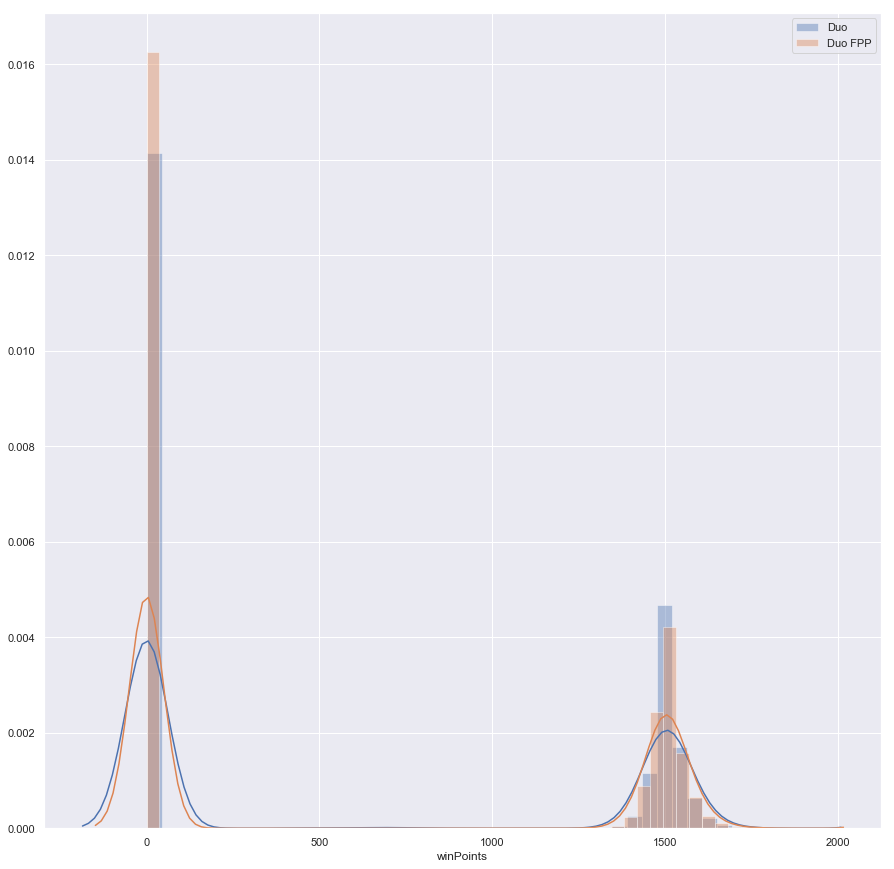

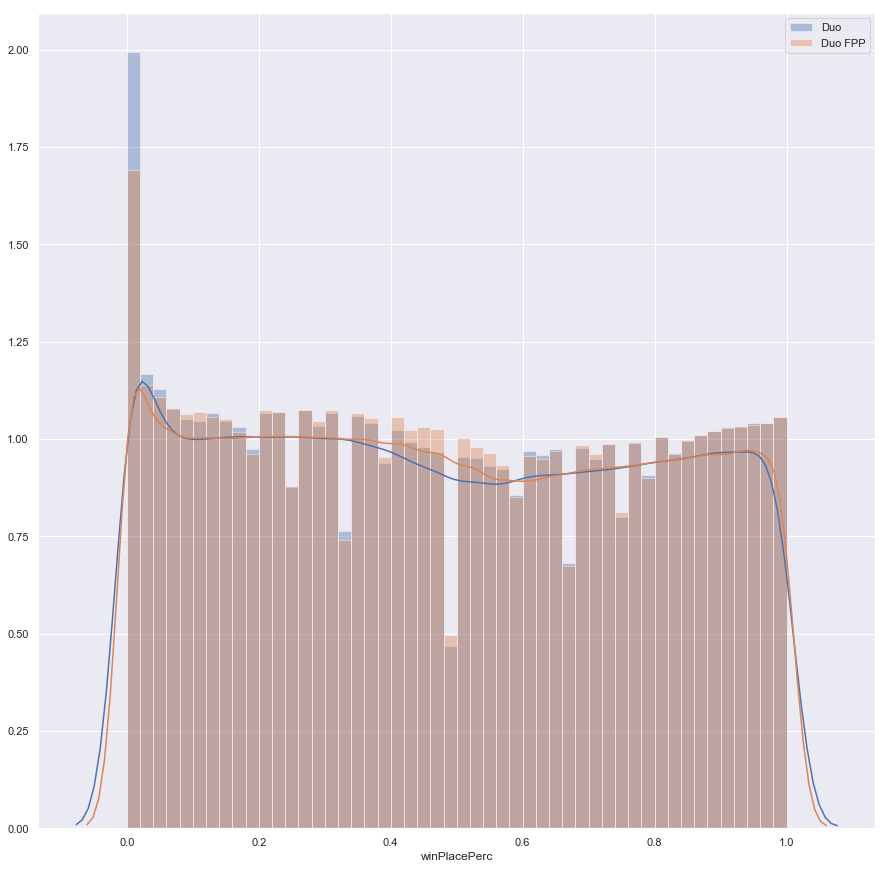

In [44]:
for feature in team_features:
    fig, ax = plt.subplots(figsize = (15, 15))
    sns.distplot(duo[feature], ax = ax, label = "Duo")
    sns.distplot(duofpp[feature], ax = ax, label = "Duo FPP")
    ax.legend()

## Squad Modes

In [45]:
squad = train_dict["squad"].reset_index(drop = True)
squadfpp = train_dict["squad-fpp"].reset_index(drop = True)

### Squad Solo

In [46]:
squad.describe().T

count         mean          std     min      25%  \
assists          626526.0     0.289891     0.652877     0.0     0.00   
boosts           626526.0     1.175439     1.746100     0.0     0.00   
damageDealt      626526.0   127.600206   170.720937     0.0     0.00   
DBNOs            626526.0     0.854052     1.321197     0.0     0.00   
headshotKills    626526.0     0.212073     0.604463     0.0     0.00   
heals            626526.0     1.508456     2.842145     0.0     0.00   
killPlace        626526.0    47.690383    27.360136     1.0    24.00   
killPoints       626526.0   496.643399   615.358404     0.0     0.00   
kills            626526.0     0.891428     1.515365     0.0     0.00   
killStreaks      626526.0     0.533049     0.723612     0.0     0.00   
longestKill      626526.0    24.016986    56.618811     0.0     0.00   
matchDuration    626526.0  1606.345943   255.421477  1048.0  1377.00   
maxPlace         626526.0    27.637203     1.641675     7.0    27.00   
numGroups        626526.0    26.663390     1.888374     6.0    26.00   
revives          626526.0     0.207267     0.532712     0.0     0.00   
rideDistance     626526.0   789.878297  1699.010678     0.0     0.00   
roadKills        626526.0     0.004460     0.081441     0.0     0.00   
swimDistance     626526.0     5.049295    32.786623     0.0     0.00   
teamKills        626526.0     0.033994     0.202431     0.0     0.00   
vehicleDestroys  626526.0     0.012640     0.117384     0.0     0.00   
walkDistance     626526.0  1252.594782  1171.743101     0.0   209.50   
weaponsAcquired  626526.0     3.790926     2.380973     0.0     2.00   
winPoints        626526.0   605.401278   737.801413     0.0     0.00   
winPlacePerc     626526.0     0.451908     0.315810     0.0     0.16   

                       50%        75%      max  
assists             0.0000     0.0000     10.0  
boosts              0.0000     2.0000     20.0  
damageDealt        79.3550   180.8000   3796.0  
DBNOs               0.0000     1.0000     32.0  
headshotKills       0.0000     0.0000     26.0  
heals               0.0000     2.0000     80.0  
killPlace          48.0000    71.0000    100.0  
killPoints          0.0000  1152.0000   2075.0  
kills               0.0000     1.0000     33.0  
killStreaks         0.0000     1.0000     10.0  
longestKill         0.0000    19.7300   1000.0  
matchDuration    1462.0000  1870.0000   2218.0  
maxPlace           28.0000    29.0000     34.0  
numGroups          27.0000    28.0000     33.0  
revives             0.0000     0.0000     18.0  
rideDistance        0.0000   609.2750  24510.0  
roadKills           0.0000     0.0000      8.0  
swimDistance        0.0000     0.0000   2718.0  
teamKills           0.0000     0.0000      4.0  
vehicleDestroys     0.0000     0.0000      5.0  
walkDistance      906.7000  2120.0000  13500.0  
weaponsAcquired     4.0000     5.0000     96.0  
winPoints           0.0000  1492.0000   2013.0  
winPlacePerc        0.4231     0.7308      1.0

In [47]:
squad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626526 entries, 0 to 626525
Data columns (total 28 columns):
Id                 626526 non-null object
groupId            626526 non-null object
matchId            626526 non-null object
assists            626526 non-null int64
boosts             626526 non-null int64
damageDealt        626526 non-null float64
DBNOs              626526 non-null int64
headshotKills      626526 non-null int64
heals              626526 non-null int64
killPlace          626526 non-null int64
killPoints         626526 non-null int64
kills              626526 non-null int64
killStreaks        626526 non-null int64
longestKill        626526 non-null float64
matchDuration      626526 non-null int64
matchType          626526 non-null object
maxPlace           626526 non-null int64
numGroups          626526 non-null int64
revives            626526 non-null int64
rideDistance       626526 non-null float64
roadKills          626526 non-null int64
swimDistance      

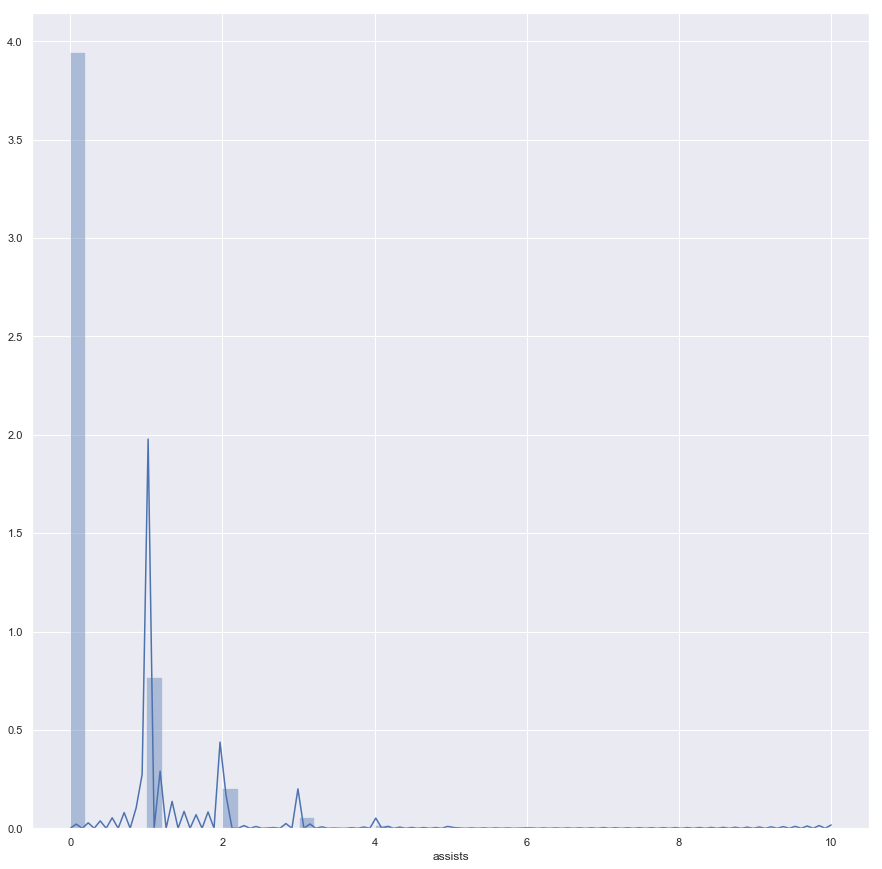

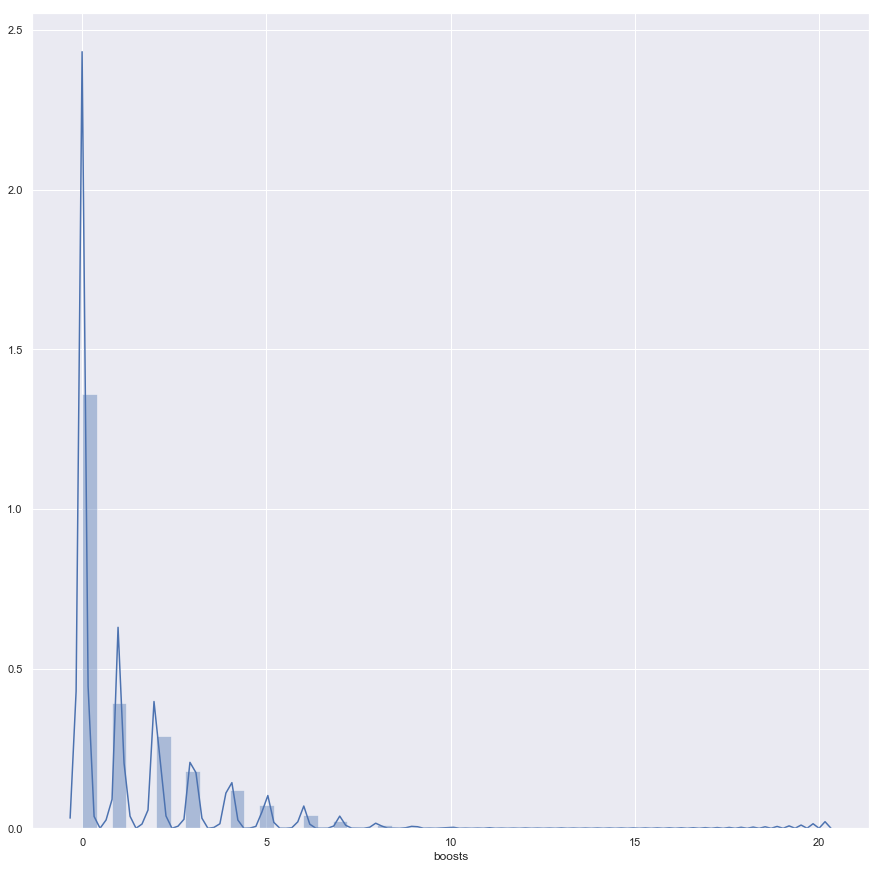

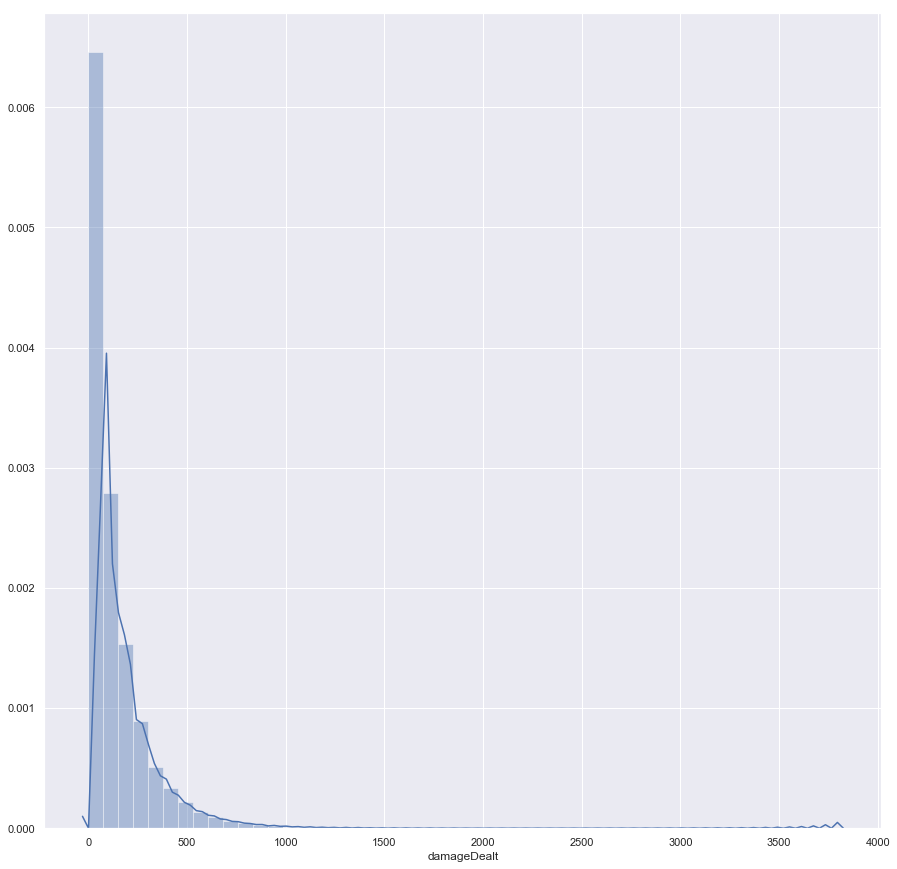

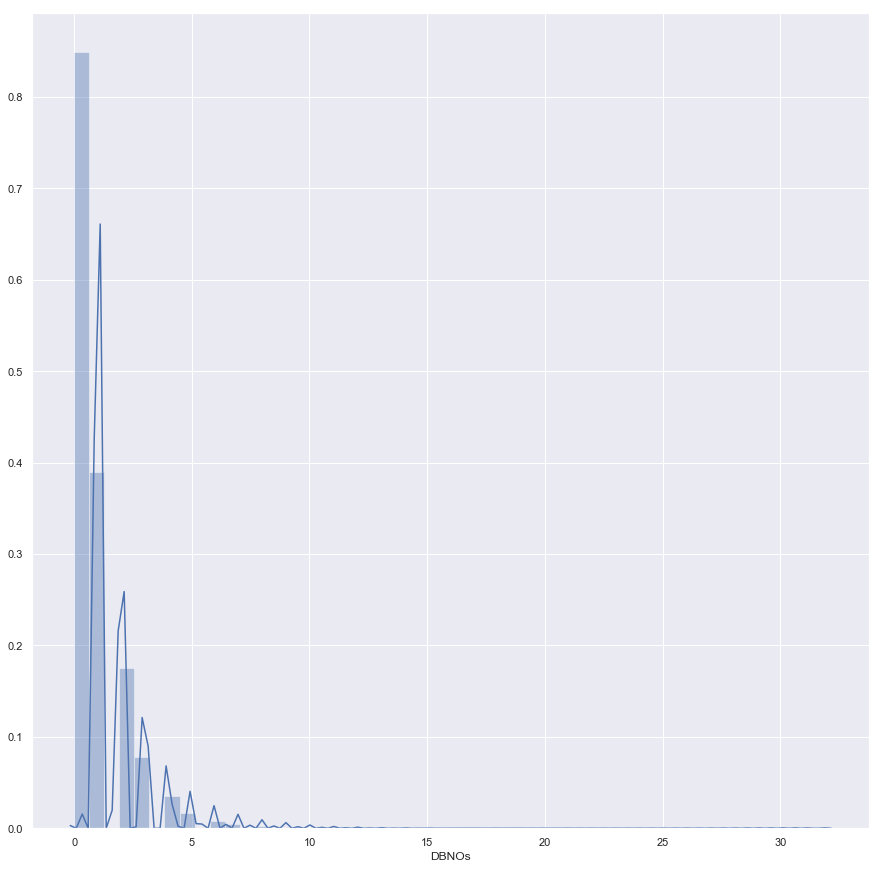

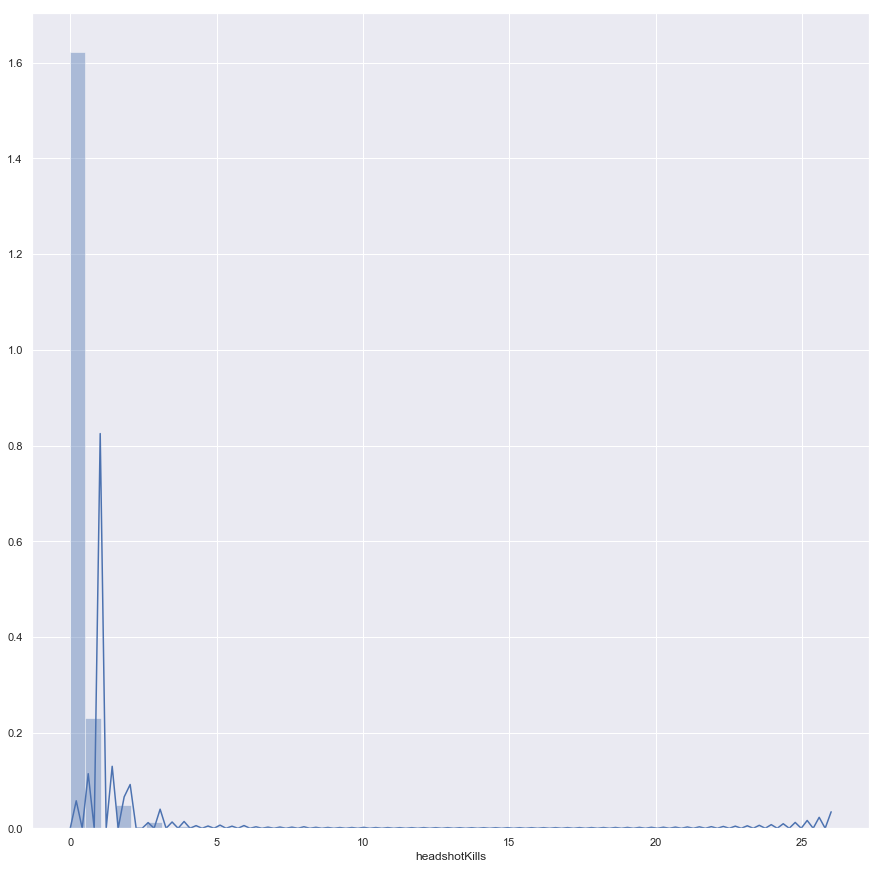

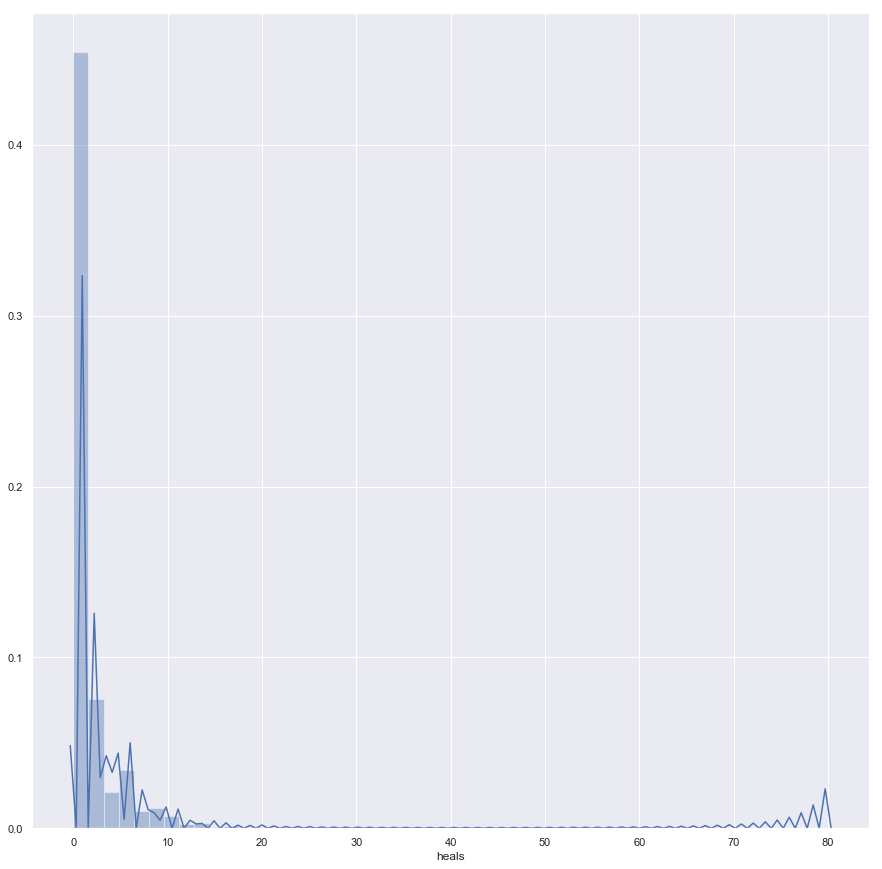

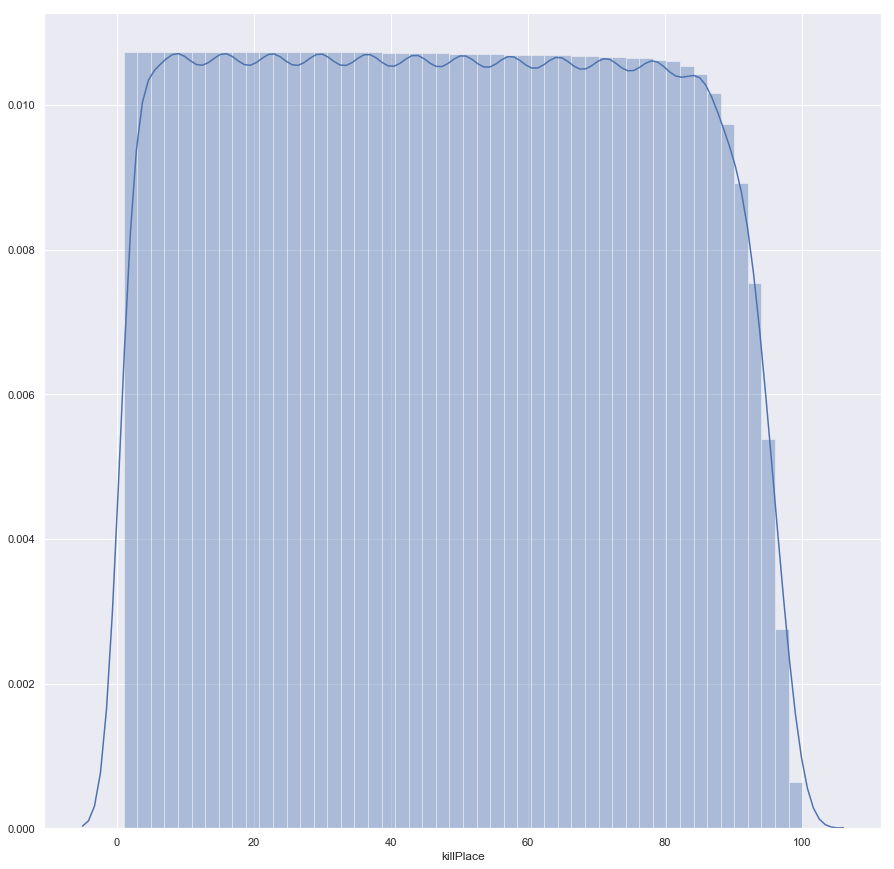

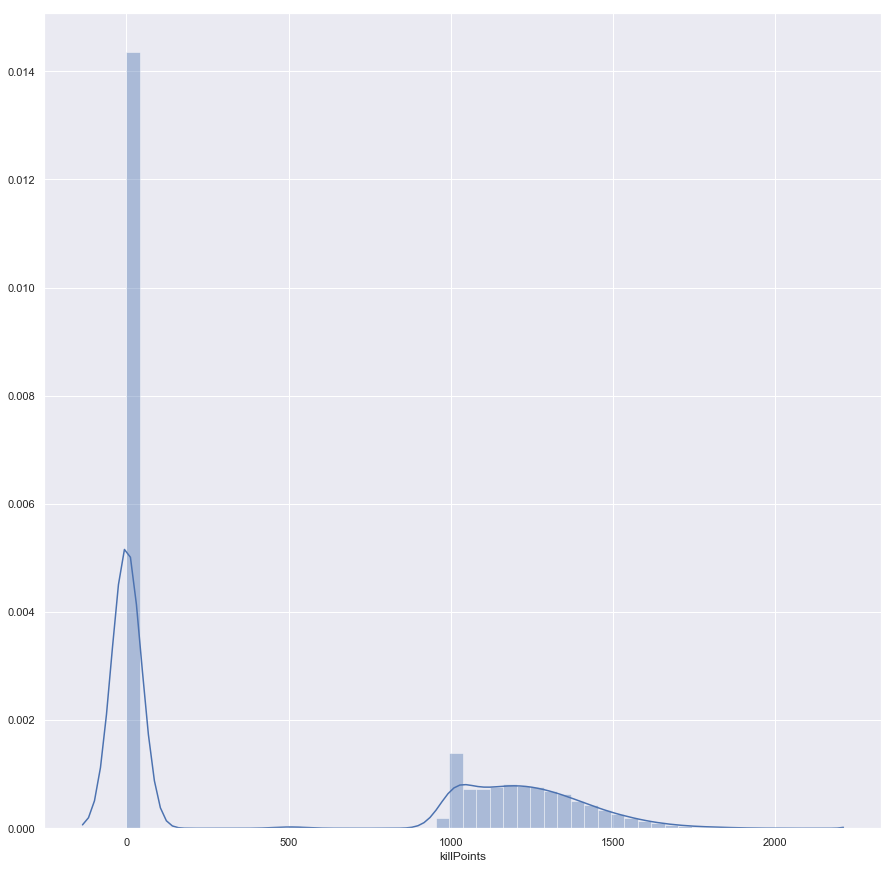

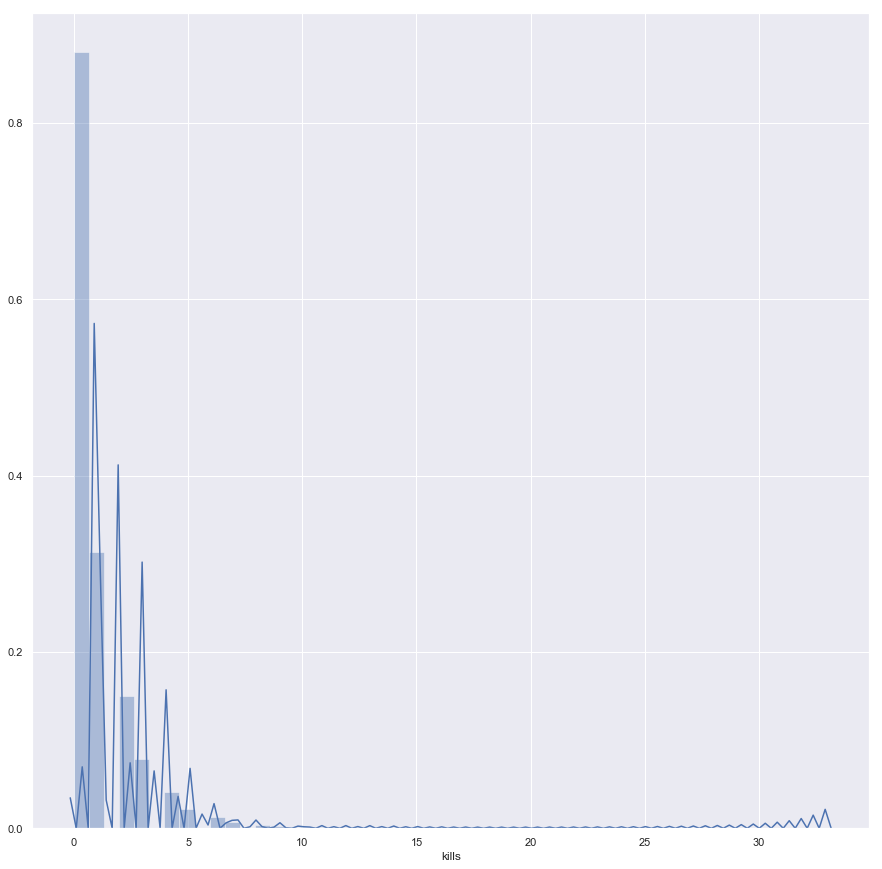

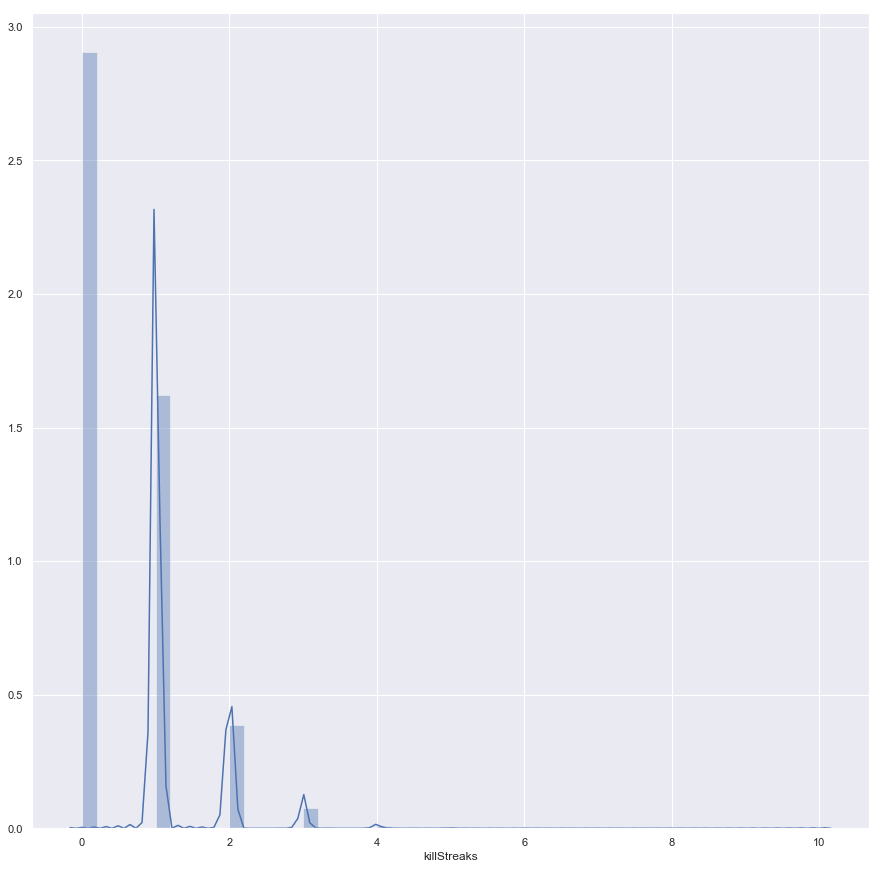

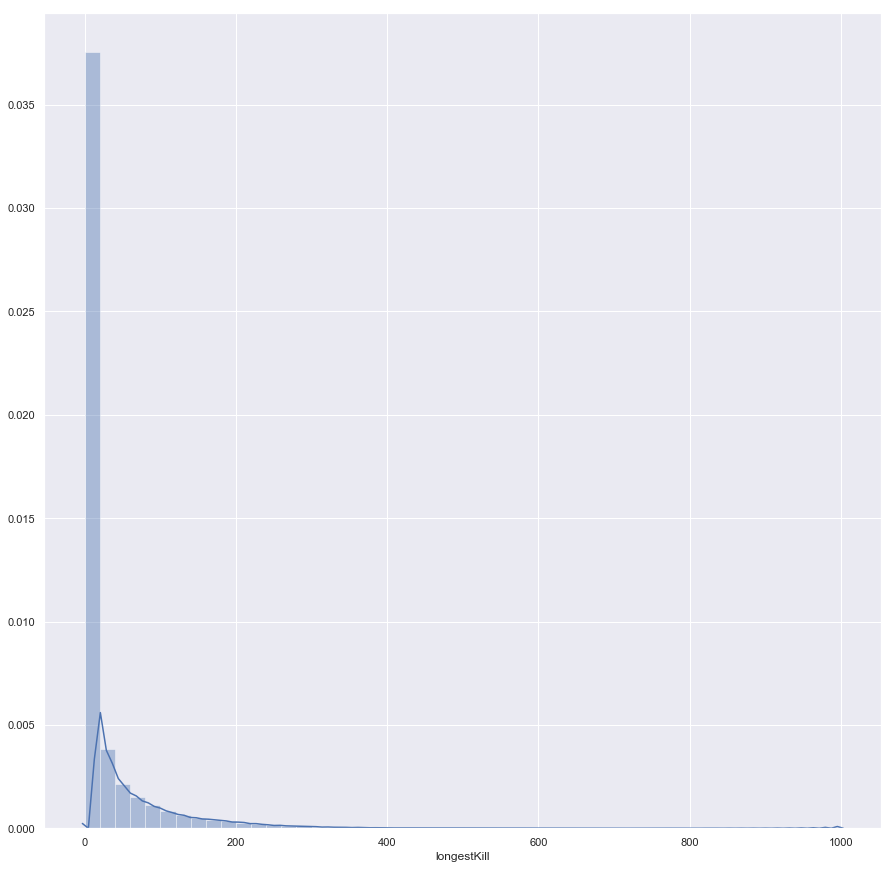

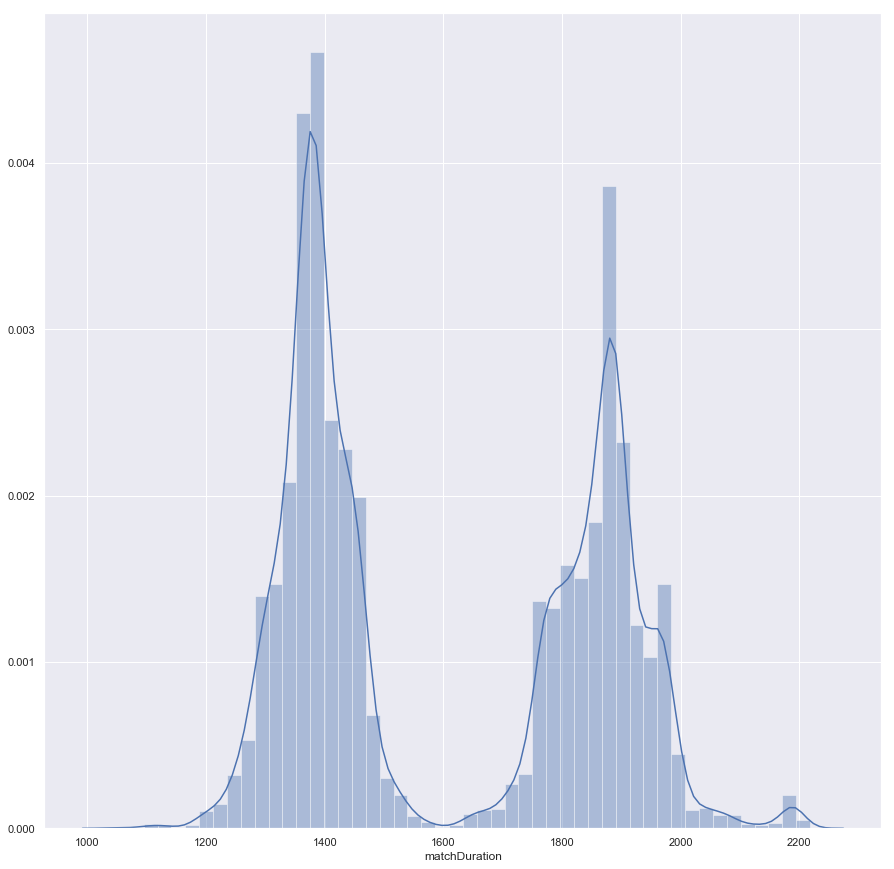

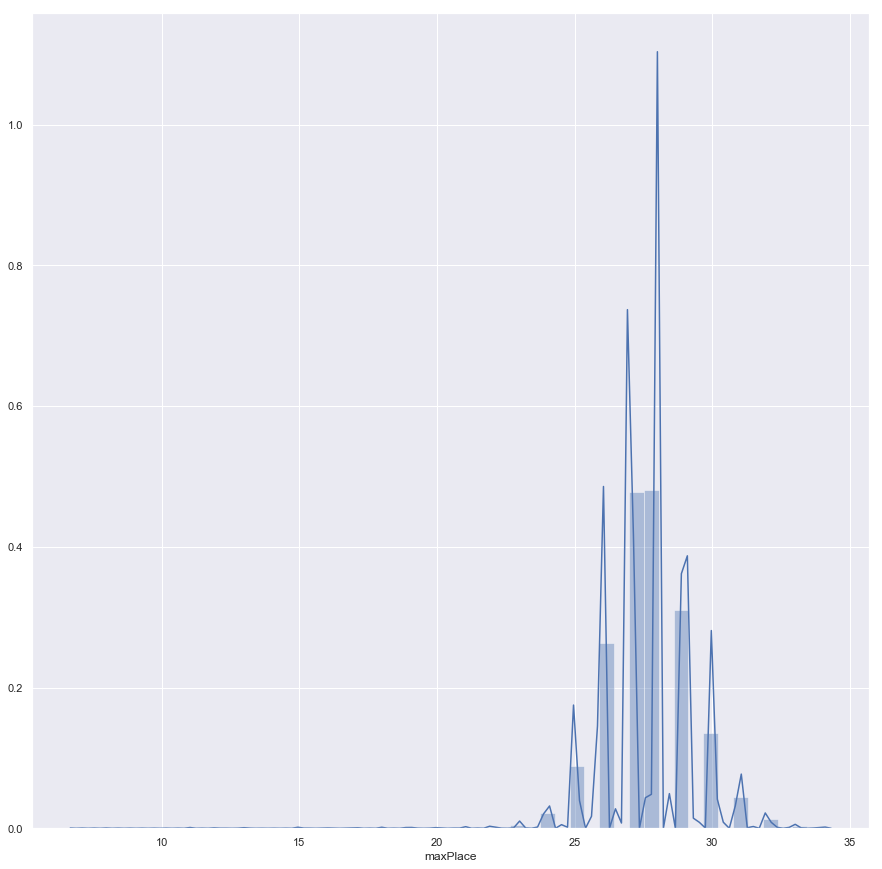

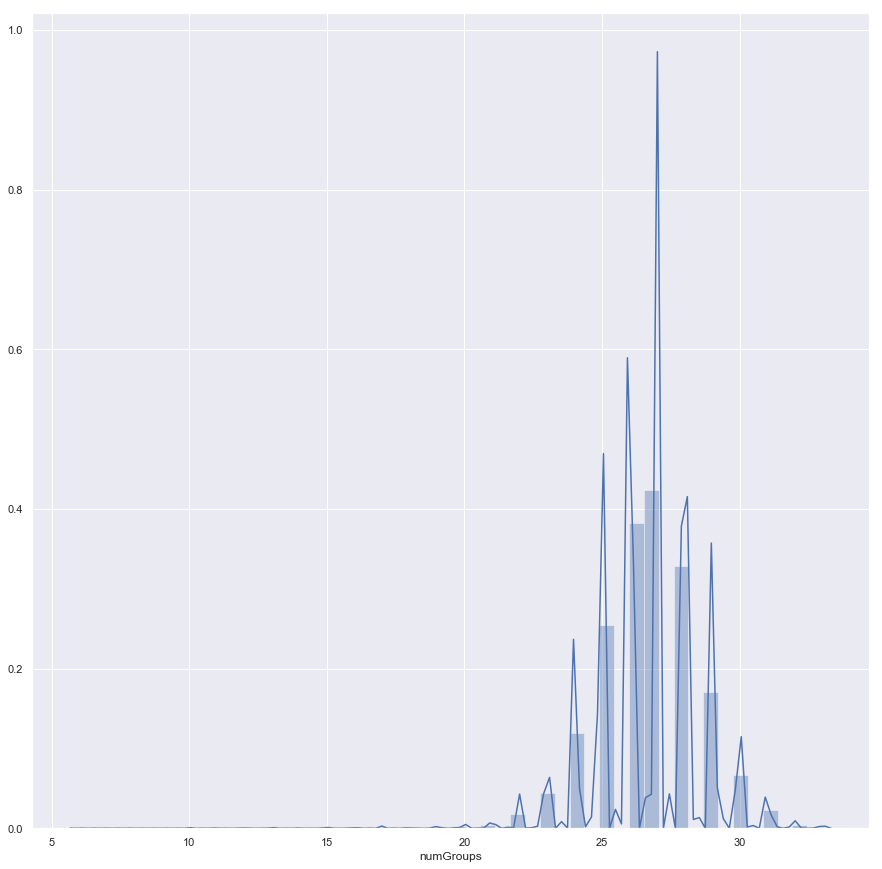

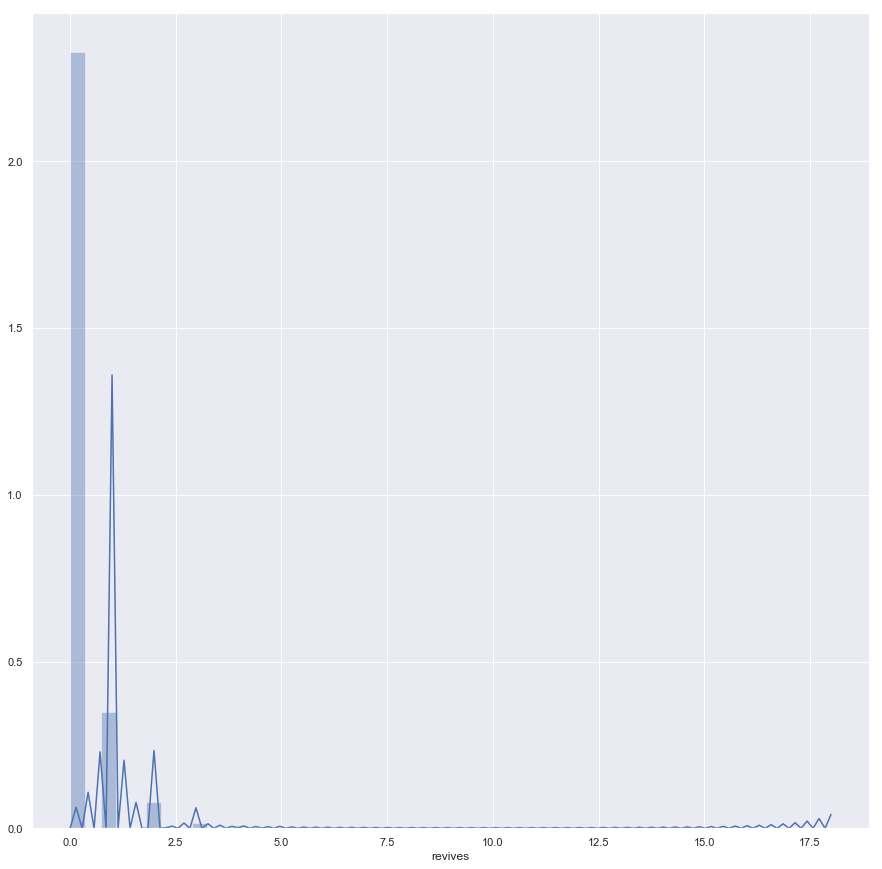

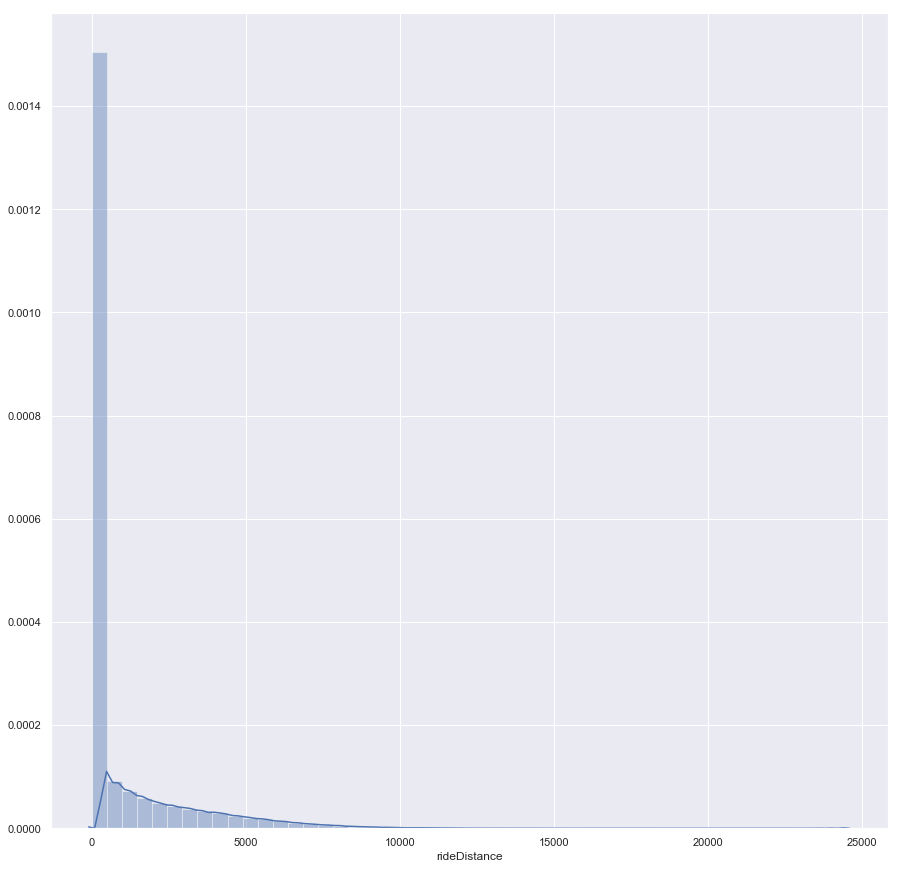

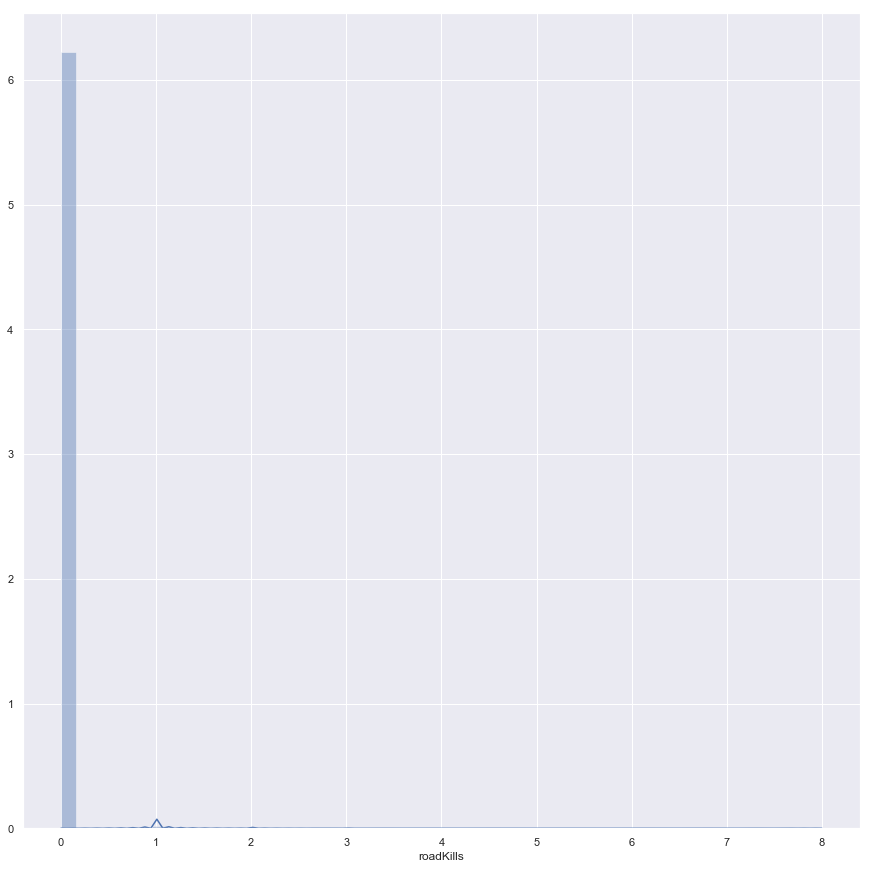

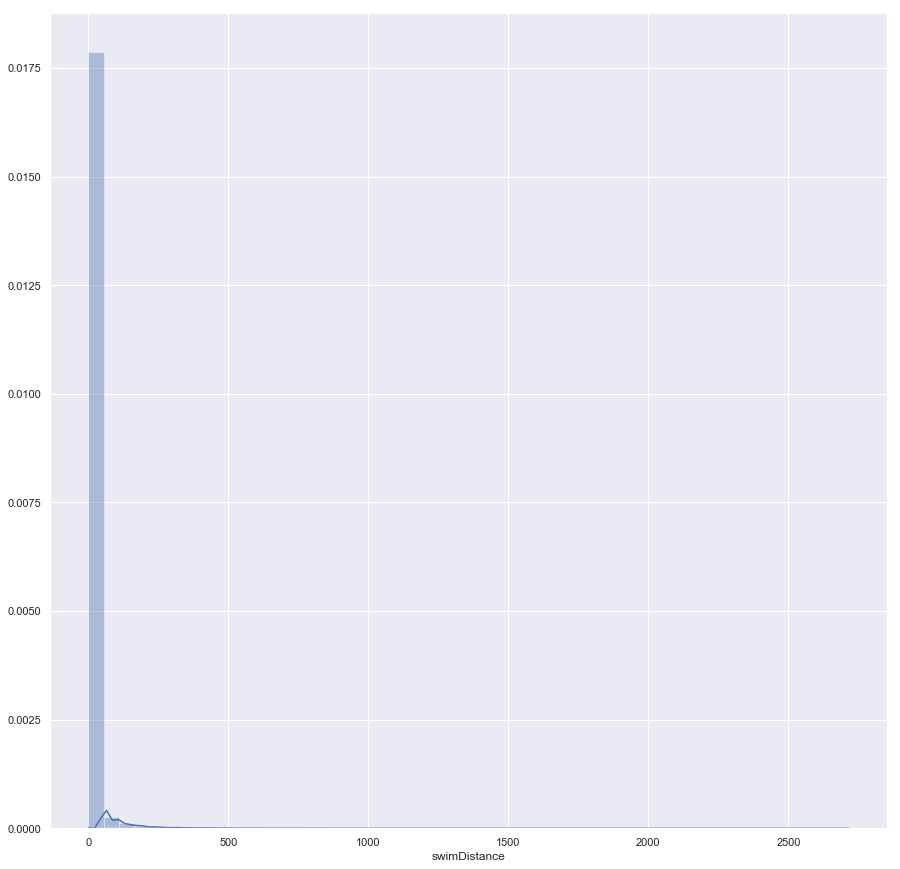

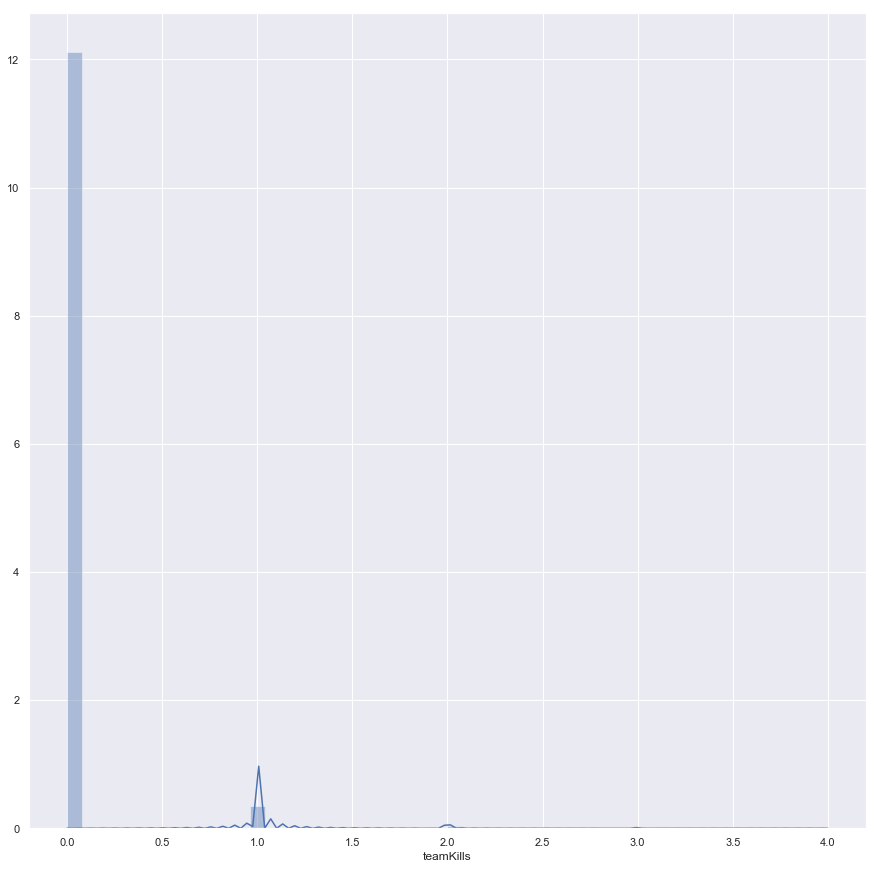

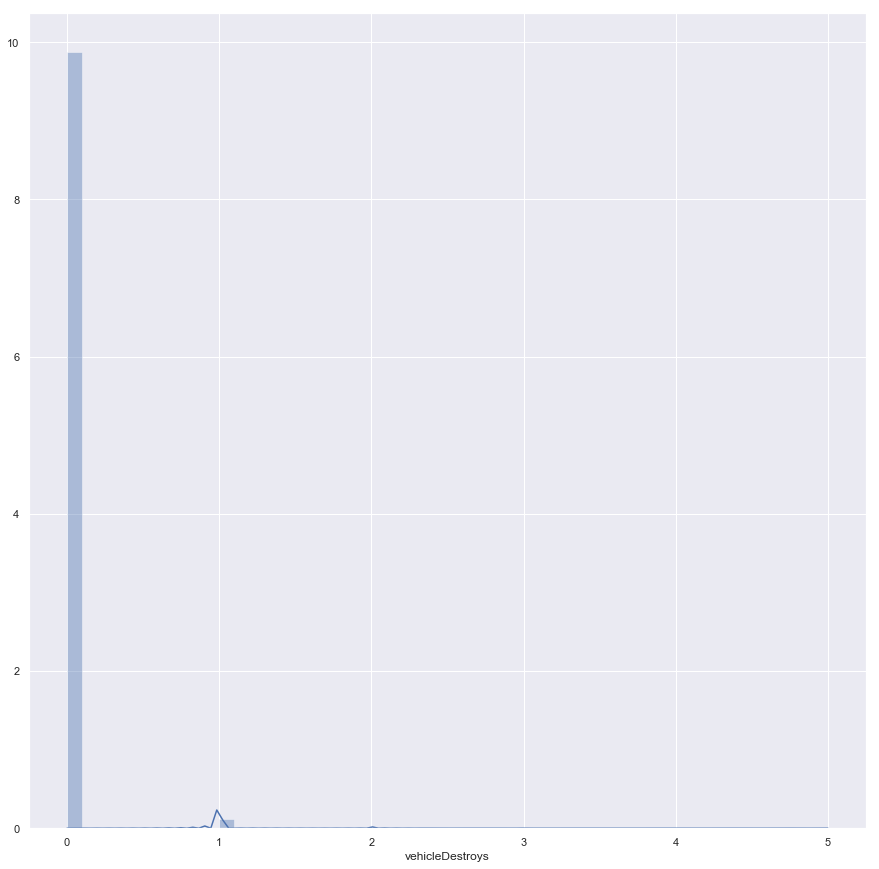

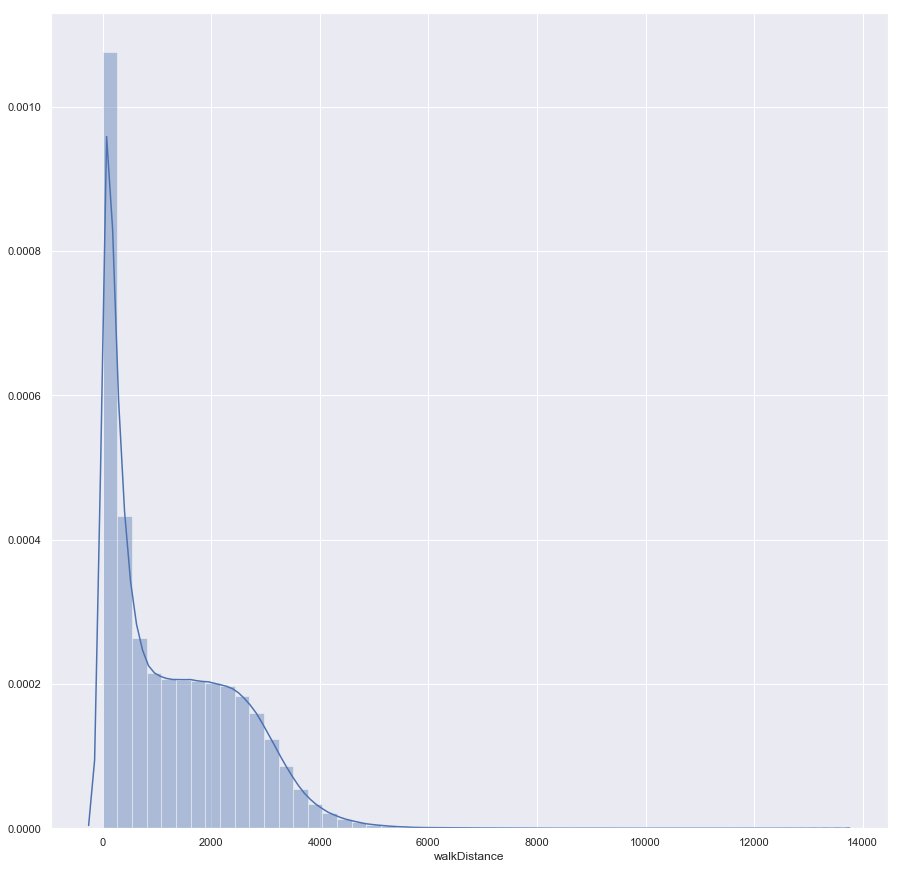

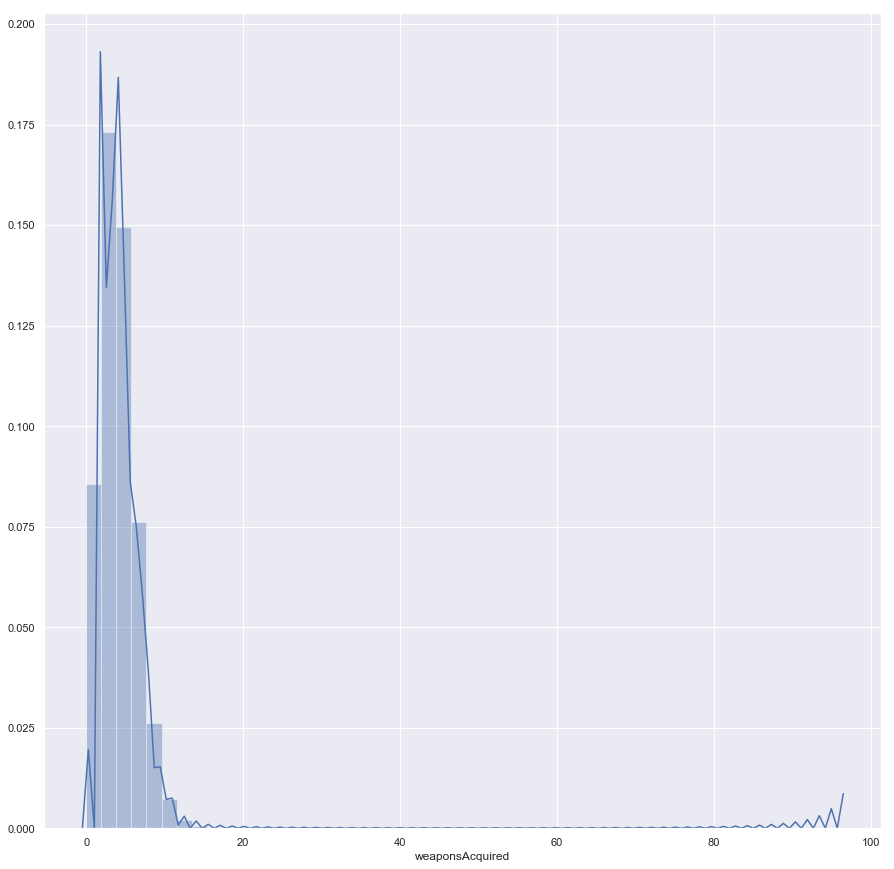

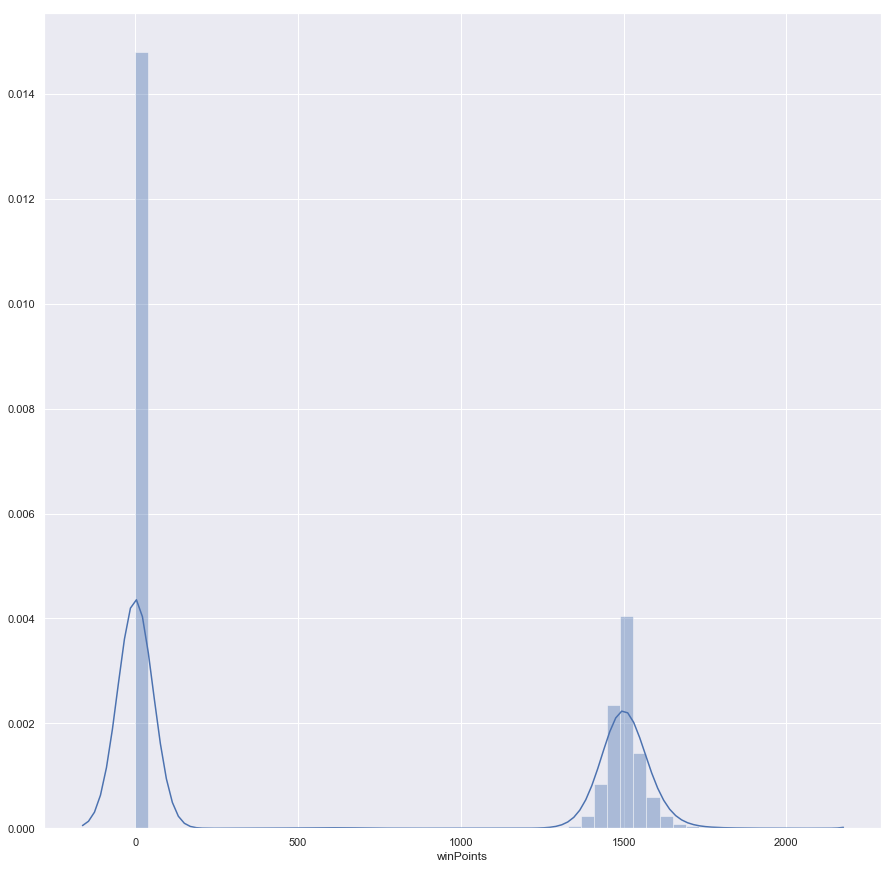

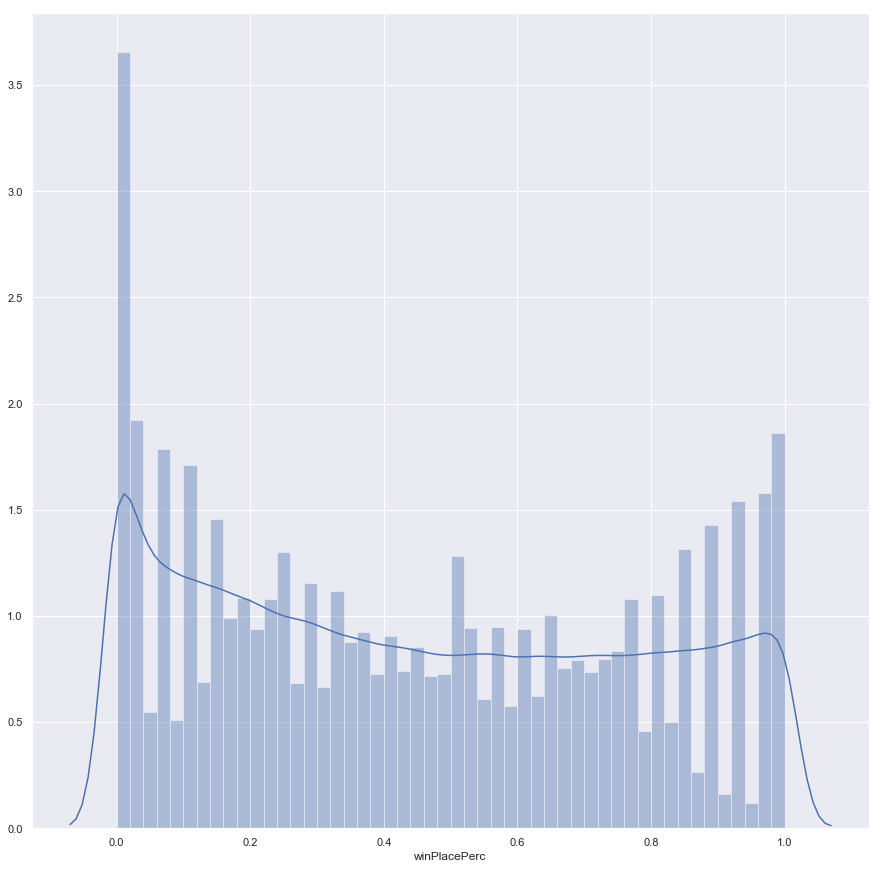

In [48]:
for feature in team_features:
    plt.figure(figsize = (15, 15))
    sns.distplot(squad[feature])

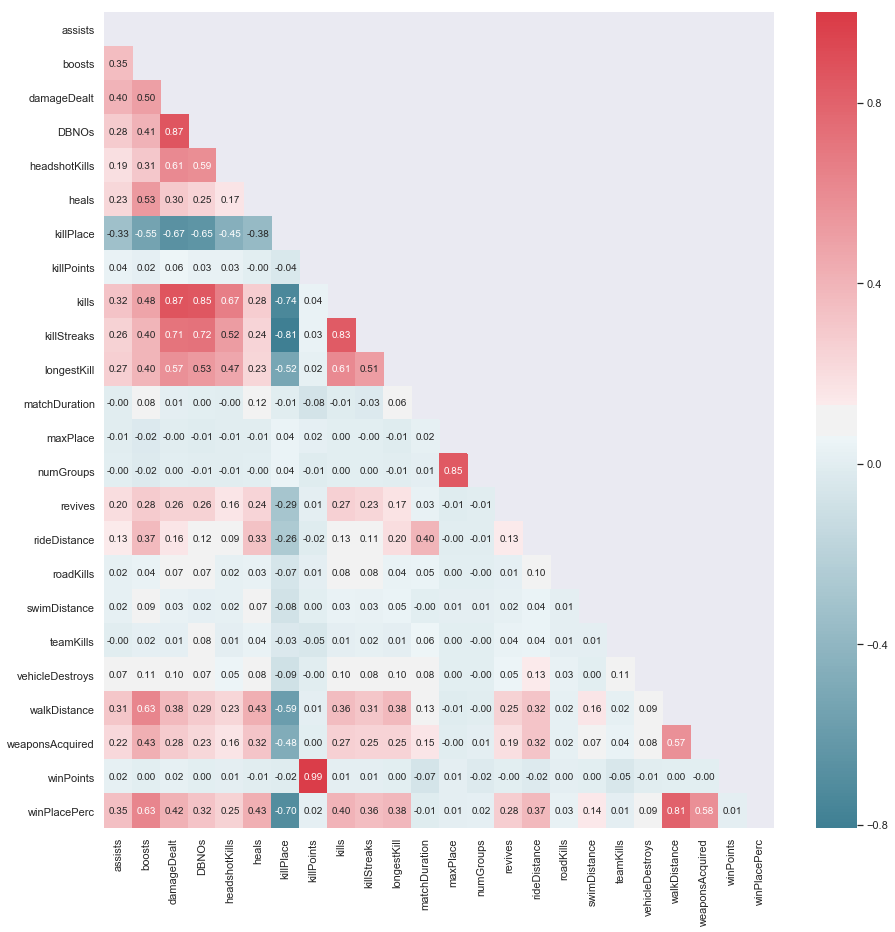

In [49]:
halfHeatMap(squad[team_features], mirror = False, corrtype = "pearson")

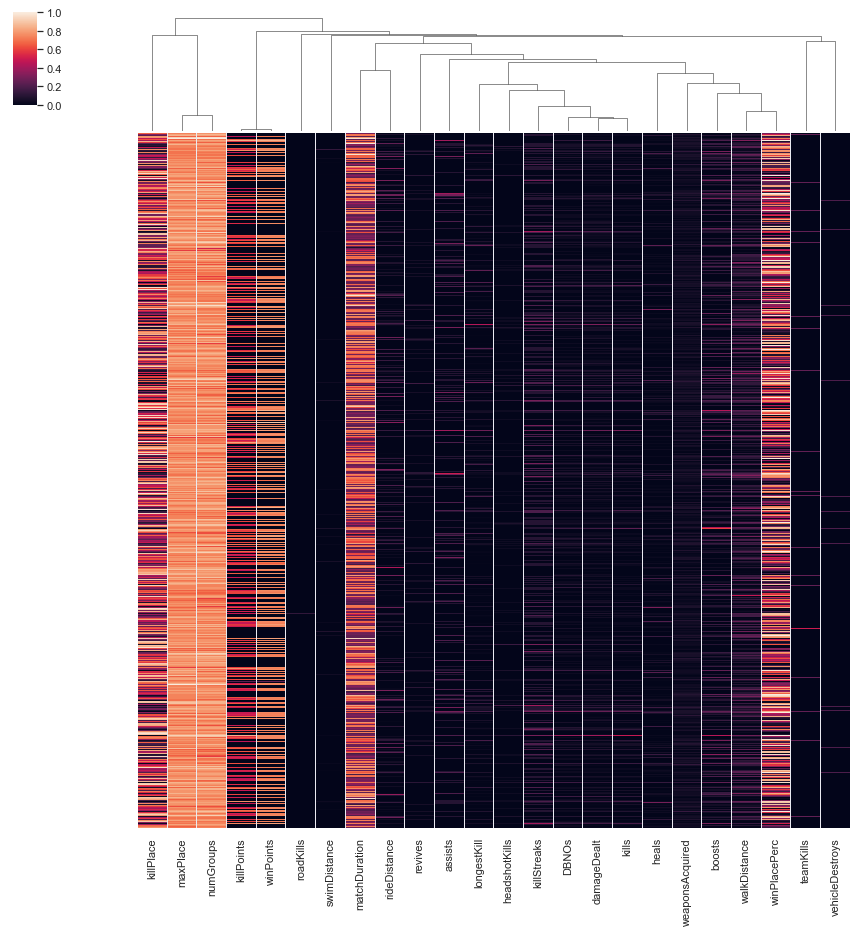

In [50]:
clustermap = sns.clustermap(squad[team_features], figsize = (15, 15), 
                            metric = "correlation", row_cluster = False, 
                            standard_scale = 1, yticklabels = [])

### Squad FPP Mode

In [51]:
squadfpp.describe().T

count         mean          std    min        25%  \
assists          1756186.0     0.287245     0.639925    0.0     0.0000   
boosts           1756186.0     1.107993     1.666273    0.0     0.0000   
damageDealt      1756186.0   133.587592   165.785758    0.0     0.0000   
DBNOs            1756186.0     0.872816     1.278017    0.0     0.0000   
headshotKills    1756186.0     0.220646     0.564464    0.0     0.0000   
heals            1756186.0     1.476785     2.749316    0.0     0.0000   
killPlace        1756186.0    47.921326    27.495355    1.0    24.0000   
killPoints       1756186.0   556.643272   659.414096    0.0     0.0000   
kills            1756186.0     0.908386     1.487611    0.0     0.0000   
killStreaks      1756186.0     0.558404     0.740497    0.0     0.0000   
longestKill      1756186.0    23.359121    51.430072    0.0     0.0000   
matchDuration    1756186.0  1552.149803   251.428784  728.0  1350.0000   
maxPlace         1756186.0    28.264408     1.730460    2.0    27.0000   
numGroups        1756186.0    27.324241     1.943885    2.0    26.0000   
revives          1756186.0     0.219751     0.539532    0.0     0.0000   
rideDistance     1756186.0   581.604672  1455.373687    0.0     0.0000   
roadKills        1756186.0     0.001967     0.050112    0.0     0.0000   
swimDistance     1756186.0     4.219204    28.182227    0.0     0.0000   
teamKills        1756186.0     0.026919     0.181993    0.0     0.0000   
vehicleDestroys  1756186.0     0.007765     0.091263    0.0     0.0000   
walkDistance     1756186.0  1232.484909  1242.179267    0.0   167.2000   
weaponsAcquired  1756186.0     3.626464     2.283690    0.0     2.0000   
winPoints        1756186.0   641.737957   746.177138    0.0     0.0000   
winPlacePerc     1756186.0     0.464764     0.311590    0.0     0.1852   

                       50%        75%      max  
assists             0.0000     0.0000     12.0  
boosts              0.0000     2.0000     33.0  
damageDealt        89.0800   191.3000   3387.0  
DBNOs               0.0000     1.0000     26.0  
headshotKills       0.0000     0.0000     21.0  
heals               0.0000     2.0000     73.0  
killPlace          48.0000    72.0000    100.0  
killPoints          0.0000  1257.0000   2170.0  
kills               0.0000     1.0000     26.0  
killStreaks         0.0000     1.0000      8.0  
longestKill         0.0000    21.4800    985.8  
matchDuration    1402.0000  1821.0000   2226.0  
maxPlace           28.0000    29.0000     37.0  
numGroups          27.0000    29.0000     37.0  
revives             0.0000     0.0000     23.0  
rideDistance        0.0000     0.0036  29000.0  
roadKills           0.0000     0.0000      7.0  
swimDistance        0.0000     0.0000   2484.0  
teamKills           0.0000     0.0000      4.0  
vehicleDestroys     0.0000     0.0000      4.0  
walkDistance      733.9000  2158.0000  16250.0  
weaponsAcquired     3.0000     5.0000    236.0  
winPoints           0.0000  1496.0000   1999.0  
winPlacePerc        0.4444     0.7407      1.0

In [52]:
squadfpp.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756186 entries, 0 to 1756185
Data columns (total 28 columns):
Id                 1756186 non-null object
groupId            1756186 non-null object
matchId            1756186 non-null object
assists            1756186 non-null int64
boosts             1756186 non-null int64
damageDealt        1756186 non-null float64
DBNOs              1756186 non-null int64
headshotKills      1756186 non-null int64
heals              1756186 non-null int64
killPlace          1756186 non-null int64
killPoints         1756186 non-null int64
kills              1756186 non-null int64
killStreaks        1756186 non-null int64
longestKill        1756186 non-null float64
matchDuration      1756186 non-null int64
matchType          1756186 non-null object
maxPlace           1756186 non-null int64
numGroups          1756186 non-null int64
revives            1756186 non-null int64
rideDistance       1756186 non-null float64
roadKills          1756186 non-null i

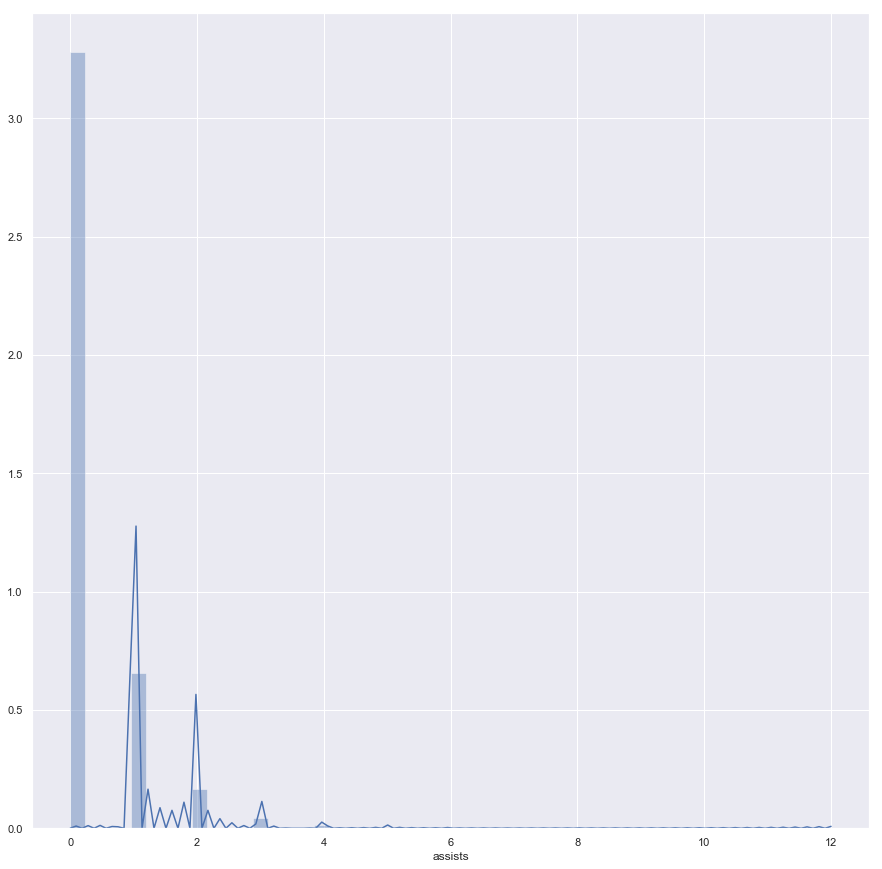

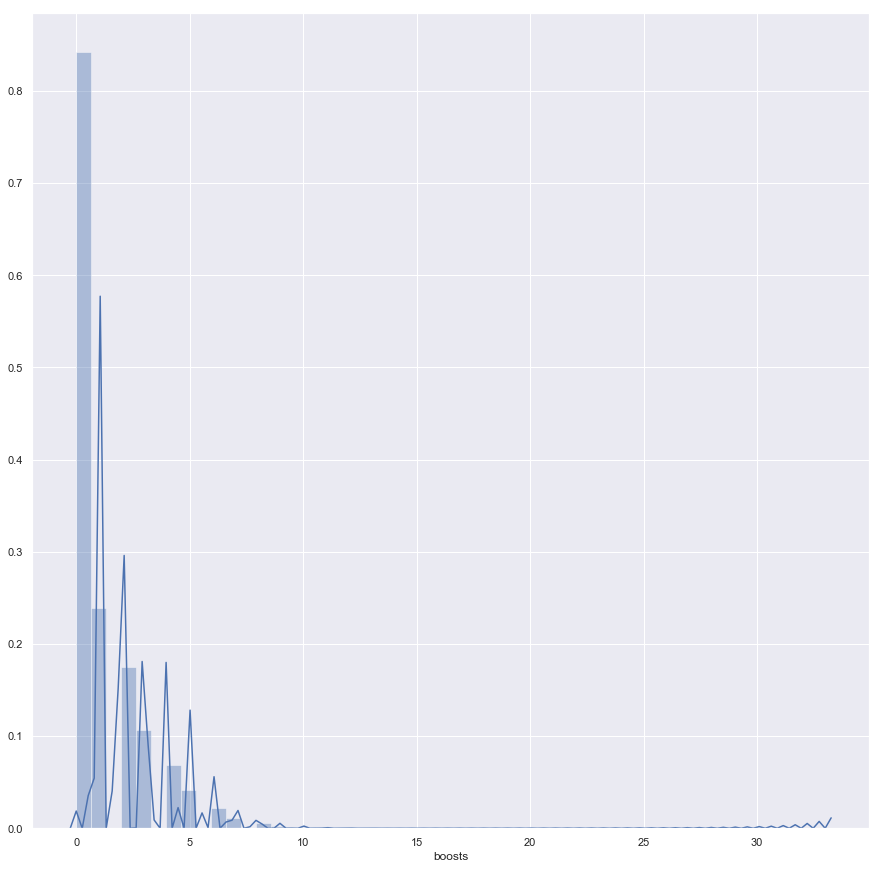

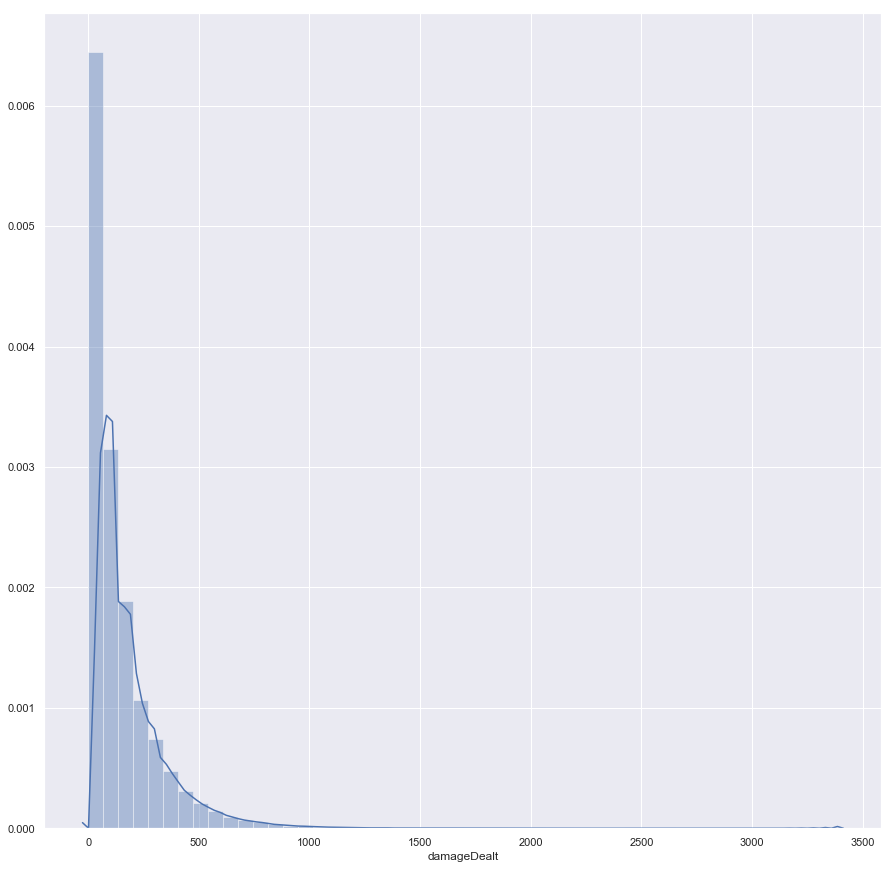

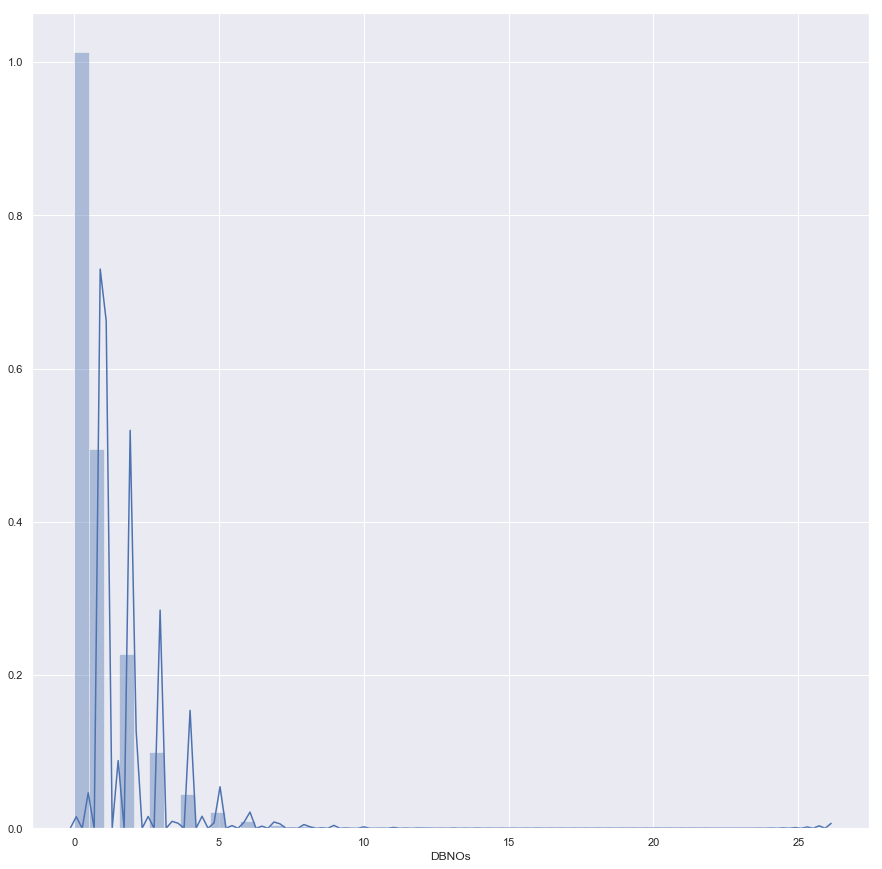

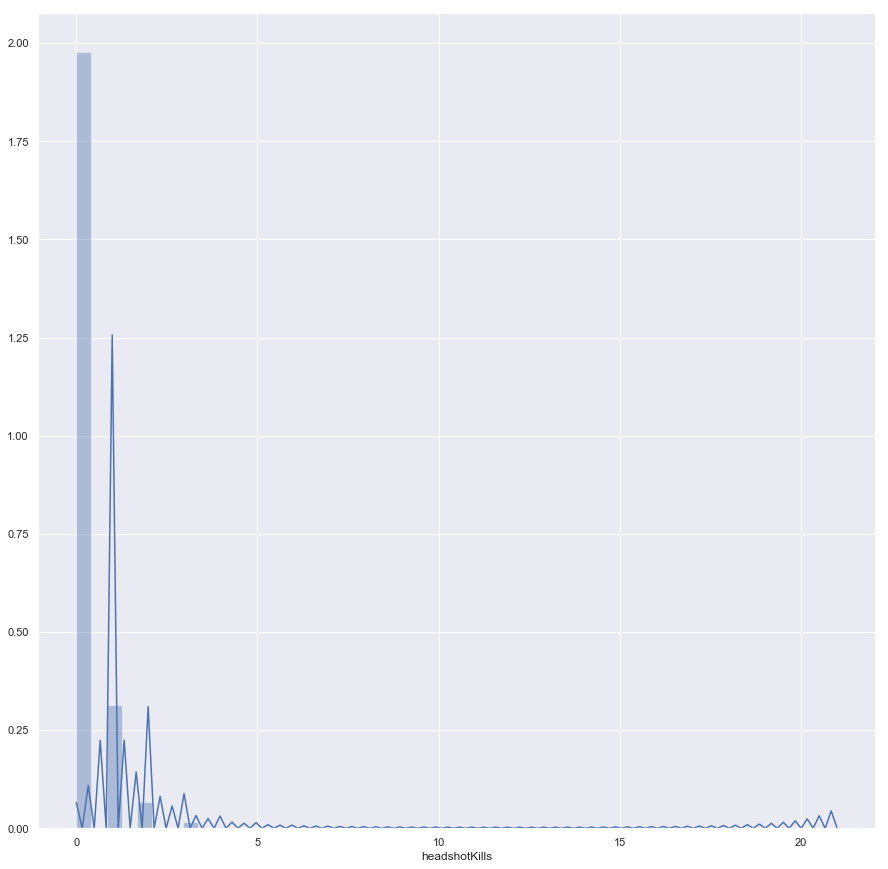

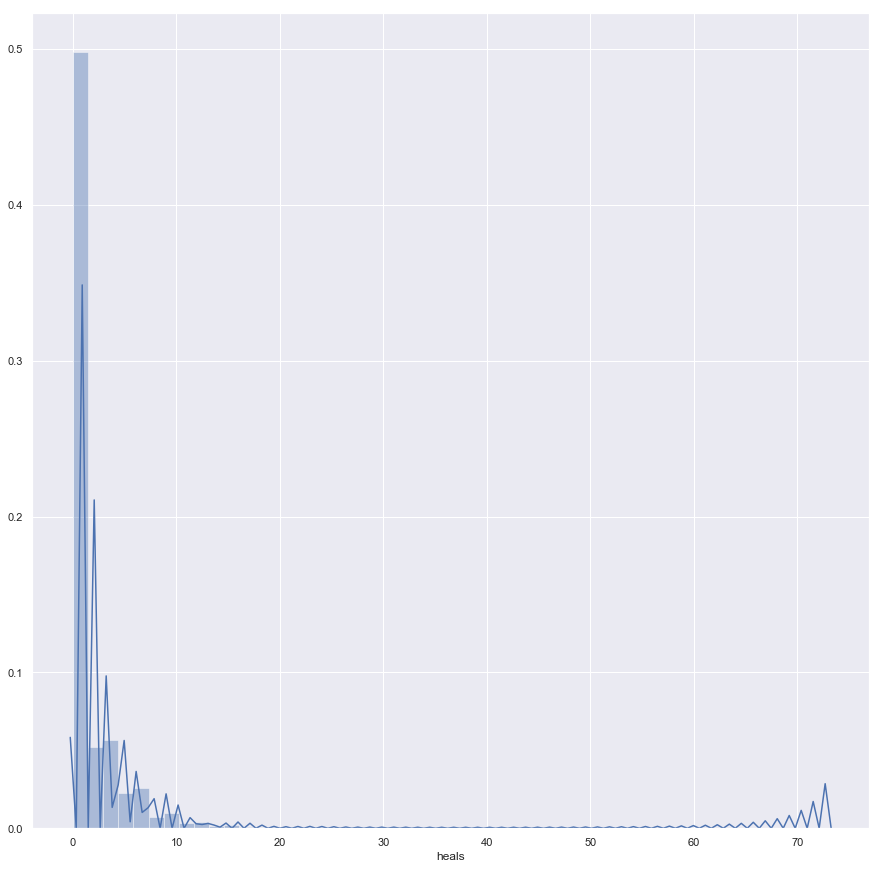

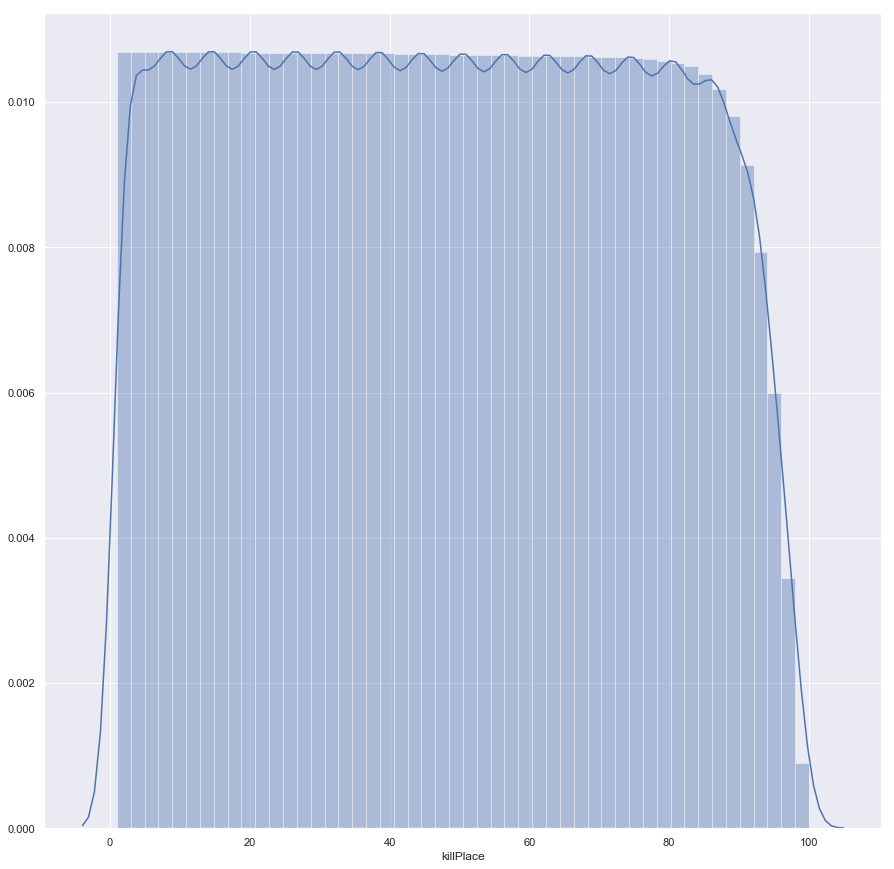

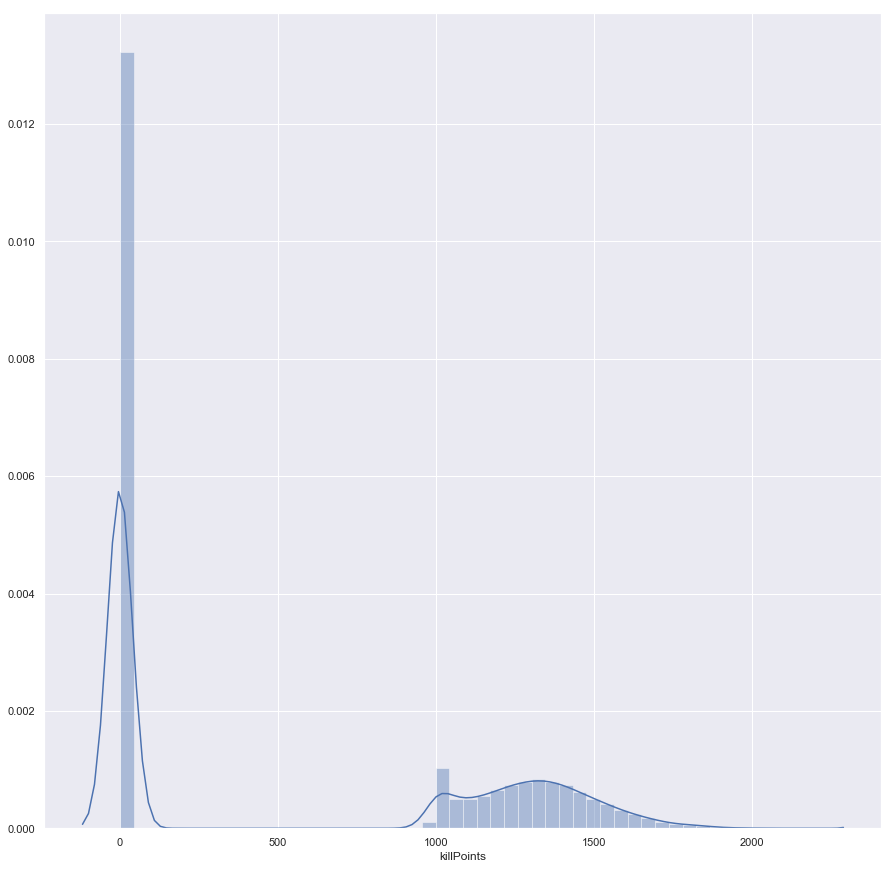

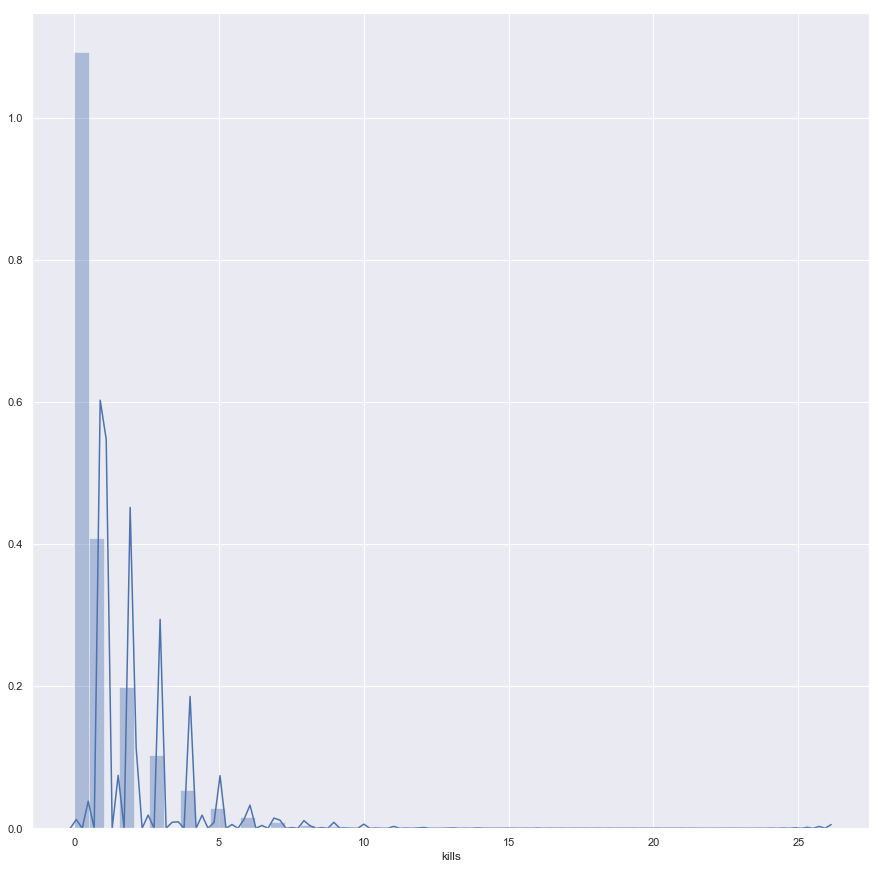

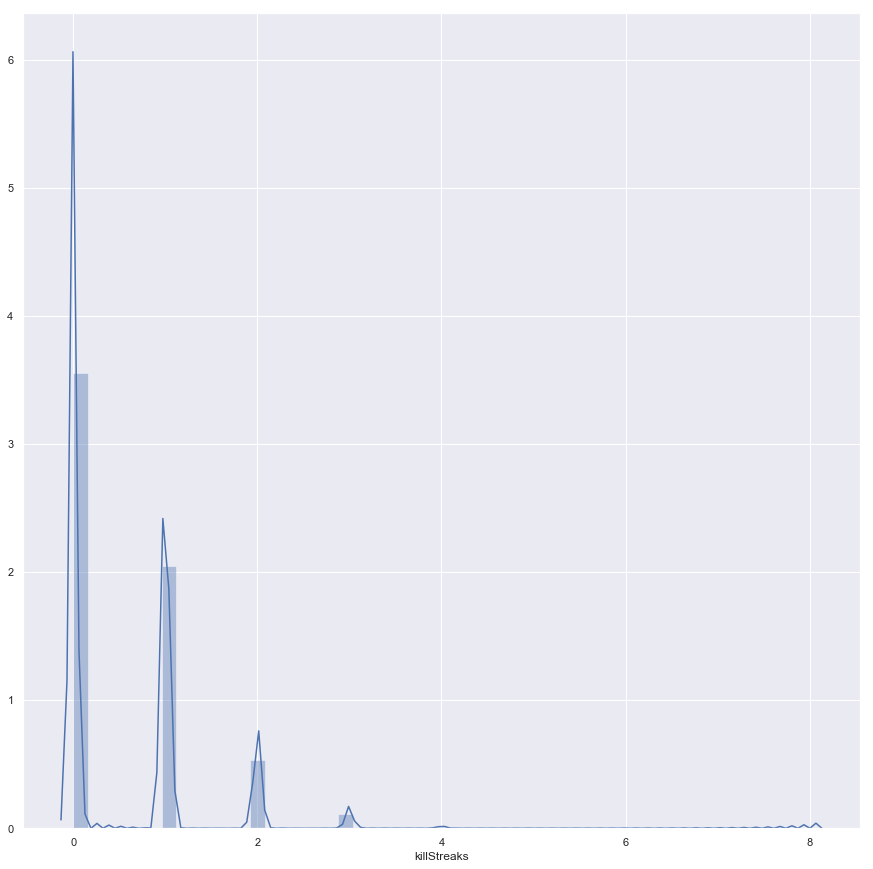

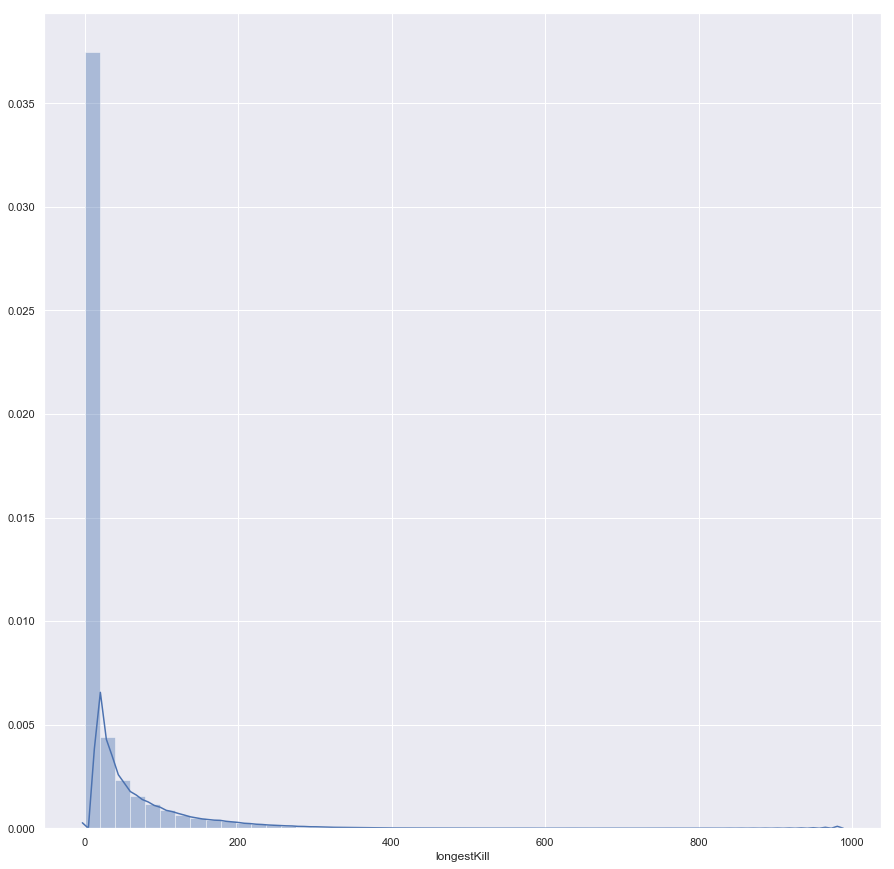

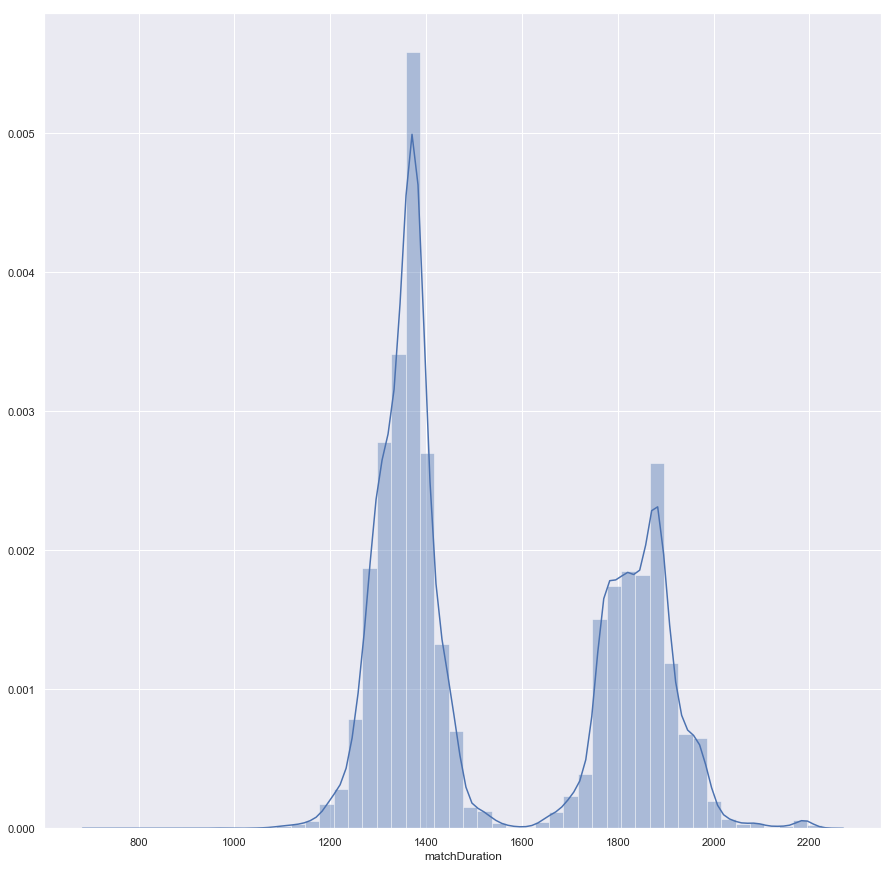

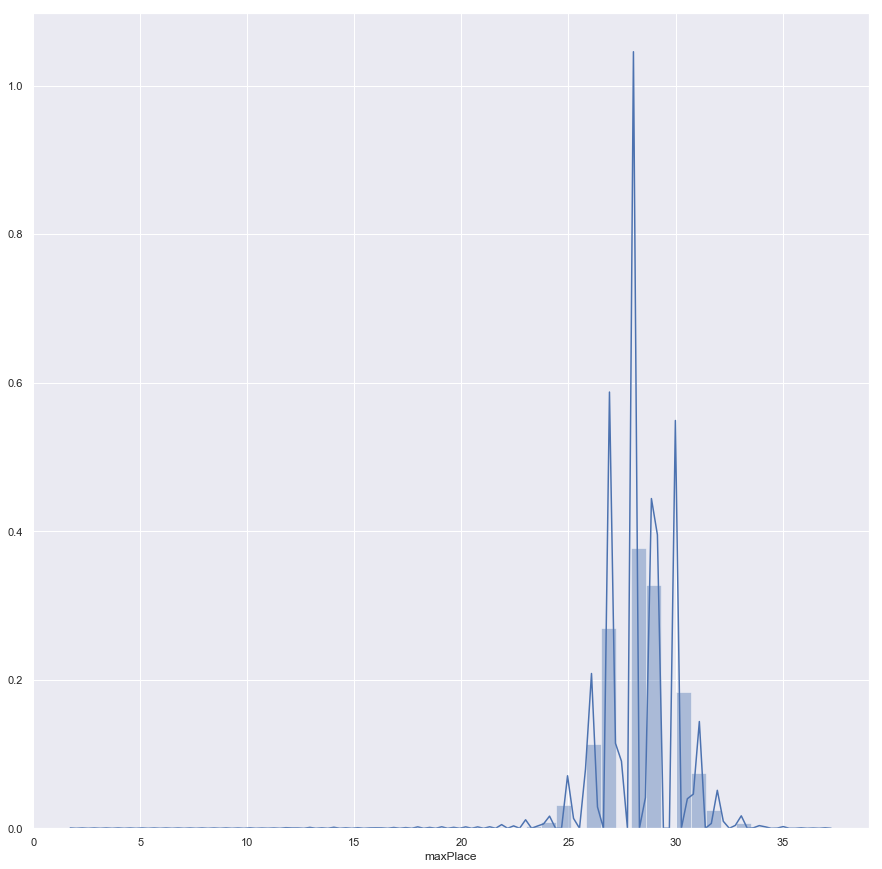

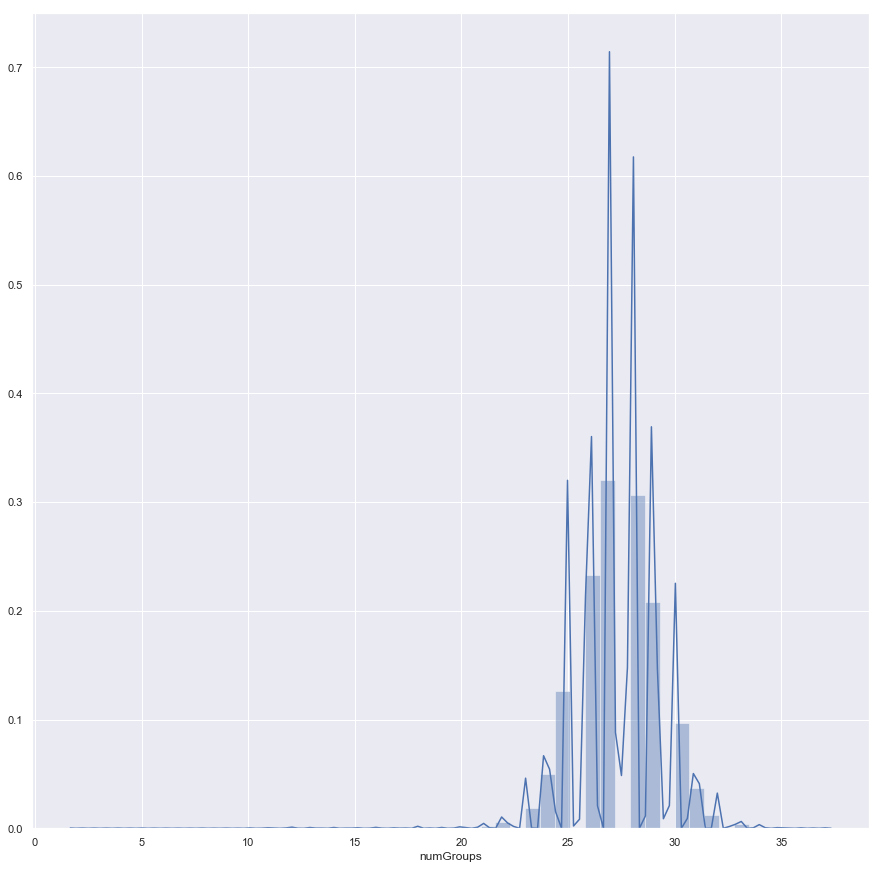

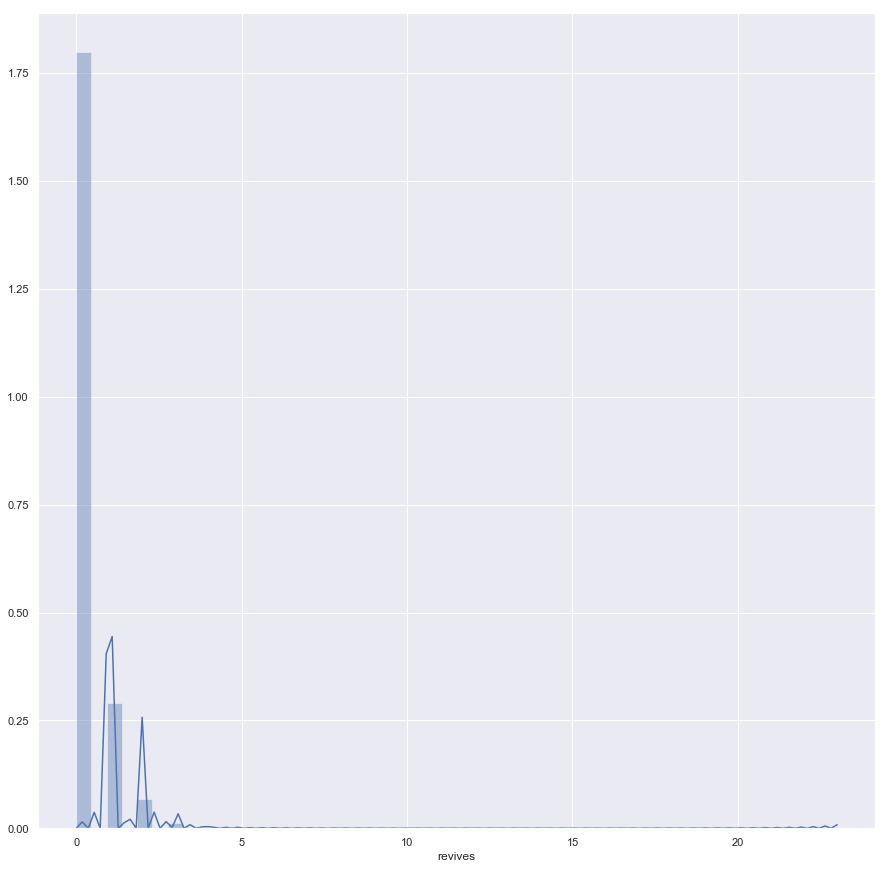

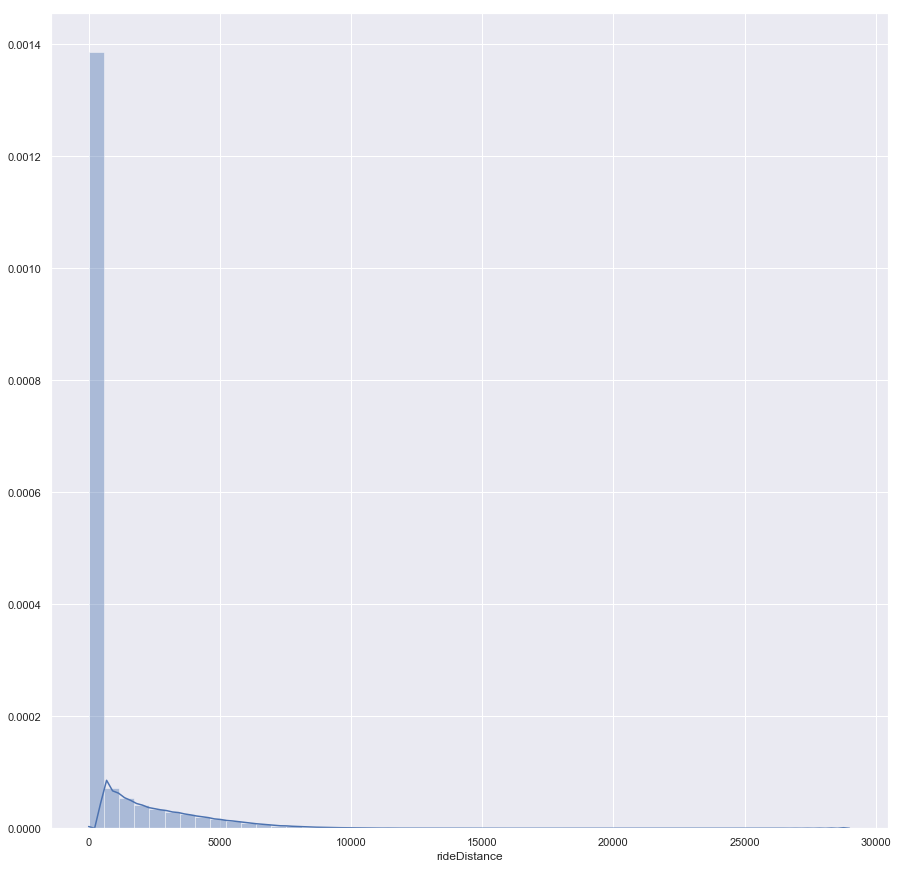

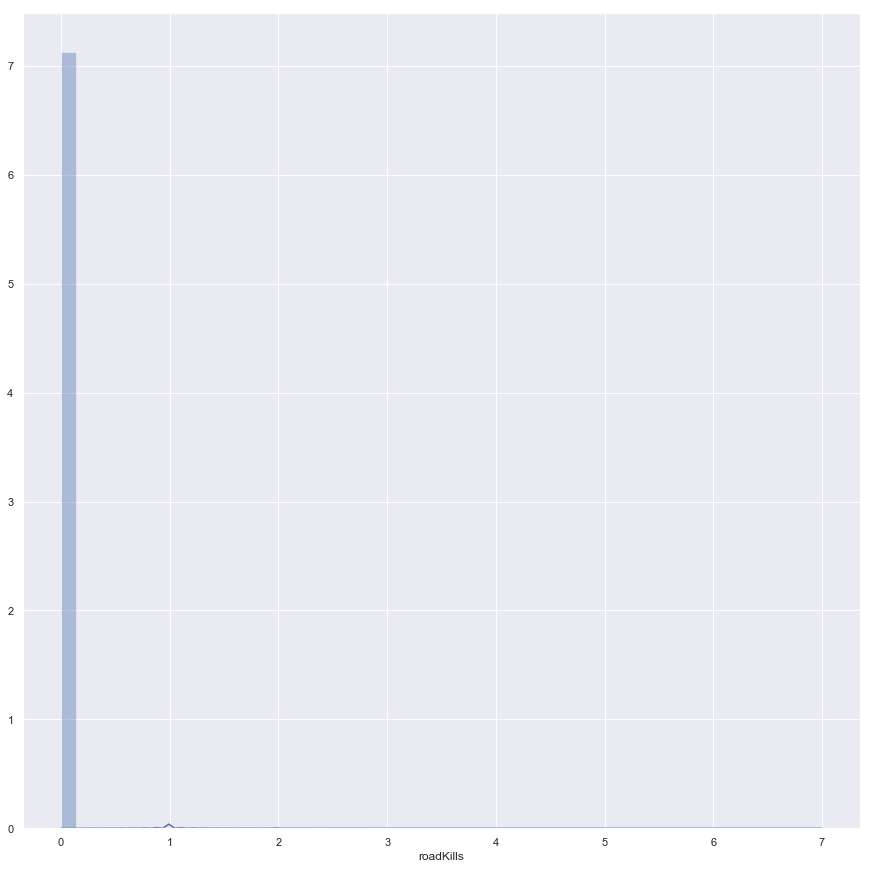

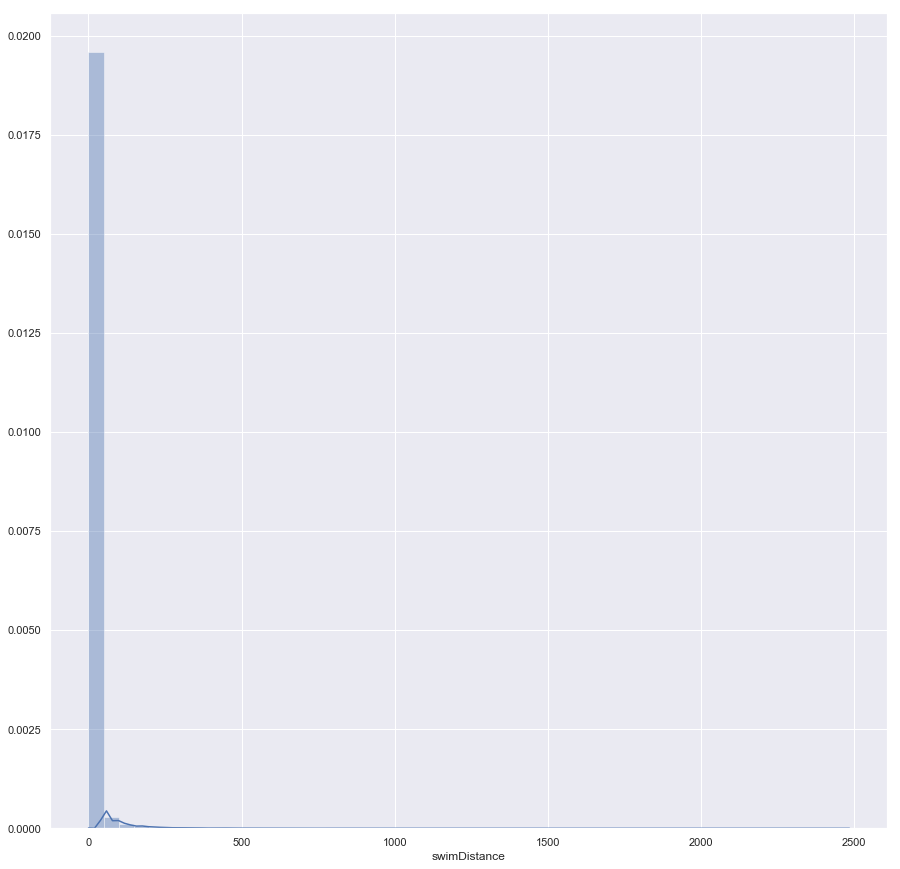

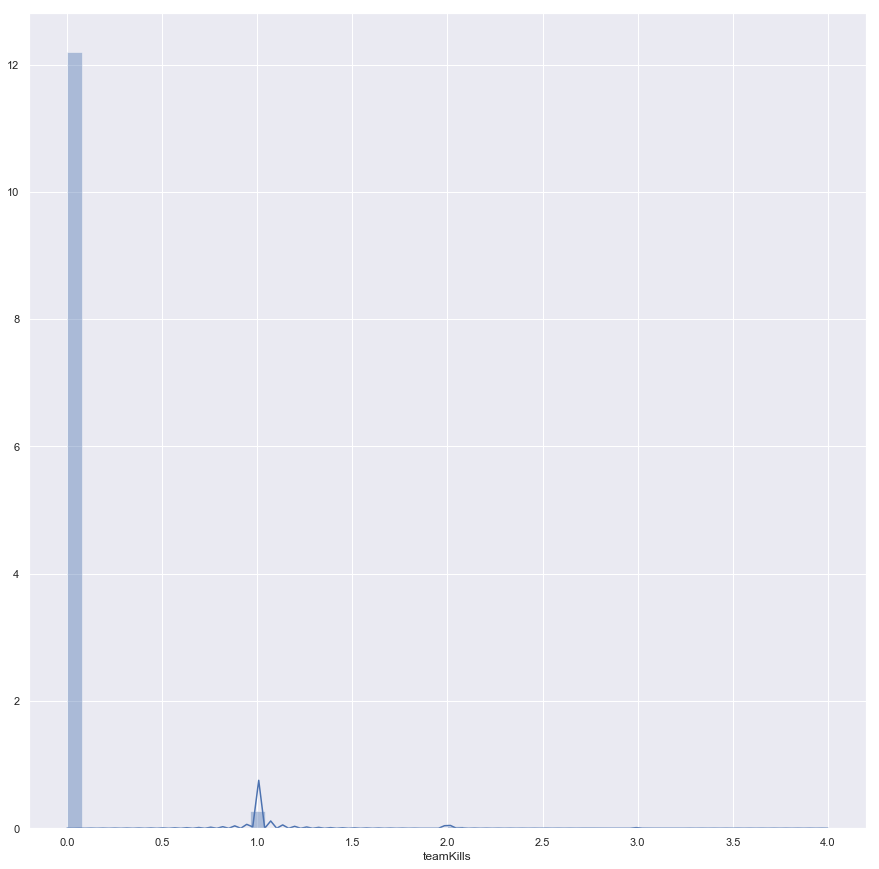

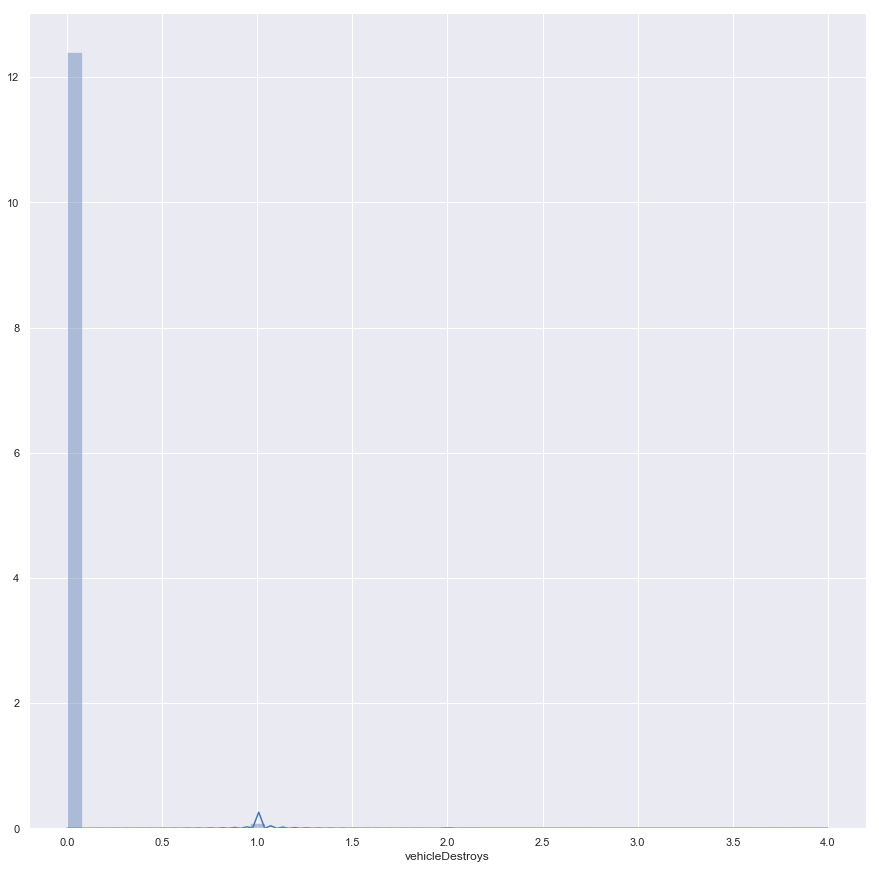

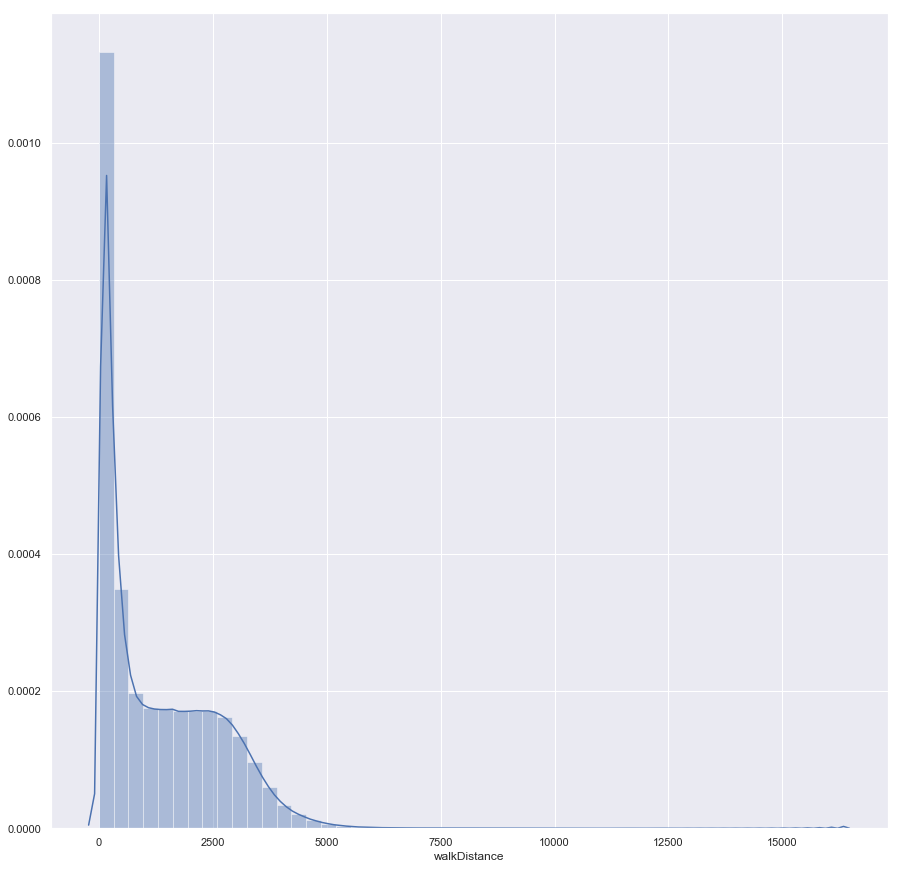

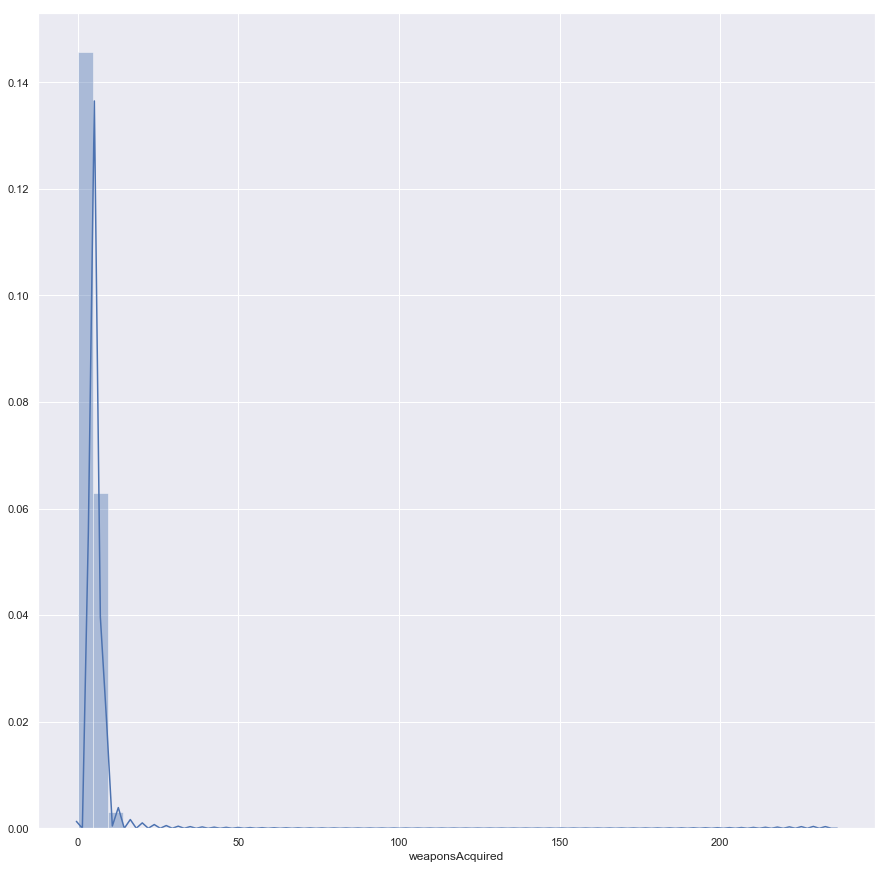

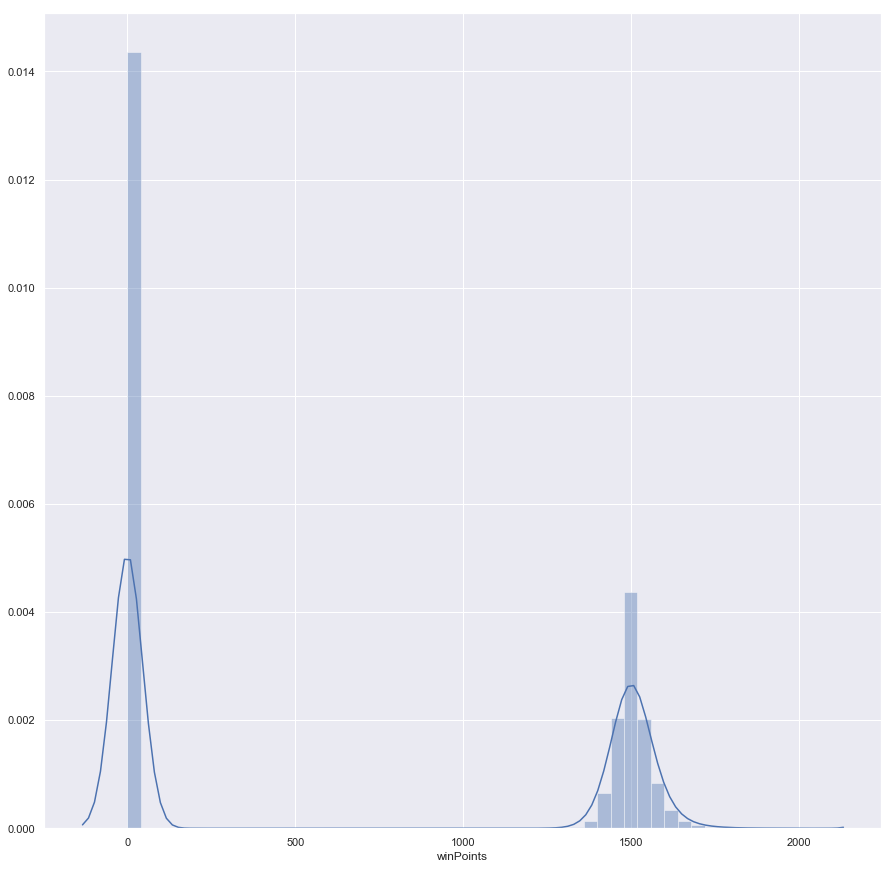

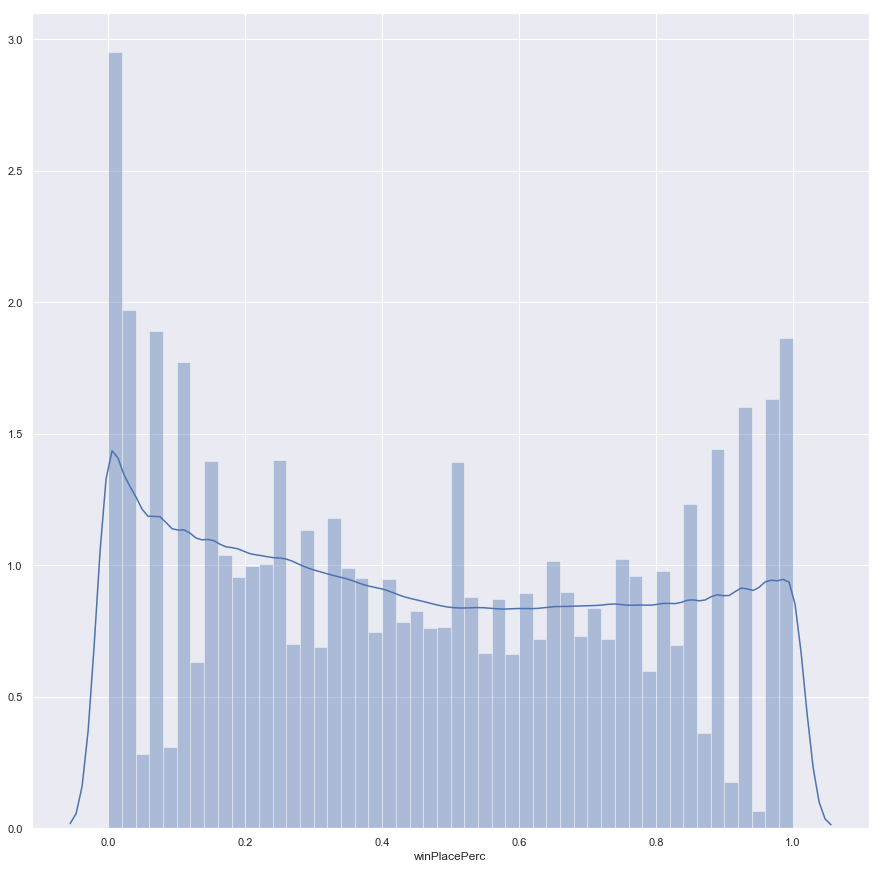

In [53]:
for feature in team_features:
    plt.figure(figsize = (15, 15))
    sns.distplot(squadfpp[feature])

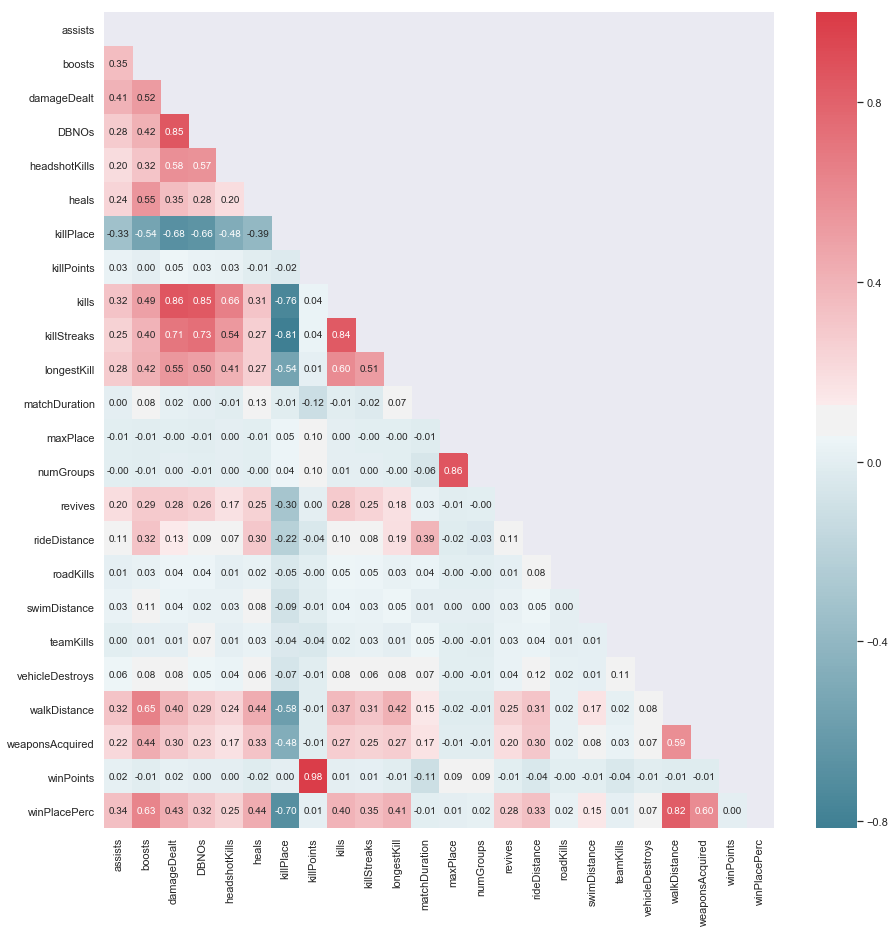

In [54]:
halfHeatMap(squadfpp[team_features], mirror = False, corrtype = "pearson")

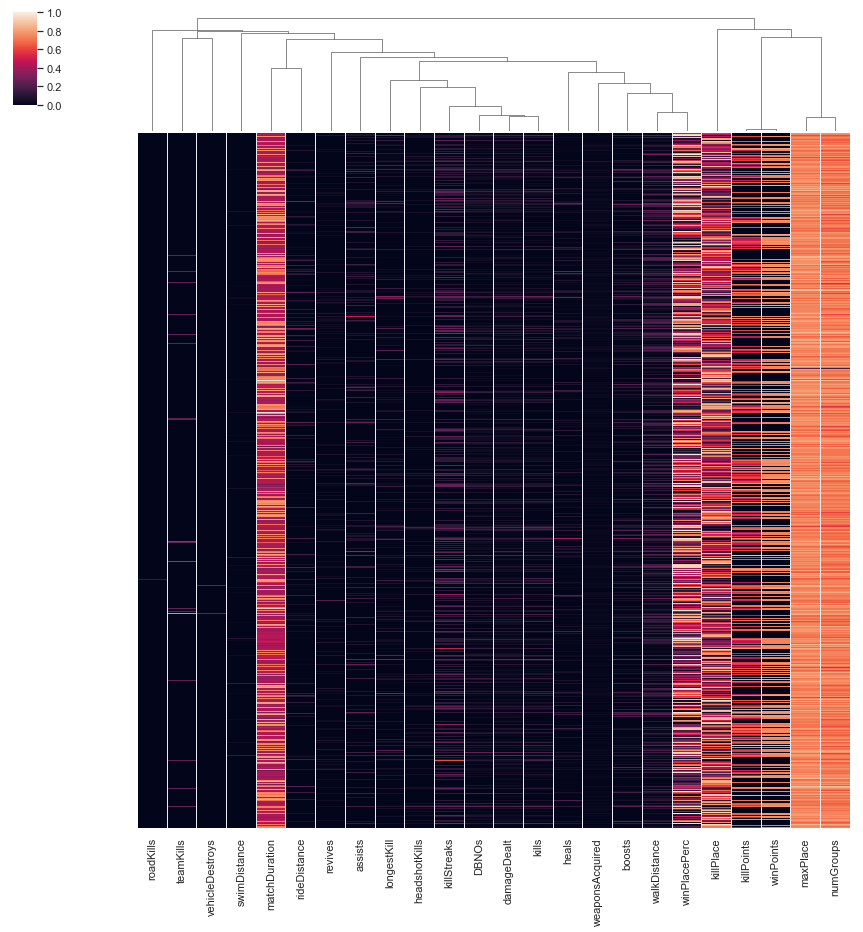

In [55]:
clustermap = sns.clustermap(squadfpp[team_features], figsize = (15, 15), 
                            metric = "correlation", row_cluster = False, 
                            standard_scale = 1, yticklabels = [])

### Normal/FPP Mode Comparison

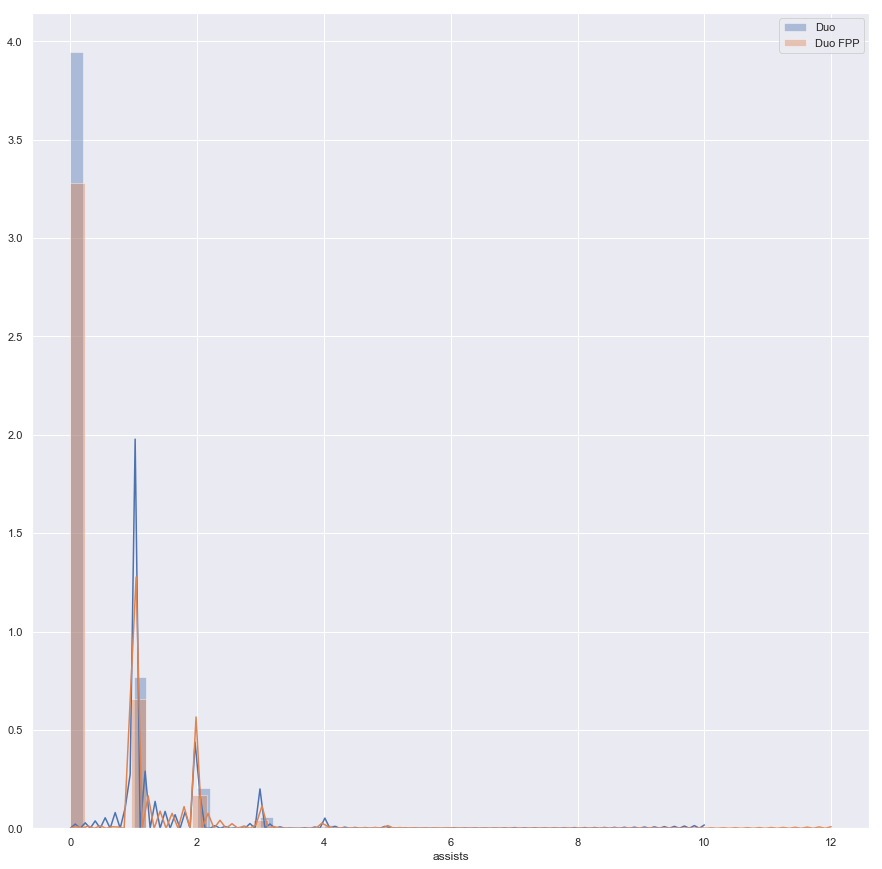

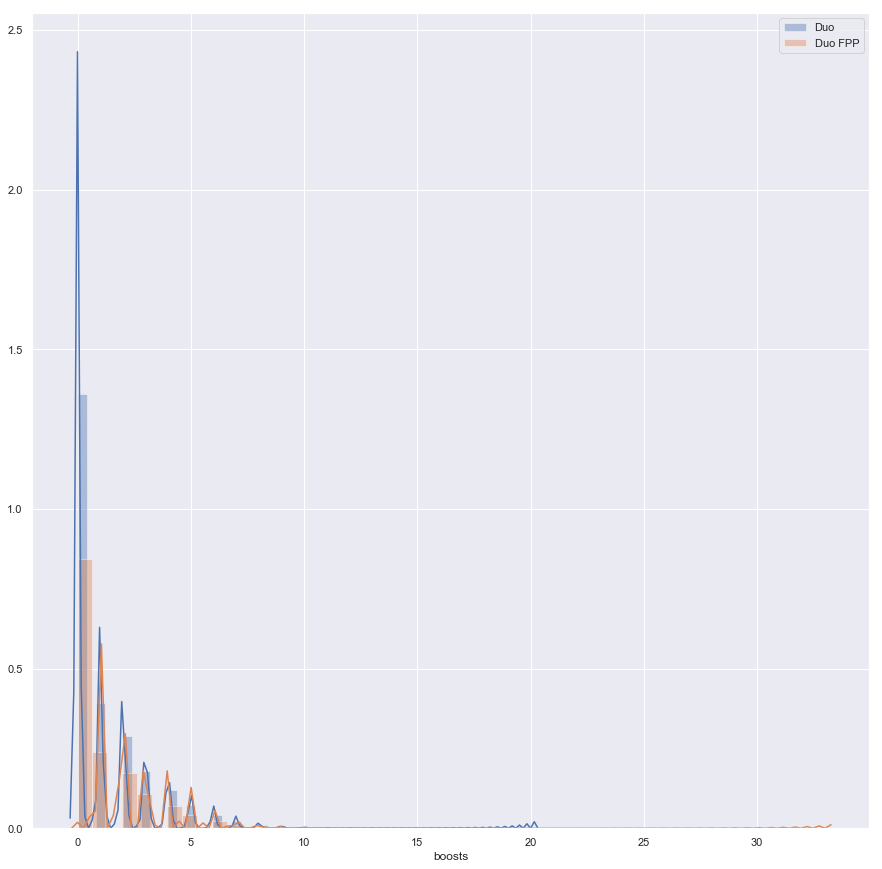

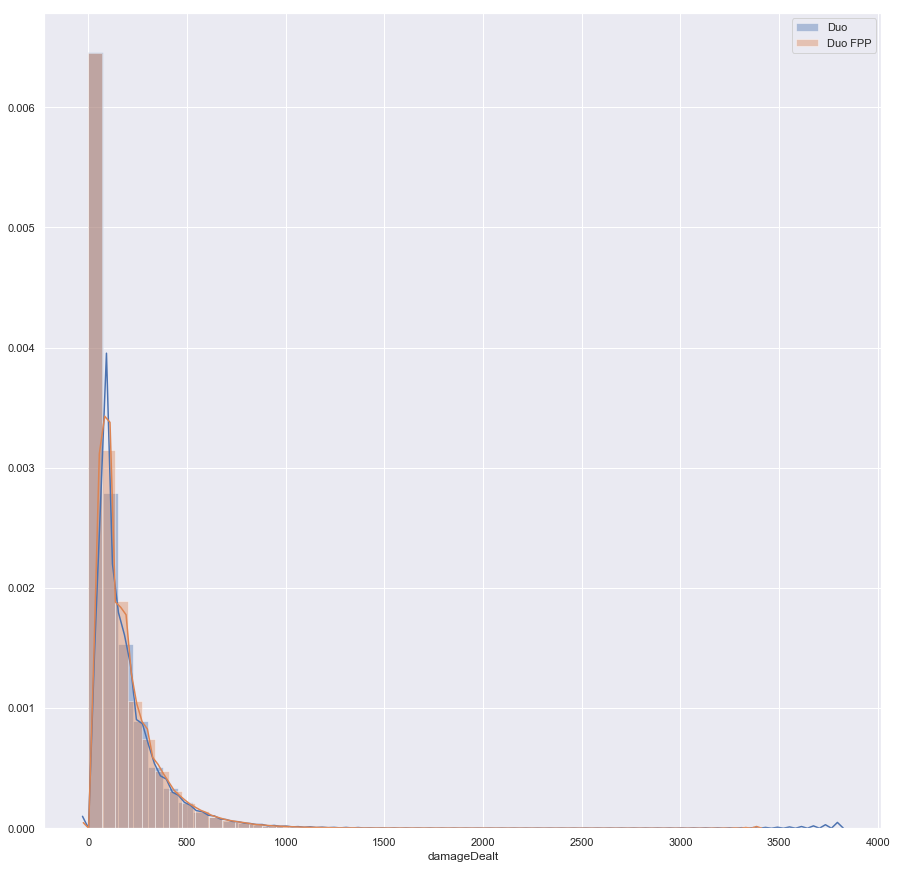

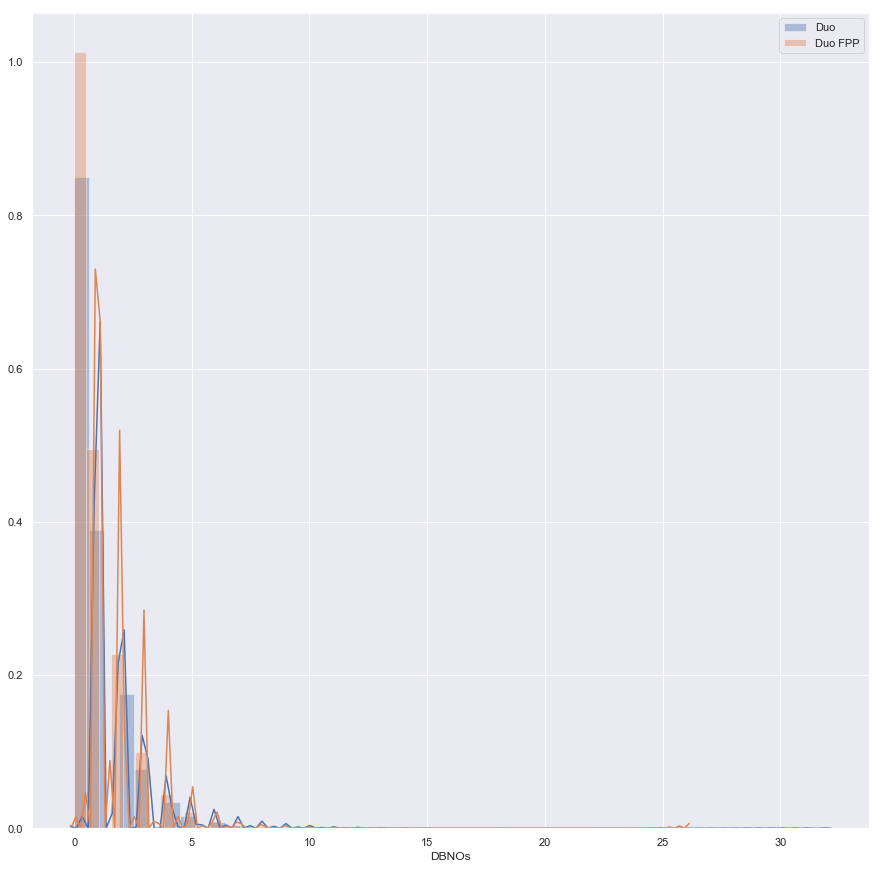

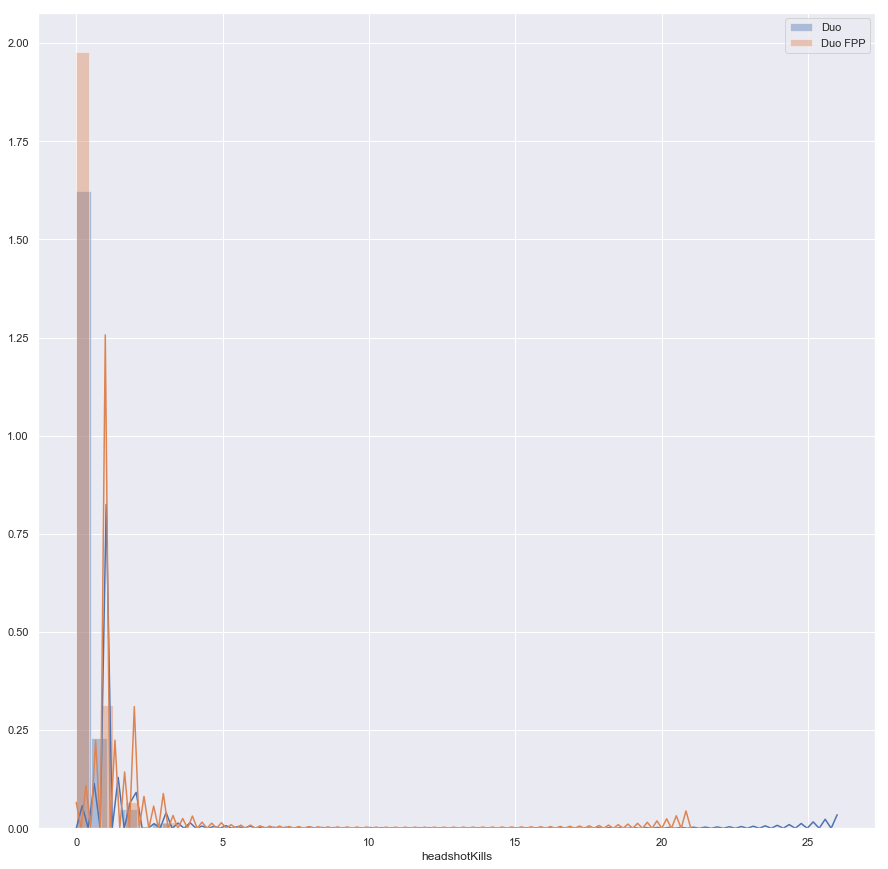

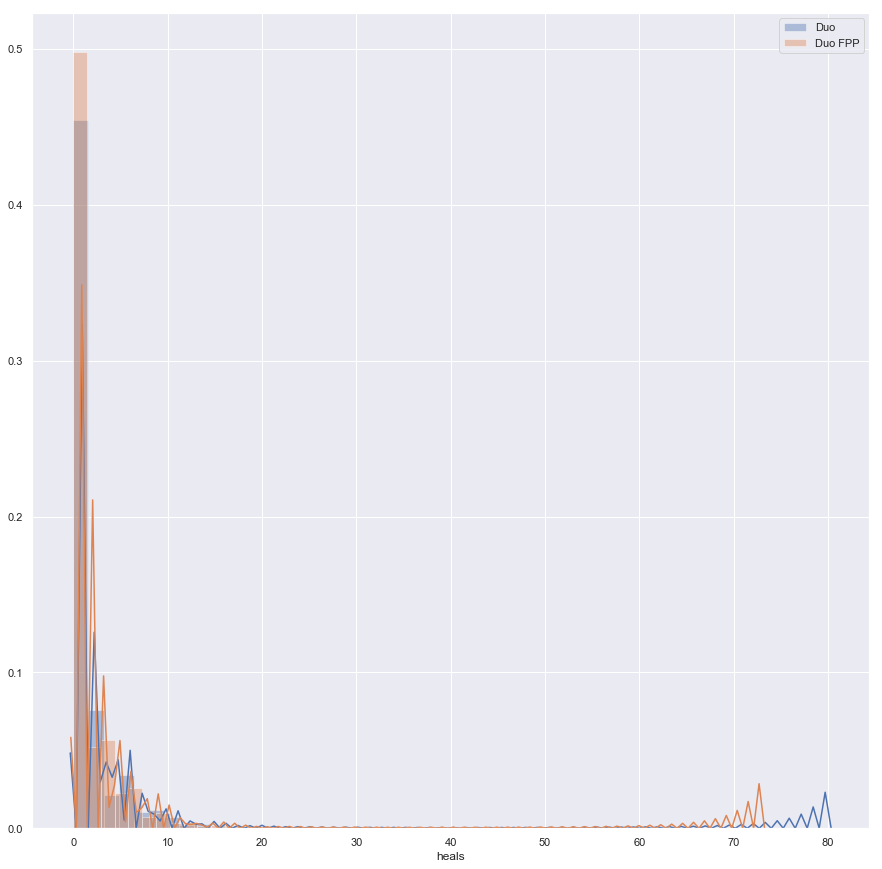

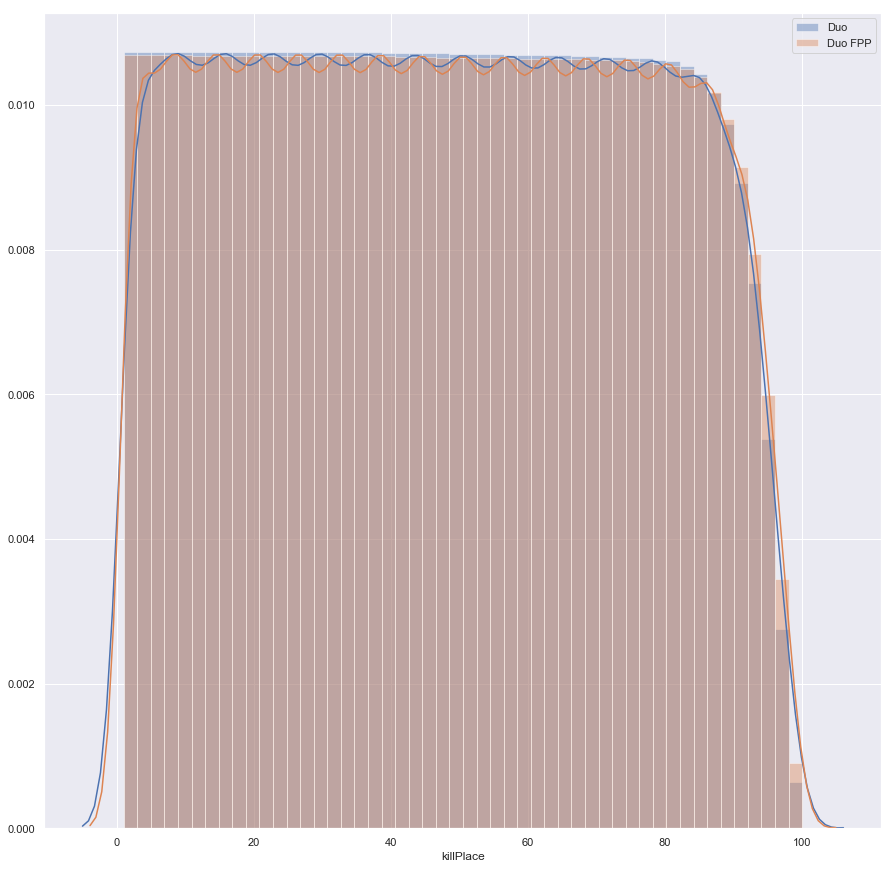

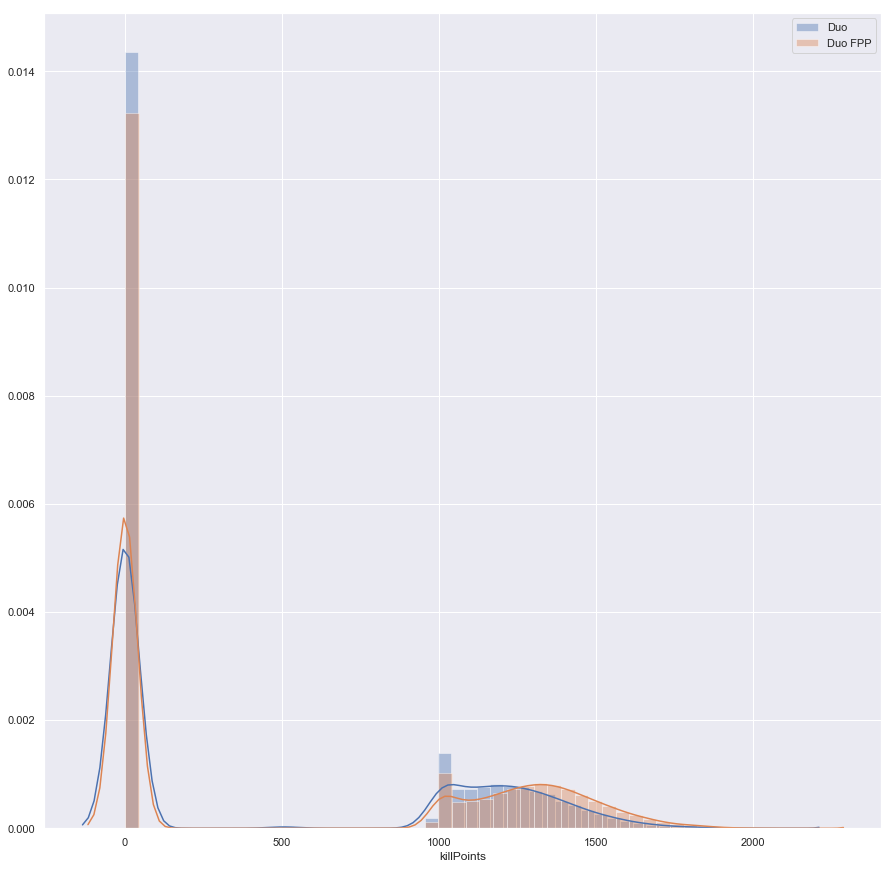

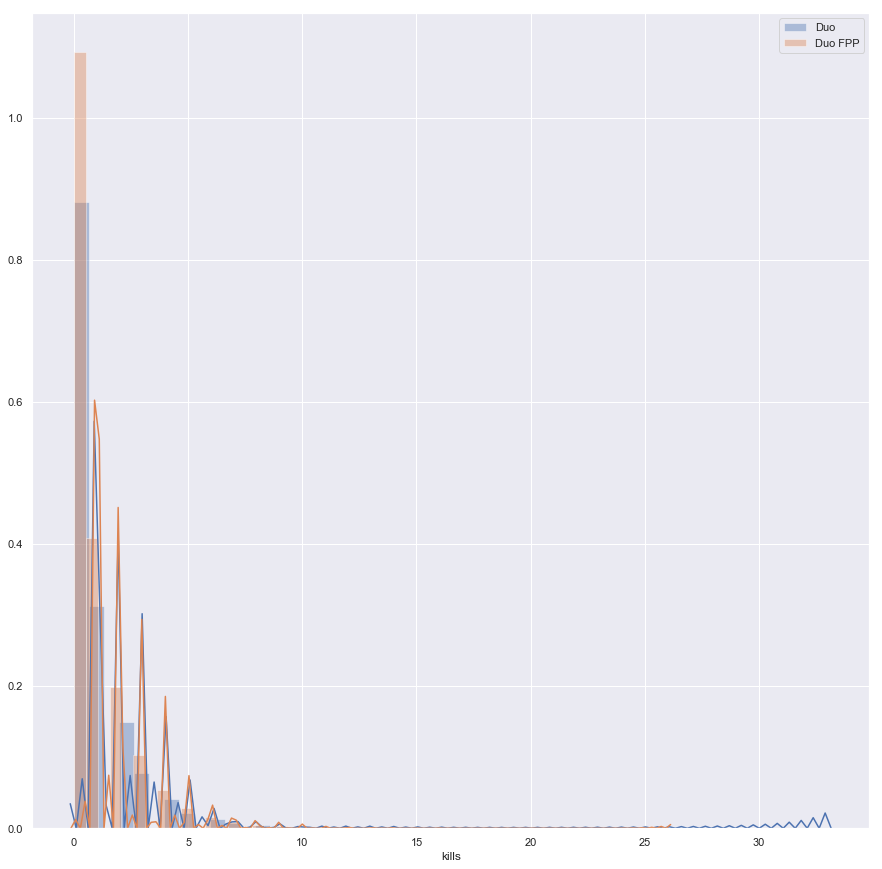

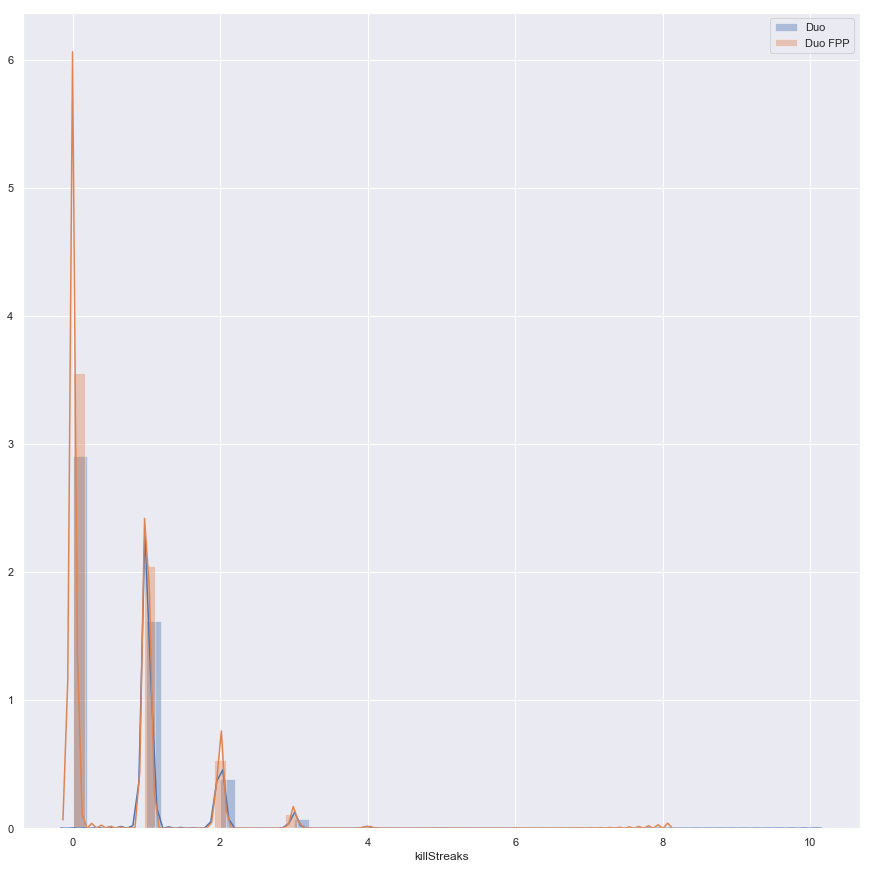

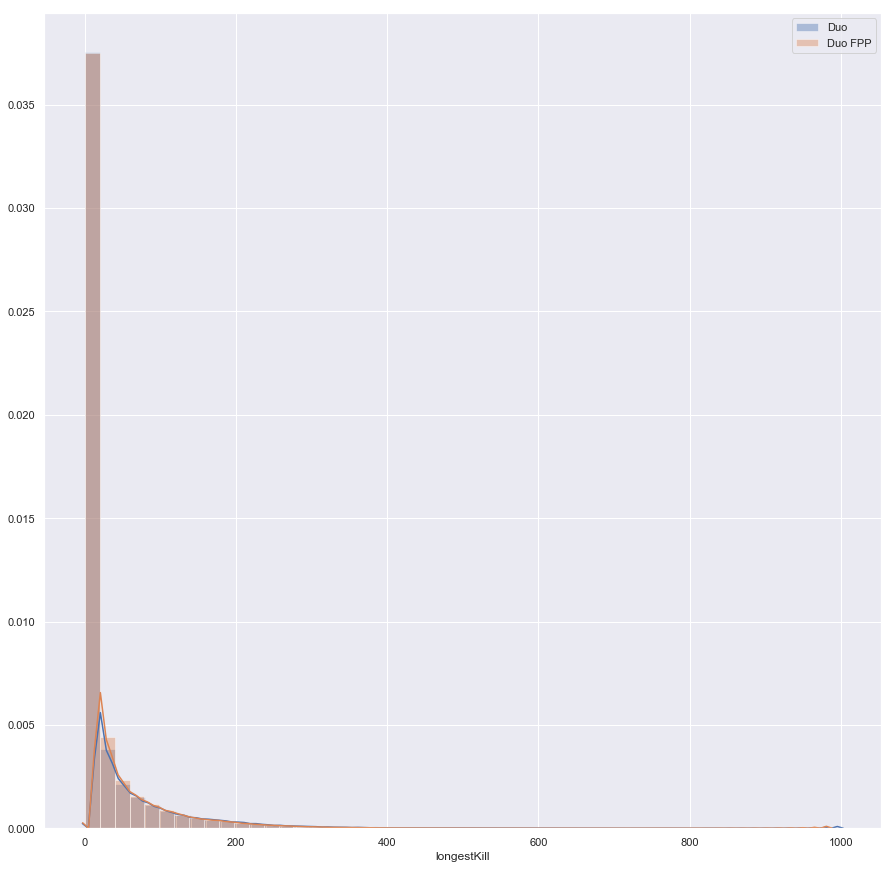

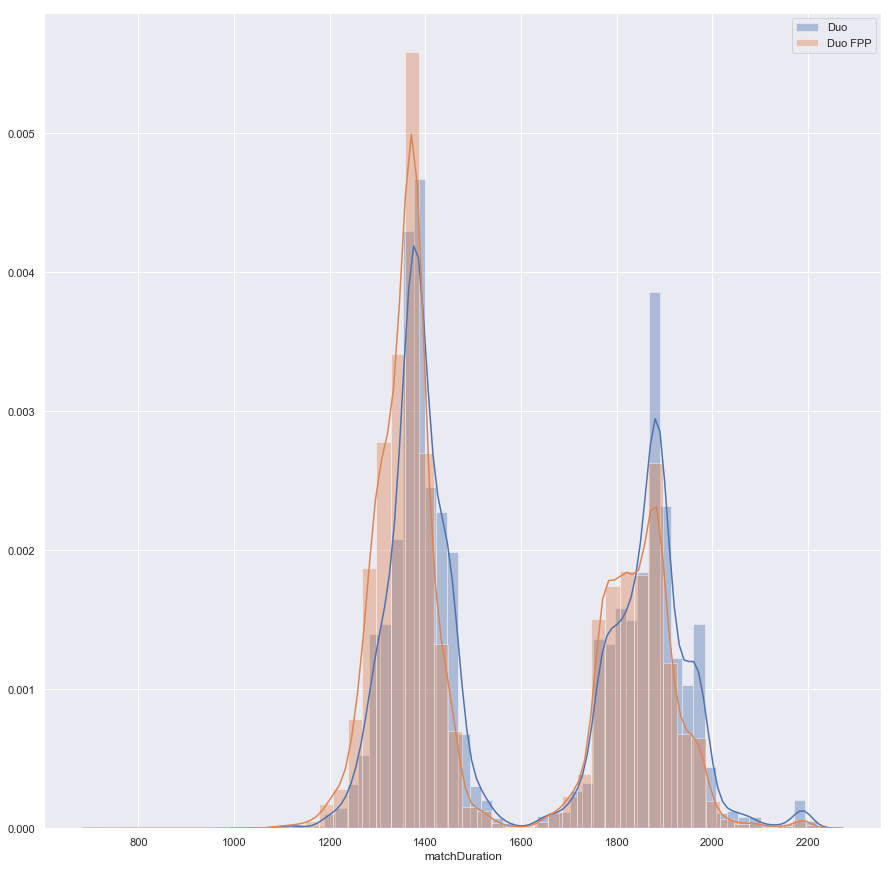

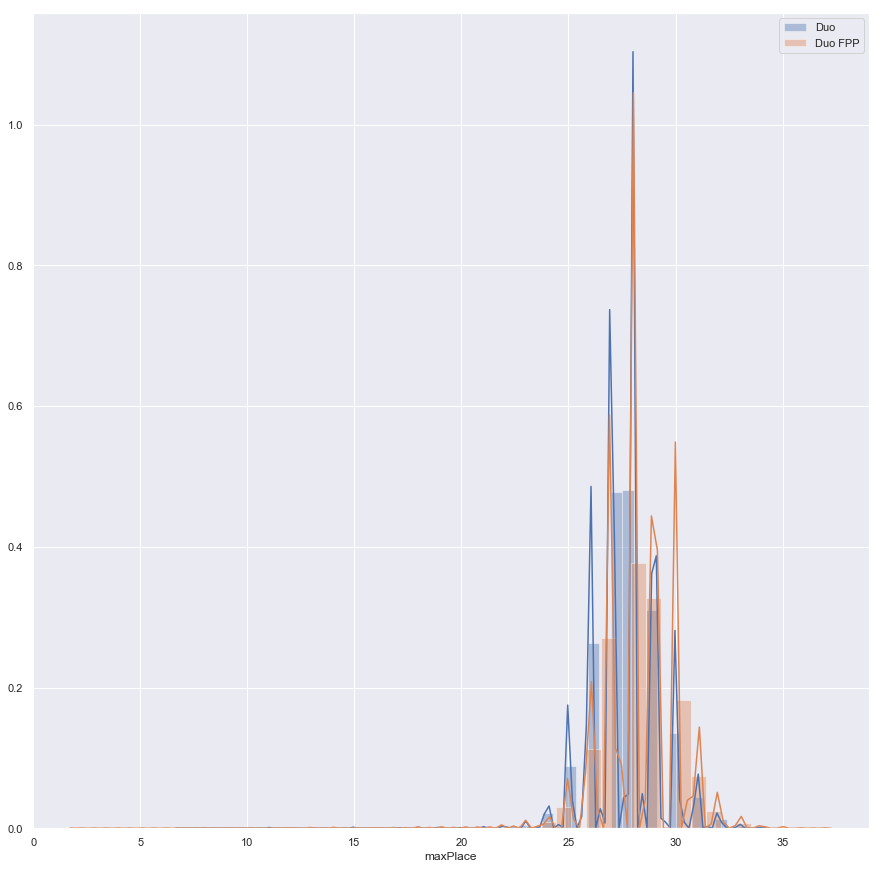

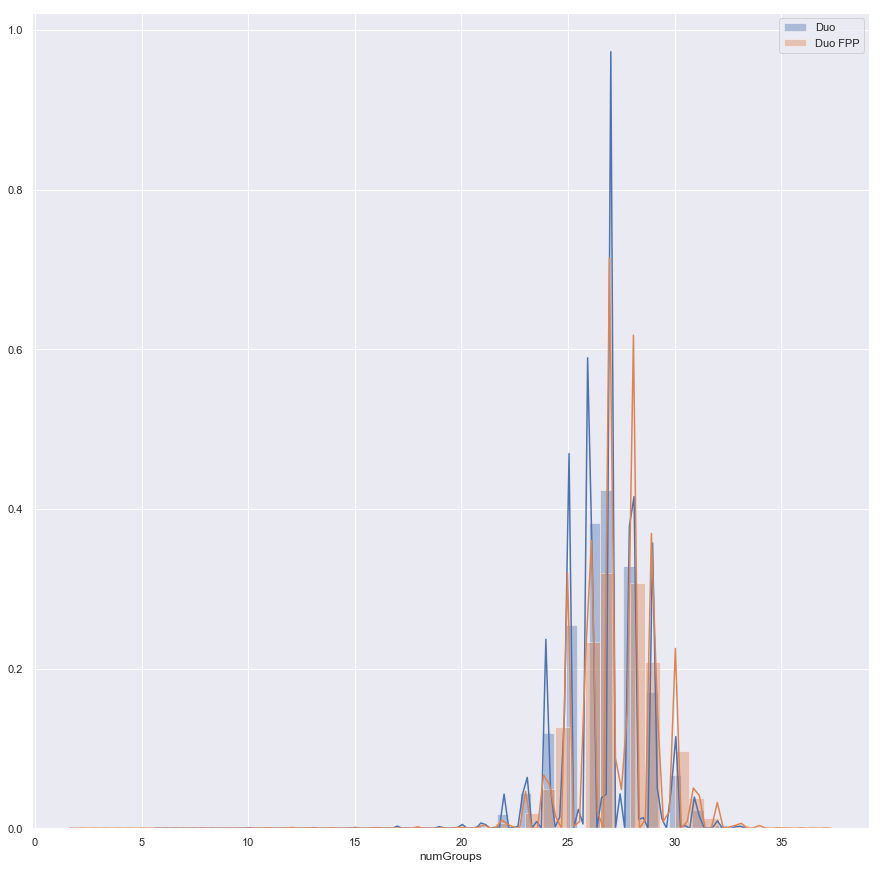

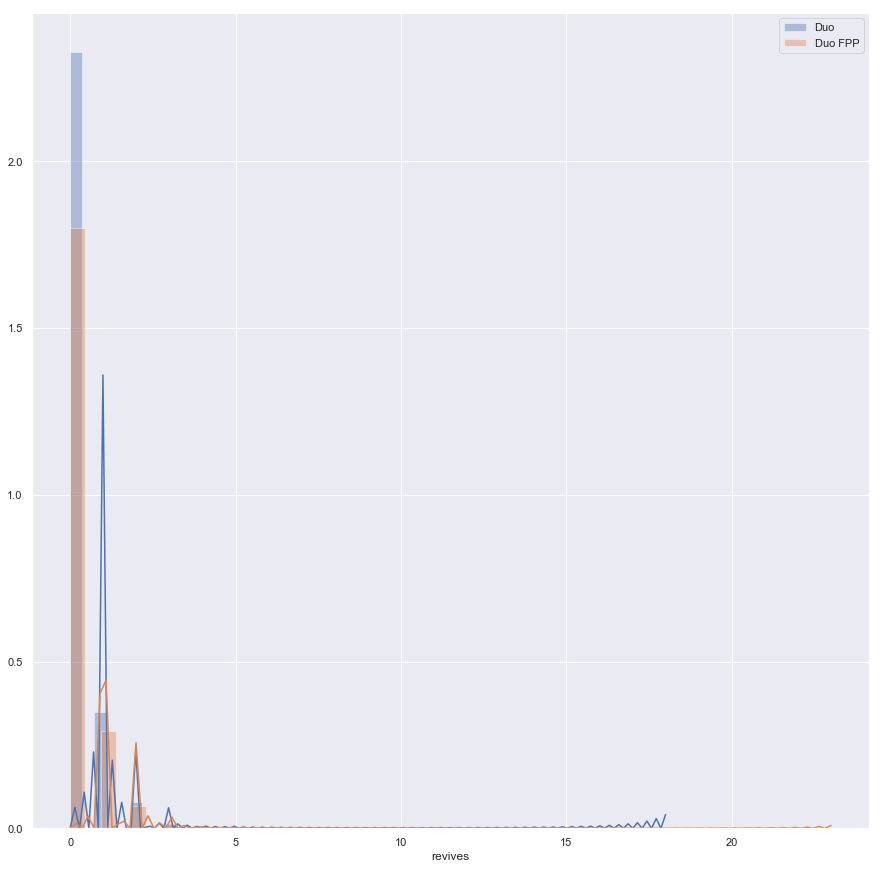

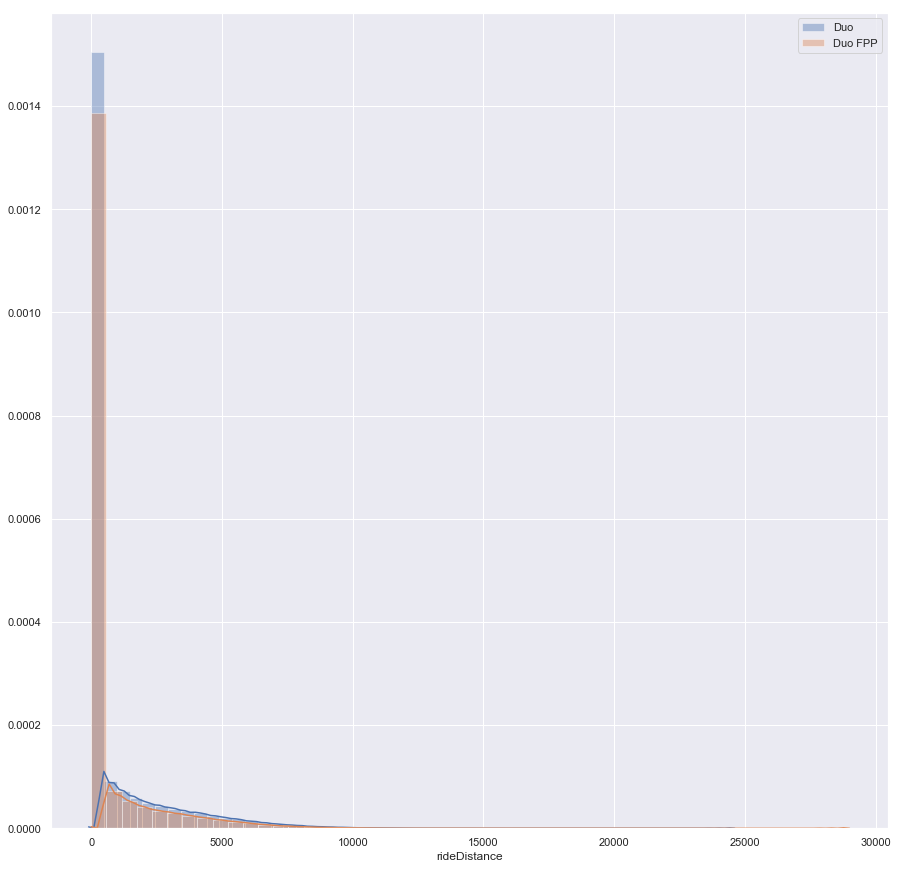

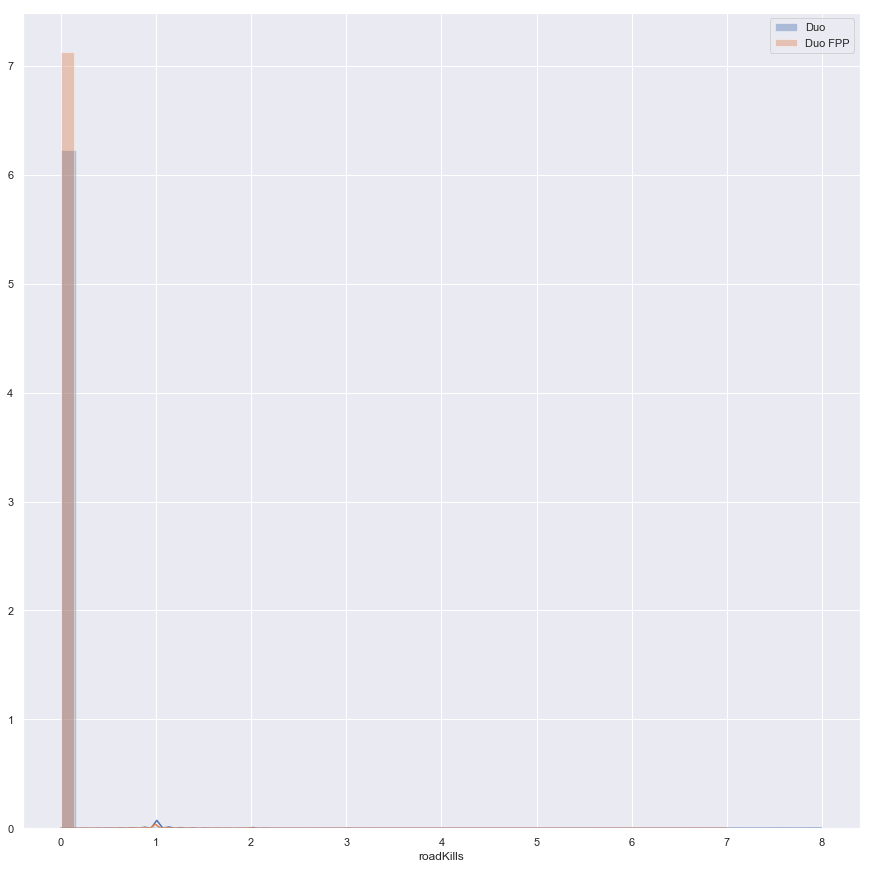

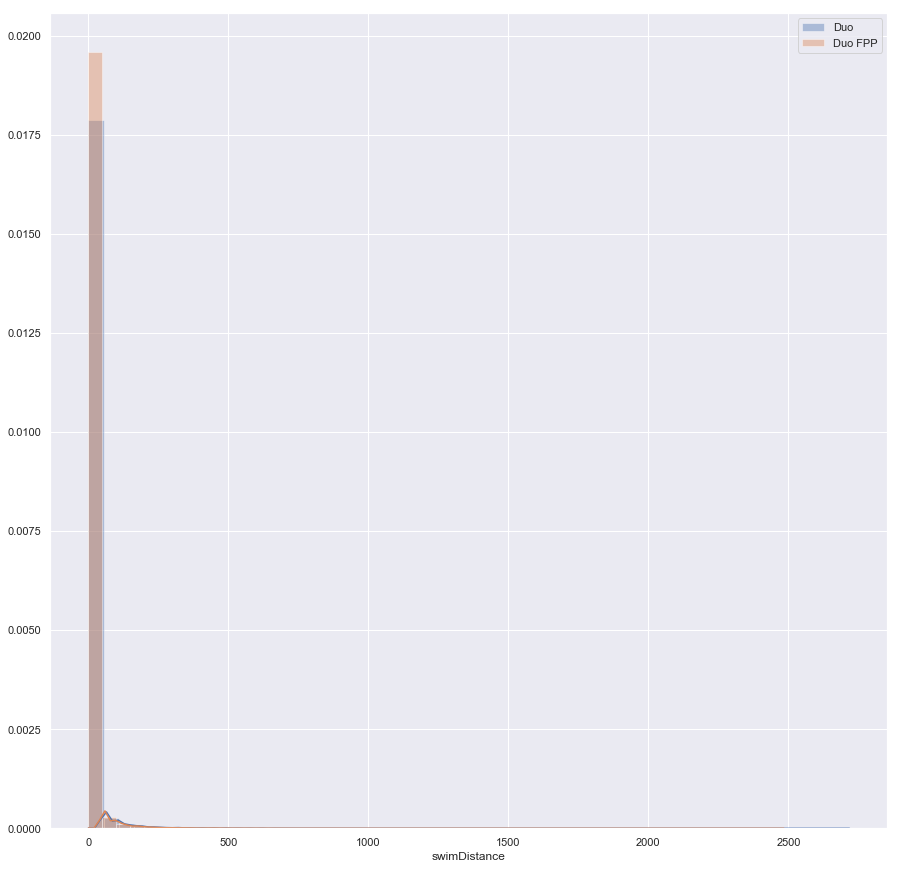

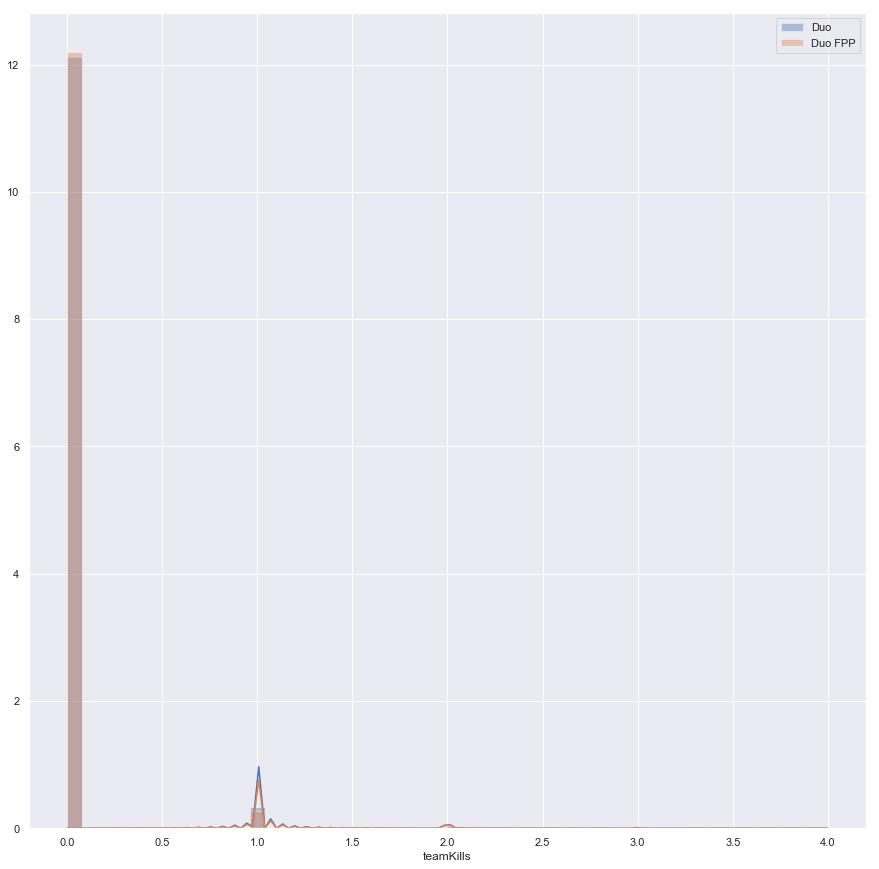

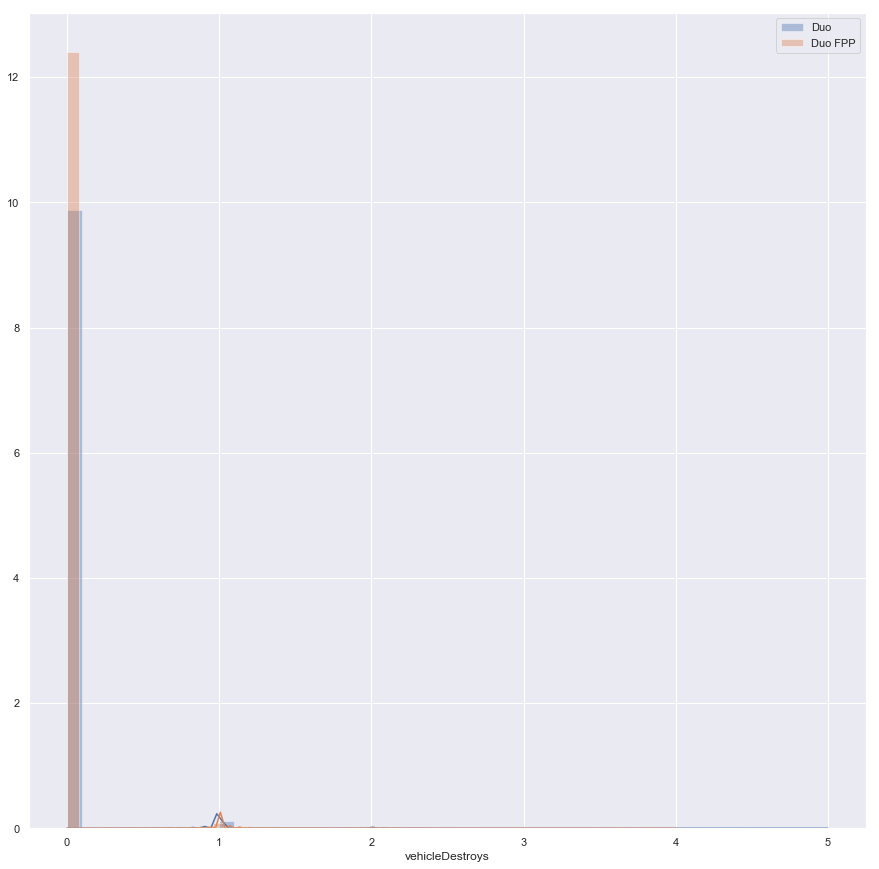

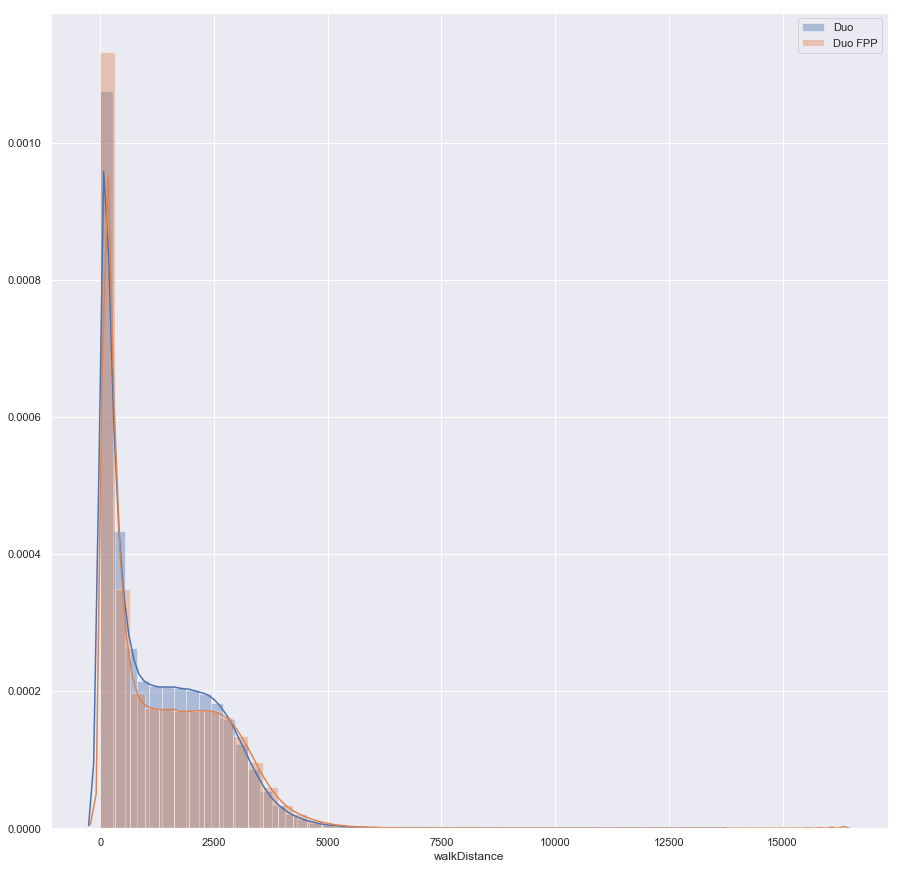

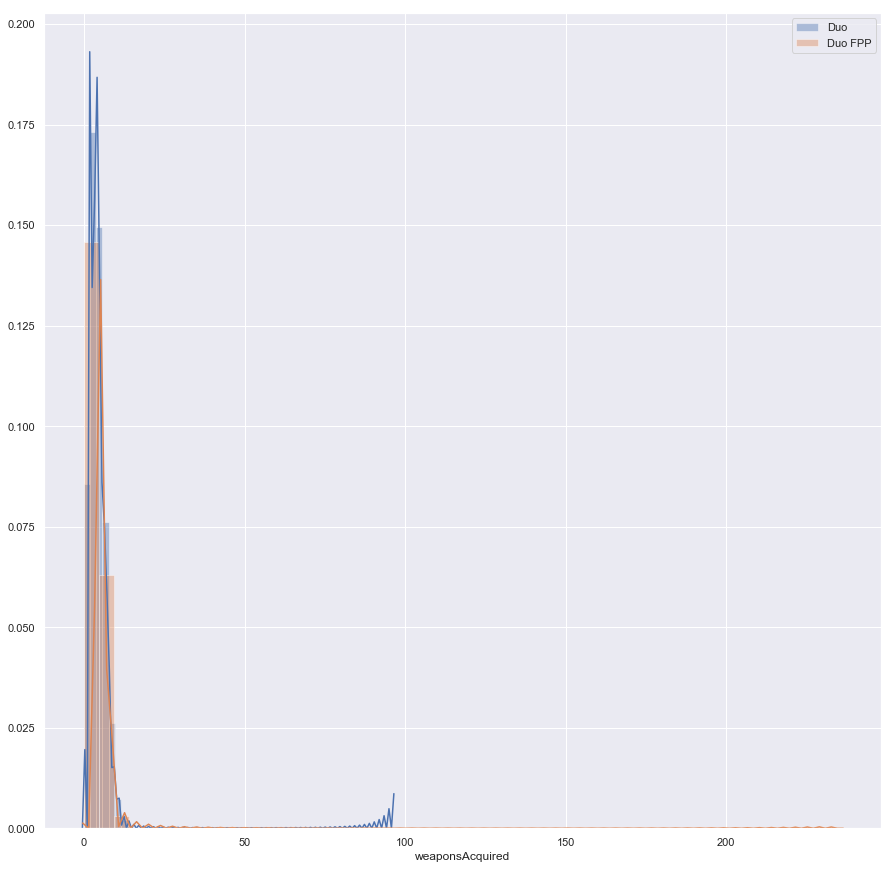

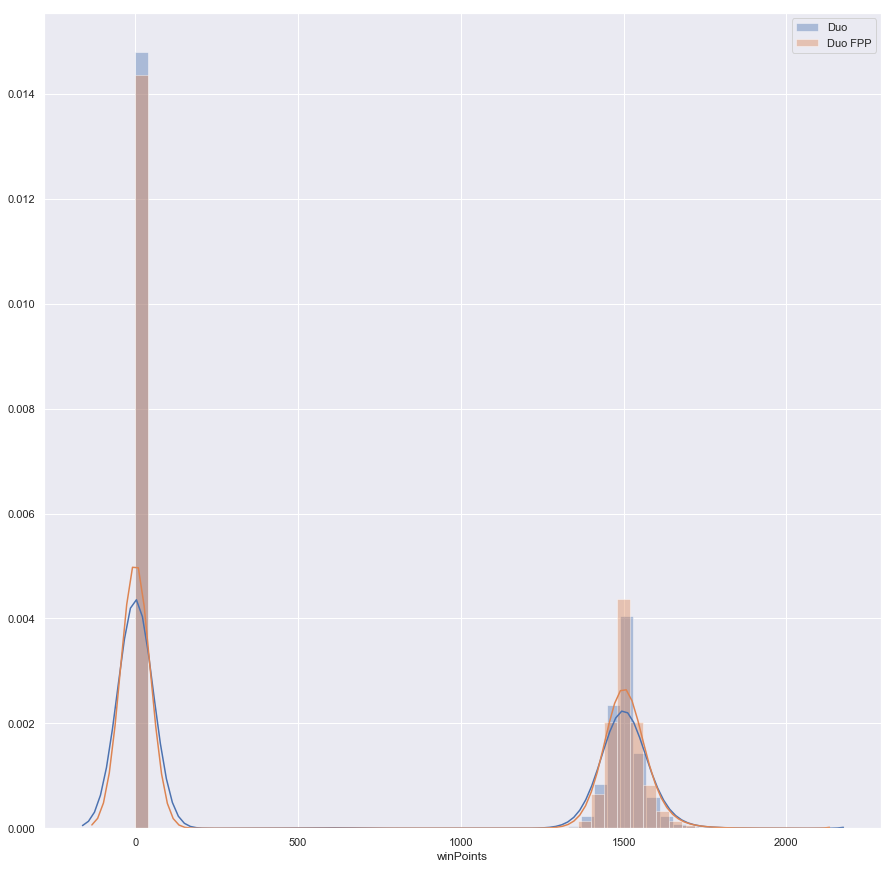

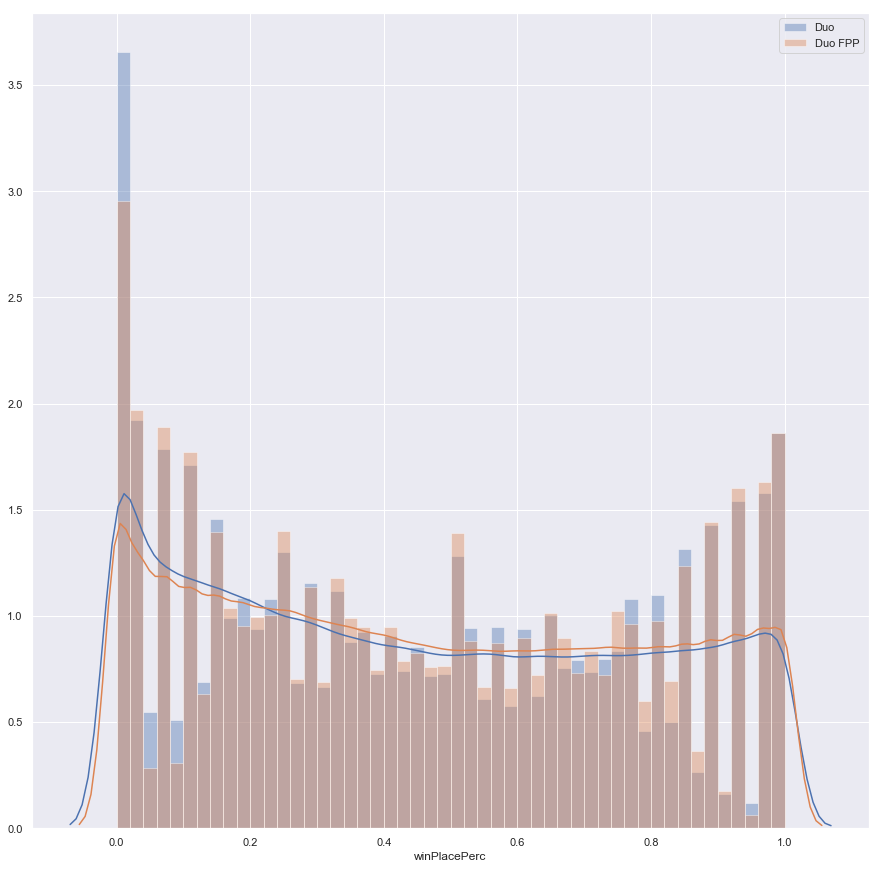

In [56]:
for feature in team_features:
    fig, ax = plt.subplots(figsize = (15, 15))
    sns.distplot(squad[feature], ax = ax, label = "Duo")
    sns.distplot(squadfpp[feature], ax = ax, label = "Duo FPP")
    ax.legend()

## Solo/Duo/Squad Comparisons

In [57]:
features_to_test = ["assists", "boosts", "damageDealt", "heals", "kills", "killStreaks", 
                    "matchDuration", "rideDistance", "walkDistance", "weaponsAcquired"]

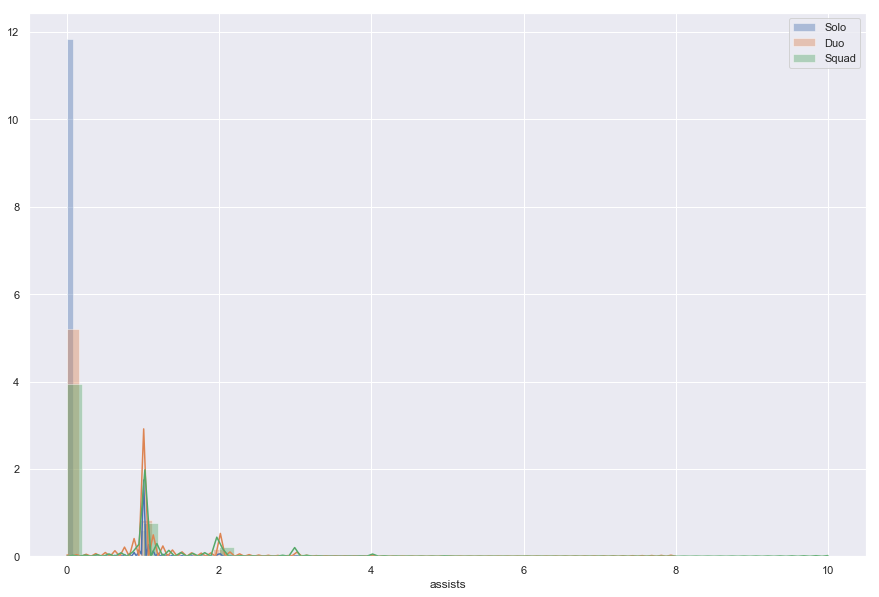

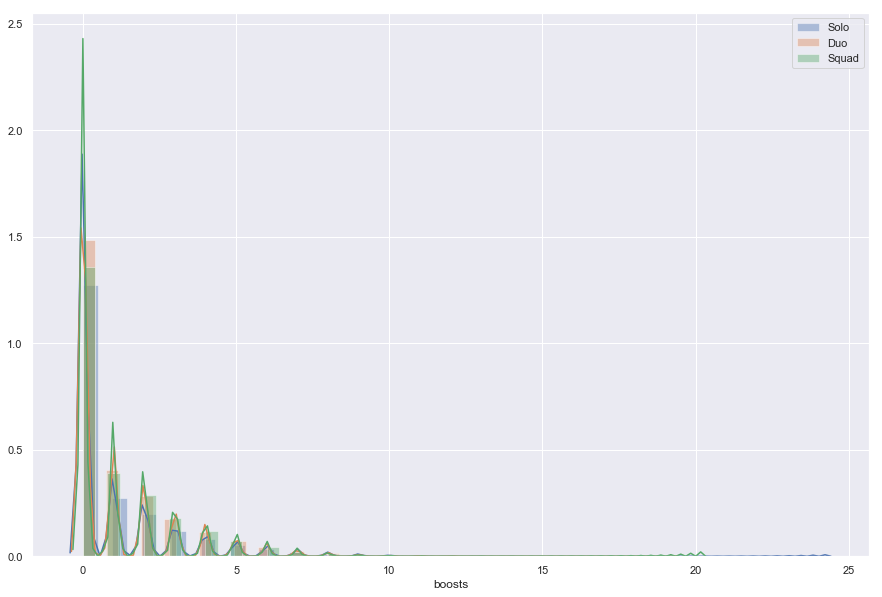

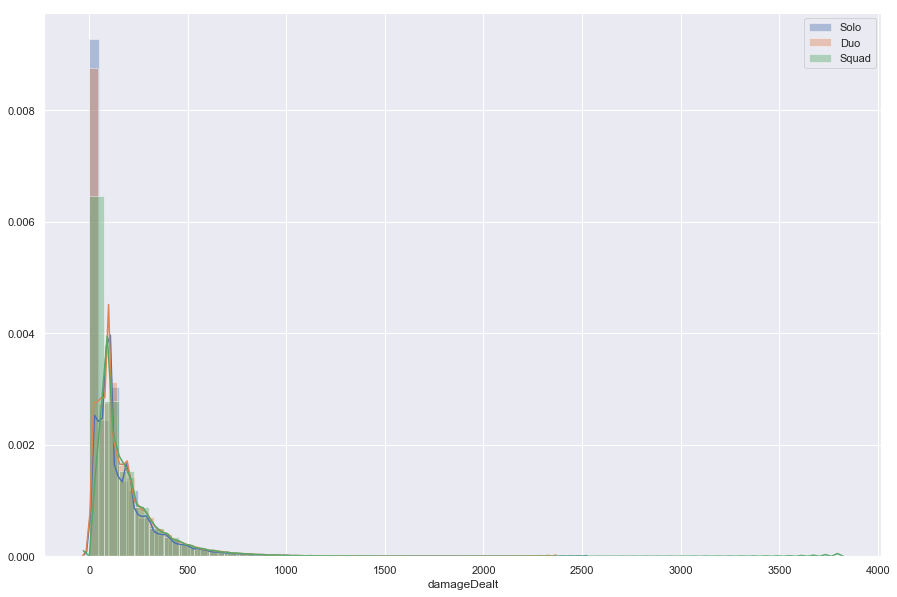

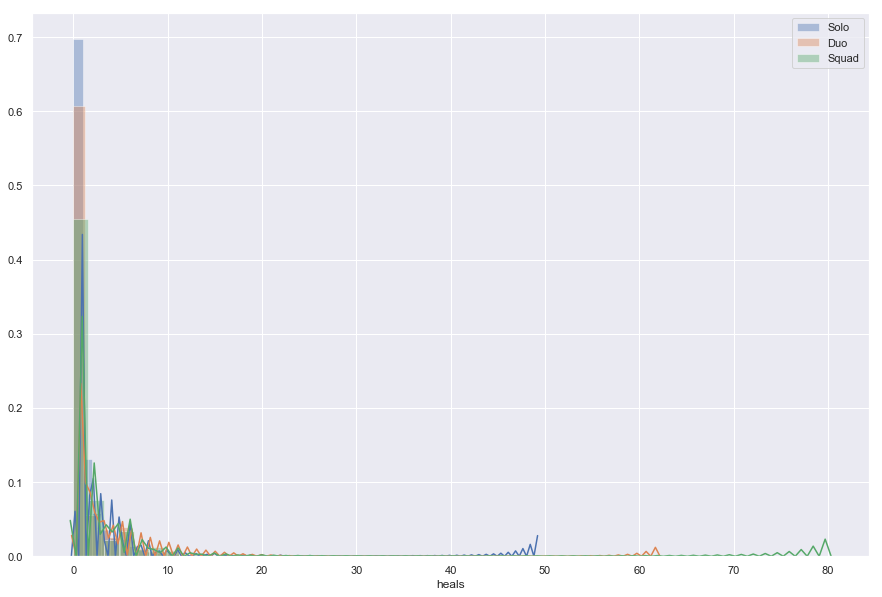

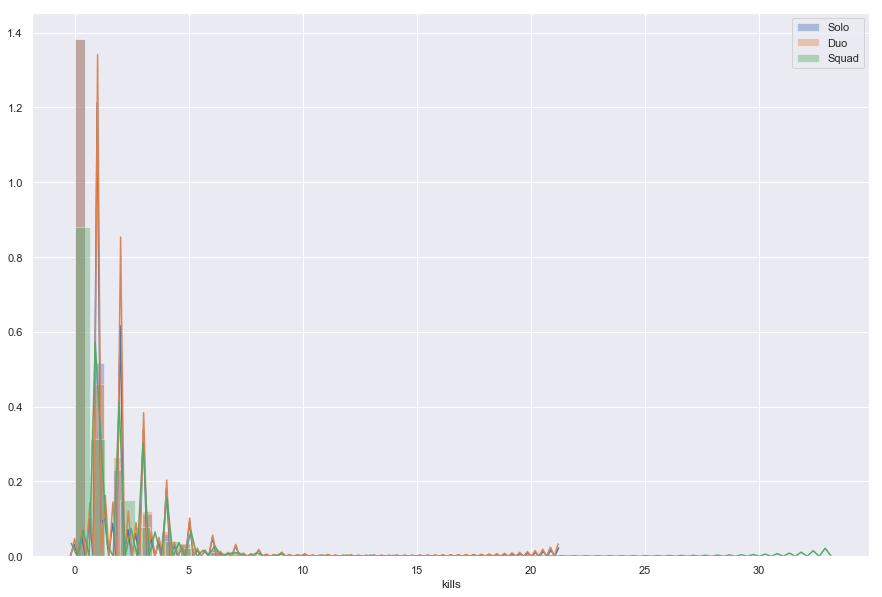

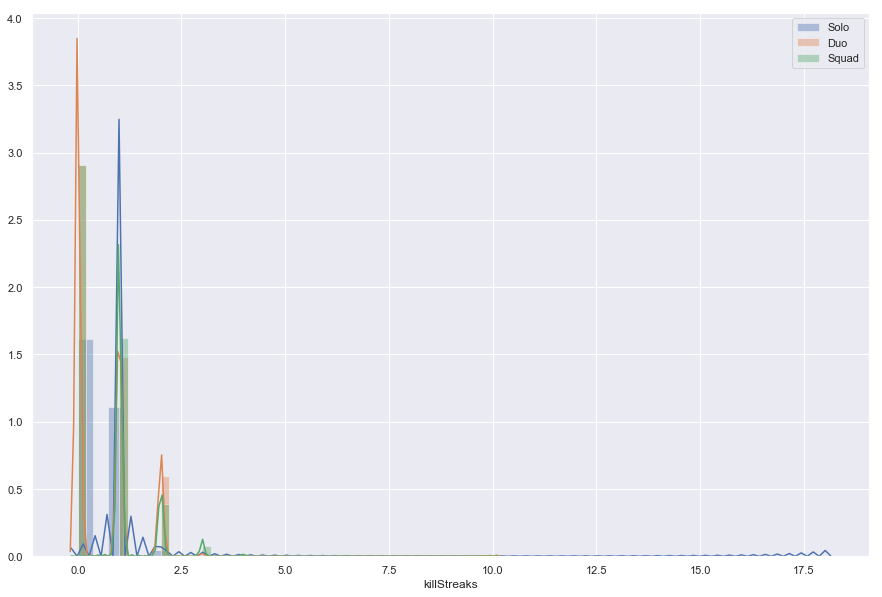

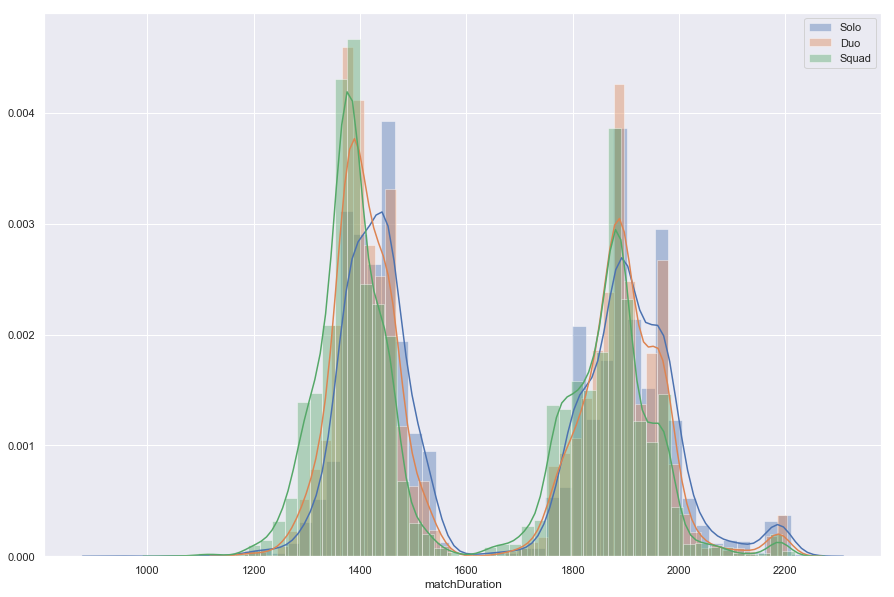

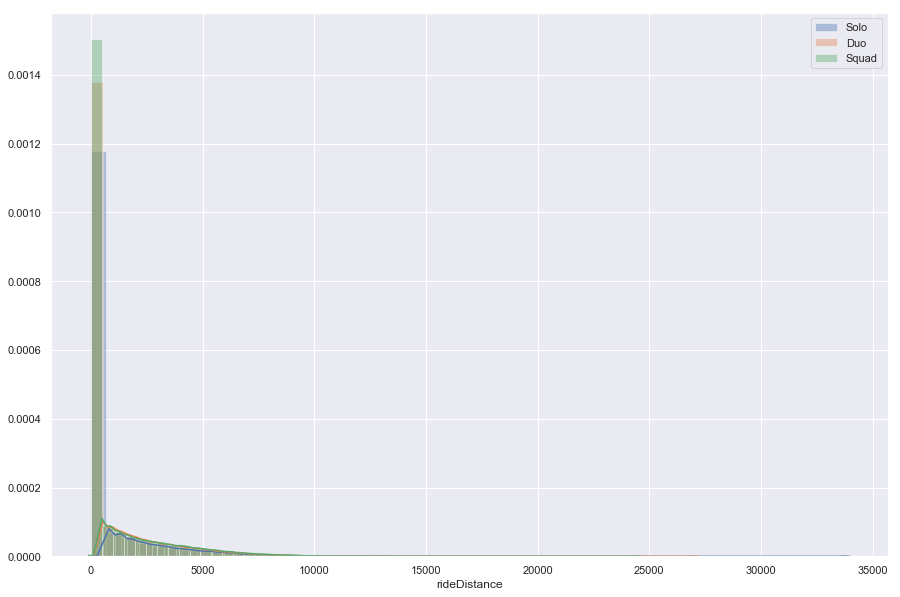

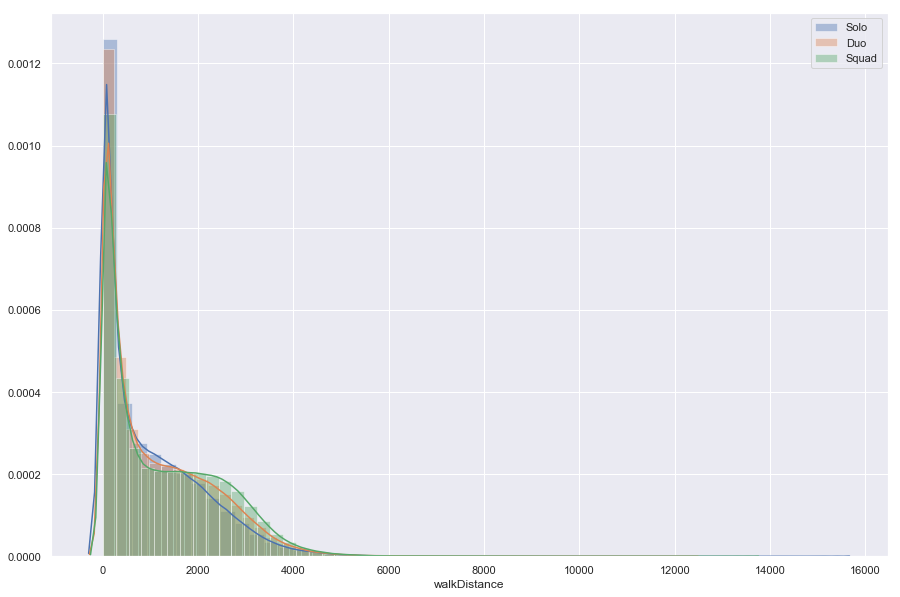

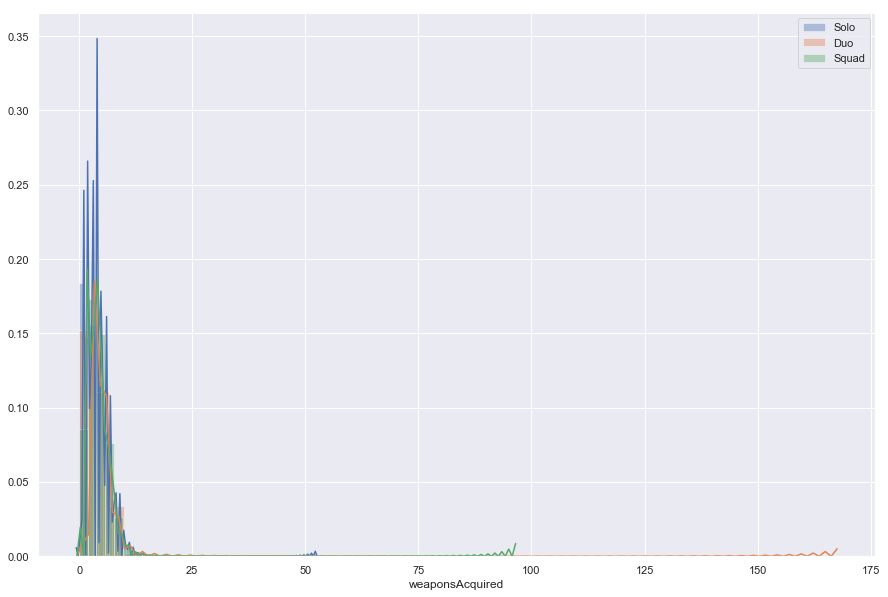

In [58]:
for feature in features_to_test:
    fig, ax = plt.subplots(figsize = (15, 10))
    sns.distplot(solo[feature], ax = ax, label = "Solo")
    sns.distplot(duo[feature], ax = ax, label = "Duo")
    sns.distplot(squad[feature], ax = ax, label = "Squad")
    ax.legend()

### Testing Statistical Significance of Differences in Distribution

In [59]:
solodmg = solo["damageDealt"]
duodmg = duo["damageDealt"]

In [60]:
stat, p = stats.mannwhitneyu(solodmg, duodmg)
print("The Mann-Whitney U Statistic is: {}".format(stat))
print("The corresponding p-value is: {}".format(p))

The Mann-Whitney U Statistic is: 26696320245.0
The corresponding p-value is: 0.0


# Machine Learning

## Hierarchical Clustering

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram

## Scikitlearn Regression

### Data Preparation

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, normalize

In [63]:
X = np.array(solo[features].drop("winPlacePerc", axis = 1))
y = np.array(solo.winPlacePerc)
feature_list = list(solo[features].columns.drop("winPlacePerc"))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 42)

In [65]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Labels Shape:', y_val.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (101888, 21)
Training Labels Shape: (101888,)
Validation Features Shape: (25472, 21)
Validation Labels Shape: (25472,)
Testing Features Shape: (54583, 21)
Testing Labels Shape: (54583,)


## Hierarchical Clustering

In [66]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [67]:
X_t = np.array(solo[features]).T
features = list(solo[features].columns)

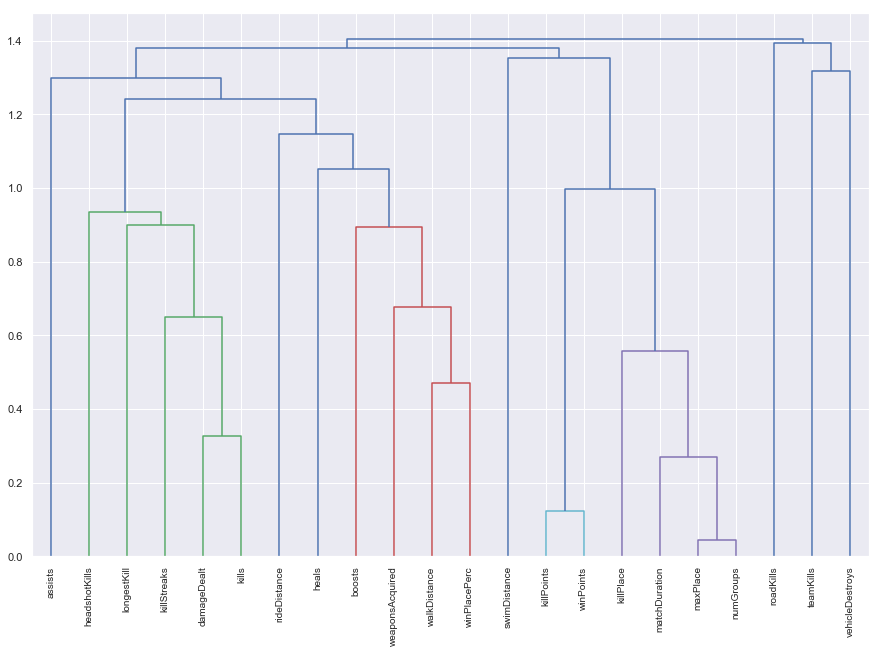

In [68]:
X_norm = normalize(X_t)
mergings = linkage(X_norm, method = "complete")
plt.figure(figsize = (15, 10))
dendrogram(mergings, labels = features, leaf_rotation = 90)
plt.show()

### ElasticNet

In [69]:
elastic = ElasticNetCV(cv = 5, random_state = 42)

In [70]:
elastic.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=42,
       selection='cyclic', tol=0.0001, verbose=0)

In [71]:
y_pred = elastic.predict(X_val)

print("R^2: {}".format(elastic.score(X_val, y_val)))
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.797096113299112
Root Mean Squared Error: 0.13917604375905593


In [72]:
y_pred = elastic.predict(X_test)

print("R^2: {}".format(elastic.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7987155246205543
Root Mean Squared Error: 0.13813091483809153


### Random Forest

#### Parameter Tuning

In [73]:
# n_estimator tuning
estimator_options = [5, 7, 10, 15, 20]
estimator_oobs = []
estimator_scores = []
estimator_rmses = []
for estimator in estimator_options:
    model = RandomForestRegressor(n_estimators = estimator, random_state = 42, oob_score = True, n_jobs = -1)
    model.fit(X, y)
    y_pred = model.predict(X_val)
    score = model.oob_score_
    estimator_oobs.append(score)
    estimator_scores.append(model.score(X_val, y_val))
    estimator_rmses.append(mean_squared_error(y_val, y_pred))

In [74]:
for i in range(len(estimator_options)):
    print("n_estimator: {}, OOB score: {}, R^2: {}, RMSE: {}".format(estimator_options[i], 
                                                                     estimator_oobs[i], 
                                                                     estimator_scores[i], 
                                                                     estimator_rmses[i]))

n_estimator: 5, OOB score: 0.574505092864313, R^2: 0.9839644476114167, RMSE: 0.0015308143786424827
n_estimator: 7, OOB score: 0.7814337367769291, R^2: 0.9858506955101778, RMSE: 0.001350746032062577
n_estimator: 10, OOB score: 0.8895947723765855, R^2: 0.9877400993051705, RMSE: 0.0011703764117122427
n_estimator: 15, OOB score: 0.9262006353089136, R^2: 0.9888128505399915, RMSE: 0.0010679675283026837
n_estimator: 20, OOB score: 0.9317309805240299, R^2: 0.9896515669031672, RMSE: 0.0009879004974178247


In [75]:
# max_depth tuning, with n_estimator = 10
depth_options = [5, 7, 10, 15, 20]
depth_oobs = []
depth_scores = []
depth_rmses = []
for depth in depth_options:
    model = RandomForestRegressor(n_estimators = 10, max_depth = depth, random_state = 42, oob_score = True, n_jobs = -1)
    model.fit(X, y)
    y_pred = model.predict(X_val)
    score = model.oob_score_
    depth_oobs.append(score)
    depth_scores.append(model.score(X_val, y_val))
    depth_rmses.append(mean_squared_error(y_val, y_pred))

In [76]:
for i in range(len(depth_options)):
    print("max_depth: {}, OOB score: {}, R^2: {}, RMSE: {}".format(depth_options[i], 
                                                                   depth_oobs[i], 
                                                                   depth_scores[i], 
                                                                   depth_rmses[i]))

max_depth: 5, OOB score: 0.845818160757415, R^2: 0.878590432711531, RMSE: 0.011590215716065468
max_depth: 7, OOB score: 0.868027015029611, R^2: 0.9026574647418969, RMSE: 0.009292685965262299
max_depth: 10, OOB score: 0.8921580761121525, R^2: 0.9342304020030563, RMSE: 0.006278614160054619
max_depth: 15, OOB score: 0.9003058198025292, R^2: 0.965993625473099, RMSE: 0.0032463769148572716
max_depth: 20, OOB score: 0.8930537938058067, R^2: 0.9830207612390865, RMSE: 0.001620902242950801


In [77]:
# max_features tuning, with n_estimator = 10 and max_depth = 15
feature_options = [5, 7, 10, 15, 20]
feature_oobs = []
feature_scores = []
feature_rmses = []
for feature in feature_options:
    model = RandomForestRegressor(n_estimators = 10, max_depth = 15, max_features= feature, 
                                  random_state = 42, oob_score = True, n_jobs = -1)
    model.fit(X, y)
    y_pred = model.predict(X_val)
    score = model.oob_score_
    feature_oobs.append(score)
    feature_scores.append(model.score(X_val, y_val))
    feature_rmses.append(mean_squared_error(y_val, y_pred))

In [78]:
for i in range(len(feature_options)):
    print("max_feature: {}, OOB score: {}, R^2: {}, RMSE: {}".format(feature_options[i], 
                                                                     feature_oobs[i], 
                                                                     feature_scores[i], 
                                                                     feature_rmses[i]))

max_feature: 5, OOB score: 0.8917169499169804, R^2: 0.956045047193393, RMSE: 0.004196105761645656
max_feature: 7, OOB score: 0.8951754965083045, R^2: 0.9582043259960074, RMSE: 0.003989972854063809
max_feature: 10, OOB score: 0.9004650240107469, R^2: 0.9634785552493579, RMSE: 0.0034864750149102243
max_feature: 15, OOB score: 0.901319614611473, R^2: 0.9653569059481183, RMSE: 0.0033071605648609206
max_feature: 20, OOB score: 0.9000241565146153, R^2: 0.965708216776705, RMSE: 0.0032736231066717017


#### Fitting Model to Test Data

In [79]:
X_test = np.concatenate((X_val, X_test))
y_test = np.concatenate((y_val, y_test))

In [80]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (101888, 21)
Training Labels Shape: (101888,)
Testing Features Shape: (80055, 21)
Testing Labels Shape: (80055,)


In [81]:
rf = RandomForestRegressor(n_estimators = 10, max_depth = 15, max_features = 15, random_state = 42, n_jobs = -1)

In [82]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=15, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [83]:
y_pred = rf.predict(X_test)

In [84]:
print("R^2: {}".format(rf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9368992014300754
Root Mean Squared Error: 0.07742737077961662


In [85]:
#Quantifying feature importance
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances_sorted = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [86]:
for pair in feature_importances_sorted:
    print("Variable: {:25} Importance: {}".format(pair[0], pair[1]))

Variable: walkDistance              Importance: 0.5832
Variable: killPlace                 Importance: 0.306
Variable: boosts                    Importance: 0.0325
Variable: numGroups                 Importance: 0.0179
Variable: matchDuration             Importance: 0.0173
Variable: maxPlace                  Importance: 0.0096
Variable: rideDistance              Importance: 0.0073
Variable: damageDealt               Importance: 0.007
Variable: weaponsAcquired           Importance: 0.005
Variable: kills                     Importance: 0.0043
Variable: killStreaks               Importance: 0.0025
Variable: longestKill               Importance: 0.0025
Variable: heals                     Importance: 0.0014
Variable: winPoints                 Importance: 0.0013
Variable: killPoints                Importance: 0.001
Variable: swimDistance              Importance: 0.0006
Variable: headshotKills             Importance: 0.0003
Variable: assists                   Importance: 0.0002
Variable: road

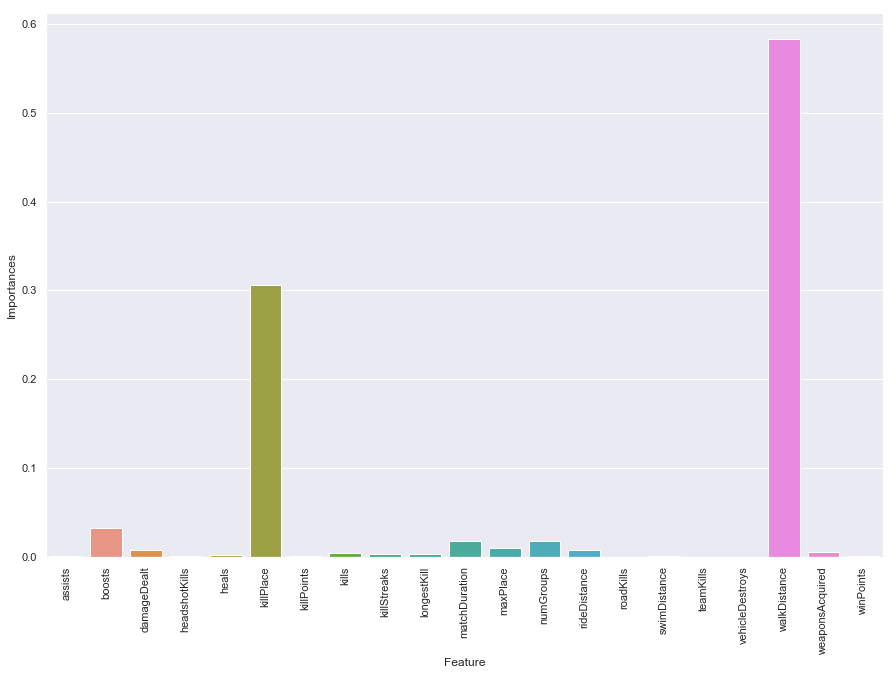

In [87]:
x_vals = list(range(len(importances)))
plt.figure(figsize = (15, 10))
sns.barplot(x_vals, importances, orientation = "vertical")
plt.xticks(x_vals, feature_list, rotation = "vertical")
plt.ylabel("Importances")
plt.xlabel("Feature")
plt.show()

In [88]:
# Construct new regressor only using most important features
rf_pared = RandomForestRegressor(n_estimators = 10, max_depth = 15, random_state = 42, n_jobs = -1)

In [89]:
feature_importances_sorted

[('walkDistance', 0.5832),
 ('killPlace', 0.306),
 ('boosts', 0.0325),
 ('numGroups', 0.0179),
 ('matchDuration', 0.0173),
 ('maxPlace', 0.0096),
 ('rideDistance', 0.0073),
 ('damageDealt', 0.007),
 ('weaponsAcquired', 0.005),
 ('kills', 0.0043),
 ('killStreaks', 0.0025),
 ('longestKill', 0.0025),
 ('heals', 0.0014),
 ('winPoints', 0.0013),
 ('killPoints', 0.001),
 ('swimDistance', 0.0006),
 ('headshotKills', 0.0003),
 ('assists', 0.0002),
 ('roadKills', 0.0001),
 ('teamKills', 0.0001),
 ('vehicleDestroys', 0.0)]

In [90]:
important_features = ["walkDistance", "killPlace", "boosts", "numGroups", "matchDuration"]
important_indices = []
for feature in important_features:
    important_indices.append(feature_list.index(feature))

In [91]:
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]
rf_pared.fit(train_important, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [92]:
predict_important = rf_pared.predict(test_important)

In [93]:
print("R^2: {}".format(rf_pared.score(test_important, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, predict_important))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9218450763293721
Root Mean Squared Error: 0.08616983393188712


## Deep Learning Model Using Keras

In [128]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import optimizers

In [155]:
n_cols = X_train.shape[1]
early_stopping_monitor = EarlyStopping(patience = 10)

### Testing Basic Model

In [179]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, y_train, validation_split = 0.2, epochs = 30, callbacks = [early_stopping_monitor])

Train on 55 samples, validate on 14 samples
Epoch 1/30
55/55 [==============================] - 1s 13ms/step - loss: 40713.7978 - val_loss: 30348.4082
Epoch 2/30
55/55 [==============================] - 0s 91us/step - loss: 35231.5311 - val_loss: 25966.7852
Epoch 3/30
55/55 [==============================] - 0s 73us/step - loss: 29851.1074 - val_loss: 22084.2285
Epoch 4/30
55/55 [==============================] - 0s 73us/step - loss: 25828.4951 - val_loss: 18662.2012
Epoch 5/30
55/55 [==============================] - 0s 73us/step - loss: 22385.2583 - val_loss: 15693.7344
Epoch 6/30
55/55 [==============================] - 0s 91us/step - loss: 18659.1519 - val_loss: 13166.3525
Epoch 7/30
55/55 [==============================] - 0s 91us/step - loss: 16098.4171 - val_loss: 10946.9287
Epoch 8/30
55/55 [==============================] - 0s 55us/step - loss: 13764.7955 - val_loss: 9029.5264
Epoch 9/30
55/55 [==============================] - 0s 55us/step - loss: 11823.9348 - val_loss: 7396.

In [180]:
y_pred = model.predict(X_test)
print("Keras Model's Root Mean Squared Error: {}".format(np.sqrt(model.evaluate(X_test, y_test))))

30/30 [==============================] - 0s 0us/step
Keras Model's Root Mean Squared Error: 19.711686067583187


### Testing Higher Node Count

In [158]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, y_train, validation_split = 0.2, epochs = 30, callbacks = [early_stopping_monitor])

Train on 55 samples, validate on 14 samples
Epoch 1/30
55/55 [==============================] - 1s 11ms/step - loss: 40207.7587 - val_loss: 31356.1465
Epoch 2/30
55/55 [==============================] - 0s 91us/step - loss: 23558.7347 - val_loss: 7743.5513
Epoch 3/30
55/55 [==============================] - 0s 109us/step - loss: 15765.4508 - val_loss: 8826.3633
Epoch 4/30
55/55 [==============================] - 0s 91us/step - loss: 9380.4546 - val_loss: 921.1357
Epoch 5/30
55/55 [==============================] - 0s 109us/step - loss: 3177.2154 - val_loss: 8528.5381
Epoch 6/30
55/55 [==============================] - 0s 91us/step - loss: 8657.8037 - val_loss: 2485.2761
Epoch 7/30
55/55 [==============================] - 0s 127us/step - loss: 2062.2547 - val_loss: 2866.0862
Epoch 8/30
55/55 [==============================] - 0s 91us/step - loss: 3659.4101 - val_loss: 4101.8525
Epoch 9/30
55/55 [==============================] - 0s 91us/step - loss: 3522.2299 - val_loss: 1435.0846
Epoch

In [159]:
y_pred = model.predict(X_test)
print("Keras Model's Root Mean Squared Error: {}".format(np.sqrt(model.evaluate(X_test, y_test))))

30/30 [==============================] - 0s 0us/step
Keras Model's Root Mean Squared Error: 11.004299363984401


### Testing Increased Layers

In [160]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, y_train, validation_split = 0.2, epochs = 30, callbacks = [early_stopping_monitor])

Train on 55 samples, validate on 14 samples
Epoch 1/30
55/55 [==============================] - 1s 12ms/step - loss: 3392.7862 - val_loss: 2976.9910
Epoch 2/30
55/55 [==============================] - 0s 55us/step - loss: 2843.3427 - val_loss: 2478.6660
Epoch 3/30
55/55 [==============================] - 0s 73us/step - loss: 2347.1103 - val_loss: 2055.6819
Epoch 4/30
55/55 [==============================] - 0s 73us/step - loss: 1926.4429 - val_loss: 1700.4091
Epoch 5/30
55/55 [==============================] - 0s 73us/step - loss: 1580.5465 - val_loss: 1407.9922
Epoch 6/30
55/55 [==============================] - 0s 73us/step - loss: 1319.3936 - val_loss: 1166.8075
Epoch 7/30
55/55 [==============================] - 0s 91us/step - loss: 1071.7957 - val_loss: 968.8204
Epoch 8/30
55/55 [==============================] - 0s 73us/step - loss: 894.7571 - val_loss: 805.7399
Epoch 9/30
55/55 [==============================] - 0s 73us/step - loss: 740.1576 - val_loss: 671.9446
Epoch 10/30
55/5

In [161]:
y_pred = model.predict(X_test)
print("Keras Model's Root Mean Squared Error: {}".format(np.sqrt(model.evaluate(X_test, y_test))))

30/30 [==============================] - 0s 33us/step
Keras Model's Root Mean Squared Error: 7.353858256874893


### Testing Increased Layers and Higher Node Count

In [162]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, y_train, validation_split = 0.2, epochs = 30, callbacks = [early_stopping_monitor])

Train on 55 samples, validate on 14 samples
Epoch 1/30
55/55 [==============================] - 1s 13ms/step - loss: 38509.8000 - val_loss: 19617.7988
Epoch 2/30
55/55 [==============================] - 0s 145us/step - loss: 12948.3622 - val_loss: 17885.2168
Epoch 3/30
55/55 [==============================] - 0s 318us/step - loss: 20343.7679 - val_loss: 8590.8574
Epoch 4/30
55/55 [==============================] - 0s 136us/step - loss: 6406.8227 - val_loss: 636.7955
Epoch 5/30
55/55 [==============================] - 0s 136us/step - loss: 2162.2193 - val_loss: 5548.6606
Epoch 6/30
55/55 [==============================] - 0s 118us/step - loss: 6194.0341 - val_loss: 2232.1965
Epoch 7/30
55/55 [==============================] - 0s 145us/step - loss: 1476.6084 - val_loss: 140.5912
Epoch 8/30
55/55 [==============================] - 0s 145us/step - loss: 548.5630 - val_loss: 1866.1317
Epoch 9/30
55/55 [==============================] - 0s 145us/step - loss: 2313.8432 - val_loss: 1354.2252
E

In [163]:
y_pred = model.predict(X_test)
print("Keras Model's Root Mean Squared Error: {}".format(np.sqrt(model.evaluate(X_test, y_test))))

30/30 [==============================] - 0s 33us/step
Keras Model's Root Mean Squared Error: 1.9055250696771777


### Testing No Early Stopping Monitor

In [164]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, y_train, validation_split = 0.2, epochs = 100)

Train on 55 samples, validate on 14 samples
Epoch 1/100
55/55 [==============================] - 1s 14ms/step - loss: 30344.5582 - val_loss: 9265.3438
Epoch 2/100
55/55 [==============================] - 0s 127us/step - loss: 7924.2659 - val_loss: 14291.9219
Epoch 3/100
55/55 [==============================] - 0s 145us/step - loss: 15178.6866 - val_loss: 6647.2119
Epoch 4/100
55/55 [==============================] - 0s 109us/step - loss: 4498.4194 - val_loss: 360.5696
Epoch 5/100
55/55 [==============================] - 0s 127us/step - loss: 754.4044 - val_loss: 3670.4363
Epoch 6/100
55/55 [==============================] - 0s 127us/step - loss: 4878.4362 - val_loss: 2619.9771
Epoch 7/100
55/55 [==============================] - 0s 127us/step - loss: 2122.9832 - val_loss: 139.6902
Epoch 8/100
55/55 [==============================] - 0s 145us/step - loss: 279.8127 - val_loss: 1676.0510
Epoch 9/100
55/55 [==============================] - 0s 145us/step - loss: 2527.2499 - val_loss: 1688.

Epoch 80/100
55/55 [==============================] - 0s 127us/step - loss: 0.5296 - val_loss: 1.5565
Epoch 81/100
55/55 [==============================] - 0s 127us/step - loss: 0.4945 - val_loss: 1.7254
Epoch 82/100
55/55 [==============================] - 0s 127us/step - loss: 0.4598 - val_loss: 1.7726
Epoch 83/100
55/55 [==============================] - 0s 109us/step - loss: 0.4595 - val_loss: 1.7774
Epoch 84/100
55/55 [==============================] - 0s 145us/step - loss: 0.4402 - val_loss: 1.6366
Epoch 85/100
55/55 [==============================] - 0s 127us/step - loss: 0.4179 - val_loss: 1.5085
Epoch 86/100
55/55 [==============================] - 0s 127us/step - loss: 0.4318 - val_loss: 1.4545
Epoch 87/100
55/55 [==============================] - 0s 127us/step - loss: 0.4136 - val_loss: 1.5413
Epoch 88/100
55/55 [==============================] - 0s 145us/step - loss: 0.4112 - val_loss: 1.7154
Epoch 89/100
55/55 [==============================] - 0s 127us/step - loss: 0.4032

In [165]:
y_pred = model.predict(X_test)
print("Keras Model's Root Mean Squared Error: {}".format(np.sqrt(model.evaluate(X_test, y_test))))

30/30 [==============================] - 0s 33us/step
Keras Model's Root Mean Squared Error: 3.0583862390195136


### Testing Different Optimizers

In [166]:
# testing adadelta
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (n_cols, )))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = "adadelta", loss = "mean_squared_error")

model.fit(X_train, y_train, validation_split = 0.2, epochs = 20)

Train on 55 samples, validate on 14 samples
Epoch 1/20
55/55 [==============================] - 1s 14ms/step - loss: 46540.6514 - val_loss: 15291.5059
Epoch 2/20
55/55 [==============================] - 0s 164us/step - loss: 14855.8097 - val_loss: 187.4040
Epoch 3/20
55/55 [==============================] - 0s 236us/step - loss: 366.3845 - val_loss: 30.0495
Epoch 4/20
55/55 [==============================] - 0s 164us/step - loss: 47.2165 - val_loss: 71.1460
Epoch 5/20
55/55 [==============================] - 0s 182us/step - loss: 35.1141 - val_loss: 18.5958
Epoch 6/20
55/55 [==============================] - 0s 182us/step - loss: 20.5769 - val_loss: 33.6289
Epoch 7/20
55/55 [==============================] - 0s 200us/step - loss: 17.6679 - val_loss: 14.3319
Epoch 8/20
55/55 [==============================] - 0s 145us/step - loss: 14.3839 - val_loss: 14.1970
Epoch 9/20
55/55 [==============================] - 0s 127us/step - loss: 10.2868 - val_loss: 21.0706
Epoch 10/20
55/55 [=========

In [167]:
y_pred = model.predict(X_test)
print("Keras Model's Root Mean Squared Error: {}".format(np.sqrt(model.evaluate(X_test, y_test))))

30/30 [==============================] - 0s 33us/step
Keras Model's Root Mean Squared Error: 5.052161126340765


### Testing LSTM Model

In [168]:
solo.head()

Id         groupId         matchId  assists  boosts  \
0  269c3fc4a26935  3c07be51998e6f  ce9bc89b3ca08c        0       1   
1  73348483a5974b  1c8e486a643207  85601fe44d519b        0       0   
2  caa1a36afeb7b2  c653cfca3b8b06  e5e181d2da0334        0       1   
3  5fd62798396ca8  bb19a05801d30d  9e3c46f8acde82        0       0   
4  18d002b46b1abc  00a3f236559532  eccc44618c0442        0       1   

   damageDealt  headshotKills  heals  killPlace  killPoints      ...       \
0       100.00              0      0         24           0      ...        
1        17.81              0      0         79        1274      ...        
2       100.00              0      0         38        1000      ...        
3        36.00              0      0         84           0      ...        
4       236.00              0      7          7        1142      ...        

   numGroups  rideDistance  roadKills  swimDistance teamKills  \
0         89           0.0          0          61.0         0   
1         95         129.3          0           0.0         0   
2         86           0.0          0           0.0         0   
3         92           0.0          0           0.0         0   
4         88           0.0          0           0.0         0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0                0        1528.0                3          0        0.8462  
1                0         471.9                3       1536        0.2245  
2                0         231.7                4       1500        0.1573  
3                0         292.6                1          0        0.1075  
4                0        1913.0                8       1557        0.9355  

[5 rows x 26 columns]

In [169]:
solo[solo.matchId == solo.matchId.unique()[0]].head()

Id         groupId         matchId  assists  boosts  \
0      269c3fc4a26935  3c07be51998e6f  ce9bc89b3ca08c        0       1   
1375   c6112d0e4e6b38  ec98324e1b5a45  ce9bc89b3ca08c        0       2   
2829   786ff6642479f2  2cdc72d12d1a7c  ce9bc89b3ca08c        0       1   
7625   1d328edf5fce9a  31133f8b396c3c  ce9bc89b3ca08c        0       0   
11101  d9ac9fdb6453bc  ef92d98d37ac37  ce9bc89b3ca08c        0       0   

       damageDealt  headshotKills  heals  killPlace  killPoints      ...       \
0            100.0              0      0         24           0      ...        
1375         132.6              1      1         23           0      ...        
2829         226.1              0      4         14           0      ...        
7625           0.0              0      0         67           0      ...        
11101          0.0              0      0         69           0      ...        

       numGroups  rideDistance  roadKills  swimDistance teamKills  \
0             89           0.0          0          61.0         0   
1375          89           0.0          0           0.0         0   
2829          89           0.0          0           0.0         0   
7625          89           0.0          0           0.0         0   
11101         89           0.0          0           0.0         0   

       vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0                    0        1528.0                3          0        0.8462  
1375                 0        2218.0                4          0        0.8901  
2829                 0        2145.0                6          0        0.7692  
7625                 0         455.5                3          0        0.3187  
11101                0         154.4                3          0        0.2967  

[5 rows x 26 columns]

In [170]:
solo_matches = []
for matchId in solo.matchId.unique():
    solo_matches.append(solo[solo.matchId == matchId])

In [171]:
import random
random.seed(42)

In [172]:
def train_split_matches(matches, train_perc):
    random.shuffle(matches)
    match_length = len(matches)
    train_len = math.floor(match_length * train_perc)
    train_matches = matches[:train_len]
    test_matches = matches[train_len:]
    return train_matches, test_matches

In [173]:
solo_test, solo_train = train_split_matches(solo_matches, .2)

In [174]:
print(len(solo_train), len(solo_test))

1838 459


In [175]:
solo_train[1].head()

Id         groupId         matchId  assists  boosts  \
1844   a8c956e95382ef  ca8e97872fe4b4  e9541009ccd9db        0       0   
6966   21c4e42ea61097  49df15bc21e60a  e9541009ccd9db        0       0   
10262  ac7371ecbd81ce  c4051ddc49fcc5  e9541009ccd9db        0       0   
12339  9b0e3e1034a7d8  b23944f0f6febe  e9541009ccd9db        0       0   
17157  7d3bdedec77012  8469d9b0fc962f  e9541009ccd9db        0       0   

       damageDealt  headshotKills  heals  killPlace  killPoints      ...       \
1844           0.0              0      0         60           0      ...        
6966           0.0              0      0         51           0      ...        
10262        100.0              0      0         37           0      ...        
12339          0.0              0      0         82           0      ...        
17157        166.9              0      0         40           0      ...        

       numGroups  rideDistance  roadKills  swimDistance teamKills  \
1844          94         374.6          0           0.0         0   
6966          94           0.0          0           0.0         0   
10262         94           0.0          0           0.0         0   
12339         94           0.0          0           0.0         0   
17157         94           0.0          0           0.0         0   

       vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
1844                 0        849.80               10          0        0.5714  
6966                 0       2067.00                2          0        0.8163  
10262                0        520.60                2          0        0.5000  
12339                0         39.08                2          0        0.1429  
17157                0        467.00                2          0        0.4184  

[5 rows x 26 columns]

In [176]:
def match_list_to_array(matches, feature_list):
    match_list_array=[]
    for match in matches:
        X = np.array(match[feature_list].drop("winPlacePerc", axis = 1))
        y = np.array(match.winPlacePerc)
        match_list_array.append((X,y))
    return match_list_array

In [177]:
train_list_array = match_list_to_array(solo_train, features)

In [178]:
solo_matches_array = []
for match in solo_matches:
    X = np.array(match[features].drop("winPlacePerc", axis = 1))
    y = np.array(match.winPlacePerc)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)
    